In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  RuntimeWarning,


In [144]:
train_data = pd.read_csv('Train (1).csv')
test_data = pd.read_csv('Test (1).csv')
df = train_data.copy()
df_test = test_data.copy()

In [145]:
def drop_columns(X):
    for i in X.columns:
        if X[i].isnull().sum() > (0.6*X.shape[0]):
            new_df = X.drop(i,axis=1,inplace=True)
    return X    

In [146]:
drop_columns(df)


Place_ID X Date        Date Place_ID  target  target_min  \
0      010Q650 X 2020-01-02  2020-01-02  010Q650    38.0        23.0   
1      010Q650 X 2020-01-03  2020-01-03  010Q650    39.0        25.0   
2      010Q650 X 2020-01-04  2020-01-04  010Q650    24.0         8.0   
3      010Q650 X 2020-01-05  2020-01-05  010Q650    49.0        10.0   
4      010Q650 X 2020-01-06  2020-01-06  010Q650    21.0         9.0   
...                     ...         ...      ...     ...         ...   
30552  YWSFY6Q X 2020-03-15  2020-03-15  YWSFY6Q    22.0        14.0   
30553  YWSFY6Q X 2020-03-16  2020-03-16  YWSFY6Q    53.0        30.0   
30554  YWSFY6Q X 2020-03-17  2020-03-17  YWSFY6Q    85.0        52.0   
30555  YWSFY6Q X 2020-03-18  2020-03-18  YWSFY6Q   103.0        33.0   
30556  YWSFY6Q X 2020-03-19  2020-03-19  YWSFY6Q    89.0        46.0   

       target_max  target_variance  target_count  \
0            53.0           769.50            92   
1            63.0          1319.85            91   
2            56.0          1181.96            96   
3            55.0          1113.67            96   
4            52.0          1164.82            95   
...           ...              ...           ...   
30552        83.0          3848.86            72   
30553       146.0          9823.87            72   
30554       153.0          8900.85            72   
30555       149.0         13963.90            72   
30556       132.0          9393.64            72   

       precipitable_water_entire_atmosphere  \
0                                 11.000000   
1                                 14.600000   
2                                 16.400000   
3                                  6.911948   
4                                 13.900001   
...                                     ...   
30552                              6.700000   
30553                              6.300000   
30554                              7.100000   
30555                             19.100000   
30556                             11.600000   

       relative_humidity_2m_above_ground  ...  L3_AER_AI_solar_zenith_angle  \
0                              60.200001  ...                     22.358167   
1                              48.799999  ...                     28.614804   
2                              33.400002  ...                     34.296977   
3                              21.300001  ...                     30.545393   
4                              44.700001  ...                     26.899694   
...                                  ...  ...                           ...   
30552                          68.300003  ...                     49.871571   
30553                          77.700005  ...                     49.012079   
30554                          68.500000  ...                     48.459205   
30555                          66.300003  ...                     47.292238   
30556                          68.400002  ...                           NaN   

       L3_SO2_SO2_column_number_density  L3_SO2_SO2_column_number_density_amf  \
0                             -0.000127                              0.312521   
1                              0.000150                              0.433957   
2                              0.000150                              0.356925   
3                              0.000227                              0.584522   
4                              0.000390                              0.408047   
...                                 ...                                   ...   
30552                          0.000312                              0.203573   
30553                          0.000362                              0.234613   
30554                          0.000107                              0.263715   
30555                          0.000014                              0.546447   
30556                               NaN                                   NaN   

       L3_SO2_SO2_slant_column_numb

In [147]:
drop_columns(df_test)


Place_ID X Date        Date Place_ID  \
0      0OS9LVX X 2020-01-02  2020-01-02  0OS9LVX   
1      0OS9LVX X 2020-01-03  2020-01-03  0OS9LVX   
2      0OS9LVX X 2020-01-04  2020-01-04  0OS9LVX   
3      0OS9LVX X 2020-01-05  2020-01-05  0OS9LVX   
4      0OS9LVX X 2020-01-06  2020-01-06  0OS9LVX   
...                     ...         ...      ...   
16131  ZZDJZMS X 2020-03-31  2020-03-31  ZZDJZMS   
16132  ZZDJZMS X 2020-04-01  2020-04-01  ZZDJZMS   
16133  ZZDJZMS X 2020-04-02  2020-04-02  ZZDJZMS   
16134  ZZDJZMS X 2020-04-03  2020-04-03  ZZDJZMS   
16135  ZZDJZMS X 2020-04-04  2020-04-04  ZZDJZMS   

       precipitable_water_entire_atmosphere  \
0                                 11.600000   
1                                 18.300001   
2                                 17.600000   
3                                 15.011948   
4                                  9.700000   
...                                     ...   
16131                              9.400001   
16132                             17.000000   
16133                             19.170641   
16134                              8.400001   
16135                              6.500000   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
0                              30.200001                            0.00409   
1                              42.900002                            0.00595   
2                              41.299999                            0.00590   
3                              53.100002                            0.00709   
4                              71.599998                            0.00808   
...                                  ...                                ...   
16131                          86.200005                            0.00413   
16132                          90.300003                            0.00548   
16133                          86.200005                            0.00656   
16134                          66.400002                            0.00457   
16135                          81.599998                            0.00508   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
0                        14.656824                              3.956377   
1                        15.026544                              4.230430   
2                        15.511041                              5.245728   
3                        14.441858                              5.454001   
4                        11.896295                              3.511787   
...                            ...                                   ...   
16131                     3.136346                              0.073416   
16132                     6.394495                             -1.217649   
16133                     9.750879                             -0.410603   
16134                     8.322565                              1.659441   
16135                     6.857385                             -1.004568   

       v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                                  0.712605                          0.000053   
1                                  0.661892                          0.000050   
2                                  1.640559                          0.000050   
3                                 -0.190532                          0.000055   
4                                 -0.279441                          0.000055   
...                                     ...                               ...   
16131                              0.923135                          0.000000   
16132                              1.270308                          0.000000   
16133                              0.754363                          0.000000   
16134                             -2.471616                          0.000000   
16135                              1.752161                          

In [148]:
df['Place_ID X Date'] = df['Place_ID X Date'].map(df['Place_ID X Date'].value_counts())
df_test['Place_ID X Date'] = df_test['Place_ID X Date'].map(df_test['Place_ID X Date'].value_counts())



In [149]:
freq_enq = df.groupby('Place_ID').size()
date_freq = freq_enq/len(df)
df['Place_ID'] =  df['Place_ID'].map(date_freq)


freq1_enq = df_test.groupby('Place_ID').size()
date1_freq = freq_enq/len(df_test)
df_test['Place_ID'] =  df_test['Place_ID'].map(date_freq)


In [150]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] =df['Date'].dt.day
df['Weekday'] = df['Date'].dt.dayofweek
df['Year']= df['Date'].dt.year
df['Week'] = df['Date'].dt.week



In [151]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] =df_test['Date'].dt.day

df_test['Weekday'] = df_test['Date'].dt.dayofweek
df_test['Year']= df_test['Date'].dt.year
df_test['Week'] = df_test['Date'].dt.week



In [188]:
df_test =df_test.drop(['Year'],axis=1)

In [182]:
X = df.drop(['Year','Place_ID X Date','Date','target','target_min','target_max','target_variance','target_count'],axis=1)

In [183]:
X = X.fillna(X.mean())


In [189]:
df_test = df_test.fillna(df_test.mean())

In [ ]:
impute = SimpleImputer()

In [105]:
X.shape

(30557, 74)

In [ ]:
df_test = impute.fit_transform(df_test.iloc[:,3:])

In [62]:
pca = PCA()
df_test.head()

Place_ID X Date  Place_ID  precipitable_water_entire_atmosphere  \
0            16136        94                             11.600000   
1            16136        94                             18.300001   
2            16136        94                             17.600000   
3            16136        94                             15.011948   
4            16136        94                              9.700000   

   relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
0                          30.200001                            0.00409   
1                          42.900002                            0.00595   
2                          41.299999                            0.00590   
3                          53.100002                            0.00709   
4                          71.599998                            0.00808   

   temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
0                    14.656824                              3.956377   
1                    15.026544                              4.230430   
2                    15.511041                              5.245728   
3                    14.441858                              5.454001   
4                    11.896295                              3.511787   

   v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                              0.712605                          0.000053   
1                              0.661892                          0.000050   
2                              1.640559                          0.000050   
3                             -0.190532                          0.000055   
4                             -0.279441                          0.000055   

   L3_NO2_NO2_slant_column_number_density  ...  L3_SO2_cloud_fraction  \
0                                0.000108  ...               0.032071   
1                                0.000109  ...               0.040803   
2                                0.000134  ...               0.007113   
3                                0.000155  ...               0.062076   
4                                0.000131  ...               0.042777   

   L3_SO2_sensor_azimuth_angle  L3_SO2_sensor_zenith_angle  \
0                    68.099367                    1.445658   
1                    75.936813                   34.641758   
2                    75.552445                   55.872276   
3                  -102.285125                   59.174188   
4                  -102.133957                   40.925873   

   L3_SO2_solar_azimuth_angle  L3_SO2_solar_zenith_angle  Month  Day  Weekday  \
0                  -95.984984                  22.942019      1    2        3   
1                  -95.014908                  18.539116      1    3        4   
2                  -94.015418                  14.140820      1    4        5   
3                  -97.247602                  32.730553      1    5        6   
4                  -96.057265                  28.320527      1    6        0   

   Year  Week  
0  2020     1  
1  2020     1  
2  2020     1  
3  2020     1  
4  2020     2  

[5 rows x 74 columns]

In [63]:
X = pca.fit_transform(X)

In [229]:
df_test = pca.fit_transform(df_test)

ValueError: could not convert string to float: '0OS9LVX X 2020-01-02'

In [179]:
scale = MinMaxScaler()

In [319]:
X = scale.fit_transform(X)
df

Place_ID X Date        Date Place_ID  target  target_min  \
0      010Q650 X 2020-01-02  2020-01-02  010Q650    38.0        23.0   
1      010Q650 X 2020-01-03  2020-01-03  010Q650    39.0        25.0   
2      010Q650 X 2020-01-04  2020-01-04  010Q650    24.0         8.0   
3      010Q650 X 2020-01-05  2020-01-05  010Q650    49.0        10.0   
4      010Q650 X 2020-01-06  2020-01-06  010Q650    21.0         9.0   
...                     ...         ...      ...     ...         ...   
30552  YWSFY6Q X 2020-03-15  2020-03-15  YWSFY6Q    22.0        14.0   
30553  YWSFY6Q X 2020-03-16  2020-03-16  YWSFY6Q    53.0        30.0   
30554  YWSFY6Q X 2020-03-17  2020-03-17  YWSFY6Q    85.0        52.0   
30555  YWSFY6Q X 2020-03-18  2020-03-18  YWSFY6Q   103.0        33.0   
30556  YWSFY6Q X 2020-03-19  2020-03-19  YWSFY6Q    89.0        46.0   

       target_max  target_variance  target_count  \
0            53.0           769.50            92   
1            63.0          1319.85            91   
2            56.0          1181.96            96   
3            55.0          1113.67            96   
4            52.0          1164.82            95   
...           ...              ...           ...   
30552        83.0          3848.86            72   
30553       146.0          9823.87            72   
30554       153.0          8900.85            72   
30555       149.0         13963.90            72   
30556       132.0          9393.64            72   

       precipitable_water_entire_atmosphere  \
0                                 11.000000   
1                                 14.600000   
2                                 16.400000   
3                                  6.911948   
4                                 13.900001   
...                                     ...   
30552                              6.700000   
30553                              6.300000   
30554                              7.100000   
30555                             19.100000   
30556                             11.600000   

       relative_humidity_2m_above_ground  ...  L3_AER_AI_solar_zenith_angle  \
0                              60.200001  ...                     22.358167   
1                              48.799999  ...                     28.614804   
2                              33.400002  ...                     34.296977   
3                              21.300001  ...                     30.545393   
4                              44.700001  ...                     26.899694   
...                                  ...  ...                           ...   
30552                          68.300003  ...                     49.871571   
30553                          77.700005  ...                     49.012079   
30554                          68.500000  ...                     48.459205   
30555                          66.300003  ...                     47.292238   
30556                          68.400002  ...                           NaN   

       L3_SO2_SO2_column_number_density  L3_SO2_SO2_column_number_density_amf  \
0                             -0.000127                              0.312521   
1                              0.000150                              0.433957   
2                              0.000150                              0.356925   
3                              0.000227                              0.584522   
4                              0.000390                              0.408047   
...                                 ...                                   ...   
30552                          0.000312                              0.203573   
30553                          0.000362                              0.234613   
30554                          0.000107                              0.263715   
30555                          0.000014                              0.546447   
30556                               NaN                                   NaN   

       L3_SO2_SO2_slant_column_numb

In [139]:
y = df.target


In [161]:
from sklearn.model_selection import train_test_split

In [259]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=1000)

In [163]:
model =LinearRegression()

In [164]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
pred = model.predict(X_test)

In [166]:
from sklearn.metrics import mean_squared_error

In [167]:
np.sqrt(mean_squared_error(pred,y_test))

36.56118447782528

In [28]:
xgb = XGBRegressor(n_jobs=-1,n_estimators=10000,eta=0.2,max_depth=7,objective='reg:squarederror')


In [30]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.200000003, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
predict = xgb.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(predict,y_test))

27.649074053924593

In [194]:
from sklearn.model_selection import cross_val_score

In [195]:
cross = cross_val_score(xgb,X,y,scoring='neg_mean_squared_error',cv=10)

In [196]:
scores = np.sqrt(-cross)

In [197]:
scores

array([27.92558839, 40.92927776, 34.75728932, 29.48502903, 29.52925136,
       35.36780079, 32.52124753, 37.83746882, 33.44195184, 33.82505592])

In [198]:
scores.mean()

33.56199607749143

In [244]:
cat = CatBoostRegressor(max_depth=10)

In [174]:
cat.fit(X_train,y_train)

Learning rate set to 0.019813
0:	learn: 46.5760996	total: 1.61s	remaining: 2h 14m 34s
1:	learn: 46.2874779	total: 2.7s	remaining: 1h 52m 19s
2:	learn: 45.9953606	total: 3.58s	remaining: 1h 39m 22s
3:	learn: 45.7037057	total: 4.35s	remaining: 1h 30m 33s
4:	learn: 45.4554245	total: 5.12s	remaining: 1h 25m 10s
5:	learn: 45.1830830	total: 5.79s	remaining: 1h 20m 19s
6:	learn: 44.9214135	total: 6.42s	remaining: 1h 16m 15s
7:	learn: 44.6566112	total: 6.87s	remaining: 1h 11m 24s
8:	learn: 44.4038135	total: 7.29s	remaining: 1h 7m 25s
9:	learn: 44.1461043	total: 7.72s	remaining: 1h 4m 10s
10:	learn: 43.8905760	total: 8.07s	remaining: 1h 59s
11:	learn: 43.6653076	total: 8.43s	remaining: 58m 23s
12:	learn: 43.4132936	total: 8.79s	remaining: 56m 10s
13:	learn: 43.1891099	total: 9.14s	remaining: 54m 16s
14:	learn: 42.9628329	total: 9.51s	remaining: 52m 40s
15:	learn: 42.7654128	total: 9.86s	remaining: 51m 12s
16:	learn: 42.5650507	total: 10.2s	remaining: 49m 55s
17:	learn: 42.3597311	total: 10.6s	r

152:	learn: 31.5344897	total: 1m 3s	remaining: 33m 29s
153:	learn: 31.4936499	total: 1m 3s	remaining: 33m 27s
154:	learn: 31.4609526	total: 1m 4s	remaining: 33m 25s
155:	learn: 31.4314089	total: 1m 4s	remaining: 33m 23s
156:	learn: 31.3954502	total: 1m 4s	remaining: 33m 22s
157:	learn: 31.3613567	total: 1m 5s	remaining: 33m 22s
158:	learn: 31.3407836	total: 1m 5s	remaining: 33m 22s
159:	learn: 31.3166222	total: 1m 6s	remaining: 33m 20s
160:	learn: 31.2898732	total: 1m 6s	remaining: 33m 18s
161:	learn: 31.2529070	total: 1m 6s	remaining: 33m 16s
162:	learn: 31.2220313	total: 1m 7s	remaining: 33m 14s
163:	learn: 31.1911386	total: 1m 7s	remaining: 33m 12s
164:	learn: 31.1673858	total: 1m 7s	remaining: 33m 9s
165:	learn: 31.1405323	total: 1m 8s	remaining: 33m 7s
166:	learn: 31.1146180	total: 1m 8s	remaining: 33m 5s
167:	learn: 31.0895819	total: 1m 8s	remaining: 33m 2s
168:	learn: 31.0604454	total: 1m 9s	remaining: 33m
169:	learn: 31.0230459	total: 1m 9s	remaining: 32m 58s
170:	learn: 31.001

300:	learn: 28.3670465	total: 1m 58s	remaining: 30m 53s
301:	learn: 28.3557814	total: 1m 59s	remaining: 30m 52s
302:	learn: 28.3359661	total: 1m 59s	remaining: 30m 51s
303:	learn: 28.3244047	total: 1m 59s	remaining: 30m 49s
304:	learn: 28.3145975	total: 2m	remaining: 30m 48s
305:	learn: 28.2953836	total: 2m	remaining: 30m 47s
306:	learn: 28.2860538	total: 2m	remaining: 30m 46s
307:	learn: 28.2686726	total: 2m 1s	remaining: 30m 45s
308:	learn: 28.2509216	total: 2m 1s	remaining: 30m 44s
309:	learn: 28.2378510	total: 2m 1s	remaining: 30m 43s
310:	learn: 28.2150984	total: 2m 2s	remaining: 30m 42s
311:	learn: 28.2012434	total: 2m 2s	remaining: 30m 40s
312:	learn: 28.1901159	total: 2m 2s	remaining: 30m 39s
313:	learn: 28.1778211	total: 2m 3s	remaining: 30m 39s
314:	learn: 28.1581656	total: 2m 3s	remaining: 30m 38s
315:	learn: 28.1466655	total: 2m 4s	remaining: 30m 38s
316:	learn: 28.1325287	total: 2m 4s	remaining: 30m 38s
317:	learn: 28.1162707	total: 2m 4s	remaining: 30m 38s
318:	learn: 28.

448:	learn: 26.2416429	total: 2m 53s	remaining: 29m 13s
449:	learn: 26.2262547	total: 2m 53s	remaining: 29m 12s
450:	learn: 26.2135327	total: 2m 53s	remaining: 29m 12s
451:	learn: 26.1954606	total: 2m 54s	remaining: 29m 11s
452:	learn: 26.1849737	total: 2m 54s	remaining: 29m 10s
453:	learn: 26.1724879	total: 2m 54s	remaining: 29m 9s
454:	learn: 26.1643763	total: 2m 55s	remaining: 29m 8s
455:	learn: 26.1524505	total: 2m 55s	remaining: 29m 8s
456:	learn: 26.1394006	total: 2m 55s	remaining: 29m 8s
457:	learn: 26.1263372	total: 2m 56s	remaining: 29m 8s
458:	learn: 26.1152815	total: 2m 56s	remaining: 29m 8s
459:	learn: 26.0946541	total: 2m 57s	remaining: 29m 7s
460:	learn: 26.0830465	total: 2m 57s	remaining: 29m 7s
461:	learn: 26.0629548	total: 2m 57s	remaining: 29m 6s
462:	learn: 26.0447175	total: 2m 58s	remaining: 29m 5s
463:	learn: 26.0287505	total: 2m 58s	remaining: 29m 4s
464:	learn: 26.0170962	total: 2m 58s	remaining: 29m 4s
465:	learn: 26.0122792	total: 2m 59s	remaining: 29m 3s
466:	

596:	learn: 24.3461350	total: 3m 46s	remaining: 27m 51s
597:	learn: 24.3319993	total: 3m 46s	remaining: 27m 50s
598:	learn: 24.3195343	total: 3m 47s	remaining: 27m 50s
599:	learn: 24.3112078	total: 3m 47s	remaining: 27m 49s
600:	learn: 24.3035793	total: 3m 48s	remaining: 27m 49s
601:	learn: 24.2896332	total: 3m 48s	remaining: 27m 49s
602:	learn: 24.2682164	total: 3m 48s	remaining: 27m 49s
603:	learn: 24.2540337	total: 3m 49s	remaining: 27m 48s
604:	learn: 24.2403054	total: 3m 49s	remaining: 27m 48s
605:	learn: 24.2285450	total: 3m 49s	remaining: 27m 47s
606:	learn: 24.2182710	total: 3m 50s	remaining: 27m 46s
607:	learn: 24.2050772	total: 3m 50s	remaining: 27m 45s
608:	learn: 24.1976760	total: 3m 50s	remaining: 27m 45s
609:	learn: 24.1836815	total: 3m 51s	remaining: 27m 44s
610:	learn: 24.1761425	total: 3m 51s	remaining: 27m 44s
611:	learn: 24.1659818	total: 3m 52s	remaining: 27m 44s
612:	learn: 24.1561150	total: 3m 52s	remaining: 27m 44s
613:	learn: 24.1440073	total: 3m 53s	remaining: 

743:	learn: 22.6988258	total: 4m 50s	remaining: 27m 39s
744:	learn: 22.6909413	total: 4m 50s	remaining: 27m 39s
745:	learn: 22.6820701	total: 4m 51s	remaining: 27m 39s
746:	learn: 22.6686247	total: 4m 51s	remaining: 27m 39s
747:	learn: 22.6576882	total: 4m 51s	remaining: 27m 39s
748:	learn: 22.6472010	total: 4m 52s	remaining: 27m 39s
749:	learn: 22.6352394	total: 4m 52s	remaining: 27m 39s
750:	learn: 22.6203445	total: 4m 53s	remaining: 27m 38s
751:	learn: 22.6046334	total: 4m 53s	remaining: 27m 38s
752:	learn: 22.5956980	total: 4m 53s	remaining: 27m 37s
753:	learn: 22.5882728	total: 4m 54s	remaining: 27m 37s
754:	learn: 22.5799259	total: 4m 54s	remaining: 27m 36s
755:	learn: 22.5716599	total: 4m 55s	remaining: 27m 36s
756:	learn: 22.5626197	total: 4m 55s	remaining: 27m 35s
757:	learn: 22.5530449	total: 4m 55s	remaining: 27m 35s
758:	learn: 22.5439085	total: 4m 56s	remaining: 27m 34s
759:	learn: 22.5309089	total: 4m 56s	remaining: 27m 34s
760:	learn: 22.5225805	total: 4m 56s	remaining: 

891:	learn: 21.2043265	total: 5m 47s	remaining: 26m 42s
892:	learn: 21.1968032	total: 5m 48s	remaining: 26m 41s
893:	learn: 21.1871170	total: 5m 48s	remaining: 26m 41s
894:	learn: 21.1774769	total: 5m 48s	remaining: 26m 40s
895:	learn: 21.1693456	total: 5m 49s	remaining: 26m 40s
896:	learn: 21.1617072	total: 5m 49s	remaining: 26m 39s
897:	learn: 21.1551401	total: 5m 50s	remaining: 26m 38s
898:	learn: 21.1406376	total: 5m 50s	remaining: 26m 38s
899:	learn: 21.1306052	total: 5m 50s	remaining: 26m 38s
900:	learn: 21.1183782	total: 5m 51s	remaining: 26m 38s
901:	learn: 21.1067771	total: 5m 51s	remaining: 26m 38s
902:	learn: 21.1003702	total: 5m 52s	remaining: 26m 37s
903:	learn: 21.0946226	total: 5m 52s	remaining: 26m 37s
904:	learn: 21.0852733	total: 5m 52s	remaining: 26m 36s
905:	learn: 21.0785368	total: 5m 53s	remaining: 26m 36s
906:	learn: 21.0697009	total: 5m 53s	remaining: 26m 35s
907:	learn: 21.0608276	total: 5m 53s	remaining: 26m 35s
908:	learn: 21.0495676	total: 5m 54s	remaining: 

1038:	learn: 19.9128330	total: 6m 43s	remaining: 25m 38s
1039:	learn: 19.9052427	total: 6m 43s	remaining: 25m 37s
1040:	learn: 19.8967866	total: 6m 44s	remaining: 25m 37s
1041:	learn: 19.8902657	total: 6m 44s	remaining: 25m 37s
1042:	learn: 19.8851393	total: 6m 45s	remaining: 25m 37s
1043:	learn: 19.8767045	total: 6m 45s	remaining: 25m 36s
1044:	learn: 19.8676758	total: 6m 45s	remaining: 25m 36s
1045:	learn: 19.8599858	total: 6m 46s	remaining: 25m 35s
1046:	learn: 19.8519417	total: 6m 46s	remaining: 25m 35s
1047:	learn: 19.8436599	total: 6m 46s	remaining: 25m 34s
1048:	learn: 19.8363622	total: 6m 47s	remaining: 25m 34s
1049:	learn: 19.8245400	total: 6m 47s	remaining: 25m 33s
1050:	learn: 19.8193514	total: 6m 48s	remaining: 25m 33s
1051:	learn: 19.8133739	total: 6m 48s	remaining: 25m 32s
1052:	learn: 19.8077817	total: 6m 48s	remaining: 25m 31s
1053:	learn: 19.8021219	total: 6m 49s	remaining: 25m 31s
1054:	learn: 19.7930402	total: 6m 49s	remaining: 25m 30s
1055:	learn: 19.7875607	total: 

1183:	learn: 18.8519441	total: 7m 44s	remaining: 24m 57s
1184:	learn: 18.8463056	total: 7m 45s	remaining: 24m 57s
1185:	learn: 18.8424656	total: 7m 45s	remaining: 24m 56s
1186:	learn: 18.8316150	total: 7m 45s	remaining: 24m 56s
1187:	learn: 18.8254611	total: 7m 46s	remaining: 24m 56s
1188:	learn: 18.8181824	total: 7m 46s	remaining: 24m 55s
1189:	learn: 18.8127102	total: 7m 47s	remaining: 24m 55s
1190:	learn: 18.8020548	total: 7m 47s	remaining: 24m 54s
1191:	learn: 18.7959421	total: 7m 47s	remaining: 24m 54s
1192:	learn: 18.7889371	total: 7m 48s	remaining: 24m 53s
1193:	learn: 18.7821084	total: 7m 48s	remaining: 24m 53s
1194:	learn: 18.7747278	total: 7m 48s	remaining: 24m 52s
1195:	learn: 18.7690745	total: 7m 49s	remaining: 24m 52s
1196:	learn: 18.7567962	total: 7m 49s	remaining: 24m 51s
1197:	learn: 18.7491754	total: 7m 49s	remaining: 24m 51s
1198:	learn: 18.7403567	total: 7m 50s	remaining: 24m 50s
1199:	learn: 18.7344506	total: 7m 50s	remaining: 24m 50s
1200:	learn: 18.7278433	total: 

1328:	learn: 17.8294627	total: 8m 40s	remaining: 23m 56s
1329:	learn: 17.8225656	total: 8m 40s	remaining: 23m 55s
1330:	learn: 17.8197547	total: 8m 40s	remaining: 23m 55s
1331:	learn: 17.8141270	total: 8m 41s	remaining: 23m 54s
1332:	learn: 17.8085814	total: 8m 41s	remaining: 23m 54s
1333:	learn: 17.7987498	total: 8m 41s	remaining: 23m 54s
1334:	learn: 17.7881077	total: 8m 42s	remaining: 23m 53s
1335:	learn: 17.7807143	total: 8m 42s	remaining: 23m 53s
1336:	learn: 17.7704622	total: 8m 43s	remaining: 23m 53s
1337:	learn: 17.7647751	total: 8m 43s	remaining: 23m 53s
1338:	learn: 17.7588609	total: 8m 44s	remaining: 23m 53s
1339:	learn: 17.7507919	total: 8m 44s	remaining: 23m 52s
1340:	learn: 17.7446239	total: 8m 45s	remaining: 23m 52s
1341:	learn: 17.7357786	total: 8m 45s	remaining: 23m 52s
1342:	learn: 17.7304851	total: 8m 45s	remaining: 23m 51s
1343:	learn: 17.7215258	total: 8m 46s	remaining: 23m 51s
1344:	learn: 17.7159969	total: 8m 46s	remaining: 23m 50s
1345:	learn: 17.7094972	total: 

1473:	learn: 16.9166061	total: 9m 39s	remaining: 23m 7s
1474:	learn: 16.9104395	total: 9m 40s	remaining: 23m 6s
1475:	learn: 16.9055417	total: 9m 40s	remaining: 23m 6s
1476:	learn: 16.8972639	total: 9m 40s	remaining: 23m 5s
1477:	learn: 16.8932741	total: 9m 41s	remaining: 23m 5s
1478:	learn: 16.8879101	total: 9m 41s	remaining: 23m 4s
1479:	learn: 16.8838045	total: 9m 42s	remaining: 23m 4s
1480:	learn: 16.8756203	total: 9m 42s	remaining: 23m 3s
1481:	learn: 16.8668915	total: 9m 42s	remaining: 23m 3s
1482:	learn: 16.8626761	total: 9m 43s	remaining: 23m 3s
1483:	learn: 16.8562644	total: 9m 43s	remaining: 23m 2s
1484:	learn: 16.8518207	total: 9m 44s	remaining: 23m 2s
1485:	learn: 16.8458484	total: 9m 44s	remaining: 23m 2s
1486:	learn: 16.8386839	total: 9m 44s	remaining: 23m 1s
1487:	learn: 16.8308784	total: 9m 45s	remaining: 23m 1s
1488:	learn: 16.8259019	total: 9m 45s	remaining: 23m 1s
1489:	learn: 16.8209046	total: 9m 46s	remaining: 23m
1490:	learn: 16.8161163	total: 9m 46s	remaining: 23

1617:	learn: 16.0825368	total: 10m 34s	remaining: 22m 5s
1618:	learn: 16.0773935	total: 10m 34s	remaining: 22m 5s
1619:	learn: 16.0728997	total: 10m 34s	remaining: 22m 4s
1620:	learn: 16.0653111	total: 10m 35s	remaining: 22m 4s
1621:	learn: 16.0595643	total: 10m 35s	remaining: 22m 3s
1622:	learn: 16.0519538	total: 10m 36s	remaining: 22m 3s
1623:	learn: 16.0451268	total: 10m 36s	remaining: 22m 3s
1624:	learn: 16.0396090	total: 10m 36s	remaining: 22m 2s
1625:	learn: 16.0358565	total: 10m 37s	remaining: 22m 2s
1626:	learn: 16.0309885	total: 10m 37s	remaining: 22m 2s
1627:	learn: 16.0223602	total: 10m 38s	remaining: 22m 1s
1628:	learn: 16.0154498	total: 10m 38s	remaining: 22m 1s
1629:	learn: 16.0107377	total: 10m 38s	remaining: 22m
1630:	learn: 16.0027851	total: 10m 39s	remaining: 22m
1631:	learn: 15.9966159	total: 10m 39s	remaining: 21m 59s
1632:	learn: 15.9920718	total: 10m 39s	remaining: 21m 59s
1633:	learn: 15.9830663	total: 10m 40s	remaining: 21m 58s
1634:	learn: 15.9762311	total: 10m

1760:	learn: 15.2512784	total: 11m 26s	remaining: 21m 2s
1761:	learn: 15.2470037	total: 11m 26s	remaining: 21m 1s
1762:	learn: 15.2417989	total: 11m 27s	remaining: 21m 1s
1763:	learn: 15.2369000	total: 11m 27s	remaining: 21m 1s
1764:	learn: 15.2306256	total: 11m 27s	remaining: 21m
1765:	learn: 15.2271912	total: 11m 28s	remaining: 21m
1766:	learn: 15.2221681	total: 11m 28s	remaining: 21m
1767:	learn: 15.2170650	total: 11m 29s	remaining: 20m 59s
1768:	learn: 15.2127738	total: 11m 29s	remaining: 20m 59s
1769:	learn: 15.2054606	total: 11m 29s	remaining: 20m 58s
1770:	learn: 15.1981602	total: 11m 30s	remaining: 20m 58s
1771:	learn: 15.1936527	total: 11m 30s	remaining: 20m 57s
1772:	learn: 15.1901374	total: 11m 30s	remaining: 20m 57s
1773:	learn: 15.1856690	total: 11m 31s	remaining: 20m 56s
1774:	learn: 15.1798860	total: 11m 31s	remaining: 20m 56s
1775:	learn: 15.1759865	total: 11m 31s	remaining: 20m 55s
1776:	learn: 15.1715711	total: 11m 32s	remaining: 20m 55s
1777:	learn: 15.1657240	total:

1903:	learn: 14.5002367	total: 12m 19s	remaining: 20m 3s
1904:	learn: 14.4943247	total: 12m 20s	remaining: 20m 2s
1905:	learn: 14.4899301	total: 12m 20s	remaining: 20m 2s
1906:	learn: 14.4829684	total: 12m 21s	remaining: 20m 2s
1907:	learn: 14.4790126	total: 12m 21s	remaining: 20m 1s
1908:	learn: 14.4737219	total: 12m 22s	remaining: 20m 1s
1909:	learn: 14.4686655	total: 12m 22s	remaining: 20m 1s
1910:	learn: 14.4647392	total: 12m 22s	remaining: 20m
1911:	learn: 14.4600297	total: 12m 23s	remaining: 20m
1912:	learn: 14.4548214	total: 12m 23s	remaining: 19m 59s
1913:	learn: 14.4478923	total: 12m 23s	remaining: 19m 59s
1914:	learn: 14.4430136	total: 12m 24s	remaining: 19m 58s
1915:	learn: 14.4384413	total: 12m 24s	remaining: 19m 58s
1916:	learn: 14.4318002	total: 12m 24s	remaining: 19m 58s
1917:	learn: 14.4267425	total: 12m 25s	remaining: 19m 57s
1918:	learn: 14.4226624	total: 12m 25s	remaining: 19m 57s
1919:	learn: 14.4192543	total: 12m 26s	remaining: 19m 56s
1920:	learn: 14.4164067	total

2046:	learn: 13.8428718	total: 13m 15s	remaining: 19m 7s
2047:	learn: 13.8396381	total: 13m 16s	remaining: 19m 7s
2048:	learn: 13.8354187	total: 13m 16s	remaining: 19m 7s
2049:	learn: 13.8320257	total: 13m 17s	remaining: 19m 7s
2050:	learn: 13.8278147	total: 13m 18s	remaining: 19m 7s
2051:	learn: 13.8236649	total: 13m 20s	remaining: 19m 9s
2052:	learn: 13.8198763	total: 13m 21s	remaining: 19m 10s
2053:	learn: 13.8153152	total: 13m 22s	remaining: 19m 11s
2054:	learn: 13.8093864	total: 13m 23s	remaining: 19m 11s
2055:	learn: 13.8017149	total: 13m 24s	remaining: 19m 12s
2056:	learn: 13.7991405	total: 13m 25s	remaining: 19m 12s
2057:	learn: 13.7920442	total: 13m 26s	remaining: 19m 12s
2058:	learn: 13.7860437	total: 13m 27s	remaining: 19m 12s
2059:	learn: 13.7810033	total: 13m 28s	remaining: 19m 13s
2060:	learn: 13.7776639	total: 13m 29s	remaining: 19m 13s
2061:	learn: 13.7737422	total: 13m 30s	remaining: 19m 14s
2062:	learn: 13.7683830	total: 13m 30s	remaining: 19m 14s
2063:	learn: 13.7627

2189:	learn: 13.2029023	total: 14m 22s	remaining: 18m 26s
2190:	learn: 13.1970356	total: 14m 22s	remaining: 18m 25s
2191:	learn: 13.1928175	total: 14m 22s	remaining: 18m 25s
2192:	learn: 13.1903883	total: 14m 23s	remaining: 18m 24s
2193:	learn: 13.1861795	total: 14m 23s	remaining: 18m 24s
2194:	learn: 13.1808272	total: 14m 23s	remaining: 18m 23s
2195:	learn: 13.1760819	total: 14m 24s	remaining: 18m 23s
2196:	learn: 13.1708176	total: 14m 24s	remaining: 18m 23s
2197:	learn: 13.1685607	total: 14m 24s	remaining: 18m 22s
2198:	learn: 13.1637797	total: 14m 25s	remaining: 18m 22s
2199:	learn: 13.1609001	total: 14m 25s	remaining: 18m 22s
2200:	learn: 13.1586230	total: 14m 26s	remaining: 18m 21s
2201:	learn: 13.1528953	total: 14m 26s	remaining: 18m 21s
2202:	learn: 13.1503750	total: 14m 27s	remaining: 18m 20s
2203:	learn: 13.1462692	total: 14m 27s	remaining: 18m 20s
2204:	learn: 13.1428766	total: 14m 27s	remaining: 18m 20s
2205:	learn: 13.1399644	total: 14m 28s	remaining: 18m 19s
2206:	learn: 1

2332:	learn: 12.6132475	total: 15m 19s	remaining: 17m 31s
2333:	learn: 12.6102898	total: 15m 20s	remaining: 17m 30s
2334:	learn: 12.6064173	total: 15m 20s	remaining: 17m 30s
2335:	learn: 12.6020711	total: 15m 20s	remaining: 17m 30s
2336:	learn: 12.5968843	total: 15m 21s	remaining: 17m 29s
2337:	learn: 12.5934005	total: 15m 21s	remaining: 17m 29s
2338:	learn: 12.5899720	total: 15m 21s	remaining: 17m 28s
2339:	learn: 12.5859114	total: 15m 22s	remaining: 17m 28s
2340:	learn: 12.5806326	total: 15m 22s	remaining: 17m 28s
2341:	learn: 12.5769771	total: 15m 23s	remaining: 17m 27s
2342:	learn: 12.5727419	total: 15m 23s	remaining: 17m 27s
2343:	learn: 12.5678341	total: 15m 24s	remaining: 17m 27s
2344:	learn: 12.5637183	total: 15m 24s	remaining: 17m 26s
2345:	learn: 12.5582465	total: 15m 24s	remaining: 17m 26s
2346:	learn: 12.5547455	total: 15m 25s	remaining: 17m 26s
2347:	learn: 12.5514612	total: 15m 25s	remaining: 17m 25s
2348:	learn: 12.5480801	total: 15m 26s	remaining: 17m 25s
2349:	learn: 1

2475:	learn: 12.0518333	total: 16m 24s	remaining: 16m 43s
2476:	learn: 12.0499776	total: 16m 25s	remaining: 16m 43s
2477:	learn: 12.0471155	total: 16m 25s	remaining: 16m 43s
2478:	learn: 12.0402602	total: 16m 25s	remaining: 16m 42s
2479:	learn: 12.0377129	total: 16m 26s	remaining: 16m 42s
2480:	learn: 12.0339543	total: 16m 26s	remaining: 16m 41s
2481:	learn: 12.0290311	total: 16m 26s	remaining: 16m 41s
2482:	learn: 12.0241261	total: 16m 27s	remaining: 16m 40s
2483:	learn: 12.0205232	total: 16m 27s	remaining: 16m 40s
2484:	learn: 12.0172446	total: 16m 28s	remaining: 16m 39s
2485:	learn: 12.0138448	total: 16m 28s	remaining: 16m 39s
2486:	learn: 12.0109991	total: 16m 28s	remaining: 16m 39s
2487:	learn: 12.0079142	total: 16m 29s	remaining: 16m 38s
2488:	learn: 12.0035552	total: 16m 29s	remaining: 16m 38s
2489:	learn: 12.0003224	total: 16m 30s	remaining: 16m 38s
2490:	learn: 11.9956026	total: 16m 30s	remaining: 16m 37s
2491:	learn: 11.9917502	total: 16m 31s	remaining: 16m 37s
2492:	learn: 1

2618:	learn: 11.5496269	total: 17m 23s	remaining: 15m 49s
2619:	learn: 11.5456722	total: 17m 24s	remaining: 15m 48s
2620:	learn: 11.5405023	total: 17m 24s	remaining: 15m 48s
2621:	learn: 11.5355885	total: 17m 25s	remaining: 15m 47s
2622:	learn: 11.5341823	total: 17m 25s	remaining: 15m 47s
2623:	learn: 11.5309404	total: 17m 25s	remaining: 15m 47s
2624:	learn: 11.5273533	total: 17m 26s	remaining: 15m 46s
2625:	learn: 11.5224275	total: 17m 26s	remaining: 15m 46s
2626:	learn: 11.5196228	total: 17m 27s	remaining: 15m 45s
2627:	learn: 11.5166969	total: 17m 27s	remaining: 15m 45s
2628:	learn: 11.5123066	total: 17m 27s	remaining: 15m 45s
2629:	learn: 11.5105282	total: 17m 28s	remaining: 15m 44s
2630:	learn: 11.5083766	total: 17m 28s	remaining: 15m 44s
2631:	learn: 11.5056545	total: 17m 28s	remaining: 15m 43s
2632:	learn: 11.5011118	total: 17m 29s	remaining: 15m 43s
2633:	learn: 11.4970954	total: 17m 29s	remaining: 15m 42s
2634:	learn: 11.4938466	total: 17m 29s	remaining: 15m 42s
2635:	learn: 1

2761:	learn: 11.0605583	total: 18m 17s	remaining: 14m 49s
2762:	learn: 11.0555302	total: 18m 18s	remaining: 14m 48s
2763:	learn: 11.0516060	total: 18m 18s	remaining: 14m 48s
2764:	learn: 11.0474797	total: 18m 18s	remaining: 14m 48s
2765:	learn: 11.0433782	total: 18m 19s	remaining: 14m 47s
2766:	learn: 11.0396439	total: 18m 19s	remaining: 14m 47s
2767:	learn: 11.0368275	total: 18m 19s	remaining: 14m 46s
2768:	learn: 11.0317813	total: 18m 20s	remaining: 14m 46s
2769:	learn: 11.0297104	total: 18m 20s	remaining: 14m 46s
2770:	learn: 11.0252645	total: 18m 20s	remaining: 14m 45s
2771:	learn: 11.0220879	total: 18m 21s	remaining: 14m 45s
2772:	learn: 11.0193812	total: 18m 21s	remaining: 14m 44s
2773:	learn: 11.0156723	total: 18m 21s	remaining: 14m 44s
2774:	learn: 11.0134152	total: 18m 22s	remaining: 14m 43s
2775:	learn: 11.0085870	total: 18m 22s	remaining: 14m 43s
2776:	learn: 11.0053971	total: 18m 23s	remaining: 14m 42s
2777:	learn: 11.0007450	total: 18m 23s	remaining: 14m 42s
2778:	learn: 1

2904:	learn: 10.6015541	total: 19m 27s	remaining: 14m 1s
2905:	learn: 10.5981317	total: 19m 27s	remaining: 14m 1s
2906:	learn: 10.5947116	total: 19m 28s	remaining: 14m 1s
2907:	learn: 10.5899003	total: 19m 28s	remaining: 14m
2908:	learn: 10.5853965	total: 19m 29s	remaining: 14m
2909:	learn: 10.5827521	total: 19m 29s	remaining: 14m
2910:	learn: 10.5773863	total: 19m 30s	remaining: 13m 59s
2911:	learn: 10.5733857	total: 19m 30s	remaining: 13m 59s
2912:	learn: 10.5701354	total: 19m 31s	remaining: 13m 59s
2913:	learn: 10.5664721	total: 19m 31s	remaining: 13m 58s
2914:	learn: 10.5648635	total: 19m 32s	remaining: 13m 58s
2915:	learn: 10.5609774	total: 19m 32s	remaining: 13m 57s
2916:	learn: 10.5577549	total: 19m 32s	remaining: 13m 57s
2917:	learn: 10.5543144	total: 19m 33s	remaining: 13m 57s
2918:	learn: 10.5530262	total: 19m 33s	remaining: 13m 56s
2919:	learn: 10.5499120	total: 19m 34s	remaining: 13m 56s
2920:	learn: 10.5476454	total: 19m 34s	remaining: 13m 56s
2921:	learn: 10.5452866	total

3047:	learn: 10.1458626	total: 20m 24s	remaining: 13m 4s
3048:	learn: 10.1441851	total: 20m 24s	remaining: 13m 3s
3049:	learn: 10.1395135	total: 20m 25s	remaining: 13m 3s
3050:	learn: 10.1357923	total: 20m 25s	remaining: 13m 2s
3051:	learn: 10.1327638	total: 20m 25s	remaining: 13m 2s
3052:	learn: 10.1307986	total: 20m 26s	remaining: 13m 2s
3053:	learn: 10.1278121	total: 20m 26s	remaining: 13m 1s
3054:	learn: 10.1253188	total: 20m 27s	remaining: 13m 1s
3055:	learn: 10.1222762	total: 20m 27s	remaining: 13m
3056:	learn: 10.1185301	total: 20m 27s	remaining: 13m
3057:	learn: 10.1147843	total: 20m 28s	remaining: 12m 59s
3058:	learn: 10.1120936	total: 20m 28s	remaining: 12m 59s
3059:	learn: 10.1091037	total: 20m 28s	remaining: 12m 59s
3060:	learn: 10.1058962	total: 20m 29s	remaining: 12m 58s
3061:	learn: 10.1027358	total: 20m 29s	remaining: 12m 58s
3062:	learn: 10.1005762	total: 20m 29s	remaining: 12m 57s
3063:	learn: 10.0972530	total: 20m 30s	remaining: 12m 57s
3064:	learn: 10.0967409	total:

3191:	learn: 9.7393676	total: 21m 18s	remaining: 12m 4s
3192:	learn: 9.7379219	total: 21m 18s	remaining: 12m 3s
3193:	learn: 9.7357883	total: 21m 19s	remaining: 12m 3s
3194:	learn: 9.7339289	total: 21m 19s	remaining: 12m 2s
3195:	learn: 9.7295425	total: 21m 19s	remaining: 12m 2s
3196:	learn: 9.7276069	total: 21m 20s	remaining: 12m 1s
3197:	learn: 9.7259002	total: 21m 20s	remaining: 12m 1s
3198:	learn: 9.7223337	total: 21m 20s	remaining: 12m 1s
3199:	learn: 9.7199497	total: 21m 21s	remaining: 12m
3200:	learn: 9.7180965	total: 21m 21s	remaining: 12m
3201:	learn: 9.7153081	total: 21m 22s	remaining: 11m 59s
3202:	learn: 9.7139206	total: 21m 22s	remaining: 11m 59s
3203:	learn: 9.7103844	total: 21m 22s	remaining: 11m 59s
3204:	learn: 9.7092256	total: 21m 23s	remaining: 11m 58s
3205:	learn: 9.7060152	total: 21m 23s	remaining: 11m 58s
3206:	learn: 9.7038152	total: 21m 23s	remaining: 11m 57s
3207:	learn: 9.7002029	total: 21m 24s	remaining: 11m 57s
3208:	learn: 9.6965305	total: 21m 24s	remaining

3336:	learn: 9.3533260	total: 22m 23s	remaining: 11m 9s
3337:	learn: 9.3491278	total: 22m 24s	remaining: 11m 9s
3338:	learn: 9.3462872	total: 22m 24s	remaining: 11m 8s
3339:	learn: 9.3436933	total: 22m 24s	remaining: 11m 8s
3340:	learn: 9.3418214	total: 22m 25s	remaining: 11m 8s
3341:	learn: 9.3396642	total: 22m 25s	remaining: 11m 7s
3342:	learn: 9.3360654	total: 22m 26s	remaining: 11m 7s
3343:	learn: 9.3343194	total: 22m 26s	remaining: 11m 6s
3344:	learn: 9.3329790	total: 22m 26s	remaining: 11m 6s
3345:	learn: 9.3309709	total: 22m 27s	remaining: 11m 5s
3346:	learn: 9.3269116	total: 22m 27s	remaining: 11m 5s
3347:	learn: 9.3242133	total: 22m 27s	remaining: 11m 5s
3348:	learn: 9.3232244	total: 22m 28s	remaining: 11m 4s
3349:	learn: 9.3216358	total: 22m 28s	remaining: 11m 4s
3350:	learn: 9.3194004	total: 22m 29s	remaining: 11m 3s
3351:	learn: 9.3181692	total: 22m 29s	remaining: 11m 3s
3352:	learn: 9.3157855	total: 22m 29s	remaining: 11m 3s
3353:	learn: 9.3127886	total: 22m 30s	remaining:

3481:	learn: 8.9877974	total: 23m 19s	remaining: 10m 10s
3482:	learn: 8.9835964	total: 23m 19s	remaining: 10m 9s
3483:	learn: 8.9796673	total: 23m 20s	remaining: 10m 9s
3484:	learn: 8.9779469	total: 23m 20s	remaining: 10m 8s
3485:	learn: 8.9744395	total: 23m 21s	remaining: 10m 8s
3486:	learn: 8.9713934	total: 23m 21s	remaining: 10m 8s
3487:	learn: 8.9695784	total: 23m 22s	remaining: 10m 7s
3488:	learn: 8.9667240	total: 23m 22s	remaining: 10m 7s
3489:	learn: 8.9636070	total: 23m 23s	remaining: 10m 7s
3490:	learn: 8.9609723	total: 23m 23s	remaining: 10m 6s
3491:	learn: 8.9577016	total: 23m 24s	remaining: 10m 6s
3492:	learn: 8.9554968	total: 23m 25s	remaining: 10m 6s
3493:	learn: 8.9538918	total: 23m 25s	remaining: 10m 5s
3494:	learn: 8.9521623	total: 23m 26s	remaining: 10m 5s
3495:	learn: 8.9485472	total: 23m 26s	remaining: 10m 5s
3496:	learn: 8.9467518	total: 23m 27s	remaining: 10m 4s
3497:	learn: 8.9447468	total: 23m 28s	remaining: 10m 4s
3498:	learn: 8.9420766	total: 23m 28s	remaining

3629:	learn: 8.6448123	total: 24m 19s	remaining: 9m 10s
3630:	learn: 8.6417915	total: 24m 19s	remaining: 9m 10s
3631:	learn: 8.6379268	total: 24m 20s	remaining: 9m 9s
3632:	learn: 8.6357493	total: 24m 20s	remaining: 9m 9s
3633:	learn: 8.6327077	total: 24m 20s	remaining: 9m 9s
3634:	learn: 8.6319913	total: 24m 21s	remaining: 9m 8s
3635:	learn: 8.6287075	total: 24m 21s	remaining: 9m 8s
3636:	learn: 8.6257718	total: 24m 22s	remaining: 9m 7s
3637:	learn: 8.6231454	total: 24m 22s	remaining: 9m 7s
3638:	learn: 8.6209893	total: 24m 22s	remaining: 9m 7s
3639:	learn: 8.6198055	total: 24m 23s	remaining: 9m 6s
3640:	learn: 8.6181315	total: 24m 23s	remaining: 9m 6s
3641:	learn: 8.6157400	total: 24m 24s	remaining: 9m 5s
3642:	learn: 8.6136036	total: 24m 24s	remaining: 9m 5s
3643:	learn: 8.6093042	total: 24m 24s	remaining: 9m 5s
3644:	learn: 8.6073535	total: 24m 25s	remaining: 9m 4s
3645:	learn: 8.6054973	total: 24m 25s	remaining: 9m 4s
3646:	learn: 8.6029862	total: 24m 26s	remaining: 9m 3s
3647:	le

3777:	learn: 8.3068667	total: 25m 25s	remaining: 8m 13s
3778:	learn: 8.3040777	total: 25m 25s	remaining: 8m 12s
3779:	learn: 8.2996068	total: 25m 25s	remaining: 8m 12s
3780:	learn: 8.2979782	total: 25m 26s	remaining: 8m 12s
3781:	learn: 8.2960063	total: 25m 26s	remaining: 8m 11s
3782:	learn: 8.2931797	total: 25m 27s	remaining: 8m 11s
3783:	learn: 8.2920350	total: 25m 27s	remaining: 8m 10s
3784:	learn: 8.2898941	total: 25m 27s	remaining: 8m 10s
3785:	learn: 8.2886397	total: 25m 28s	remaining: 8m 10s
3786:	learn: 8.2866895	total: 25m 28s	remaining: 8m 9s
3787:	learn: 8.2836837	total: 25m 28s	remaining: 8m 9s
3788:	learn: 8.2829598	total: 25m 29s	remaining: 8m 8s
3789:	learn: 8.2816301	total: 25m 29s	remaining: 8m 8s
3790:	learn: 8.2791717	total: 25m 30s	remaining: 8m 7s
3791:	learn: 8.2765083	total: 25m 30s	remaining: 8m 7s
3792:	learn: 8.2749554	total: 25m 30s	remaining: 8m 7s
3793:	learn: 8.2733776	total: 25m 31s	remaining: 8m 6s
3794:	learn: 8.2716844	total: 25m 31s	remaining: 8m 6s
3

3925:	learn: 7.9923646	total: 26m 21s	remaining: 7m 12s
3926:	learn: 7.9909738	total: 26m 22s	remaining: 7m 12s
3927:	learn: 7.9879610	total: 26m 22s	remaining: 7m 11s
3928:	learn: 7.9855906	total: 26m 23s	remaining: 7m 11s
3929:	learn: 7.9835099	total: 26m 23s	remaining: 7m 11s
3930:	learn: 7.9808397	total: 26m 23s	remaining: 7m 10s
3931:	learn: 7.9780643	total: 26m 24s	remaining: 7m 10s
3932:	learn: 7.9762177	total: 26m 24s	remaining: 7m 9s
3933:	learn: 7.9738286	total: 26m 25s	remaining: 7m 9s
3934:	learn: 7.9707594	total: 26m 25s	remaining: 7m 9s
3935:	learn: 7.9681232	total: 26m 25s	remaining: 7m 8s
3936:	learn: 7.9658316	total: 26m 26s	remaining: 7m 8s
3937:	learn: 7.9623690	total: 26m 26s	remaining: 7m 7s
3938:	learn: 7.9604073	total: 26m 26s	remaining: 7m 7s
3939:	learn: 7.9575985	total: 26m 27s	remaining: 7m 7s
3940:	learn: 7.9557023	total: 26m 27s	remaining: 7m 6s
3941:	learn: 7.9534309	total: 26m 28s	remaining: 7m 6s
3942:	learn: 7.9509891	total: 26m 28s	remaining: 7m 5s
394

4073:	learn: 7.6835834	total: 27m 18s	remaining: 6m 12s
4074:	learn: 7.6834197	total: 27m 18s	remaining: 6m 11s
4075:	learn: 7.6823919	total: 27m 18s	remaining: 6m 11s
4076:	learn: 7.6805162	total: 27m 18s	remaining: 6m 11s
4077:	learn: 7.6783927	total: 27m 19s	remaining: 6m 10s
4078:	learn: 7.6771397	total: 27m 19s	remaining: 6m 10s
4079:	learn: 7.6748971	total: 27m 20s	remaining: 6m 9s
4080:	learn: 7.6724084	total: 27m 20s	remaining: 6m 9s
4081:	learn: 7.6700386	total: 27m 20s	remaining: 6m 8s
4082:	learn: 7.6670796	total: 27m 21s	remaining: 6m 8s
4083:	learn: 7.6646133	total: 27m 21s	remaining: 6m 8s
4084:	learn: 7.6635205	total: 27m 21s	remaining: 6m 7s
4085:	learn: 7.6618096	total: 27m 22s	remaining: 6m 7s
4086:	learn: 7.6603434	total: 27m 22s	remaining: 6m 6s
4087:	learn: 7.6593156	total: 27m 23s	remaining: 6m 6s
4088:	learn: 7.6563591	total: 27m 23s	remaining: 6m 6s
4089:	learn: 7.6549417	total: 27m 23s	remaining: 6m 5s
4090:	learn: 7.6540384	total: 27m 24s	remaining: 6m 5s
4091

4221:	learn: 7.4070941	total: 28m 22s	remaining: 5m 13s
4222:	learn: 7.4051412	total: 28m 22s	remaining: 5m 13s
4223:	learn: 7.4034646	total: 28m 22s	remaining: 5m 12s
4224:	learn: 7.4023019	total: 28m 23s	remaining: 5m 12s
4225:	learn: 7.4007499	total: 28m 23s	remaining: 5m 12s
4226:	learn: 7.3995779	total: 28m 24s	remaining: 5m 11s
4227:	learn: 7.3959923	total: 28m 24s	remaining: 5m 11s
4228:	learn: 7.3944353	total: 28m 25s	remaining: 5m 10s
4229:	learn: 7.3932489	total: 28m 25s	remaining: 5m 10s
4230:	learn: 7.3907392	total: 28m 26s	remaining: 5m 10s
4231:	learn: 7.3894986	total: 28m 26s	remaining: 5m 9s
4232:	learn: 7.3875371	total: 28m 27s	remaining: 5m 9s
4233:	learn: 7.3863971	total: 28m 27s	remaining: 5m 8s
4234:	learn: 7.3853485	total: 28m 27s	remaining: 5m 8s
4235:	learn: 7.3828689	total: 28m 28s	remaining: 5m 8s
4236:	learn: 7.3807029	total: 28m 28s	remaining: 5m 7s
4237:	learn: 7.3792271	total: 28m 29s	remaining: 5m 7s
4238:	learn: 7.3775167	total: 28m 29s	remaining: 5m 6s


4369:	learn: 7.1380777	total: 29m 24s	remaining: 4m 14s
4370:	learn: 7.1361480	total: 29m 25s	remaining: 4m 14s
4371:	learn: 7.1350782	total: 29m 25s	remaining: 4m 13s
4372:	learn: 7.1332999	total: 29m 25s	remaining: 4m 13s
4373:	learn: 7.1321258	total: 29m 26s	remaining: 4m 12s
4374:	learn: 7.1305025	total: 29m 26s	remaining: 4m 12s
4375:	learn: 7.1287156	total: 29m 27s	remaining: 4m 11s
4376:	learn: 7.1275498	total: 29m 27s	remaining: 4m 11s
4377:	learn: 7.1258767	total: 29m 27s	remaining: 4m 11s
4378:	learn: 7.1238266	total: 29m 28s	remaining: 4m 10s
4379:	learn: 7.1226799	total: 29m 28s	remaining: 4m 10s
4380:	learn: 7.1204577	total: 29m 29s	remaining: 4m 9s
4381:	learn: 7.1191978	total: 29m 29s	remaining: 4m 9s
4382:	learn: 7.1169696	total: 29m 29s	remaining: 4m 9s
4383:	learn: 7.1158710	total: 29m 30s	remaining: 4m 8s
4384:	learn: 7.1136752	total: 29m 30s	remaining: 4m 8s
4385:	learn: 7.1118814	total: 29m 30s	remaining: 4m 7s
4386:	learn: 7.1094185	total: 29m 31s	remaining: 4m 7s

4517:	learn: 6.8920323	total: 30m 22s	remaining: 3m 14s
4518:	learn: 6.8915931	total: 30m 23s	remaining: 3m 14s
4519:	learn: 6.8901141	total: 30m 23s	remaining: 3m 13s
4520:	learn: 6.8891052	total: 30m 23s	remaining: 3m 13s
4521:	learn: 6.8872648	total: 30m 24s	remaining: 3m 12s
4522:	learn: 6.8864489	total: 30m 24s	remaining: 3m 12s
4523:	learn: 6.8837998	total: 30m 24s	remaining: 3m 12s
4524:	learn: 6.8826308	total: 30m 25s	remaining: 3m 11s
4525:	learn: 6.8813708	total: 30m 25s	remaining: 3m 11s
4526:	learn: 6.8799286	total: 30m 25s	remaining: 3m 10s
4527:	learn: 6.8771561	total: 30m 26s	remaining: 3m 10s
4528:	learn: 6.8752129	total: 30m 26s	remaining: 3m 9s
4529:	learn: 6.8733395	total: 30m 27s	remaining: 3m 9s
4530:	learn: 6.8717516	total: 30m 27s	remaining: 3m 9s
4531:	learn: 6.8704098	total: 30m 28s	remaining: 3m 8s
4532:	learn: 6.8683023	total: 30m 28s	remaining: 3m 8s
4533:	learn: 6.8667534	total: 30m 28s	remaining: 3m 7s
4534:	learn: 6.8649275	total: 30m 29s	remaining: 3m 7s

4665:	learn: 6.6372553	total: 31m 27s	remaining: 2m 15s
4666:	learn: 6.6344920	total: 31m 27s	remaining: 2m 14s
4667:	learn: 6.6335391	total: 31m 27s	remaining: 2m 14s
4668:	learn: 6.6316103	total: 31m 28s	remaining: 2m 13s
4669:	learn: 6.6302770	total: 31m 28s	remaining: 2m 13s
4670:	learn: 6.6291174	total: 31m 29s	remaining: 2m 13s
4671:	learn: 6.6275324	total: 31m 29s	remaining: 2m 12s
4672:	learn: 6.6253944	total: 31m 29s	remaining: 2m 12s
4673:	learn: 6.6241233	total: 31m 30s	remaining: 2m 11s
4674:	learn: 6.6224866	total: 31m 30s	remaining: 2m 11s
4675:	learn: 6.6207061	total: 31m 31s	remaining: 2m 11s
4676:	learn: 6.6182214	total: 31m 31s	remaining: 2m 10s
4677:	learn: 6.6162815	total: 31m 31s	remaining: 2m 10s
4678:	learn: 6.6149484	total: 31m 32s	remaining: 2m 9s
4679:	learn: 6.6128940	total: 31m 32s	remaining: 2m 9s
4680:	learn: 6.6112623	total: 31m 32s	remaining: 2m 8s
4681:	learn: 6.6103956	total: 31m 33s	remaining: 2m 8s
4682:	learn: 6.6095132	total: 31m 33s	remaining: 2m 

4813:	learn: 6.4101519	total: 32m 24s	remaining: 1m 15s
4814:	learn: 6.4080384	total: 32m 24s	remaining: 1m 14s
4815:	learn: 6.4065703	total: 32m 24s	remaining: 1m 14s
4816:	learn: 6.4059951	total: 32m 25s	remaining: 1m 13s
4817:	learn: 6.4039775	total: 32m 25s	remaining: 1m 13s
4818:	learn: 6.4012436	total: 32m 26s	remaining: 1m 13s
4819:	learn: 6.3986074	total: 32m 26s	remaining: 1m 12s
4820:	learn: 6.3962493	total: 32m 26s	remaining: 1m 12s
4821:	learn: 6.3951186	total: 32m 27s	remaining: 1m 11s
4822:	learn: 6.3930100	total: 32m 27s	remaining: 1m 11s
4823:	learn: 6.3914716	total: 32m 28s	remaining: 1m 11s
4824:	learn: 6.3893903	total: 32m 28s	remaining: 1m 10s
4825:	learn: 6.3876488	total: 32m 28s	remaining: 1m 10s
4826:	learn: 6.3861927	total: 32m 29s	remaining: 1m 9s
4827:	learn: 6.3857582	total: 32m 29s	remaining: 1m 9s
4828:	learn: 6.3833034	total: 32m 30s	remaining: 1m 9s
4829:	learn: 6.3823210	total: 32m 30s	remaining: 1m 8s
4830:	learn: 6.3806160	total: 32m 30s	remaining: 1m 

4963:	learn: 6.1752537	total: 33m 26s	remaining: 14.5s
4964:	learn: 6.1743035	total: 33m 26s	remaining: 14.1s
4965:	learn: 6.1730567	total: 33m 27s	remaining: 13.7s
4966:	learn: 6.1719141	total: 33m 27s	remaining: 13.3s
4967:	learn: 6.1704827	total: 33m 27s	remaining: 12.9s
4968:	learn: 6.1681501	total: 33m 28s	remaining: 12.5s
4969:	learn: 6.1666653	total: 33m 28s	remaining: 12.1s
4970:	learn: 6.1654432	total: 33m 29s	remaining: 11.7s
4971:	learn: 6.1650514	total: 33m 29s	remaining: 11.3s
4972:	learn: 6.1634186	total: 33m 30s	remaining: 10.9s
4973:	learn: 6.1616669	total: 33m 30s	remaining: 10.5s
4974:	learn: 6.1599421	total: 33m 31s	remaining: 10.1s
4975:	learn: 6.1584624	total: 33m 31s	remaining: 9.7s
4976:	learn: 6.1559061	total: 33m 31s	remaining: 9.3s
4977:	learn: 6.1543480	total: 33m 32s	remaining: 8.89s
4978:	learn: 6.1520911	total: 33m 32s	remaining: 8.49s
4979:	learn: 6.1499347	total: 33m 33s	remaining: 8.08s
4980:	learn: 6.1480535	total: 33m 33s	remaining: 7.68s
4981:	learn:

In [178]:
pre = cat.predict(df_test)

In [177]:
np.sqrt(mean_squared_error(pre,y_test))

25.5734127817905

In [204]:
cross = cross_val_score(cat,X,y,scoring='neg_mean_squared_error',cv=10)

Learning rate set to 0.070405
0:	learn: 46.6187630	total: 101ms	remaining: 1m 40s
1:	learn: 45.7794078	total: 242ms	remaining: 2m
2:	learn: 45.0317924	total: 357ms	remaining: 1m 58s
3:	learn: 44.3249630	total: 444ms	remaining: 1m 50s
4:	learn: 43.6950658	total: 587ms	remaining: 1m 56s
5:	learn: 43.0816924	total: 784ms	remaining: 2m 9s
6:	learn: 42.5554109	total: 928ms	remaining: 2m 11s
7:	learn: 42.0266518	total: 1.06s	remaining: 2m 11s
8:	learn: 41.5410202	total: 1.2s	remaining: 2m 12s
9:	learn: 41.1051394	total: 1.34s	remaining: 2m 12s
10:	learn: 40.7575834	total: 1.58s	remaining: 2m 22s
11:	learn: 40.4041398	total: 1.76s	remaining: 2m 25s
12:	learn: 40.0674117	total: 1.9s	remaining: 2m 24s
13:	learn: 39.7414112	total: 2.07s	remaining: 2m 25s
14:	learn: 39.4645789	total: 2.22s	remaining: 2m 25s
15:	learn: 39.1930761	total: 2.38s	remaining: 2m 26s
16:	learn: 38.9375845	total: 2.5s	remaining: 2m 24s
17:	learn: 38.6962912	total: 2.69s	remaining: 2m 26s
18:	learn: 38.4650845	total: 2.82s

159:	learn: 31.2868376	total: 8.93s	remaining: 46.9s
160:	learn: 31.2644052	total: 8.96s	remaining: 46.7s
161:	learn: 31.2385582	total: 8.98s	remaining: 46.5s
162:	learn: 31.2150154	total: 9.01s	remaining: 46.2s
163:	learn: 31.1994630	total: 9.03s	remaining: 46s
164:	learn: 31.1726068	total: 9.06s	remaining: 45.8s
165:	learn: 31.1475225	total: 9.08s	remaining: 45.6s
166:	learn: 31.1278192	total: 9.11s	remaining: 45.5s
167:	learn: 31.1036725	total: 9.14s	remaining: 45.3s
168:	learn: 31.0816017	total: 9.16s	remaining: 45.1s
169:	learn: 31.0537856	total: 9.19s	remaining: 44.9s
170:	learn: 31.0272297	total: 9.24s	remaining: 44.8s
171:	learn: 31.0034835	total: 9.3s	remaining: 44.8s
172:	learn: 30.9734218	total: 9.38s	remaining: 44.8s
173:	learn: 30.9479899	total: 9.43s	remaining: 44.8s
174:	learn: 30.9114311	total: 9.49s	remaining: 44.7s
175:	learn: 30.8951943	total: 9.54s	remaining: 44.7s
176:	learn: 30.8683714	total: 9.57s	remaining: 44.5s
177:	learn: 30.8512642	total: 9.62s	remaining: 44

317:	learn: 28.2370342	total: 14.7s	remaining: 31.5s
318:	learn: 28.2300132	total: 14.7s	remaining: 31.4s
319:	learn: 28.2112611	total: 14.8s	remaining: 31.3s
320:	learn: 28.2008694	total: 14.8s	remaining: 31.3s
321:	learn: 28.1852833	total: 14.8s	remaining: 31.2s
322:	learn: 28.1696234	total: 14.9s	remaining: 31.2s
323:	learn: 28.1572800	total: 14.9s	remaining: 31.1s
324:	learn: 28.1395663	total: 14.9s	remaining: 31s
325:	learn: 28.1246999	total: 15s	remaining: 30.9s
326:	learn: 28.1131769	total: 15s	remaining: 30.9s
327:	learn: 28.1001430	total: 15s	remaining: 30.8s
328:	learn: 28.0891260	total: 15.1s	remaining: 30.8s
329:	learn: 28.0716442	total: 15.1s	remaining: 30.7s
330:	learn: 28.0587705	total: 15.2s	remaining: 30.6s
331:	learn: 28.0467153	total: 15.2s	remaining: 30.6s
332:	learn: 28.0318276	total: 15.2s	remaining: 30.5s
333:	learn: 28.0192482	total: 15.3s	remaining: 30.4s
334:	learn: 28.0035470	total: 15.3s	remaining: 30.5s
335:	learn: 27.9867564	total: 15.4s	remaining: 30.5s
3

473:	learn: 26.2853506	total: 20.9s	remaining: 23.2s
474:	learn: 26.2746913	total: 21s	remaining: 23.2s
475:	learn: 26.2651116	total: 21s	remaining: 23.2s
476:	learn: 26.2558332	total: 21.1s	remaining: 23.1s
477:	learn: 26.2457401	total: 21.1s	remaining: 23.1s
478:	learn: 26.2343643	total: 21.2s	remaining: 23s
479:	learn: 26.2204752	total: 21.2s	remaining: 23s
480:	learn: 26.2118010	total: 21.2s	remaining: 22.9s
481:	learn: 26.2015724	total: 21.3s	remaining: 22.9s
482:	learn: 26.1913673	total: 21.3s	remaining: 22.8s
483:	learn: 26.1850771	total: 21.3s	remaining: 22.7s
484:	learn: 26.1746708	total: 21.4s	remaining: 22.7s
485:	learn: 26.1613547	total: 21.4s	remaining: 22.6s
486:	learn: 26.1453599	total: 21.4s	remaining: 22.6s
487:	learn: 26.1338129	total: 21.5s	remaining: 22.5s
488:	learn: 26.1265209	total: 21.5s	remaining: 22.5s
489:	learn: 26.1180752	total: 21.5s	remaining: 22.4s
490:	learn: 26.1050101	total: 21.6s	remaining: 22.4s
491:	learn: 26.0959557	total: 21.6s	remaining: 22.3s
4

635:	learn: 24.7060240	total: 26.2s	remaining: 15s
636:	learn: 24.6959797	total: 26.2s	remaining: 14.9s
637:	learn: 24.6885767	total: 26.2s	remaining: 14.9s
638:	learn: 24.6802077	total: 26.3s	remaining: 14.8s
639:	learn: 24.6759069	total: 26.3s	remaining: 14.8s
640:	learn: 24.6654636	total: 26.3s	remaining: 14.7s
641:	learn: 24.6553764	total: 26.3s	remaining: 14.7s
642:	learn: 24.6468646	total: 26.4s	remaining: 14.6s
643:	learn: 24.6359005	total: 26.4s	remaining: 14.6s
644:	learn: 24.6262545	total: 26.4s	remaining: 14.5s
645:	learn: 24.6172700	total: 26.4s	remaining: 14.5s
646:	learn: 24.6071627	total: 26.5s	remaining: 14.4s
647:	learn: 24.5966622	total: 26.5s	remaining: 14.4s
648:	learn: 24.5878395	total: 26.5s	remaining: 14.3s
649:	learn: 24.5796885	total: 26.6s	remaining: 14.3s
650:	learn: 24.5731582	total: 26.6s	remaining: 14.2s
651:	learn: 24.5552005	total: 26.6s	remaining: 14.2s
652:	learn: 24.5460569	total: 26.6s	remaining: 14.2s
653:	learn: 24.5385932	total: 26.7s	remaining: 1

798:	learn: 23.3821996	total: 31.1s	remaining: 7.83s
799:	learn: 23.3760288	total: 31.1s	remaining: 7.78s
800:	learn: 23.3696931	total: 31.2s	remaining: 7.74s
801:	learn: 23.3642611	total: 31.2s	remaining: 7.7s
802:	learn: 23.3578882	total: 31.2s	remaining: 7.66s
803:	learn: 23.3484551	total: 31.3s	remaining: 7.62s
804:	learn: 23.3375258	total: 31.3s	remaining: 7.58s
805:	learn: 23.3287023	total: 31.3s	remaining: 7.54s
806:	learn: 23.3229872	total: 31.3s	remaining: 7.5s
807:	learn: 23.3109967	total: 31.4s	remaining: 7.45s
808:	learn: 23.3040419	total: 31.4s	remaining: 7.41s
809:	learn: 23.2980698	total: 31.4s	remaining: 7.37s
810:	learn: 23.2901485	total: 31.4s	remaining: 7.33s
811:	learn: 23.2815367	total: 31.5s	remaining: 7.29s
812:	learn: 23.2771426	total: 31.5s	remaining: 7.25s
813:	learn: 23.2724089	total: 31.5s	remaining: 7.21s
814:	learn: 23.2637441	total: 31.6s	remaining: 7.16s
815:	learn: 23.2566647	total: 31.6s	remaining: 7.12s
816:	learn: 23.2509525	total: 31.6s	remaining: 7

960:	learn: 22.2643009	total: 37s	remaining: 1.5s
961:	learn: 22.2582424	total: 37.1s	remaining: 1.46s
962:	learn: 22.2522179	total: 37.1s	remaining: 1.43s
963:	learn: 22.2461645	total: 37.1s	remaining: 1.39s
964:	learn: 22.2404219	total: 37.1s	remaining: 1.35s
965:	learn: 22.2341888	total: 37.2s	remaining: 1.31s
966:	learn: 22.2222441	total: 37.2s	remaining: 1.27s
967:	learn: 22.2163293	total: 37.2s	remaining: 1.23s
968:	learn: 22.2070327	total: 37.3s	remaining: 1.19s
969:	learn: 22.2026501	total: 37.3s	remaining: 1.15s
970:	learn: 22.1961213	total: 37.3s	remaining: 1.11s
971:	learn: 22.1896161	total: 37.3s	remaining: 1.07s
972:	learn: 22.1844604	total: 37.4s	remaining: 1.04s
973:	learn: 22.1799161	total: 37.4s	remaining: 998ms
974:	learn: 22.1762892	total: 37.4s	remaining: 959ms
975:	learn: 22.1716753	total: 37.4s	remaining: 921ms
976:	learn: 22.1601928	total: 37.5s	remaining: 882ms
977:	learn: 22.1492709	total: 37.5s	remaining: 843ms
978:	learn: 22.1421644	total: 37.5s	remaining: 80

120:	learn: 30.6054373	total: 4.68s	remaining: 34s
121:	learn: 30.5847859	total: 4.72s	remaining: 34s
122:	learn: 30.5585996	total: 4.76s	remaining: 33.9s
123:	learn: 30.5325708	total: 4.79s	remaining: 33.9s
124:	learn: 30.5016323	total: 4.83s	remaining: 33.8s
125:	learn: 30.4752711	total: 4.86s	remaining: 33.7s
126:	learn: 30.4479237	total: 4.91s	remaining: 33.8s
127:	learn: 30.4222551	total: 4.95s	remaining: 33.8s
128:	learn: 30.3989878	total: 4.99s	remaining: 33.7s
129:	learn: 30.3834584	total: 5.03s	remaining: 33.7s
130:	learn: 30.3586846	total: 5.07s	remaining: 33.6s
131:	learn: 30.3464559	total: 5.11s	remaining: 33.6s
132:	learn: 30.3170386	total: 5.15s	remaining: 33.6s
133:	learn: 30.2973636	total: 5.18s	remaining: 33.5s
134:	learn: 30.2732437	total: 5.22s	remaining: 33.5s
135:	learn: 30.2547839	total: 5.27s	remaining: 33.5s
136:	learn: 30.2297376	total: 5.31s	remaining: 33.4s
137:	learn: 30.2011831	total: 5.35s	remaining: 33.4s
138:	learn: 30.1796525	total: 5.4s	remaining: 33.4

277:	learn: 27.3658938	total: 10.6s	remaining: 27.5s
278:	learn: 27.3493606	total: 10.6s	remaining: 27.4s
279:	learn: 27.3333130	total: 10.7s	remaining: 27.4s
280:	learn: 27.3148483	total: 10.7s	remaining: 27.4s
281:	learn: 27.2936413	total: 10.8s	remaining: 27.4s
282:	learn: 27.2812818	total: 10.8s	remaining: 27.4s
283:	learn: 27.2720788	total: 10.8s	remaining: 27.3s
284:	learn: 27.2580315	total: 10.9s	remaining: 27.3s
285:	learn: 27.2394026	total: 10.9s	remaining: 27.2s
286:	learn: 27.2204095	total: 10.9s	remaining: 27.2s
287:	learn: 27.2075180	total: 11s	remaining: 27.1s
288:	learn: 27.1944800	total: 11s	remaining: 27.1s
289:	learn: 27.1818371	total: 11.1s	remaining: 27.1s
290:	learn: 27.1678906	total: 11.1s	remaining: 27s
291:	learn: 27.1548636	total: 11.1s	remaining: 27s
292:	learn: 27.1388967	total: 11.2s	remaining: 27s
293:	learn: 27.1200338	total: 11.2s	remaining: 26.9s
294:	learn: 27.1019037	total: 11.2s	remaining: 26.9s
295:	learn: 27.0861251	total: 11.3s	remaining: 26.8s
296

437:	learn: 25.3694525	total: 16.2s	remaining: 20.8s
438:	learn: 25.3624437	total: 16.3s	remaining: 20.8s
439:	learn: 25.3527811	total: 16.3s	remaining: 20.7s
440:	learn: 25.3462583	total: 16.3s	remaining: 20.7s
441:	learn: 25.3347431	total: 16.3s	remaining: 20.6s
442:	learn: 25.3221398	total: 16.4s	remaining: 20.6s
443:	learn: 25.3126322	total: 16.4s	remaining: 20.5s
444:	learn: 25.3004453	total: 16.4s	remaining: 20.5s
445:	learn: 25.2859850	total: 16.5s	remaining: 20.4s
446:	learn: 25.2754877	total: 16.5s	remaining: 20.4s
447:	learn: 25.2638223	total: 16.5s	remaining: 20.3s
448:	learn: 25.2532288	total: 16.5s	remaining: 20.3s
449:	learn: 25.2418845	total: 16.6s	remaining: 20.2s
450:	learn: 25.2285923	total: 16.6s	remaining: 20.2s
451:	learn: 25.2221911	total: 16.6s	remaining: 20.1s
452:	learn: 25.2078499	total: 16.6s	remaining: 20.1s
453:	learn: 25.1947368	total: 16.7s	remaining: 20s
454:	learn: 25.1853603	total: 16.7s	remaining: 20s
455:	learn: 25.1749625	total: 16.7s	remaining: 19.

596:	learn: 23.8540956	total: 20.6s	remaining: 13.9s
597:	learn: 23.8466358	total: 20.7s	remaining: 13.9s
598:	learn: 23.8358126	total: 20.7s	remaining: 13.9s
599:	learn: 23.8266544	total: 20.7s	remaining: 13.8s
600:	learn: 23.8196470	total: 20.8s	remaining: 13.8s
601:	learn: 23.8050116	total: 20.8s	remaining: 13.8s
602:	learn: 23.7971894	total: 20.9s	remaining: 13.7s
603:	learn: 23.7894613	total: 20.9s	remaining: 13.7s
604:	learn: 23.7783101	total: 20.9s	remaining: 13.7s
605:	learn: 23.7754460	total: 21s	remaining: 13.6s
606:	learn: 23.7697710	total: 21s	remaining: 13.6s
607:	learn: 23.7590430	total: 21.1s	remaining: 13.6s
608:	learn: 23.7495614	total: 21.1s	remaining: 13.6s
609:	learn: 23.7470071	total: 21.2s	remaining: 13.5s
610:	learn: 23.7370324	total: 21.2s	remaining: 13.5s
611:	learn: 23.7254088	total: 21.3s	remaining: 13.5s
612:	learn: 23.7173087	total: 21.3s	remaining: 13.5s
613:	learn: 23.7112965	total: 21.3s	remaining: 13.4s
614:	learn: 23.7015906	total: 21.4s	remaining: 13.

758:	learn: 22.5921748	total: 26s	remaining: 8.24s
759:	learn: 22.5821406	total: 26s	remaining: 8.21s
760:	learn: 22.5723242	total: 26s	remaining: 8.17s
761:	learn: 22.5643636	total: 26s	remaining: 8.13s
762:	learn: 22.5575513	total: 26.1s	remaining: 8.1s
763:	learn: 22.5523083	total: 26.1s	remaining: 8.06s
764:	learn: 22.5480538	total: 26.1s	remaining: 8.03s
765:	learn: 22.5395579	total: 26.2s	remaining: 7.99s
766:	learn: 22.5295674	total: 26.2s	remaining: 7.96s
767:	learn: 22.5224646	total: 26.2s	remaining: 7.92s
768:	learn: 22.5125148	total: 26.2s	remaining: 7.88s
769:	learn: 22.5075587	total: 26.3s	remaining: 7.85s
770:	learn: 22.5008797	total: 26.3s	remaining: 7.81s
771:	learn: 22.4953958	total: 26.3s	remaining: 7.78s
772:	learn: 22.4877576	total: 26.4s	remaining: 7.74s
773:	learn: 22.4793450	total: 26.4s	remaining: 7.7s
774:	learn: 22.4743241	total: 26.4s	remaining: 7.67s
775:	learn: 22.4667754	total: 26.4s	remaining: 7.63s
776:	learn: 22.4598489	total: 26.5s	remaining: 7.59s
777

915:	learn: 21.5523492	total: 31.5s	remaining: 2.88s
916:	learn: 21.5455204	total: 31.5s	remaining: 2.85s
917:	learn: 21.5395839	total: 31.5s	remaining: 2.82s
918:	learn: 21.5317599	total: 31.6s	remaining: 2.78s
919:	learn: 21.5243752	total: 31.6s	remaining: 2.75s
920:	learn: 21.5205141	total: 31.6s	remaining: 2.71s
921:	learn: 21.5131648	total: 31.7s	remaining: 2.68s
922:	learn: 21.5064150	total: 31.7s	remaining: 2.64s
923:	learn: 21.4993654	total: 31.7s	remaining: 2.61s
924:	learn: 21.4941860	total: 31.8s	remaining: 2.57s
925:	learn: 21.4893796	total: 31.8s	remaining: 2.54s
926:	learn: 21.4827577	total: 31.8s	remaining: 2.5s
927:	learn: 21.4757619	total: 31.9s	remaining: 2.47s
928:	learn: 21.4694732	total: 31.9s	remaining: 2.44s
929:	learn: 21.4635947	total: 31.9s	remaining: 2.4s
930:	learn: 21.4561153	total: 31.9s	remaining: 2.37s
931:	learn: 21.4513225	total: 32s	remaining: 2.33s
932:	learn: 21.4474875	total: 32s	remaining: 2.3s
933:	learn: 21.4393818	total: 32s	remaining: 2.26s
93

72:	learn: 32.9967187	total: 6.54s	remaining: 1m 23s
73:	learn: 32.9477131	total: 6.6s	remaining: 1m 22s
74:	learn: 32.9145024	total: 6.7s	remaining: 1m 22s
75:	learn: 32.8733190	total: 6.76s	remaining: 1m 22s
76:	learn: 32.8403096	total: 6.79s	remaining: 1m 21s
77:	learn: 32.8104271	total: 6.82s	remaining: 1m 20s
78:	learn: 32.7754962	total: 6.86s	remaining: 1m 19s
79:	learn: 32.7398515	total: 6.89s	remaining: 1m 19s
80:	learn: 32.7082477	total: 6.92s	remaining: 1m 18s
81:	learn: 32.6836879	total: 6.96s	remaining: 1m 17s
82:	learn: 32.6429805	total: 7s	remaining: 1m 17s
83:	learn: 32.6082568	total: 7.03s	remaining: 1m 16s
84:	learn: 32.5711500	total: 7.06s	remaining: 1m 15s
85:	learn: 32.5376392	total: 7.08s	remaining: 1m 15s
86:	learn: 32.5091443	total: 7.12s	remaining: 1m 14s
87:	learn: 32.4811537	total: 7.15s	remaining: 1m 14s
88:	learn: 32.4430194	total: 7.22s	remaining: 1m 13s
89:	learn: 32.4067320	total: 7.24s	remaining: 1m 13s
90:	learn: 32.3689655	total: 7.27s	remaining: 1m 12

230:	learn: 28.9504010	total: 15s	remaining: 49.9s
231:	learn: 28.9248001	total: 15.1s	remaining: 50s
232:	learn: 28.9048337	total: 15.3s	remaining: 50.4s
233:	learn: 28.8900923	total: 15.4s	remaining: 50.5s
234:	learn: 28.8695391	total: 15.5s	remaining: 50.6s
235:	learn: 28.8559694	total: 15.6s	remaining: 50.6s
236:	learn: 28.8432841	total: 15.7s	remaining: 50.5s
237:	learn: 28.8203127	total: 15.7s	remaining: 50.4s
238:	learn: 28.7984173	total: 15.8s	remaining: 50.4s
239:	learn: 28.7850530	total: 15.9s	remaining: 50.3s
240:	learn: 28.7517656	total: 16s	remaining: 50.5s
241:	learn: 28.7249828	total: 16.1s	remaining: 50.4s
242:	learn: 28.7082777	total: 16.2s	remaining: 50.3s
243:	learn: 28.6904159	total: 16.2s	remaining: 50.3s
244:	learn: 28.6743588	total: 16.3s	remaining: 50.2s
245:	learn: 28.6563901	total: 16.3s	remaining: 50.1s
246:	learn: 28.6389863	total: 16.4s	remaining: 50s
247:	learn: 28.6137988	total: 16.5s	remaining: 50s
248:	learn: 28.5958725	total: 16.5s	remaining: 49.9s
249

388:	learn: 26.5794465	total: 21.9s	remaining: 34.3s
389:	learn: 26.5669978	total: 21.9s	remaining: 34.2s
390:	learn: 26.5542706	total: 21.9s	remaining: 34.2s
391:	learn: 26.5460774	total: 22s	remaining: 34.1s
392:	learn: 26.5310360	total: 22s	remaining: 34s
393:	learn: 26.5186104	total: 22.1s	remaining: 33.9s
394:	learn: 26.5093032	total: 22.1s	remaining: 33.9s
395:	learn: 26.5006961	total: 22.1s	remaining: 33.8s
396:	learn: 26.4911866	total: 22.2s	remaining: 33.7s
397:	learn: 26.4806621	total: 22.2s	remaining: 33.6s
398:	learn: 26.4650559	total: 22.3s	remaining: 33.6s
399:	learn: 26.4493272	total: 22.3s	remaining: 33.5s
400:	learn: 26.4398857	total: 22.4s	remaining: 33.4s
401:	learn: 26.4283426	total: 22.4s	remaining: 33.4s
402:	learn: 26.4190972	total: 22.5s	remaining: 33.3s
403:	learn: 26.4101343	total: 22.5s	remaining: 33.2s
404:	learn: 26.4014787	total: 22.6s	remaining: 33.1s
405:	learn: 26.3873526	total: 22.6s	remaining: 33.1s
406:	learn: 26.3752089	total: 22.7s	remaining: 33.1s

548:	learn: 24.8708168	total: 27.2s	remaining: 22.4s
549:	learn: 24.8613157	total: 27.3s	remaining: 22.3s
550:	learn: 24.8524811	total: 27.3s	remaining: 22.2s
551:	learn: 24.8420741	total: 27.3s	remaining: 22.2s
552:	learn: 24.8347689	total: 27.3s	remaining: 22.1s
553:	learn: 24.8273429	total: 27.4s	remaining: 22s
554:	learn: 24.8201660	total: 27.4s	remaining: 22s
555:	learn: 24.8103673	total: 27.4s	remaining: 21.9s
556:	learn: 24.8007732	total: 27.5s	remaining: 21.8s
557:	learn: 24.7935715	total: 27.5s	remaining: 21.8s
558:	learn: 24.7899788	total: 27.5s	remaining: 21.7s
559:	learn: 24.7808300	total: 27.5s	remaining: 21.6s
560:	learn: 24.7737938	total: 27.6s	remaining: 21.6s
561:	learn: 24.7654348	total: 27.6s	remaining: 21.5s
562:	learn: 24.7534357	total: 27.6s	remaining: 21.4s
563:	learn: 24.7432767	total: 27.6s	remaining: 21.4s
564:	learn: 24.7380723	total: 27.7s	remaining: 21.3s
565:	learn: 24.7284231	total: 27.7s	remaining: 21.2s
566:	learn: 24.7253580	total: 27.7s	remaining: 21.

704:	learn: 23.5129516	total: 32.7s	remaining: 13.7s
705:	learn: 23.5032496	total: 32.7s	remaining: 13.6s
706:	learn: 23.4963124	total: 32.8s	remaining: 13.6s
707:	learn: 23.4864075	total: 32.9s	remaining: 13.5s
708:	learn: 23.4788495	total: 32.9s	remaining: 13.5s
709:	learn: 23.4688567	total: 33s	remaining: 13.5s
710:	learn: 23.4566603	total: 33s	remaining: 13.4s
711:	learn: 23.4497511	total: 33s	remaining: 13.4s
712:	learn: 23.4397121	total: 33.1s	remaining: 13.3s
713:	learn: 23.4313786	total: 33.1s	remaining: 13.3s
714:	learn: 23.4255779	total: 33.2s	remaining: 13.2s
715:	learn: 23.4185307	total: 33.2s	remaining: 13.2s
716:	learn: 23.4126461	total: 33.3s	remaining: 13.1s
717:	learn: 23.4072553	total: 33.4s	remaining: 13.1s
718:	learn: 23.3979245	total: 33.4s	remaining: 13s
719:	learn: 23.3914283	total: 33.5s	remaining: 13s
720:	learn: 23.3817632	total: 33.5s	remaining: 13s
721:	learn: 23.3733888	total: 33.5s	remaining: 12.9s
722:	learn: 23.3642217	total: 33.5s	remaining: 12.9s
723:	

862:	learn: 22.3597966	total: 41.8s	remaining: 6.64s
863:	learn: 22.3520857	total: 41.9s	remaining: 6.59s
864:	learn: 22.3476281	total: 41.9s	remaining: 6.54s
865:	learn: 22.3391724	total: 41.9s	remaining: 6.49s
866:	learn: 22.3319434	total: 42s	remaining: 6.44s
867:	learn: 22.3260408	total: 42s	remaining: 6.39s
868:	learn: 22.3183532	total: 42s	remaining: 6.34s
869:	learn: 22.3114782	total: 42.1s	remaining: 6.29s
870:	learn: 22.3022148	total: 42.1s	remaining: 6.24s
871:	learn: 22.2977431	total: 42.2s	remaining: 6.19s
872:	learn: 22.2894570	total: 42.2s	remaining: 6.14s
873:	learn: 22.2762692	total: 42.3s	remaining: 6.1s
874:	learn: 22.2720734	total: 42.4s	remaining: 6.05s
875:	learn: 22.2651599	total: 42.4s	remaining: 6.01s
876:	learn: 22.2573441	total: 42.5s	remaining: 5.96s
877:	learn: 22.2527564	total: 42.5s	remaining: 5.91s
878:	learn: 22.2463176	total: 42.6s	remaining: 5.86s
879:	learn: 22.2392975	total: 42.6s	remaining: 5.82s
880:	learn: 22.2336382	total: 42.7s	remaining: 5.76s


17:	learn: 38.5843406	total: 1.26s	remaining: 1m 8s
18:	learn: 38.3274722	total: 1.31s	remaining: 1m 7s
19:	learn: 38.1309833	total: 1.38s	remaining: 1m 7s
20:	learn: 37.9614386	total: 1.45s	remaining: 1m 7s
21:	learn: 37.7661474	total: 1.5s	remaining: 1m 6s
22:	learn: 37.5838958	total: 1.56s	remaining: 1m 6s
23:	learn: 37.4481338	total: 1.62s	remaining: 1m 5s
24:	learn: 37.2697075	total: 1.67s	remaining: 1m 5s
25:	learn: 37.1100794	total: 1.71s	remaining: 1m 4s
26:	learn: 36.9766177	total: 1.75s	remaining: 1m 2s
27:	learn: 36.8406644	total: 1.79s	remaining: 1m 2s
28:	learn: 36.6933470	total: 1.83s	remaining: 1m 1s
29:	learn: 36.5535674	total: 1.87s	remaining: 1m
30:	learn: 36.4502707	total: 1.91s	remaining: 59.7s
31:	learn: 36.3593678	total: 1.95s	remaining: 59s
32:	learn: 36.2267773	total: 2s	remaining: 58.5s
33:	learn: 36.1110192	total: 2.05s	remaining: 58.2s
34:	learn: 36.0083929	total: 2.09s	remaining: 57.6s
35:	learn: 35.9092250	total: 2.13s	remaining: 56.9s
36:	learn: 35.8194707

179:	learn: 30.7467590	total: 7.39s	remaining: 33.7s
180:	learn: 30.7280859	total: 7.42s	remaining: 33.6s
181:	learn: 30.7023934	total: 7.45s	remaining: 33.5s
182:	learn: 30.6825937	total: 7.48s	remaining: 33.4s
183:	learn: 30.6583305	total: 7.51s	remaining: 33.3s
184:	learn: 30.6309711	total: 7.54s	remaining: 33.2s
185:	learn: 30.6208380	total: 7.56s	remaining: 33.1s
186:	learn: 30.5945856	total: 7.59s	remaining: 33s
187:	learn: 30.5749667	total: 7.62s	remaining: 32.9s
188:	learn: 30.5496679	total: 7.65s	remaining: 32.8s
189:	learn: 30.5266121	total: 7.68s	remaining: 32.8s
190:	learn: 30.5094180	total: 7.71s	remaining: 32.7s
191:	learn: 30.4936566	total: 7.74s	remaining: 32.6s
192:	learn: 30.4766240	total: 7.77s	remaining: 32.5s
193:	learn: 30.4637263	total: 7.8s	remaining: 32.4s
194:	learn: 30.4440938	total: 7.83s	remaining: 32.3s
195:	learn: 30.4200306	total: 7.86s	remaining: 32.2s
196:	learn: 30.4108150	total: 7.89s	remaining: 32.2s
197:	learn: 30.3910321	total: 7.92s	remaining: 32

337:	learn: 27.9120760	total: 12.2s	remaining: 24s
338:	learn: 27.8949052	total: 12.3s	remaining: 23.9s
339:	learn: 27.8822143	total: 12.3s	remaining: 23.9s
340:	learn: 27.8678121	total: 12.3s	remaining: 23.9s
341:	learn: 27.8549518	total: 12.4s	remaining: 23.8s
342:	learn: 27.8415026	total: 12.4s	remaining: 23.8s
343:	learn: 27.8333010	total: 12.5s	remaining: 23.7s
344:	learn: 27.8268797	total: 12.5s	remaining: 23.7s
345:	learn: 27.8122865	total: 12.5s	remaining: 23.6s
346:	learn: 27.8000554	total: 12.5s	remaining: 23.6s
347:	learn: 27.7877091	total: 12.6s	remaining: 23.5s
348:	learn: 27.7718579	total: 12.6s	remaining: 23.5s
349:	learn: 27.7551450	total: 12.7s	remaining: 23.5s
350:	learn: 27.7426189	total: 12.7s	remaining: 23.5s
351:	learn: 27.7333927	total: 12.7s	remaining: 23.4s
352:	learn: 27.7206169	total: 12.8s	remaining: 23.4s
353:	learn: 27.6992144	total: 12.8s	remaining: 23.4s
354:	learn: 27.6909378	total: 12.8s	remaining: 23.3s
355:	learn: 27.6784015	total: 12.9s	remaining: 2

498:	learn: 25.9379010	total: 17.1s	remaining: 17.2s
499:	learn: 25.9298587	total: 17.1s	remaining: 17.1s
500:	learn: 25.9144521	total: 17.1s	remaining: 17.1s
501:	learn: 25.9049964	total: 17.2s	remaining: 17s
502:	learn: 25.8916210	total: 17.2s	remaining: 17s
503:	learn: 25.8825064	total: 17.2s	remaining: 17s
504:	learn: 25.8729213	total: 17.3s	remaining: 16.9s
505:	learn: 25.8657768	total: 17.3s	remaining: 16.9s
506:	learn: 25.8523930	total: 17.3s	remaining: 16.9s
507:	learn: 25.8452371	total: 17.4s	remaining: 16.8s
508:	learn: 25.8244930	total: 17.4s	remaining: 16.8s
509:	learn: 25.8118027	total: 17.4s	remaining: 16.8s
510:	learn: 25.8027691	total: 17.5s	remaining: 16.7s
511:	learn: 25.7924423	total: 17.5s	remaining: 16.7s
512:	learn: 25.7825800	total: 17.5s	remaining: 16.7s
513:	learn: 25.7769904	total: 17.6s	remaining: 16.6s
514:	learn: 25.7673328	total: 17.6s	remaining: 16.6s
515:	learn: 25.7516164	total: 17.7s	remaining: 16.6s
516:	learn: 25.7460857	total: 17.7s	remaining: 16.5s

657:	learn: 24.4499628	total: 22.1s	remaining: 11.5s
658:	learn: 24.4427194	total: 22.2s	remaining: 11.5s
659:	learn: 24.4338069	total: 22.2s	remaining: 11.4s
660:	learn: 24.4261232	total: 22.2s	remaining: 11.4s
661:	learn: 24.4172507	total: 22.3s	remaining: 11.4s
662:	learn: 24.4074376	total: 22.3s	remaining: 11.3s
663:	learn: 24.3984412	total: 22.3s	remaining: 11.3s
664:	learn: 24.3900360	total: 22.4s	remaining: 11.3s
665:	learn: 24.3815787	total: 22.4s	remaining: 11.2s
666:	learn: 24.3725210	total: 22.4s	remaining: 11.2s
667:	learn: 24.3615239	total: 22.5s	remaining: 11.2s
668:	learn: 24.3466750	total: 22.5s	remaining: 11.1s
669:	learn: 24.3370924	total: 22.6s	remaining: 11.1s
670:	learn: 24.3311277	total: 22.6s	remaining: 11.1s
671:	learn: 24.3243782	total: 22.6s	remaining: 11.1s
672:	learn: 24.3113016	total: 22.7s	remaining: 11s
673:	learn: 24.3027579	total: 22.7s	remaining: 11s
674:	learn: 24.2947846	total: 22.8s	remaining: 11s
675:	learn: 24.2899949	total: 22.8s	remaining: 10.9s

814:	learn: 23.1578063	total: 34.1s	remaining: 7.73s
815:	learn: 23.1510796	total: 34.1s	remaining: 7.69s
816:	learn: 23.1464084	total: 34.1s	remaining: 7.64s
817:	learn: 23.1407308	total: 34.1s	remaining: 7.6s
818:	learn: 23.1327092	total: 34.2s	remaining: 7.55s
819:	learn: 23.1258403	total: 34.2s	remaining: 7.51s
820:	learn: 23.1190775	total: 34.3s	remaining: 7.47s
821:	learn: 23.1101867	total: 34.3s	remaining: 7.43s
822:	learn: 23.1021362	total: 34.3s	remaining: 7.39s
823:	learn: 23.0948612	total: 34.4s	remaining: 7.34s
824:	learn: 23.0895266	total: 34.4s	remaining: 7.3s
825:	learn: 23.0767743	total: 34.5s	remaining: 7.26s
826:	learn: 23.0625904	total: 34.5s	remaining: 7.22s
827:	learn: 23.0534393	total: 34.5s	remaining: 7.18s
828:	learn: 23.0482064	total: 34.6s	remaining: 7.13s
829:	learn: 23.0418777	total: 34.6s	remaining: 7.09s
830:	learn: 23.0344930	total: 34.7s	remaining: 7.05s
831:	learn: 23.0271204	total: 34.7s	remaining: 7s
832:	learn: 23.0195612	total: 34.7s	remaining: 6.96

971:	learn: 22.0763784	total: 40s	remaining: 1.15s
972:	learn: 22.0687496	total: 40s	remaining: 1.11s
973:	learn: 22.0644914	total: 40.1s	remaining: 1.07s
974:	learn: 22.0587053	total: 40.1s	remaining: 1.03s
975:	learn: 22.0487875	total: 40.1s	remaining: 986ms
976:	learn: 22.0402685	total: 40.2s	remaining: 945ms
977:	learn: 22.0334857	total: 40.2s	remaining: 904ms
978:	learn: 22.0302461	total: 40.2s	remaining: 862ms
979:	learn: 22.0252470	total: 40.2s	remaining: 821ms
980:	learn: 22.0191622	total: 40.3s	remaining: 780ms
981:	learn: 22.0109933	total: 40.3s	remaining: 739ms
982:	learn: 22.0053133	total: 40.3s	remaining: 698ms
983:	learn: 21.9990513	total: 40.4s	remaining: 657ms
984:	learn: 21.9951764	total: 40.4s	remaining: 615ms
985:	learn: 21.9884133	total: 40.4s	remaining: 574ms
986:	learn: 21.9833402	total: 40.5s	remaining: 533ms
987:	learn: 21.9778961	total: 40.5s	remaining: 492ms
988:	learn: 21.9716495	total: 40.5s	remaining: 451ms
989:	learn: 21.9647932	total: 40.6s	remaining: 410

131:	learn: 31.8447696	total: 5.59s	remaining: 36.8s
132:	learn: 31.8159809	total: 5.64s	remaining: 36.8s
133:	learn: 31.7894074	total: 5.68s	remaining: 36.7s
134:	learn: 31.7664877	total: 5.72s	remaining: 36.7s
135:	learn: 31.7392754	total: 5.76s	remaining: 36.6s
136:	learn: 31.7117207	total: 5.79s	remaining: 36.4s
137:	learn: 31.6967280	total: 5.84s	remaining: 36.5s
138:	learn: 31.6631179	total: 5.87s	remaining: 36.4s
139:	learn: 31.6479980	total: 5.91s	remaining: 36.3s
140:	learn: 31.6321685	total: 5.93s	remaining: 36.2s
141:	learn: 31.6179438	total: 5.96s	remaining: 36s
142:	learn: 31.5976352	total: 6s	remaining: 36s
143:	learn: 31.5827622	total: 6.03s	remaining: 35.8s
144:	learn: 31.5573899	total: 6.07s	remaining: 35.8s
145:	learn: 31.5382398	total: 6.09s	remaining: 35.6s
146:	learn: 31.5217845	total: 6.12s	remaining: 35.5s
147:	learn: 31.5032500	total: 6.16s	remaining: 35.5s
148:	learn: 31.4784110	total: 6.19s	remaining: 35.4s
149:	learn: 31.4507893	total: 6.22s	remaining: 35.3s


288:	learn: 28.5622473	total: 10.3s	remaining: 25.3s
289:	learn: 28.5434986	total: 10.3s	remaining: 25.2s
290:	learn: 28.5175393	total: 10.3s	remaining: 25.2s
291:	learn: 28.4985277	total: 10.4s	remaining: 25.1s
292:	learn: 28.4861548	total: 10.4s	remaining: 25.1s
293:	learn: 28.4709829	total: 10.4s	remaining: 25s
294:	learn: 28.4540606	total: 10.4s	remaining: 25s
295:	learn: 28.4389516	total: 10.5s	remaining: 24.9s
296:	learn: 28.4174937	total: 10.5s	remaining: 24.9s
297:	learn: 28.3970401	total: 10.5s	remaining: 24.8s
298:	learn: 28.3784780	total: 10.6s	remaining: 24.8s
299:	learn: 28.3642640	total: 10.6s	remaining: 24.7s
300:	learn: 28.3489990	total: 10.6s	remaining: 24.7s
301:	learn: 28.3392607	total: 10.7s	remaining: 24.6s
302:	learn: 28.3290218	total: 10.7s	remaining: 24.6s
303:	learn: 28.3165703	total: 10.7s	remaining: 24.5s
304:	learn: 28.2995616	total: 10.7s	remaining: 24.5s
305:	learn: 28.2804057	total: 10.8s	remaining: 24.5s
306:	learn: 28.2637627	total: 10.8s	remaining: 24.

450:	learn: 26.4094293	total: 15.4s	remaining: 18.7s
451:	learn: 26.3963162	total: 15.4s	remaining: 18.7s
452:	learn: 26.3844170	total: 15.5s	remaining: 18.7s
453:	learn: 26.3753367	total: 15.5s	remaining: 18.6s
454:	learn: 26.3668342	total: 15.5s	remaining: 18.6s
455:	learn: 26.3583214	total: 15.5s	remaining: 18.5s
456:	learn: 26.3455668	total: 15.6s	remaining: 18.5s
457:	learn: 26.3341614	total: 15.6s	remaining: 18.5s
458:	learn: 26.3248242	total: 15.6s	remaining: 18.4s
459:	learn: 26.3136978	total: 15.6s	remaining: 18.4s
460:	learn: 26.3019900	total: 15.7s	remaining: 18.3s
461:	learn: 26.2962323	total: 15.7s	remaining: 18.3s
462:	learn: 26.2873693	total: 15.7s	remaining: 18.2s
463:	learn: 26.2774235	total: 15.8s	remaining: 18.2s
464:	learn: 26.2700629	total: 15.8s	remaining: 18.2s
465:	learn: 26.2624352	total: 15.8s	remaining: 18.1s
466:	learn: 26.2471087	total: 15.8s	remaining: 18.1s
467:	learn: 26.2369598	total: 15.9s	remaining: 18s
468:	learn: 26.2240183	total: 15.9s	remaining: 1

611:	learn: 24.8299814	total: 20.4s	remaining: 12.9s
612:	learn: 24.8266215	total: 20.4s	remaining: 12.9s
613:	learn: 24.8133997	total: 20.4s	remaining: 12.8s
614:	learn: 24.8057711	total: 20.4s	remaining: 12.8s
615:	learn: 24.7956625	total: 20.5s	remaining: 12.8s
616:	learn: 24.7879762	total: 20.5s	remaining: 12.7s
617:	learn: 24.7729279	total: 20.5s	remaining: 12.7s
618:	learn: 24.7644135	total: 20.6s	remaining: 12.7s
619:	learn: 24.7511794	total: 20.6s	remaining: 12.6s
620:	learn: 24.7446829	total: 20.6s	remaining: 12.6s
621:	learn: 24.7336919	total: 20.6s	remaining: 12.5s
622:	learn: 24.7267650	total: 20.7s	remaining: 12.5s
623:	learn: 24.7193808	total: 20.7s	remaining: 12.5s
624:	learn: 24.7120023	total: 20.7s	remaining: 12.4s
625:	learn: 24.7026275	total: 20.8s	remaining: 12.4s
626:	learn: 24.6919485	total: 20.8s	remaining: 12.4s
627:	learn: 24.6781544	total: 20.8s	remaining: 12.3s
628:	learn: 24.6719266	total: 20.8s	remaining: 12.3s
629:	learn: 24.6645247	total: 20.9s	remaining:

767:	learn: 23.5386164	total: 25.2s	remaining: 7.6s
768:	learn: 23.5267738	total: 25.2s	remaining: 7.57s
769:	learn: 23.5239343	total: 25.2s	remaining: 7.53s
770:	learn: 23.5142197	total: 25.2s	remaining: 7.5s
771:	learn: 23.5041657	total: 25.3s	remaining: 7.46s
772:	learn: 23.4989731	total: 25.3s	remaining: 7.43s
773:	learn: 23.4923053	total: 25.3s	remaining: 7.4s
774:	learn: 23.4797648	total: 25.4s	remaining: 7.37s
775:	learn: 23.4697557	total: 25.4s	remaining: 7.33s
776:	learn: 23.4608398	total: 25.4s	remaining: 7.3s
777:	learn: 23.4545927	total: 25.5s	remaining: 7.27s
778:	learn: 23.4478289	total: 25.5s	remaining: 7.24s
779:	learn: 23.4411586	total: 25.5s	remaining: 7.2s
780:	learn: 23.4318977	total: 25.6s	remaining: 7.17s
781:	learn: 23.4207679	total: 25.6s	remaining: 7.14s
782:	learn: 23.4094975	total: 25.6s	remaining: 7.11s
783:	learn: 23.3977464	total: 25.7s	remaining: 7.07s
784:	learn: 23.3796893	total: 25.7s	remaining: 7.04s
785:	learn: 23.3736706	total: 25.7s	remaining: 7.01

923:	learn: 22.4399461	total: 30.5s	remaining: 2.51s
924:	learn: 22.4308969	total: 30.6s	remaining: 2.48s
925:	learn: 22.4242004	total: 30.6s	remaining: 2.45s
926:	learn: 22.4169790	total: 30.7s	remaining: 2.41s
927:	learn: 22.4108241	total: 30.7s	remaining: 2.38s
928:	learn: 22.4051386	total: 30.7s	remaining: 2.35s
929:	learn: 22.3937910	total: 30.8s	remaining: 2.31s
930:	learn: 22.3894277	total: 30.8s	remaining: 2.28s
931:	learn: 22.3840046	total: 30.8s	remaining: 2.25s
932:	learn: 22.3729714	total: 30.9s	remaining: 2.22s
933:	learn: 22.3669121	total: 30.9s	remaining: 2.18s
934:	learn: 22.3569319	total: 30.9s	remaining: 2.15s
935:	learn: 22.3454662	total: 31s	remaining: 2.12s
936:	learn: 22.3346232	total: 31s	remaining: 2.08s
937:	learn: 22.3286313	total: 31s	remaining: 2.05s
938:	learn: 22.3202538	total: 31s	remaining: 2.02s
939:	learn: 22.3153915	total: 31.1s	remaining: 1.98s
940:	learn: 22.3097209	total: 31.1s	remaining: 1.95s
941:	learn: 22.3044774	total: 31.1s	remaining: 1.92s
9

80:	learn: 32.9137904	total: 5.06s	remaining: 57.4s
81:	learn: 32.8687670	total: 5.09s	remaining: 57s
82:	learn: 32.8321722	total: 5.12s	remaining: 56.6s
83:	learn: 32.7935717	total: 5.16s	remaining: 56.3s
84:	learn: 32.7608166	total: 5.19s	remaining: 55.9s
85:	learn: 32.7351578	total: 5.24s	remaining: 55.6s
86:	learn: 32.6989074	total: 5.26s	remaining: 55.2s
87:	learn: 32.6617286	total: 5.29s	remaining: 54.9s
88:	learn: 32.6351014	total: 5.32s	remaining: 54.5s
89:	learn: 32.5957864	total: 5.35s	remaining: 54.1s
90:	learn: 32.5589266	total: 5.37s	remaining: 53.7s
91:	learn: 32.5207805	total: 5.4s	remaining: 53.3s
92:	learn: 32.4873488	total: 5.43s	remaining: 53s
93:	learn: 32.4594154	total: 5.46s	remaining: 52.6s
94:	learn: 32.4269216	total: 5.49s	remaining: 52.3s
95:	learn: 32.3832405	total: 5.51s	remaining: 51.9s
96:	learn: 32.3602989	total: 5.54s	remaining: 51.6s
97:	learn: 32.3220490	total: 5.57s	remaining: 51.3s
98:	learn: 32.2671443	total: 5.61s	remaining: 51s
99:	learn: 32.23060

237:	learn: 28.8248862	total: 10.8s	remaining: 34.5s
238:	learn: 28.7961880	total: 10.8s	remaining: 34.4s
239:	learn: 28.7761769	total: 10.8s	remaining: 34.3s
240:	learn: 28.7631812	total: 10.9s	remaining: 34.2s
241:	learn: 28.7462016	total: 10.9s	remaining: 34.1s
242:	learn: 28.7245415	total: 10.9s	remaining: 34.1s
243:	learn: 28.7075894	total: 11s	remaining: 34.1s
244:	learn: 28.6886462	total: 11s	remaining: 34s
245:	learn: 28.6742486	total: 11.1s	remaining: 34s
246:	learn: 28.6585653	total: 11.1s	remaining: 33.9s
247:	learn: 28.6437371	total: 11.2s	remaining: 33.8s
248:	learn: 28.6296345	total: 11.2s	remaining: 33.8s
249:	learn: 28.6139371	total: 11.2s	remaining: 33.7s
250:	learn: 28.5885480	total: 11.3s	remaining: 33.6s
251:	learn: 28.5679084	total: 11.3s	remaining: 33.5s
252:	learn: 28.5555899	total: 11.3s	remaining: 33.4s
253:	learn: 28.5423528	total: 11.3s	remaining: 33.3s
254:	learn: 28.5284961	total: 11.4s	remaining: 33.2s
255:	learn: 28.5096868	total: 11.4s	remaining: 33.1s
2

396:	learn: 26.4978749	total: 17s	remaining: 25.8s
397:	learn: 26.4822968	total: 17s	remaining: 25.8s
398:	learn: 26.4651823	total: 17.1s	remaining: 25.7s
399:	learn: 26.4572268	total: 17.1s	remaining: 25.7s
400:	learn: 26.4427287	total: 17.1s	remaining: 25.6s
401:	learn: 26.4269903	total: 17.2s	remaining: 25.5s
402:	learn: 26.4149080	total: 17.2s	remaining: 25.5s
403:	learn: 26.4082234	total: 17.2s	remaining: 25.4s
404:	learn: 26.3991163	total: 17.3s	remaining: 25.3s
405:	learn: 26.3867931	total: 17.3s	remaining: 25.3s
406:	learn: 26.3774947	total: 17.3s	remaining: 25.2s
407:	learn: 26.3603851	total: 17.3s	remaining: 25.2s
408:	learn: 26.3476795	total: 17.4s	remaining: 25.1s
409:	learn: 26.3372390	total: 17.4s	remaining: 25s
410:	learn: 26.3265551	total: 17.4s	remaining: 25s
411:	learn: 26.3138586	total: 17.5s	remaining: 24.9s
412:	learn: 26.3025034	total: 17.5s	remaining: 24.9s
413:	learn: 26.2910871	total: 17.5s	remaining: 24.8s
414:	learn: 26.2773765	total: 17.6s	remaining: 24.7s
4

557:	learn: 24.7750948	total: 22.8s	remaining: 18s
558:	learn: 24.7628583	total: 22.8s	remaining: 18s
559:	learn: 24.7473109	total: 22.8s	remaining: 17.9s
560:	learn: 24.7347851	total: 22.9s	remaining: 17.9s
561:	learn: 24.7255949	total: 22.9s	remaining: 17.8s
562:	learn: 24.7182198	total: 22.9s	remaining: 17.8s
563:	learn: 24.7087484	total: 22.9s	remaining: 17.7s
564:	learn: 24.6973390	total: 23s	remaining: 17.7s
565:	learn: 24.6853051	total: 23s	remaining: 17.6s
566:	learn: 24.6745357	total: 23s	remaining: 17.6s
567:	learn: 24.6605856	total: 23.1s	remaining: 17.5s
568:	learn: 24.6573529	total: 23.1s	remaining: 17.5s
569:	learn: 24.6512535	total: 23.1s	remaining: 17.4s
570:	learn: 24.6406184	total: 23.2s	remaining: 17.4s
571:	learn: 24.6344279	total: 23.2s	remaining: 17.3s
572:	learn: 24.6242437	total: 23.2s	remaining: 17.3s
573:	learn: 24.6160490	total: 23.2s	remaining: 17.2s
574:	learn: 24.6076619	total: 23.3s	remaining: 17.2s
575:	learn: 24.6030346	total: 23.3s	remaining: 17.1s
576

717:	learn: 23.3988591	total: 28s	remaining: 11s
718:	learn: 23.3898266	total: 28s	remaining: 11s
719:	learn: 23.3814162	total: 28.1s	remaining: 10.9s
720:	learn: 23.3722229	total: 28.1s	remaining: 10.9s
721:	learn: 23.3647297	total: 28.1s	remaining: 10.8s
722:	learn: 23.3592671	total: 28.1s	remaining: 10.8s
723:	learn: 23.3496059	total: 28.2s	remaining: 10.7s
724:	learn: 23.3433198	total: 28.2s	remaining: 10.7s
725:	learn: 23.3303546	total: 28.2s	remaining: 10.7s
726:	learn: 23.3241163	total: 28.3s	remaining: 10.6s
727:	learn: 23.3172208	total: 28.3s	remaining: 10.6s
728:	learn: 23.3089057	total: 28.3s	remaining: 10.5s
729:	learn: 23.3066472	total: 28.3s	remaining: 10.5s
730:	learn: 23.3010527	total: 28.4s	remaining: 10.4s
731:	learn: 23.2964035	total: 28.4s	remaining: 10.4s
732:	learn: 23.2900439	total: 28.4s	remaining: 10.4s
733:	learn: 23.2848481	total: 28.4s	remaining: 10.3s
734:	learn: 23.2816175	total: 28.5s	remaining: 10.3s
735:	learn: 23.2753070	total: 28.5s	remaining: 10.2s
7

877:	learn: 22.3072365	total: 32.5s	remaining: 4.52s
878:	learn: 22.3010288	total: 32.6s	remaining: 4.48s
879:	learn: 22.2952984	total: 32.6s	remaining: 4.45s
880:	learn: 22.2903317	total: 32.6s	remaining: 4.41s
881:	learn: 22.2842592	total: 32.7s	remaining: 4.37s
882:	learn: 22.2777873	total: 32.7s	remaining: 4.33s
883:	learn: 22.2711663	total: 32.7s	remaining: 4.3s
884:	learn: 22.2622634	total: 32.8s	remaining: 4.26s
885:	learn: 22.2565782	total: 32.8s	remaining: 4.22s
886:	learn: 22.2453713	total: 32.9s	remaining: 4.18s
887:	learn: 22.2400285	total: 32.9s	remaining: 4.15s
888:	learn: 22.2342515	total: 32.9s	remaining: 4.11s
889:	learn: 22.2266342	total: 33s	remaining: 4.08s
890:	learn: 22.2201630	total: 33s	remaining: 4.04s
891:	learn: 22.2121949	total: 33.1s	remaining: 4s
892:	learn: 22.2074318	total: 33.1s	remaining: 3.97s
893:	learn: 22.1986238	total: 33.2s	remaining: 3.93s
894:	learn: 22.1921021	total: 33.2s	remaining: 3.89s
895:	learn: 22.1837962	total: 33.2s	remaining: 3.86s
8

34:	learn: 35.5021432	total: 3.93s	remaining: 1m 48s
35:	learn: 35.4045812	total: 3.99s	remaining: 1m 46s
36:	learn: 35.3260095	total: 4.04s	remaining: 1m 45s
37:	learn: 35.2315412	total: 4.08s	remaining: 1m 43s
38:	learn: 35.1340977	total: 4.12s	remaining: 1m 41s
39:	learn: 35.0541659	total: 4.17s	remaining: 1m 40s
40:	learn: 34.9723872	total: 4.21s	remaining: 1m 38s
41:	learn: 34.9021836	total: 4.26s	remaining: 1m 37s
42:	learn: 34.8129746	total: 4.29s	remaining: 1m 35s
43:	learn: 34.7431178	total: 4.35s	remaining: 1m 34s
44:	learn: 34.6583199	total: 4.39s	remaining: 1m 33s
45:	learn: 34.6027305	total: 4.43s	remaining: 1m 31s
46:	learn: 34.5415794	total: 4.47s	remaining: 1m 30s
47:	learn: 34.4767959	total: 4.52s	remaining: 1m 29s
48:	learn: 34.4137552	total: 4.57s	remaining: 1m 28s
49:	learn: 34.3635308	total: 4.61s	remaining: 1m 27s
50:	learn: 34.2761822	total: 4.65s	remaining: 1m 26s
51:	learn: 34.2248344	total: 4.68s	remaining: 1m 25s
52:	learn: 34.1627211	total: 4.73s	remaining: 

191:	learn: 29.9102924	total: 9.99s	remaining: 42s
192:	learn: 29.8880151	total: 10s	remaining: 41.9s
193:	learn: 29.8671204	total: 10.1s	remaining: 41.8s
194:	learn: 29.8442397	total: 10.1s	remaining: 41.7s
195:	learn: 29.8267032	total: 10.1s	remaining: 41.6s
196:	learn: 29.8068664	total: 10.2s	remaining: 41.5s
197:	learn: 29.7812572	total: 10.2s	remaining: 41.4s
198:	learn: 29.7602358	total: 10.3s	remaining: 41.4s
199:	learn: 29.7389444	total: 10.3s	remaining: 41.2s
200:	learn: 29.7060915	total: 10.3s	remaining: 41.1s
201:	learn: 29.6907104	total: 10.4s	remaining: 41s
202:	learn: 29.6646464	total: 10.4s	remaining: 40.9s
203:	learn: 29.6396798	total: 10.5s	remaining: 40.9s
204:	learn: 29.6141901	total: 10.5s	remaining: 40.8s
205:	learn: 29.5846513	total: 10.6s	remaining: 40.7s
206:	learn: 29.5637412	total: 10.6s	remaining: 40.6s
207:	learn: 29.5453516	total: 10.6s	remaining: 40.5s
208:	learn: 29.5307970	total: 10.7s	remaining: 40.4s
209:	learn: 29.5095765	total: 10.7s	remaining: 40.3s

349:	learn: 27.2201952	total: 16.6s	remaining: 30.8s
350:	learn: 27.2078635	total: 16.6s	remaining: 30.8s
351:	learn: 27.1994417	total: 16.7s	remaining: 30.7s
352:	learn: 27.1897576	total: 16.7s	remaining: 30.6s
353:	learn: 27.1771016	total: 16.8s	remaining: 30.6s
354:	learn: 27.1547675	total: 16.8s	remaining: 30.6s
355:	learn: 27.1332433	total: 16.9s	remaining: 30.6s
356:	learn: 27.1246935	total: 16.9s	remaining: 30.5s
357:	learn: 27.1108284	total: 17s	remaining: 30.4s
358:	learn: 27.1049447	total: 17s	remaining: 30.4s
359:	learn: 27.0928536	total: 17s	remaining: 30.3s
360:	learn: 27.0825791	total: 17.1s	remaining: 30.2s
361:	learn: 27.0707883	total: 17.1s	remaining: 30.2s
362:	learn: 27.0525952	total: 17.1s	remaining: 30.1s
363:	learn: 27.0414818	total: 17.2s	remaining: 30s
364:	learn: 27.0324293	total: 17.2s	remaining: 29.9s
365:	learn: 27.0193356	total: 17.2s	remaining: 29.8s
366:	learn: 27.0044785	total: 17.3s	remaining: 29.8s
367:	learn: 26.9902795	total: 17.3s	remaining: 29.7s
3

508:	learn: 25.3516317	total: 21.3s	remaining: 20.5s
509:	learn: 25.3431492	total: 21.3s	remaining: 20.5s
510:	learn: 25.3352741	total: 21.3s	remaining: 20.4s
511:	learn: 25.3195889	total: 21.4s	remaining: 20.4s
512:	learn: 25.3082146	total: 21.4s	remaining: 20.3s
513:	learn: 25.2972328	total: 21.4s	remaining: 20.3s
514:	learn: 25.2912136	total: 21.5s	remaining: 20.2s
515:	learn: 25.2825683	total: 21.5s	remaining: 20.2s
516:	learn: 25.2729716	total: 21.5s	remaining: 20.1s
517:	learn: 25.2667849	total: 21.6s	remaining: 20.1s
518:	learn: 25.2539044	total: 21.6s	remaining: 20s
519:	learn: 25.2408090	total: 21.7s	remaining: 20s
520:	learn: 25.2326970	total: 21.7s	remaining: 20s
521:	learn: 25.2190343	total: 21.8s	remaining: 19.9s
522:	learn: 25.2095833	total: 21.8s	remaining: 19.9s
523:	learn: 25.2045776	total: 21.8s	remaining: 19.8s
524:	learn: 25.1933340	total: 21.9s	remaining: 19.8s
525:	learn: 25.1846132	total: 21.9s	remaining: 19.7s
526:	learn: 25.1766094	total: 21.9s	remaining: 19.7s

664:	learn: 23.9570441	total: 26.9s	remaining: 13.6s
665:	learn: 23.9491730	total: 26.9s	remaining: 13.5s
666:	learn: 23.9334555	total: 27s	remaining: 13.5s
667:	learn: 23.9193775	total: 27s	remaining: 13.4s
668:	learn: 23.9047289	total: 27s	remaining: 13.4s
669:	learn: 23.8955354	total: 27.1s	remaining: 13.3s
670:	learn: 23.8867755	total: 27.1s	remaining: 13.3s
671:	learn: 23.8768977	total: 27.1s	remaining: 13.2s
672:	learn: 23.8655111	total: 27.2s	remaining: 13.2s
673:	learn: 23.8589521	total: 27.2s	remaining: 13.2s
674:	learn: 23.8508660	total: 27.2s	remaining: 13.1s
675:	learn: 23.8424851	total: 27.3s	remaining: 13.1s
676:	learn: 23.8331867	total: 27.3s	remaining: 13s
677:	learn: 23.8274756	total: 27.3s	remaining: 13s
678:	learn: 23.8232534	total: 27.4s	remaining: 12.9s
679:	learn: 23.8116350	total: 27.4s	remaining: 12.9s
680:	learn: 23.8053753	total: 27.4s	remaining: 12.8s
681:	learn: 23.7997116	total: 27.5s	remaining: 12.8s
682:	learn: 23.7930098	total: 27.5s	remaining: 12.8s
683

825:	learn: 22.7416179	total: 32.3s	remaining: 6.81s
826:	learn: 22.7354870	total: 32.3s	remaining: 6.76s
827:	learn: 22.7291367	total: 32.4s	remaining: 6.72s
828:	learn: 22.7218075	total: 32.4s	remaining: 6.68s
829:	learn: 22.7132921	total: 32.4s	remaining: 6.64s
830:	learn: 22.7087488	total: 32.4s	remaining: 6.6s
831:	learn: 22.7020075	total: 32.5s	remaining: 6.56s
832:	learn: 22.6938945	total: 32.5s	remaining: 6.52s
833:	learn: 22.6886458	total: 32.5s	remaining: 6.47s
834:	learn: 22.6809056	total: 32.6s	remaining: 6.43s
835:	learn: 22.6745092	total: 32.6s	remaining: 6.39s
836:	learn: 22.6667539	total: 32.6s	remaining: 6.35s
837:	learn: 22.6605401	total: 32.6s	remaining: 6.31s
838:	learn: 22.6508454	total: 32.7s	remaining: 6.27s
839:	learn: 22.6419792	total: 32.7s	remaining: 6.23s
840:	learn: 22.6367324	total: 32.7s	remaining: 6.19s
841:	learn: 22.6287503	total: 32.8s	remaining: 6.15s
842:	learn: 22.6200544	total: 32.8s	remaining: 6.1s
843:	learn: 22.6147455	total: 32.8s	remaining: 6

983:	learn: 21.6825044	total: 37.2s	remaining: 605ms
984:	learn: 21.6758814	total: 37.2s	remaining: 567ms
985:	learn: 21.6702085	total: 37.3s	remaining: 529ms
986:	learn: 21.6616662	total: 37.3s	remaining: 491ms
987:	learn: 21.6560153	total: 37.3s	remaining: 453ms
988:	learn: 21.6488668	total: 37.4s	remaining: 415ms
989:	learn: 21.6395702	total: 37.4s	remaining: 378ms
990:	learn: 21.6335190	total: 37.4s	remaining: 340ms
991:	learn: 21.6248311	total: 37.4s	remaining: 302ms
992:	learn: 21.6188027	total: 37.5s	remaining: 264ms
993:	learn: 21.6122175	total: 37.5s	remaining: 226ms
994:	learn: 21.6071143	total: 37.5s	remaining: 189ms
995:	learn: 21.6018282	total: 37.5s	remaining: 151ms
996:	learn: 21.5954195	total: 37.6s	remaining: 113ms
997:	learn: 21.5904429	total: 37.6s	remaining: 75.4ms
998:	learn: 21.5844210	total: 37.6s	remaining: 37.7ms
999:	learn: 21.5823363	total: 37.7s	remaining: 0us
Learning rate set to 0.070406
0:	learn: 44.7422547	total: 156ms	remaining: 2m 35s
1:	learn: 43.9049

140:	learn: 30.6481654	total: 7.76s	remaining: 47.3s
141:	learn: 30.6182546	total: 7.8s	remaining: 47.1s
142:	learn: 30.5983463	total: 7.83s	remaining: 46.9s
143:	learn: 30.5746503	total: 7.86s	remaining: 46.7s
144:	learn: 30.5525286	total: 7.89s	remaining: 46.5s
145:	learn: 30.5314388	total: 7.92s	remaining: 46.3s
146:	learn: 30.5146414	total: 7.95s	remaining: 46.2s
147:	learn: 30.4830068	total: 7.99s	remaining: 46s
148:	learn: 30.4520707	total: 8.03s	remaining: 45.9s
149:	learn: 30.4191144	total: 8.06s	remaining: 45.7s
150:	learn: 30.4019518	total: 8.09s	remaining: 45.5s
151:	learn: 30.3770846	total: 8.11s	remaining: 45.3s
152:	learn: 30.3508853	total: 8.15s	remaining: 45.1s
153:	learn: 30.3374725	total: 8.19s	remaining: 45s
154:	learn: 30.3125287	total: 8.21s	remaining: 44.8s
155:	learn: 30.2930161	total: 8.24s	remaining: 44.6s
156:	learn: 30.2696739	total: 8.27s	remaining: 44.4s
157:	learn: 30.2513898	total: 8.3s	remaining: 44.2s
158:	learn: 30.2358496	total: 8.32s	remaining: 44s
1

299:	learn: 27.5249743	total: 12.9s	remaining: 30s
300:	learn: 27.5137173	total: 12.9s	remaining: 30s
301:	learn: 27.5042708	total: 13s	remaining: 29.9s
302:	learn: 27.4889663	total: 13s	remaining: 29.9s
303:	learn: 27.4788772	total: 13s	remaining: 29.8s
304:	learn: 27.4661089	total: 13.1s	remaining: 29.8s
305:	learn: 27.4546663	total: 13.1s	remaining: 29.7s
306:	learn: 27.4397193	total: 13.1s	remaining: 29.7s
307:	learn: 27.4325337	total: 13.2s	remaining: 29.6s
308:	learn: 27.4196119	total: 13.2s	remaining: 29.6s
309:	learn: 27.4087023	total: 13.3s	remaining: 29.6s
310:	learn: 27.3976135	total: 13.4s	remaining: 29.6s
311:	learn: 27.3857096	total: 13.5s	remaining: 29.7s
312:	learn: 27.3731682	total: 13.5s	remaining: 29.6s
313:	learn: 27.3604859	total: 13.5s	remaining: 29.6s
314:	learn: 27.3469211	total: 13.6s	remaining: 29.5s
315:	learn: 27.3294127	total: 13.6s	remaining: 29.4s
316:	learn: 27.3095758	total: 13.6s	remaining: 29.4s
317:	learn: 27.2979687	total: 13.7s	remaining: 29.3s
318

457:	learn: 25.5462016	total: 18.4s	remaining: 21.8s
458:	learn: 25.5347769	total: 18.5s	remaining: 21.8s
459:	learn: 25.5234681	total: 18.6s	remaining: 21.8s
460:	learn: 25.5122252	total: 18.6s	remaining: 21.8s
461:	learn: 25.4999368	total: 18.6s	remaining: 21.7s
462:	learn: 25.4888269	total: 18.7s	remaining: 21.7s
463:	learn: 25.4803650	total: 18.7s	remaining: 21.7s
464:	learn: 25.4666709	total: 18.8s	remaining: 21.6s
465:	learn: 25.4588968	total: 18.8s	remaining: 21.6s
466:	learn: 25.4504686	total: 18.9s	remaining: 21.6s
467:	learn: 25.4411597	total: 18.9s	remaining: 21.5s
468:	learn: 25.4333432	total: 19s	remaining: 21.5s
469:	learn: 25.4183850	total: 19s	remaining: 21.5s
470:	learn: 25.4086803	total: 19.1s	remaining: 21.4s
471:	learn: 25.3999724	total: 19.1s	remaining: 21.4s
472:	learn: 25.3913600	total: 19.2s	remaining: 21.4s
473:	learn: 25.3793073	total: 19.3s	remaining: 21.4s
474:	learn: 25.3676995	total: 19.3s	remaining: 21.3s
475:	learn: 25.3576827	total: 19.4s	remaining: 21.

618:	learn: 23.9716821	total: 25.2s	remaining: 15.5s
619:	learn: 23.9651003	total: 25.3s	remaining: 15.5s
620:	learn: 23.9532342	total: 25.3s	remaining: 15.4s
621:	learn: 23.9454138	total: 25.3s	remaining: 15.4s
622:	learn: 23.9334503	total: 25.3s	remaining: 15.3s
623:	learn: 23.9273449	total: 25.4s	remaining: 15.3s
624:	learn: 23.9202674	total: 25.4s	remaining: 15.2s
625:	learn: 23.9140421	total: 25.4s	remaining: 15.2s
626:	learn: 23.8990291	total: 25.5s	remaining: 15.1s
627:	learn: 23.8932977	total: 25.5s	remaining: 15.1s
628:	learn: 23.8880055	total: 25.5s	remaining: 15.1s
629:	learn: 23.8768281	total: 25.6s	remaining: 15s
630:	learn: 23.8674515	total: 25.6s	remaining: 15s
631:	learn: 23.8555343	total: 25.6s	remaining: 14.9s
632:	learn: 23.8470262	total: 25.7s	remaining: 14.9s
633:	learn: 23.8377037	total: 25.7s	remaining: 14.8s
634:	learn: 23.8263277	total: 25.7s	remaining: 14.8s
635:	learn: 23.8196566	total: 25.7s	remaining: 14.7s
636:	learn: 23.8090908	total: 25.8s	remaining: 14.

775:	learn: 22.6989883	total: 30.7s	remaining: 8.87s
776:	learn: 22.6918615	total: 30.8s	remaining: 8.84s
777:	learn: 22.6844557	total: 30.8s	remaining: 8.8s
778:	learn: 22.6785089	total: 30.9s	remaining: 8.75s
779:	learn: 22.6708233	total: 30.9s	remaining: 8.71s
780:	learn: 22.6675835	total: 30.9s	remaining: 8.67s
781:	learn: 22.6605949	total: 31s	remaining: 8.65s
782:	learn: 22.6519194	total: 31.1s	remaining: 8.61s
783:	learn: 22.6446166	total: 31.2s	remaining: 8.61s
784:	learn: 22.6340720	total: 31.3s	remaining: 8.57s
785:	learn: 22.6259279	total: 31.3s	remaining: 8.53s
786:	learn: 22.6193447	total: 31.4s	remaining: 8.49s
787:	learn: 22.6125408	total: 31.4s	remaining: 8.45s
788:	learn: 22.6055303	total: 31.5s	remaining: 8.41s
789:	learn: 22.5980462	total: 31.5s	remaining: 8.37s
790:	learn: 22.5931054	total: 31.5s	remaining: 8.33s
791:	learn: 22.5883840	total: 31.6s	remaining: 8.29s
792:	learn: 22.5821960	total: 31.6s	remaining: 8.24s
793:	learn: 22.5740517	total: 31.6s	remaining: 8.

933:	learn: 21.6352920	total: 36s	remaining: 2.54s
934:	learn: 21.6295996	total: 36s	remaining: 2.5s
935:	learn: 21.6221863	total: 36s	remaining: 2.46s
936:	learn: 21.6152990	total: 36.1s	remaining: 2.42s
937:	learn: 21.6063831	total: 36.1s	remaining: 2.38s
938:	learn: 21.5998068	total: 36.1s	remaining: 2.35s
939:	learn: 21.5952558	total: 36.1s	remaining: 2.31s
940:	learn: 21.5872344	total: 36.2s	remaining: 2.27s
941:	learn: 21.5806180	total: 36.2s	remaining: 2.23s
942:	learn: 21.5754233	total: 36.2s	remaining: 2.19s
943:	learn: 21.5657824	total: 36.2s	remaining: 2.15s
944:	learn: 21.5606740	total: 36.3s	remaining: 2.11s
945:	learn: 21.5563142	total: 36.3s	remaining: 2.07s
946:	learn: 21.5481442	total: 36.3s	remaining: 2.03s
947:	learn: 21.5389975	total: 36.4s	remaining: 1.99s
948:	learn: 21.5331900	total: 36.4s	remaining: 1.96s
949:	learn: 21.5225521	total: 36.4s	remaining: 1.92s
950:	learn: 21.5154109	total: 36.4s	remaining: 1.88s
951:	learn: 21.5089059	total: 36.5s	remaining: 1.84s


88:	learn: 32.4905164	total: 7.63s	remaining: 1m 18s
89:	learn: 32.4497113	total: 7.68s	remaining: 1m 17s
90:	learn: 32.4104175	total: 7.76s	remaining: 1m 17s
91:	learn: 32.3662296	total: 7.81s	remaining: 1m 17s
92:	learn: 32.3319164	total: 7.86s	remaining: 1m 16s
93:	learn: 32.2997625	total: 7.9s	remaining: 1m 16s
94:	learn: 32.2761551	total: 7.96s	remaining: 1m 15s
95:	learn: 32.2522723	total: 8.01s	remaining: 1m 15s
96:	learn: 32.2218115	total: 8.06s	remaining: 1m 15s
97:	learn: 32.1885420	total: 8.1s	remaining: 1m 14s
98:	learn: 32.1562004	total: 8.16s	remaining: 1m 14s
99:	learn: 32.1090266	total: 8.23s	remaining: 1m 14s
100:	learn: 32.0786086	total: 8.31s	remaining: 1m 13s
101:	learn: 32.0396543	total: 8.37s	remaining: 1m 13s
102:	learn: 31.9957624	total: 8.44s	remaining: 1m 13s
103:	learn: 31.9670086	total: 8.51s	remaining: 1m 13s
104:	learn: 31.9327201	total: 8.56s	remaining: 1m 12s
105:	learn: 31.9012957	total: 8.62s	remaining: 1m 12s
106:	learn: 31.8634820	total: 8.68s	remain

244:	learn: 28.6556758	total: 14.3s	remaining: 44s
245:	learn: 28.6445720	total: 14.3s	remaining: 43.9s
246:	learn: 28.6236715	total: 14.4s	remaining: 43.9s
247:	learn: 28.6101047	total: 14.5s	remaining: 43.8s
248:	learn: 28.5918951	total: 14.5s	remaining: 43.7s
249:	learn: 28.5720547	total: 14.6s	remaining: 43.7s
250:	learn: 28.5509957	total: 14.6s	remaining: 43.6s
251:	learn: 28.5338282	total: 14.7s	remaining: 43.6s
252:	learn: 28.5187561	total: 14.7s	remaining: 43.5s
253:	learn: 28.4916426	total: 14.8s	remaining: 43.4s
254:	learn: 28.4768196	total: 14.8s	remaining: 43.3s
255:	learn: 28.4575767	total: 14.9s	remaining: 43.3s
256:	learn: 28.4444852	total: 14.9s	remaining: 43.2s
257:	learn: 28.4263370	total: 15s	remaining: 43.1s
258:	learn: 28.4121073	total: 15.1s	remaining: 43.1s
259:	learn: 28.3904934	total: 15.1s	remaining: 43s
260:	learn: 28.3766726	total: 15.2s	remaining: 42.9s
261:	learn: 28.3617000	total: 15.2s	remaining: 42.8s
262:	learn: 28.3434225	total: 15.3s	remaining: 42.8s

404:	learn: 26.3506165	total: 20.8s	remaining: 30.5s
405:	learn: 26.3359651	total: 20.8s	remaining: 30.4s
406:	learn: 26.3213258	total: 20.8s	remaining: 30.4s
407:	learn: 26.3020693	total: 20.9s	remaining: 30.3s
408:	learn: 26.2871004	total: 20.9s	remaining: 30.2s
409:	learn: 26.2787613	total: 20.9s	remaining: 30.1s
410:	learn: 26.2682939	total: 21s	remaining: 30s
411:	learn: 26.2617127	total: 21s	remaining: 30s
412:	learn: 26.2494004	total: 21s	remaining: 29.9s
413:	learn: 26.2427386	total: 21.1s	remaining: 29.8s
414:	learn: 26.2295888	total: 21.1s	remaining: 29.7s
415:	learn: 26.2187994	total: 21.1s	remaining: 29.6s
416:	learn: 26.2099297	total: 21.2s	remaining: 29.6s
417:	learn: 26.1914594	total: 21.2s	remaining: 29.5s
418:	learn: 26.1828963	total: 21.2s	remaining: 29.4s
419:	learn: 26.1698295	total: 21.2s	remaining: 29.3s
420:	learn: 26.1579193	total: 21.3s	remaining: 29.3s
421:	learn: 26.1476997	total: 21.3s	remaining: 29.2s
422:	learn: 26.1376703	total: 21.3s	remaining: 29.1s
423

562:	learn: 24.7283950	total: 25.5s	remaining: 19.8s
563:	learn: 24.7184792	total: 25.5s	remaining: 19.7s
564:	learn: 24.7106321	total: 25.6s	remaining: 19.7s
565:	learn: 24.6999655	total: 25.6s	remaining: 19.6s
566:	learn: 24.6877113	total: 25.6s	remaining: 19.6s
567:	learn: 24.6763855	total: 25.6s	remaining: 19.5s
568:	learn: 24.6685223	total: 25.7s	remaining: 19.4s
569:	learn: 24.6568962	total: 25.7s	remaining: 19.4s
570:	learn: 24.6471373	total: 25.7s	remaining: 19.3s
571:	learn: 24.6371452	total: 25.8s	remaining: 19.3s
572:	learn: 24.6240490	total: 25.8s	remaining: 19.2s
573:	learn: 24.6102292	total: 25.8s	remaining: 19.2s
574:	learn: 24.6004939	total: 25.8s	remaining: 19.1s
575:	learn: 24.5908061	total: 25.9s	remaining: 19s
576:	learn: 24.5817179	total: 25.9s	remaining: 19s
577:	learn: 24.5707119	total: 25.9s	remaining: 18.9s
578:	learn: 24.5619450	total: 25.9s	remaining: 18.9s
579:	learn: 24.5512694	total: 26s	remaining: 18.8s
580:	learn: 24.5434513	total: 26s	remaining: 18.8s
5

718:	learn: 23.3590664	total: 30.3s	remaining: 11.8s
719:	learn: 23.3515603	total: 30.3s	remaining: 11.8s
720:	learn: 23.3455340	total: 30.3s	remaining: 11.7s
721:	learn: 23.3391548	total: 30.3s	remaining: 11.7s
722:	learn: 23.3303670	total: 30.4s	remaining: 11.6s
723:	learn: 23.3220654	total: 30.4s	remaining: 11.6s
724:	learn: 23.3163669	total: 30.4s	remaining: 11.5s
725:	learn: 23.3066334	total: 30.4s	remaining: 11.5s
726:	learn: 23.2981225	total: 30.5s	remaining: 11.4s
727:	learn: 23.2900218	total: 30.5s	remaining: 11.4s
728:	learn: 23.2830687	total: 30.5s	remaining: 11.3s
729:	learn: 23.2762112	total: 30.5s	remaining: 11.3s
730:	learn: 23.2658515	total: 30.6s	remaining: 11.3s
731:	learn: 23.2623558	total: 30.6s	remaining: 11.2s
732:	learn: 23.2538067	total: 30.6s	remaining: 11.2s
733:	learn: 23.2443175	total: 30.7s	remaining: 11.1s
734:	learn: 23.2355462	total: 30.7s	remaining: 11.1s
735:	learn: 23.2305287	total: 30.7s	remaining: 11s
736:	learn: 23.2249779	total: 30.7s	remaining: 1

875:	learn: 22.2246002	total: 34.9s	remaining: 4.94s
876:	learn: 22.2173851	total: 34.9s	remaining: 4.9s
877:	learn: 22.2113154	total: 35s	remaining: 4.86s
878:	learn: 22.2058934	total: 35s	remaining: 4.82s
879:	learn: 22.1977921	total: 35s	remaining: 4.77s
880:	learn: 22.1895215	total: 35s	remaining: 4.73s
881:	learn: 22.1833326	total: 35.1s	remaining: 4.69s
882:	learn: 22.1744675	total: 35.1s	remaining: 4.65s
883:	learn: 22.1685550	total: 35.1s	remaining: 4.61s
884:	learn: 22.1651746	total: 35.2s	remaining: 4.57s
885:	learn: 22.1584462	total: 35.2s	remaining: 4.53s
886:	learn: 22.1502151	total: 35.2s	remaining: 4.49s
887:	learn: 22.1447203	total: 35.2s	remaining: 4.45s
888:	learn: 22.1385129	total: 35.3s	remaining: 4.41s
889:	learn: 22.1308982	total: 35.3s	remaining: 4.37s
890:	learn: 22.1252579	total: 35.4s	remaining: 4.33s
891:	learn: 22.1195838	total: 35.4s	remaining: 4.28s
892:	learn: 22.1117336	total: 35.4s	remaining: 4.24s
893:	learn: 22.1057237	total: 35.4s	remaining: 4.2s
894

31:	learn: 35.5227671	total: 3.72s	remaining: 1m 52s
32:	learn: 35.4132924	total: 3.79s	remaining: 1m 51s
33:	learn: 35.3019321	total: 3.85s	remaining: 1m 49s
34:	learn: 35.1999380	total: 3.9s	remaining: 1m 47s
35:	learn: 35.1054142	total: 3.96s	remaining: 1m 46s
36:	learn: 35.0254169	total: 4.02s	remaining: 1m 44s
37:	learn: 34.9253915	total: 4.08s	remaining: 1m 43s
38:	learn: 34.8392847	total: 4.14s	remaining: 1m 41s
39:	learn: 34.7671222	total: 4.18s	remaining: 1m 40s
40:	learn: 34.6963702	total: 4.23s	remaining: 1m 38s
41:	learn: 34.5949638	total: 4.28s	remaining: 1m 37s
42:	learn: 34.5346504	total: 4.32s	remaining: 1m 36s
43:	learn: 34.4423646	total: 4.37s	remaining: 1m 34s
44:	learn: 34.3818399	total: 4.41s	remaining: 1m 33s
45:	learn: 34.3241019	total: 4.46s	remaining: 1m 32s
46:	learn: 34.2385187	total: 4.49s	remaining: 1m 31s
47:	learn: 34.1720693	total: 4.54s	remaining: 1m 30s
48:	learn: 34.1116335	total: 4.59s	remaining: 1m 29s
49:	learn: 34.0464691	total: 4.63s	remaining: 1

187:	learn: 29.7770422	total: 8.97s	remaining: 38.7s
188:	learn: 29.7586005	total: 9.02s	remaining: 38.7s
189:	learn: 29.7315644	total: 9.05s	remaining: 38.6s
190:	learn: 29.6936172	total: 9.08s	remaining: 38.5s
191:	learn: 29.6707505	total: 9.12s	remaining: 38.4s
192:	learn: 29.6539346	total: 9.15s	remaining: 38.3s
193:	learn: 29.6331469	total: 9.19s	remaining: 38.2s
194:	learn: 29.6240111	total: 9.22s	remaining: 38.1s
195:	learn: 29.6026776	total: 9.25s	remaining: 37.9s
196:	learn: 29.5623481	total: 9.29s	remaining: 37.9s
197:	learn: 29.5496893	total: 9.34s	remaining: 37.8s
198:	learn: 29.5182554	total: 9.38s	remaining: 37.8s
199:	learn: 29.4978198	total: 9.42s	remaining: 37.7s
200:	learn: 29.4749686	total: 9.45s	remaining: 37.6s
201:	learn: 29.4546619	total: 9.48s	remaining: 37.5s
202:	learn: 29.4394702	total: 9.51s	remaining: 37.3s
203:	learn: 29.4161549	total: 9.55s	remaining: 37.3s
204:	learn: 29.3959899	total: 9.59s	remaining: 37.2s
205:	learn: 29.3845284	total: 9.62s	remaining:

348:	learn: 27.0126968	total: 13.6s	remaining: 25.4s
349:	learn: 27.0035091	total: 13.6s	remaining: 25.3s
350:	learn: 26.9932411	total: 13.6s	remaining: 25.2s
351:	learn: 26.9805582	total: 13.7s	remaining: 25.2s
352:	learn: 26.9616004	total: 13.7s	remaining: 25.1s
353:	learn: 26.9473903	total: 13.7s	remaining: 25s
354:	learn: 26.9318292	total: 13.7s	remaining: 25s
355:	learn: 26.9247145	total: 13.8s	remaining: 24.9s
356:	learn: 26.9144588	total: 13.8s	remaining: 24.9s
357:	learn: 26.9027230	total: 13.8s	remaining: 24.8s
358:	learn: 26.8934657	total: 13.9s	remaining: 24.7s
359:	learn: 26.8750221	total: 13.9s	remaining: 24.7s
360:	learn: 26.8664922	total: 13.9s	remaining: 24.6s
361:	learn: 26.8528256	total: 13.9s	remaining: 24.6s
362:	learn: 26.8378347	total: 14s	remaining: 24.5s
363:	learn: 26.8211485	total: 14s	remaining: 24.5s
364:	learn: 26.8086843	total: 14s	remaining: 24.4s
365:	learn: 26.7932705	total: 14.1s	remaining: 24.3s
366:	learn: 26.7813250	total: 14.1s	remaining: 24.3s
367

504:	learn: 25.2087225	total: 18.2s	remaining: 17.9s
505:	learn: 25.1955544	total: 18.3s	remaining: 17.8s
506:	learn: 25.1908527	total: 18.3s	remaining: 17.8s
507:	learn: 25.1824247	total: 18.3s	remaining: 17.7s
508:	learn: 25.1748733	total: 18.3s	remaining: 17.7s
509:	learn: 25.1544740	total: 18.4s	remaining: 17.7s
510:	learn: 25.1387653	total: 18.4s	remaining: 17.6s
511:	learn: 25.1301400	total: 18.4s	remaining: 17.6s
512:	learn: 25.1202451	total: 18.5s	remaining: 17.5s
513:	learn: 25.1095783	total: 18.5s	remaining: 17.5s
514:	learn: 25.1008268	total: 18.5s	remaining: 17.4s
515:	learn: 25.0929231	total: 18.5s	remaining: 17.4s
516:	learn: 25.0869848	total: 18.6s	remaining: 17.3s
517:	learn: 25.0749881	total: 18.6s	remaining: 17.3s
518:	learn: 25.0642087	total: 18.6s	remaining: 17.3s
519:	learn: 25.0580950	total: 18.7s	remaining: 17.2s
520:	learn: 25.0468119	total: 18.7s	remaining: 17.2s
521:	learn: 25.0408480	total: 18.7s	remaining: 17.1s
522:	learn: 25.0314616	total: 18.7s	remaining:

660:	learn: 23.7536575	total: 22.9s	remaining: 11.8s
661:	learn: 23.7471665	total: 23s	remaining: 11.7s
662:	learn: 23.7364794	total: 23s	remaining: 11.7s
663:	learn: 23.7315301	total: 23s	remaining: 11.6s
664:	learn: 23.7232808	total: 23s	remaining: 11.6s
665:	learn: 23.7173679	total: 23.1s	remaining: 11.6s
666:	learn: 23.7105468	total: 23.1s	remaining: 11.5s
667:	learn: 23.6983189	total: 23.1s	remaining: 11.5s
668:	learn: 23.6911128	total: 23.1s	remaining: 11.4s
669:	learn: 23.6829628	total: 23.2s	remaining: 11.4s
670:	learn: 23.6750460	total: 23.2s	remaining: 11.4s
671:	learn: 23.6681288	total: 23.2s	remaining: 11.3s
672:	learn: 23.6629859	total: 23.2s	remaining: 11.3s
673:	learn: 23.6575050	total: 23.3s	remaining: 11.3s
674:	learn: 23.6501397	total: 23.3s	remaining: 11.2s
675:	learn: 23.6418548	total: 23.3s	remaining: 11.2s
676:	learn: 23.6345216	total: 23.4s	remaining: 11.1s
677:	learn: 23.6253442	total: 23.4s	remaining: 11.1s
678:	learn: 23.6152348	total: 23.4s	remaining: 11.1s
6

817:	learn: 22.5916420	total: 27.3s	remaining: 6.08s
818:	learn: 22.5835783	total: 27.4s	remaining: 6.04s
819:	learn: 22.5806208	total: 27.4s	remaining: 6.01s
820:	learn: 22.5714124	total: 27.4s	remaining: 5.98s
821:	learn: 22.5661064	total: 27.5s	remaining: 5.95s
822:	learn: 22.5573573	total: 27.5s	remaining: 5.92s
823:	learn: 22.5494444	total: 27.5s	remaining: 5.88s
824:	learn: 22.5433456	total: 27.6s	remaining: 5.85s
825:	learn: 22.5374212	total: 27.6s	remaining: 5.82s
826:	learn: 22.5329054	total: 27.7s	remaining: 5.79s
827:	learn: 22.5273963	total: 27.7s	remaining: 5.76s
828:	learn: 22.5193272	total: 27.7s	remaining: 5.72s
829:	learn: 22.5127685	total: 27.8s	remaining: 5.69s
830:	learn: 22.5051867	total: 27.8s	remaining: 5.65s
831:	learn: 22.4983936	total: 27.8s	remaining: 5.62s
832:	learn: 22.4912704	total: 27.9s	remaining: 5.59s
833:	learn: 22.4821816	total: 27.9s	remaining: 5.55s
834:	learn: 22.4740450	total: 27.9s	remaining: 5.52s
835:	learn: 22.4691550	total: 28s	remaining: 5

976:	learn: 21.5507805	total: 31.9s	remaining: 751ms
977:	learn: 21.5451365	total: 31.9s	remaining: 719ms
978:	learn: 21.5390497	total: 32s	remaining: 686ms
979:	learn: 21.5346330	total: 32s	remaining: 653ms
980:	learn: 21.5314669	total: 32s	remaining: 620ms
981:	learn: 21.5261673	total: 32s	remaining: 587ms
982:	learn: 21.5222219	total: 32.1s	remaining: 555ms
983:	learn: 21.5177169	total: 32.1s	remaining: 522ms
984:	learn: 21.5115919	total: 32.1s	remaining: 489ms
985:	learn: 21.5081808	total: 32.2s	remaining: 457ms
986:	learn: 21.5018390	total: 32.2s	remaining: 424ms
987:	learn: 21.4970306	total: 32.2s	remaining: 391ms
988:	learn: 21.4924573	total: 32.2s	remaining: 359ms
989:	learn: 21.4867904	total: 32.3s	remaining: 326ms
990:	learn: 21.4830172	total: 32.3s	remaining: 293ms
991:	learn: 21.4755099	total: 32.3s	remaining: 261ms
992:	learn: 21.4689148	total: 32.3s	remaining: 228ms
993:	learn: 21.4640959	total: 32.4s	remaining: 195ms
994:	learn: 21.4579207	total: 32.4s	remaining: 163ms
9

In [205]:
cross

array([ -678.40095707, -1617.80832983, -1152.60483315,  -775.57202942,
        -831.57127391, -1151.30319342,  -989.75889298, -1324.67668117,
       -1022.8323564 , -1061.40001679])

In [207]:
scores=  np.sqrt(-cross)

In [208]:
scores.mean()

32.325251112469985

In [126]:
sub = pd.read_csv('SampleSubmission (2).csv')

In [274]:
sub['target'] = lgbpred

In [275]:
sub.to_csv('Sub34',index=False)

In [276]:
sub

Place_ID X Date     target
0      0OS9LVX X 2020-01-02  65.291051
1      0OS9LVX X 2020-01-03  58.486220
2      0OS9LVX X 2020-01-04  70.242050
3      0OS9LVX X 2020-01-05  61.657668
4      0OS9LVX X 2020-01-06  46.340028
...                     ...        ...
16131  ZZDJZMS X 2020-03-31  30.710335
16132  ZZDJZMS X 2020-04-01  25.082334
16133  ZZDJZMS X 2020-04-02  33.330957
16134  ZZDJZMS X 2020-04-03  44.306551
16135  ZZDJZMS X 2020-04-04  39.767097

[16136 rows x 2 columns]

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
random = RandomForestRegressor()

In [55]:
random.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
p = random.predict(_test)

In [57]:
np.sqrt(mean_squared_error(p,y_test))

29.791999577068765

In [168]:
from lightgbm import LGBMRegressor

In [184]:
lgb = LGBMRegressor(num_leaves = 100,
         min_data_in_leaf= 50, 
         objective = 'regression',
         max_depth= -1,
         learning_rate= 0.075,
         boosting= "gbdt",
         feature_fraction= 0.35,
         lambda_l1 = 1,
         lambda_l2 =2,
         random_state= 6,
         verbosity= -1,
          metric = 'rmse',
          num_iterations= 1500)

In [170]:
light.fit(X_train,y_train)

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(boosting='gbdt', boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.35,
              importance_type='split', lambda_l1=1, lambda_l2=2,
              learning_rate=0.075, max_depth=-1, metric='rmse',
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=50,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1,
              num_iterations=1500, num_leaves=100, objective='regression',
              random_state=6, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
              verbosity=-1)

In [171]:
lih = light.predict(X_test)

In [172]:
np.sqrt(mean_squared_error(lih,y_test))

26.17139752840132

In [87]:
total_pred = pre*1.2

In [54]:
from sklearn.model_selection import KFold

In [185]:
max_iter = 50
kf = KFold(n_splits=max_iter,shuffle=False,random_state=101)

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [186]:
from sklearn.metrics import mean_squared_error as mse
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

In [190]:
lgb_scores = []
lgb_test_pred = np.zeros(len(df_test))
lgb_train_pred = np.zeros(len(d))

for fold,(tr_in,te_in) in enumerate(kf.split(X)):
    
    print(f"==================================Fold{fold}=============================================")
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    
    lgb.fit(X_train,y_train,eval_metric = 'rmse', eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 500)
    
    lgb_scores.append(rmse(y_test,lgb.predict(X_test)))
    
    lgb_train_pred += lgb.predict(X)
    lgb_test_pred += lgb.predict(df_test)

==================================Fold0=============================================


C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.7572	valid_1's rmse: 34.5071
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4265	valid_1's rmse: 33.5156
[3]	training's rmse: 43.2367	valid_1's rmse: 32.3339
[4]	training's rmse: 42.1115	valid_1's rmse: 31.3513
[5]	training's rmse: 41.1464	valid_1's rmse: 30.4332
[6]	training's rmse: 40.4154	valid_1's rmse: 29.7644
[7]	training's rmse: 39.5071	valid_1's rmse: 29.0749
[8]	training's rmse: 38.757	valid_1's rmse: 28.4583
[9]	training's rmse: 38.0964	valid_1's rmse: 28.0516
[10]	training's rmse: 37.3759	valid_1's rmse: 27.5064
[11]	training's rmse: 36.7268	valid_1's rmse: 27.0727
[12]	training's rmse: 36.2052	valid_1's rmse: 26.793
[13]	training's rmse: 35.7925	valid_1's rmse: 26.582
[14]	training's rmse: 35.1943	valid_1's rmse: 26.2026
[15]	training's rmse: 34.7558	valid_1's rmse: 25.873
[16]	training's rmse: 34.2449	valid_1's rmse: 25.5063
[17]	training's rmse: 33.7925	valid_1's rmse: 25.2575
[18]	training's rmse: 33.3109	val

[153]	training's rmse: 19.4019	valid_1's rmse: 19.8184
[154]	training's rmse: 19.3621	valid_1's rmse: 19.8136
[155]	training's rmse: 19.3168	valid_1's rmse: 19.8034
[156]	training's rmse: 19.2704	valid_1's rmse: 19.7989
[157]	training's rmse: 19.2405	valid_1's rmse: 19.8031
[158]	training's rmse: 19.1933	valid_1's rmse: 19.7796
[159]	training's rmse: 19.1433	valid_1's rmse: 19.7646
[160]	training's rmse: 19.0948	valid_1's rmse: 19.7964
[161]	training's rmse: 19.044	valid_1's rmse: 19.8005
[162]	training's rmse: 19.0103	valid_1's rmse: 19.792
[163]	training's rmse: 18.9774	valid_1's rmse: 19.7827
[164]	training's rmse: 18.9286	valid_1's rmse: 19.7839
[165]	training's rmse: 18.8883	valid_1's rmse: 19.7871
[166]	training's rmse: 18.8489	valid_1's rmse: 19.7801
[167]	training's rmse: 18.8143	valid_1's rmse: 19.7799
[168]	training's rmse: 18.7646	valid_1's rmse: 19.7897
[169]	training's rmse: 18.723	valid_1's rmse: 19.8
[170]	training's rmse: 18.6844	valid_1's rmse: 19.7749
[171]	training's

[310]	training's rmse: 14.5245	valid_1's rmse: 19.0271
[311]	training's rmse: 14.4988	valid_1's rmse: 19.0236
[312]	training's rmse: 14.4733	valid_1's rmse: 19.0138
[313]	training's rmse: 14.4466	valid_1's rmse: 19.0199
[314]	training's rmse: 14.4172	valid_1's rmse: 19.0229
[315]	training's rmse: 14.3952	valid_1's rmse: 19.021
[316]	training's rmse: 14.3652	valid_1's rmse: 19.0263
[317]	training's rmse: 14.3451	valid_1's rmse: 19.0111
[318]	training's rmse: 14.3176	valid_1's rmse: 19.0058
[319]	training's rmse: 14.2929	valid_1's rmse: 19.0072
[320]	training's rmse: 14.2728	valid_1's rmse: 19.0048
[321]	training's rmse: 14.2515	valid_1's rmse: 18.9939
[322]	training's rmse: 14.2272	valid_1's rmse: 18.9836
[323]	training's rmse: 14.2071	valid_1's rmse: 18.9813
[324]	training's rmse: 14.1873	valid_1's rmse: 18.9877
[325]	training's rmse: 14.1665	valid_1's rmse: 18.9744
[326]	training's rmse: 14.1473	valid_1's rmse: 18.9643
[327]	training's rmse: 14.1199	valid_1's rmse: 18.9418
[328]	train

[473]	training's rmse: 11.4577	valid_1's rmse: 18.678
[474]	training's rmse: 11.4389	valid_1's rmse: 18.6847
[475]	training's rmse: 11.4247	valid_1's rmse: 18.6767
[476]	training's rmse: 11.4119	valid_1's rmse: 18.6759
[477]	training's rmse: 11.3961	valid_1's rmse: 18.6804
[478]	training's rmse: 11.3756	valid_1's rmse: 18.6873
[479]	training's rmse: 11.3612	valid_1's rmse: 18.6875
[480]	training's rmse: 11.3495	valid_1's rmse: 18.6896
[481]	training's rmse: 11.3356	valid_1's rmse: 18.6946
[482]	training's rmse: 11.3234	valid_1's rmse: 18.6876
[483]	training's rmse: 11.3101	valid_1's rmse: 18.6811
[484]	training's rmse: 11.2941	valid_1's rmse: 18.683
[485]	training's rmse: 11.2818	valid_1's rmse: 18.6802
[486]	training's rmse: 11.2692	valid_1's rmse: 18.6876
[487]	training's rmse: 11.2554	valid_1's rmse: 18.6846
[488]	training's rmse: 11.2409	valid_1's rmse: 18.6843
[489]	training's rmse: 11.224	valid_1's rmse: 18.6821
[490]	training's rmse: 11.2106	valid_1's rmse: 18.6907
[491]	trainin

[628]	training's rmse: 9.37586	valid_1's rmse: 18.4928
[629]	training's rmse: 9.36551	valid_1's rmse: 18.4913
[630]	training's rmse: 9.35415	valid_1's rmse: 18.4922
[631]	training's rmse: 9.34374	valid_1's rmse: 18.4868
[632]	training's rmse: 9.33255	valid_1's rmse: 18.4827
[633]	training's rmse: 9.32204	valid_1's rmse: 18.4816
[634]	training's rmse: 9.30914	valid_1's rmse: 18.4806
[635]	training's rmse: 9.29496	valid_1's rmse: 18.4731
[636]	training's rmse: 9.28612	valid_1's rmse: 18.4761
[637]	training's rmse: 9.27795	valid_1's rmse: 18.4789
[638]	training's rmse: 9.26735	valid_1's rmse: 18.4784
[639]	training's rmse: 9.2578	valid_1's rmse: 18.4755
[640]	training's rmse: 9.24801	valid_1's rmse: 18.4783
[641]	training's rmse: 9.23733	valid_1's rmse: 18.4764
[642]	training's rmse: 9.22565	valid_1's rmse: 18.4757
[643]	training's rmse: 9.21313	valid_1's rmse: 18.467
[644]	training's rmse: 9.2028	valid_1's rmse: 18.4622
[645]	training's rmse: 9.19223	valid_1's rmse: 18.4597
[646]	trainin

[781]	training's rmse: 7.83825	valid_1's rmse: 18.3335
[782]	training's rmse: 7.82988	valid_1's rmse: 18.3281
[783]	training's rmse: 7.81874	valid_1's rmse: 18.3291
[784]	training's rmse: 7.8122	valid_1's rmse: 18.3301
[785]	training's rmse: 7.80232	valid_1's rmse: 18.3355
[786]	training's rmse: 7.78952	valid_1's rmse: 18.3321
[787]	training's rmse: 7.77941	valid_1's rmse: 18.3309
[788]	training's rmse: 7.7671	valid_1's rmse: 18.33
[789]	training's rmse: 7.75829	valid_1's rmse: 18.3311
[790]	training's rmse: 7.7496	valid_1's rmse: 18.3316
[791]	training's rmse: 7.74193	valid_1's rmse: 18.329
[792]	training's rmse: 7.73308	valid_1's rmse: 18.3249
[793]	training's rmse: 7.72581	valid_1's rmse: 18.3255
[794]	training's rmse: 7.71579	valid_1's rmse: 18.3184
[795]	training's rmse: 7.70879	valid_1's rmse: 18.3192
[796]	training's rmse: 7.69329	valid_1's rmse: 18.3232
[797]	training's rmse: 7.68296	valid_1's rmse: 18.322
[798]	training's rmse: 7.67354	valid_1's rmse: 18.3235
[799]	training's 

[931]	training's rmse: 6.59448	valid_1's rmse: 18.2056
[932]	training's rmse: 6.58707	valid_1's rmse: 18.2024
[933]	training's rmse: 6.57846	valid_1's rmse: 18.1999
[934]	training's rmse: 6.57266	valid_1's rmse: 18.1963
[935]	training's rmse: 6.56482	valid_1's rmse: 18.1997
[936]	training's rmse: 6.55847	valid_1's rmse: 18.1982
[937]	training's rmse: 6.55284	valid_1's rmse: 18.1997
[938]	training's rmse: 6.54441	valid_1's rmse: 18.1977
[939]	training's rmse: 6.53664	valid_1's rmse: 18.1947
[940]	training's rmse: 6.53034	valid_1's rmse: 18.1947
[941]	training's rmse: 6.52506	valid_1's rmse: 18.1936
[942]	training's rmse: 6.51947	valid_1's rmse: 18.1934
[943]	training's rmse: 6.51182	valid_1's rmse: 18.1938
[944]	training's rmse: 6.50386	valid_1's rmse: 18.1909
[945]	training's rmse: 6.49726	valid_1's rmse: 18.1923
[946]	training's rmse: 6.48676	valid_1's rmse: 18.1927
[947]	training's rmse: 6.47808	valid_1's rmse: 18.1916
[948]	training's rmse: 6.47217	valid_1's rmse: 18.192
[949]	train

[1081]	training's rmse: 5.60723	valid_1's rmse: 18.1987
[1082]	training's rmse: 5.60057	valid_1's rmse: 18.1997
[1083]	training's rmse: 5.59549	valid_1's rmse: 18.1999
[1084]	training's rmse: 5.58996	valid_1's rmse: 18.1985
[1085]	training's rmse: 5.58324	valid_1's rmse: 18.1968
[1086]	training's rmse: 5.57674	valid_1's rmse: 18.1945
[1087]	training's rmse: 5.57074	valid_1's rmse: 18.1907
[1088]	training's rmse: 5.56629	valid_1's rmse: 18.1913
[1089]	training's rmse: 5.55926	valid_1's rmse: 18.1911
[1090]	training's rmse: 5.55355	valid_1's rmse: 18.1919
[1091]	training's rmse: 5.54653	valid_1's rmse: 18.188
[1092]	training's rmse: 5.54092	valid_1's rmse: 18.1876
[1093]	training's rmse: 5.536	valid_1's rmse: 18.1914
[1094]	training's rmse: 5.53102	valid_1's rmse: 18.1913
[1095]	training's rmse: 5.52617	valid_1's rmse: 18.1915
[1096]	training's rmse: 5.52074	valid_1's rmse: 18.1955
[1097]	training's rmse: 5.51589	valid_1's rmse: 18.1932
[1098]	training's rmse: 5.5119	valid_1's rmse: 18.1

[1228]	training's rmse: 4.82954	valid_1's rmse: 18.1913
[1229]	training's rmse: 4.82211	valid_1's rmse: 18.1897
[1230]	training's rmse: 4.81659	valid_1's rmse: 18.1944
[1231]	training's rmse: 4.80982	valid_1's rmse: 18.1922
[1232]	training's rmse: 4.80535	valid_1's rmse: 18.192
[1233]	training's rmse: 4.80121	valid_1's rmse: 18.1923
[1234]	training's rmse: 4.79798	valid_1's rmse: 18.1928
[1235]	training's rmse: 4.79274	valid_1's rmse: 18.1952
[1236]	training's rmse: 4.78769	valid_1's rmse: 18.1959
[1237]	training's rmse: 4.78308	valid_1's rmse: 18.1968
[1238]	training's rmse: 4.77883	valid_1's rmse: 18.1965
[1239]	training's rmse: 4.77175	valid_1's rmse: 18.197
[1240]	training's rmse: 4.766	valid_1's rmse: 18.1966
[1241]	training's rmse: 4.76056	valid_1's rmse: 18.1979
[1242]	training's rmse: 4.75451	valid_1's rmse: 18.1981
[1243]	training's rmse: 4.7489	valid_1's rmse: 18.1964
[1244]	training's rmse: 4.74432	valid_1's rmse: 18.1973
[1245]	training's rmse: 4.73926	valid_1's rmse: 18.19

[1377]	training's rmse: 4.14872	valid_1's rmse: 18.152
[1378]	training's rmse: 4.14537	valid_1's rmse: 18.1535
[1379]	training's rmse: 4.14113	valid_1's rmse: 18.1555
[1380]	training's rmse: 4.1356	valid_1's rmse: 18.1554
[1381]	training's rmse: 4.13192	valid_1's rmse: 18.1542
[1382]	training's rmse: 4.12846	valid_1's rmse: 18.1534
[1383]	training's rmse: 4.12465	valid_1's rmse: 18.1516
[1384]	training's rmse: 4.12197	valid_1's rmse: 18.1486
[1385]	training's rmse: 4.11776	valid_1's rmse: 18.1487
[1386]	training's rmse: 4.11411	valid_1's rmse: 18.1509
[1387]	training's rmse: 4.11064	valid_1's rmse: 18.1519
[1388]	training's rmse: 4.10772	valid_1's rmse: 18.1499
[1389]	training's rmse: 4.10343	valid_1's rmse: 18.1513
[1390]	training's rmse: 4.0984	valid_1's rmse: 18.1471
[1391]	training's rmse: 4.09396	valid_1's rmse: 18.149
[1392]	training's rmse: 4.08872	valid_1's rmse: 18.1485
[1393]	training's rmse: 4.08496	valid_1's rmse: 18.1493
[1394]	training's rmse: 4.08222	valid_1's rmse: 18.1

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.5937	valid_1's rmse: 43.1168
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.2633	valid_1's rmse: 41.7714
[3]	training's rmse: 43.0775	valid_1's rmse: 41.1118
[4]	training's rmse: 41.9347	valid_1's rmse: 40.0003
[5]	training's rmse: 40.9891	valid_1's rmse: 39.0328
[6]	training's rmse: 40.2588	valid_1's rmse: 38.6028
[7]	training's rmse: 39.3672	valid_1's rmse: 37.7696
[8]	training's rmse: 38.6119	valid_1's rmse: 37.321
[9]	training's rmse: 37.9438	valid_1's rmse: 37.31
[10]	training's rmse: 37.2233	valid_1's rmse: 37.0469
[11]	training's rmse: 36.5876	valid_1's rmse: 36.5707
[12]	training's rmse: 36.0742	valid_1's rmse: 36.4146
[13]	training's rmse: 35.6779	valid_1's rmse: 36.1743
[14]	training's rmse: 35.1087	valid_1's rmse: 35.5589
[15]	training's rmse: 34.6834	valid_1's rmse: 35.4472
[16]	training's rmse: 34.1628	valid_1's rmse: 34.7759
[17]	training's rmse: 33.7141	valid_1's rmse: 34.299
[18]	training's rmse: 33.2313	val

[153]	training's rmse: 19.3089	valid_1's rmse: 27.0157
[154]	training's rmse: 19.2664	valid_1's rmse: 26.9851
[155]	training's rmse: 19.2262	valid_1's rmse: 26.9885
[156]	training's rmse: 19.1711	valid_1's rmse: 26.9945
[157]	training's rmse: 19.124	valid_1's rmse: 26.9989
[158]	training's rmse: 19.0884	valid_1's rmse: 26.9731
[159]	training's rmse: 19.0545	valid_1's rmse: 26.9626
[160]	training's rmse: 19.0168	valid_1's rmse: 26.9597
[161]	training's rmse: 18.9846	valid_1's rmse: 26.9421
[162]	training's rmse: 18.9363	valid_1's rmse: 26.9312
[163]	training's rmse: 18.8901	valid_1's rmse: 26.937
[164]	training's rmse: 18.8527	valid_1's rmse: 26.947
[165]	training's rmse: 18.8112	valid_1's rmse: 26.9432
[166]	training's rmse: 18.7809	valid_1's rmse: 26.9593
[167]	training's rmse: 18.742	valid_1's rmse: 26.9389
[168]	training's rmse: 18.6961	valid_1's rmse: 26.9195
[169]	training's rmse: 18.652	valid_1's rmse: 26.8693
[170]	training's rmse: 18.6175	valid_1's rmse: 26.8609
[171]	training'

[304]	training's rmse: 14.6142	valid_1's rmse: 26.6246
[305]	training's rmse: 14.5925	valid_1's rmse: 26.6214
[306]	training's rmse: 14.5752	valid_1's rmse: 26.6243
[307]	training's rmse: 14.5556	valid_1's rmse: 26.6286
[308]	training's rmse: 14.5303	valid_1's rmse: 26.6202
[309]	training's rmse: 14.5001	valid_1's rmse: 26.6301
[310]	training's rmse: 14.4812	valid_1's rmse: 26.6324
[311]	training's rmse: 14.4623	valid_1's rmse: 26.6231
[312]	training's rmse: 14.44	valid_1's rmse: 26.617
[313]	training's rmse: 14.4165	valid_1's rmse: 26.6223
[314]	training's rmse: 14.3976	valid_1's rmse: 26.6166
[315]	training's rmse: 14.3758	valid_1's rmse: 26.6187
[316]	training's rmse: 14.3522	valid_1's rmse: 26.6195
[317]	training's rmse: 14.3289	valid_1's rmse: 26.6261
[318]	training's rmse: 14.3103	valid_1's rmse: 26.6377
[319]	training's rmse: 14.2925	valid_1's rmse: 26.6478
[320]	training's rmse: 14.2716	valid_1's rmse: 26.6436
[321]	training's rmse: 14.2446	valid_1's rmse: 26.6135
[322]	trainin

[457]	training's rmse: 11.7146	valid_1's rmse: 26.4257
[458]	training's rmse: 11.7028	valid_1's rmse: 26.4266
[459]	training's rmse: 11.6878	valid_1's rmse: 26.4288
[460]	training's rmse: 11.6698	valid_1's rmse: 26.4341
[461]	training's rmse: 11.6578	valid_1's rmse: 26.4299
[462]	training's rmse: 11.6414	valid_1's rmse: 26.4174
[463]	training's rmse: 11.6252	valid_1's rmse: 26.4176
[464]	training's rmse: 11.6109	valid_1's rmse: 26.4122
[465]	training's rmse: 11.5982	valid_1's rmse: 26.4037
[466]	training's rmse: 11.5837	valid_1's rmse: 26.3995
[467]	training's rmse: 11.5681	valid_1's rmse: 26.4025
[468]	training's rmse: 11.5539	valid_1's rmse: 26.3973
[469]	training's rmse: 11.5379	valid_1's rmse: 26.3857
[470]	training's rmse: 11.522	valid_1's rmse: 26.3777
[471]	training's rmse: 11.5072	valid_1's rmse: 26.3758
[472]	training's rmse: 11.4899	valid_1's rmse: 26.3823
[473]	training's rmse: 11.4763	valid_1's rmse: 26.3794
[474]	training's rmse: 11.4581	valid_1's rmse: 26.3995
[475]	train

[763]	training's rmse: 8.02954	valid_1's rmse: 26.1702
[764]	training's rmse: 8.02225	valid_1's rmse: 26.1678
[765]	training's rmse: 8.014	valid_1's rmse: 26.1727
[766]	training's rmse: 8.00337	valid_1's rmse: 26.1704
[767]	training's rmse: 7.99555	valid_1's rmse: 26.1728
[768]	training's rmse: 7.98785	valid_1's rmse: 26.174
[769]	training's rmse: 7.98018	valid_1's rmse: 26.1783
[770]	training's rmse: 7.97135	valid_1's rmse: 26.1714
[771]	training's rmse: 7.95925	valid_1's rmse: 26.1744
[772]	training's rmse: 7.95013	valid_1's rmse: 26.1768
[773]	training's rmse: 7.94024	valid_1's rmse: 26.188
[774]	training's rmse: 7.93102	valid_1's rmse: 26.19
[775]	training's rmse: 7.92327	valid_1's rmse: 26.1906
[776]	training's rmse: 7.91431	valid_1's rmse: 26.1871
[777]	training's rmse: 7.9049	valid_1's rmse: 26.1907
[778]	training's rmse: 7.89703	valid_1's rmse: 26.1913
[779]	training's rmse: 7.88775	valid_1's rmse: 26.1878
[780]	training's rmse: 7.87297	valid_1's rmse: 26.2
[781]	training's rms

[922]	training's rmse: 6.71018	valid_1's rmse: 26.1605
[923]	training's rmse: 6.702	valid_1's rmse: 26.1589
[924]	training's rmse: 6.69503	valid_1's rmse: 26.1569
[925]	training's rmse: 6.68858	valid_1's rmse: 26.1568
[926]	training's rmse: 6.68155	valid_1's rmse: 26.1603
[927]	training's rmse: 6.67483	valid_1's rmse: 26.1568
[928]	training's rmse: 6.66242	valid_1's rmse: 26.1559
[929]	training's rmse: 6.65577	valid_1's rmse: 26.1532
[930]	training's rmse: 6.65006	valid_1's rmse: 26.1533
[931]	training's rmse: 6.64353	valid_1's rmse: 26.1535
[932]	training's rmse: 6.63648	valid_1's rmse: 26.1511
[933]	training's rmse: 6.63063	valid_1's rmse: 26.1533
[934]	training's rmse: 6.62349	valid_1's rmse: 26.1503
[935]	training's rmse: 6.61832	valid_1's rmse: 26.146
[936]	training's rmse: 6.61118	valid_1's rmse: 26.1476
[937]	training's rmse: 6.60543	valid_1's rmse: 26.1498
[938]	training's rmse: 6.59727	valid_1's rmse: 26.146
[939]	training's rmse: 6.59076	valid_1's rmse: 26.1452
[940]	training

[1080]	training's rmse: 5.6581	valid_1's rmse: 26.1782
[1081]	training's rmse: 5.65136	valid_1's rmse: 26.1788
[1082]	training's rmse: 5.64765	valid_1's rmse: 26.1798
[1083]	training's rmse: 5.6378	valid_1's rmse: 26.1807
[1084]	training's rmse: 5.63306	valid_1's rmse: 26.1808
[1085]	training's rmse: 5.62769	valid_1's rmse: 26.1802
[1086]	training's rmse: 5.62301	valid_1's rmse: 26.1798
[1087]	training's rmse: 5.61361	valid_1's rmse: 26.1835
[1088]	training's rmse: 5.60365	valid_1's rmse: 26.1817
[1089]	training's rmse: 5.5939	valid_1's rmse: 26.1829
[1090]	training's rmse: 5.58956	valid_1's rmse: 26.1827
[1091]	training's rmse: 5.58483	valid_1's rmse: 26.1818
[1092]	training's rmse: 5.5769	valid_1's rmse: 26.1801
[1093]	training's rmse: 5.56798	valid_1's rmse: 26.1885
[1094]	training's rmse: 5.56286	valid_1's rmse: 26.1864
[1095]	training's rmse: 5.55674	valid_1's rmse: 26.1869
[1096]	training's rmse: 5.55149	valid_1's rmse: 26.187
[1097]	training's rmse: 5.5444	valid_1's rmse: 26.186

[1384]	training's rmse: 4.14755	valid_1's rmse: 26.1794
[1385]	training's rmse: 4.14421	valid_1's rmse: 26.1782
[1386]	training's rmse: 4.1384	valid_1's rmse: 26.1826
[1387]	training's rmse: 4.13579	valid_1's rmse: 26.1817
[1388]	training's rmse: 4.13195	valid_1's rmse: 26.1802
[1389]	training's rmse: 4.12794	valid_1's rmse: 26.1792
[1390]	training's rmse: 4.12489	valid_1's rmse: 26.1778
[1391]	training's rmse: 4.12095	valid_1's rmse: 26.1792
[1392]	training's rmse: 4.11733	valid_1's rmse: 26.1788
[1393]	training's rmse: 4.11466	valid_1's rmse: 26.1789
[1394]	training's rmse: 4.11114	valid_1's rmse: 26.1765
[1395]	training's rmse: 4.10839	valid_1's rmse: 26.1762
[1396]	training's rmse: 4.10425	valid_1's rmse: 26.1763
[1397]	training's rmse: 4.10014	valid_1's rmse: 26.1771
[1398]	training's rmse: 4.09516	valid_1's rmse: 26.178
[1399]	training's rmse: 4.09212	valid_1's rmse: 26.1787
[1400]	training's rmse: 4.08927	valid_1's rmse: 26.1776
[1401]	training's rmse: 4.08521	valid_1's rmse: 26

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.6144	valid_1's rmse: 42.7686
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.2756	valid_1's rmse: 41.6213
[3]	training's rmse: 43.0783	valid_1's rmse: 40.4757
[4]	training's rmse: 41.9415	valid_1's rmse: 39.4408
[5]	training's rmse: 40.9879	valid_1's rmse: 38.4488
[6]	training's rmse: 40.2504	valid_1's rmse: 37.873
[7]	training's rmse: 39.357	valid_1's rmse: 37.0196
[8]	training's rmse: 38.5968	valid_1's rmse: 36.4901
[9]	training's rmse: 37.9394	valid_1's rmse: 36.1086
[10]	training's rmse: 37.2335	valid_1's rmse: 35.4724
[11]	training's rmse: 36.6061	valid_1's rmse: 35.0363
[12]	training's rmse: 36.0876	valid_1's rmse: 34.6496
[13]	training's rmse: 35.6674	valid_1's rmse: 34.3488
[14]	training's rmse: 35.0609	valid_1's rmse: 33.8943
[15]	training's rmse: 34.6424	valid_1's rmse: 33.5032
[16]	training's rmse: 34.1217	valid_1's rmse: 33.198
[17]	training's rmse: 33.6713	valid_1's rmse: 32.8238
[18]	training's rmse: 33.1939	va

[160]	training's rmse: 18.9621	valid_1's rmse: 27.1758
[161]	training's rmse: 18.9269	valid_1's rmse: 27.1724
[162]	training's rmse: 18.8775	valid_1's rmse: 27.1445
[163]	training's rmse: 18.8332	valid_1's rmse: 27.146
[164]	training's rmse: 18.7943	valid_1's rmse: 27.15
[165]	training's rmse: 18.7627	valid_1's rmse: 27.135
[166]	training's rmse: 18.7326	valid_1's rmse: 27.1308
[167]	training's rmse: 18.7026	valid_1's rmse: 27.12
[168]	training's rmse: 18.6575	valid_1's rmse: 27.1021
[169]	training's rmse: 18.6156	valid_1's rmse: 27.0822
[170]	training's rmse: 18.5759	valid_1's rmse: 27.0665
[171]	training's rmse: 18.5388	valid_1's rmse: 27.07
[172]	training's rmse: 18.5057	valid_1's rmse: 27.0274
[173]	training's rmse: 18.4686	valid_1's rmse: 27.0315
[174]	training's rmse: 18.4328	valid_1's rmse: 27.0274
[175]	training's rmse: 18.3995	valid_1's rmse: 27.0316
[176]	training's rmse: 18.3648	valid_1's rmse: 27.031
[177]	training's rmse: 18.3212	valid_1's rmse: 27.0118
[178]	training's rm

[314]	training's rmse: 14.3886	valid_1's rmse: 26.4411
[315]	training's rmse: 14.3682	valid_1's rmse: 26.4373
[316]	training's rmse: 14.3412	valid_1's rmse: 26.4265
[317]	training's rmse: 14.3227	valid_1's rmse: 26.4206
[318]	training's rmse: 14.3046	valid_1's rmse: 26.4154
[319]	training's rmse: 14.2856	valid_1's rmse: 26.4175
[320]	training's rmse: 14.2644	valid_1's rmse: 26.4137
[321]	training's rmse: 14.2465	valid_1's rmse: 26.4113
[322]	training's rmse: 14.2234	valid_1's rmse: 26.4191
[323]	training's rmse: 14.203	valid_1's rmse: 26.4165
[324]	training's rmse: 14.1833	valid_1's rmse: 26.4165
[325]	training's rmse: 14.1645	valid_1's rmse: 26.4267
[326]	training's rmse: 14.1403	valid_1's rmse: 26.4256
[327]	training's rmse: 14.1214	valid_1's rmse: 26.4247
[328]	training's rmse: 14.1019	valid_1's rmse: 26.4298
[329]	training's rmse: 14.0814	valid_1's rmse: 26.4327
[330]	training's rmse: 14.0653	valid_1's rmse: 26.4342
[331]	training's rmse: 14.0453	valid_1's rmse: 26.4211
[332]	train

[617]	training's rmse: 9.48591	valid_1's rmse: 25.8859
[618]	training's rmse: 9.47379	valid_1's rmse: 25.8772
[619]	training's rmse: 9.46084	valid_1's rmse: 25.8715
[620]	training's rmse: 9.44676	valid_1's rmse: 25.869
[621]	training's rmse: 9.43646	valid_1's rmse: 25.8667
[622]	training's rmse: 9.42714	valid_1's rmse: 25.8603
[623]	training's rmse: 9.41274	valid_1's rmse: 25.8525
[624]	training's rmse: 9.4029	valid_1's rmse: 25.8478
[625]	training's rmse: 9.39031	valid_1's rmse: 25.8552
[626]	training's rmse: 9.38023	valid_1's rmse: 25.8585
[627]	training's rmse: 9.36769	valid_1's rmse: 25.8607
[628]	training's rmse: 9.355	valid_1's rmse: 25.8589
[629]	training's rmse: 9.34457	valid_1's rmse: 25.8568
[630]	training's rmse: 9.33427	valid_1's rmse: 25.8493
[631]	training's rmse: 9.32352	valid_1's rmse: 25.8522
[632]	training's rmse: 9.3125	valid_1's rmse: 25.8527
[633]	training's rmse: 9.30256	valid_1's rmse: 25.8509
[634]	training's rmse: 9.29004	valid_1's rmse: 25.8461
[635]	training'

[779]	training's rmse: 7.79894	valid_1's rmse: 25.6941
[780]	training's rmse: 7.7913	valid_1's rmse: 25.6927
[781]	training's rmse: 7.78282	valid_1's rmse: 25.6924
[782]	training's rmse: 7.77321	valid_1's rmse: 25.6941
[783]	training's rmse: 7.76255	valid_1's rmse: 25.6975
[784]	training's rmse: 7.75309	valid_1's rmse: 25.6962
[785]	training's rmse: 7.74405	valid_1's rmse: 25.6944
[786]	training's rmse: 7.73529	valid_1's rmse: 25.692
[787]	training's rmse: 7.72793	valid_1's rmse: 25.691
[788]	training's rmse: 7.71665	valid_1's rmse: 25.6904
[789]	training's rmse: 7.70769	valid_1's rmse: 25.6929
[790]	training's rmse: 7.6978	valid_1's rmse: 25.6904
[791]	training's rmse: 7.68981	valid_1's rmse: 25.6907
[792]	training's rmse: 7.68011	valid_1's rmse: 25.6959
[793]	training's rmse: 7.67254	valid_1's rmse: 25.6906
[794]	training's rmse: 7.66073	valid_1's rmse: 25.684
[795]	training's rmse: 7.65059	valid_1's rmse: 25.687
[796]	training's rmse: 7.6432	valid_1's rmse: 25.6866
[797]	training's 

[941]	training's rmse: 6.48475	valid_1's rmse: 25.605
[942]	training's rmse: 6.47979	valid_1's rmse: 25.601
[943]	training's rmse: 6.47199	valid_1's rmse: 25.5946
[944]	training's rmse: 6.46554	valid_1's rmse: 25.5962
[945]	training's rmse: 6.45868	valid_1's rmse: 25.5973
[946]	training's rmse: 6.45068	valid_1's rmse: 25.5926
[947]	training's rmse: 6.44365	valid_1's rmse: 25.593
[948]	training's rmse: 6.43592	valid_1's rmse: 25.5924
[949]	training's rmse: 6.43123	valid_1's rmse: 25.5941
[950]	training's rmse: 6.42641	valid_1's rmse: 25.5909
[951]	training's rmse: 6.41533	valid_1's rmse: 25.5892
[952]	training's rmse: 6.41038	valid_1's rmse: 25.5874
[953]	training's rmse: 6.40439	valid_1's rmse: 25.5879
[954]	training's rmse: 6.39793	valid_1's rmse: 25.5844
[955]	training's rmse: 6.38989	valid_1's rmse: 25.585
[956]	training's rmse: 6.38367	valid_1's rmse: 25.5876
[957]	training's rmse: 6.37764	valid_1's rmse: 25.587
[958]	training's rmse: 6.36934	valid_1's rmse: 25.5866
[959]	training'

[1089]	training's rmse: 5.54006	valid_1's rmse: 25.5263
[1090]	training's rmse: 5.53448	valid_1's rmse: 25.526
[1091]	training's rmse: 5.52702	valid_1's rmse: 25.5206
[1092]	training's rmse: 5.51977	valid_1's rmse: 25.5186
[1093]	training's rmse: 5.51309	valid_1's rmse: 25.5148
[1094]	training's rmse: 5.50717	valid_1's rmse: 25.5146
[1095]	training's rmse: 5.4982	valid_1's rmse: 25.5134
[1096]	training's rmse: 5.49232	valid_1's rmse: 25.5128
[1097]	training's rmse: 5.4878	valid_1's rmse: 25.5092
[1098]	training's rmse: 5.48136	valid_1's rmse: 25.5104
[1099]	training's rmse: 5.47601	valid_1's rmse: 25.5064
[1100]	training's rmse: 5.46997	valid_1's rmse: 25.5056
[1101]	training's rmse: 5.46547	valid_1's rmse: 25.5044
[1102]	training's rmse: 5.4579	valid_1's rmse: 25.5039
[1103]	training's rmse: 5.45395	valid_1's rmse: 25.5016
[1104]	training's rmse: 5.44663	valid_1's rmse: 25.4958
[1105]	training's rmse: 5.44176	valid_1's rmse: 25.4989
[1106]	training's rmse: 5.4322	valid_1's rmse: 25.49

[1239]	training's rmse: 4.71796	valid_1's rmse: 25.4454
[1240]	training's rmse: 4.71457	valid_1's rmse: 25.4466
[1241]	training's rmse: 4.70929	valid_1's rmse: 25.4477
[1242]	training's rmse: 4.70557	valid_1's rmse: 25.4475
[1243]	training's rmse: 4.69895	valid_1's rmse: 25.4464
[1244]	training's rmse: 4.6944	valid_1's rmse: 25.446
[1245]	training's rmse: 4.68876	valid_1's rmse: 25.4467
[1246]	training's rmse: 4.68428	valid_1's rmse: 25.4461
[1247]	training's rmse: 4.67982	valid_1's rmse: 25.4485
[1248]	training's rmse: 4.67454	valid_1's rmse: 25.4469
[1249]	training's rmse: 4.66922	valid_1's rmse: 25.4485
[1250]	training's rmse: 4.664	valid_1's rmse: 25.4457
[1251]	training's rmse: 4.65631	valid_1's rmse: 25.4518
[1252]	training's rmse: 4.64877	valid_1's rmse: 25.4478
[1253]	training's rmse: 4.64344	valid_1's rmse: 25.4465
[1254]	training's rmse: 4.63896	valid_1's rmse: 25.4454
[1255]	training's rmse: 4.63548	valid_1's rmse: 25.4451
[1256]	training's rmse: 4.63193	valid_1's rmse: 25.4

[1393]	training's rmse: 4.04028	valid_1's rmse: 25.3828
[1394]	training's rmse: 4.03409	valid_1's rmse: 25.3806
[1395]	training's rmse: 4.02811	valid_1's rmse: 25.38
[1396]	training's rmse: 4.02424	valid_1's rmse: 25.3814
[1397]	training's rmse: 4.02026	valid_1's rmse: 25.381
[1398]	training's rmse: 4.01658	valid_1's rmse: 25.3845
[1399]	training's rmse: 4.01308	valid_1's rmse: 25.3834
[1400]	training's rmse: 4.00881	valid_1's rmse: 25.3832
[1401]	training's rmse: 4.00501	valid_1's rmse: 25.3835
[1402]	training's rmse: 4.00061	valid_1's rmse: 25.3846
[1403]	training's rmse: 3.99745	valid_1's rmse: 25.3826
[1404]	training's rmse: 3.99429	valid_1's rmse: 25.382
[1405]	training's rmse: 3.99174	valid_1's rmse: 25.3814
[1406]	training's rmse: 3.98837	valid_1's rmse: 25.3777
[1407]	training's rmse: 3.98308	valid_1's rmse: 25.3781
[1408]	training's rmse: 3.97936	valid_1's rmse: 25.3799
[1409]	training's rmse: 3.97448	valid_1's rmse: 25.3795
[1410]	training's rmse: 3.96852	valid_1's rmse: 25.3

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.8367	valid_1's rmse: 27.7708
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4994	valid_1's rmse: 27.0024
[3]	training's rmse: 43.2881	valid_1's rmse: 26.3084
[4]	training's rmse: 42.1443	valid_1's rmse: 25.7639
[5]	training's rmse: 41.1926	valid_1's rmse: 25.3025
[6]	training's rmse: 40.4392	valid_1's rmse: 24.9737
[7]	training's rmse: 39.5374	valid_1's rmse: 24.629
[8]	training's rmse: 38.7502	valid_1's rmse: 24.0923
[9]	training's rmse: 38.1038	valid_1's rmse: 23.6315
[10]	training's rmse: 37.4018	valid_1's rmse: 23.2813
[11]	training's rmse: 36.755	valid_1's rmse: 22.9983
[12]	training's rmse: 36.2254	valid_1's rmse: 22.6755
[13]	training's rmse: 35.8167	valid_1's rmse: 22.4161
[14]	training's rmse: 35.2033	valid_1's rmse: 22.2337
[15]	training's rmse: 34.7676	valid_1's rmse: 22.031
[16]	training's rmse: 34.2436	valid_1's rmse: 21.8625
[17]	training's rmse: 33.8009	valid_1's rmse: 21.8527
[18]	training's rmse: 33.3053	va

[157]	training's rmse: 19.2048	valid_1's rmse: 21.6926
[158]	training's rmse: 19.1574	valid_1's rmse: 21.695
[159]	training's rmse: 19.1052	valid_1's rmse: 21.6959
[160]	training's rmse: 19.0572	valid_1's rmse: 21.7098
[161]	training's rmse: 19.0258	valid_1's rmse: 21.7335
[162]	training's rmse: 18.9749	valid_1's rmse: 21.7147
[163]	training's rmse: 18.929	valid_1's rmse: 21.7171
[164]	training's rmse: 18.8825	valid_1's rmse: 21.7338
[165]	training's rmse: 18.8479	valid_1's rmse: 21.729
[166]	training's rmse: 18.8063	valid_1's rmse: 21.7204
[167]	training's rmse: 18.7631	valid_1's rmse: 21.7153
[168]	training's rmse: 18.7117	valid_1's rmse: 21.7224
[169]	training's rmse: 18.6678	valid_1's rmse: 21.7114
[170]	training's rmse: 18.6284	valid_1's rmse: 21.7036
[171]	training's rmse: 18.5858	valid_1's rmse: 21.6995
[172]	training's rmse: 18.5522	valid_1's rmse: 21.6908
[173]	training's rmse: 18.5162	valid_1's rmse: 21.6906
[174]	training's rmse: 18.4829	valid_1's rmse: 21.719
[175]	training

[310]	training's rmse: 14.4449	valid_1's rmse: 22.0044
[311]	training's rmse: 14.4198	valid_1's rmse: 22.004
[312]	training's rmse: 14.3941	valid_1's rmse: 22.0003
[313]	training's rmse: 14.3661	valid_1's rmse: 22.021
[314]	training's rmse: 14.3457	valid_1's rmse: 22.0276
[315]	training's rmse: 14.3234	valid_1's rmse: 22.0294
[316]	training's rmse: 14.3024	valid_1's rmse: 22.0261
[317]	training's rmse: 14.2814	valid_1's rmse: 22.0102
[318]	training's rmse: 14.2633	valid_1's rmse: 22.0098
[319]	training's rmse: 14.2374	valid_1's rmse: 22.0194
[320]	training's rmse: 14.2189	valid_1's rmse: 22.0012
[321]	training's rmse: 14.1997	valid_1's rmse: 22.0094
[322]	training's rmse: 14.1832	valid_1's rmse: 22.0155
[323]	training's rmse: 14.1601	valid_1's rmse: 22.0168
[324]	training's rmse: 14.1419	valid_1's rmse: 22.0019
[325]	training's rmse: 14.123	valid_1's rmse: 22.0053
[326]	training's rmse: 14.1032	valid_1's rmse: 22.0021
[327]	training's rmse: 14.0835	valid_1's rmse: 22.0006
[328]	trainin

[464]	training's rmse: 11.5617	valid_1's rmse: 22.2064
[465]	training's rmse: 11.5476	valid_1's rmse: 22.2079
[466]	training's rmse: 11.5318	valid_1's rmse: 22.2166
[467]	training's rmse: 11.517	valid_1's rmse: 22.2141
[468]	training's rmse: 11.5	valid_1's rmse: 22.2179
[469]	training's rmse: 11.4843	valid_1's rmse: 22.2203
[470]	training's rmse: 11.4714	valid_1's rmse: 22.2267
[471]	training's rmse: 11.457	valid_1's rmse: 22.2171
[472]	training's rmse: 11.441	valid_1's rmse: 22.1912
[473]	training's rmse: 11.4215	valid_1's rmse: 22.1992
[474]	training's rmse: 11.4072	valid_1's rmse: 22.2003
[475]	training's rmse: 11.3925	valid_1's rmse: 22.1978
[476]	training's rmse: 11.3777	valid_1's rmse: 22.199
[477]	training's rmse: 11.3641	valid_1's rmse: 22.1926
[478]	training's rmse: 11.3527	valid_1's rmse: 22.1922
[479]	training's rmse: 11.3341	valid_1's rmse: 22.1937
[480]	training's rmse: 11.3213	valid_1's rmse: 22.2032
[481]	training's rmse: 11.3054	valid_1's rmse: 22.1944
[482]	training's 

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.655	valid_1's rmse: 40.7519
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.322	valid_1's rmse: 39.7569
[3]	training's rmse: 43.1401	valid_1's rmse: 39.0071
[4]	training's rmse: 42.0125	valid_1's rmse: 38.5908
[5]	training's rmse: 41.0684	valid_1's rmse: 37.7613
[6]	training's rmse: 40.325	valid_1's rmse: 37.0918
[7]	training's rmse: 39.4113	valid_1's rmse: 36.4782
[8]	training's rmse: 38.6649	valid_1's rmse: 35.8513
[9]	training's rmse: 38.021	valid_1's rmse: 35.2225
[10]	training's rmse: 37.3348	valid_1's rmse: 34.5891
[11]	training's rmse: 36.7048	valid_1's rmse: 33.9716
[12]	training's rmse: 36.1682	valid_1's rmse: 33.5381
[13]	training's rmse: 35.7627	valid_1's rmse: 33.1969
[14]	training's rmse: 35.1869	valid_1's rmse: 32.824
[15]	training's rmse: 34.7642	valid_1's rmse: 32.4958
[16]	training's rmse: 34.2375	valid_1's rmse: 32.0246
[17]	training's rmse: 33.7891	valid_1's rmse: 31.8839
[18]	training's rmse: 33.3121	vali

[156]	training's rmse: 19.3179	valid_1's rmse: 26.2623
[157]	training's rmse: 19.2836	valid_1's rmse: 26.2603
[158]	training's rmse: 19.2407	valid_1's rmse: 26.2327
[159]	training's rmse: 19.2005	valid_1's rmse: 26.2555
[160]	training's rmse: 19.157	valid_1's rmse: 26.253
[161]	training's rmse: 19.1196	valid_1's rmse: 26.2568
[162]	training's rmse: 19.0749	valid_1's rmse: 26.2351
[163]	training's rmse: 19.0384	valid_1's rmse: 26.2112
[164]	training's rmse: 18.9992	valid_1's rmse: 26.2105
[165]	training's rmse: 18.9582	valid_1's rmse: 26.1692
[166]	training's rmse: 18.9141	valid_1's rmse: 26.1658
[167]	training's rmse: 18.8819	valid_1's rmse: 26.1419
[168]	training's rmse: 18.8349	valid_1's rmse: 26.1703
[169]	training's rmse: 18.7881	valid_1's rmse: 26.1762
[170]	training's rmse: 18.7536	valid_1's rmse: 26.1817
[171]	training's rmse: 18.7172	valid_1's rmse: 26.2518
[172]	training's rmse: 18.684	valid_1's rmse: 26.2518
[173]	training's rmse: 18.6392	valid_1's rmse: 26.2581
[174]	trainin

[311]	training's rmse: 14.5757	valid_1's rmse: 25.6506
[312]	training's rmse: 14.5465	valid_1's rmse: 25.6447
[313]	training's rmse: 14.5153	valid_1's rmse: 25.6079
[314]	training's rmse: 14.4951	valid_1's rmse: 25.6158
[315]	training's rmse: 14.4742	valid_1's rmse: 25.6105
[316]	training's rmse: 14.4477	valid_1's rmse: 25.5993
[317]	training's rmse: 14.4213	valid_1's rmse: 25.5883
[318]	training's rmse: 14.3969	valid_1's rmse: 25.5803
[319]	training's rmse: 14.3784	valid_1's rmse: 25.5779
[320]	training's rmse: 14.3583	valid_1's rmse: 25.5707
[321]	training's rmse: 14.3369	valid_1's rmse: 25.5565
[322]	training's rmse: 14.3186	valid_1's rmse: 25.5139
[323]	training's rmse: 14.2994	valid_1's rmse: 25.5102
[324]	training's rmse: 14.2743	valid_1's rmse: 25.5157
[325]	training's rmse: 14.2556	valid_1's rmse: 25.5207
[326]	training's rmse: 14.2384	valid_1's rmse: 25.5269
[327]	training's rmse: 14.211	valid_1's rmse: 25.5318
[328]	training's rmse: 14.1888	valid_1's rmse: 25.5382
[329]	train

[473]	training's rmse: 11.5033	valid_1's rmse: 25.0337
[474]	training's rmse: 11.4892	valid_1's rmse: 25.0839
[475]	training's rmse: 11.4765	valid_1's rmse: 25.092
[476]	training's rmse: 11.4635	valid_1's rmse: 25.1247
[477]	training's rmse: 11.4494	valid_1's rmse: 25.1447
[478]	training's rmse: 11.4276	valid_1's rmse: 25.1389
[479]	training's rmse: 11.4139	valid_1's rmse: 25.1438
[480]	training's rmse: 11.3968	valid_1's rmse: 25.1358
[481]	training's rmse: 11.3833	valid_1's rmse: 25.1411
[482]	training's rmse: 11.3656	valid_1's rmse: 25.1452
[483]	training's rmse: 11.3493	valid_1's rmse: 25.1336
[484]	training's rmse: 11.3305	valid_1's rmse: 25.1325
[485]	training's rmse: 11.3153	valid_1's rmse: 25.1344
[486]	training's rmse: 11.3027	valid_1's rmse: 25.1339
[487]	training's rmse: 11.2883	valid_1's rmse: 25.1328
[488]	training's rmse: 11.2725	valid_1's rmse: 25.1237
[489]	training's rmse: 11.2589	valid_1's rmse: 25.1257
[490]	training's rmse: 11.2422	valid_1's rmse: 25.1333
[491]	train

[785]	training's rmse: 7.76934	valid_1's rmse: 25.0051
[786]	training's rmse: 7.76125	valid_1's rmse: 25
[787]	training's rmse: 7.75241	valid_1's rmse: 24.9964
[788]	training's rmse: 7.74472	valid_1's rmse: 24.9896
[789]	training's rmse: 7.73642	valid_1's rmse: 24.9953
[790]	training's rmse: 7.7288	valid_1's rmse: 24.9884
[791]	training's rmse: 7.7218	valid_1's rmse: 24.9872
[792]	training's rmse: 7.7122	valid_1's rmse: 24.9894
[793]	training's rmse: 7.70369	valid_1's rmse: 24.9867
[794]	training's rmse: 7.69579	valid_1's rmse: 24.9853
[795]	training's rmse: 7.68595	valid_1's rmse: 24.9788
[796]	training's rmse: 7.6775	valid_1's rmse: 24.9834
[797]	training's rmse: 7.67084	valid_1's rmse: 24.9822
[798]	training's rmse: 7.66056	valid_1's rmse: 24.9817
[799]	training's rmse: 7.65023	valid_1's rmse: 24.9964
[800]	training's rmse: 7.6422	valid_1's rmse: 24.9933
[801]	training's rmse: 7.63342	valid_1's rmse: 24.9956
[802]	training's rmse: 7.62525	valid_1's rmse: 24.9963
[803]	training's rms

[946]	training's rmse: 6.53579	valid_1's rmse: 25.0027
[947]	training's rmse: 6.52871	valid_1's rmse: 25.0065
[948]	training's rmse: 6.52357	valid_1's rmse: 25.0191
[949]	training's rmse: 6.51783	valid_1's rmse: 25.0141
[950]	training's rmse: 6.51223	valid_1's rmse: 25.0135
[951]	training's rmse: 6.50606	valid_1's rmse: 25.0163
[952]	training's rmse: 6.49791	valid_1's rmse: 25.012
[953]	training's rmse: 6.49139	valid_1's rmse: 25.0039
[954]	training's rmse: 6.48423	valid_1's rmse: 24.9982
[955]	training's rmse: 6.47891	valid_1's rmse: 24.9936
[956]	training's rmse: 6.47221	valid_1's rmse: 24.9928
[957]	training's rmse: 6.46657	valid_1's rmse: 24.9927
[958]	training's rmse: 6.45916	valid_1's rmse: 24.9896
[959]	training's rmse: 6.45303	valid_1's rmse: 24.9941
[960]	training's rmse: 6.44585	valid_1's rmse: 24.9931
[961]	training's rmse: 6.43918	valid_1's rmse: 24.9964
[962]	training's rmse: 6.43036	valid_1's rmse: 24.9996
[963]	training's rmse: 6.42263	valid_1's rmse: 25.0062
[964]	train

[1094]	training's rmse: 5.57812	valid_1's rmse: 24.9246
[1095]	training's rmse: 5.57214	valid_1's rmse: 24.9203
[1096]	training's rmse: 5.56659	valid_1's rmse: 24.9182
[1097]	training's rmse: 5.55921	valid_1's rmse: 24.9203
[1098]	training's rmse: 5.55362	valid_1's rmse: 24.9246
[1099]	training's rmse: 5.54641	valid_1's rmse: 24.9213
[1100]	training's rmse: 5.53889	valid_1's rmse: 24.9176
[1101]	training's rmse: 5.53456	valid_1's rmse: 24.9138
[1102]	training's rmse: 5.52783	valid_1's rmse: 24.9105
[1103]	training's rmse: 5.52344	valid_1's rmse: 24.9128
[1104]	training's rmse: 5.51838	valid_1's rmse: 24.9143
[1105]	training's rmse: 5.51366	valid_1's rmse: 24.9114
[1106]	training's rmse: 5.50536	valid_1's rmse: 24.9257
[1107]	training's rmse: 5.49965	valid_1's rmse: 24.9289
[1108]	training's rmse: 5.49498	valid_1's rmse: 24.9274
[1109]	training's rmse: 5.49103	valid_1's rmse: 24.9336
[1110]	training's rmse: 5.48508	valid_1's rmse: 24.925
[1111]	training's rmse: 5.48033	valid_1's rmse: 2

[1245]	training's rmse: 4.7866	valid_1's rmse: 24.9349
[1246]	training's rmse: 4.78248	valid_1's rmse: 24.937
[1247]	training's rmse: 4.77751	valid_1's rmse: 24.9392
[1248]	training's rmse: 4.77045	valid_1's rmse: 24.9565
[1249]	training's rmse: 4.76491	valid_1's rmse: 24.9665
[1250]	training's rmse: 4.76069	valid_1's rmse: 24.9646
[1251]	training's rmse: 4.75464	valid_1's rmse: 24.9697
[1252]	training's rmse: 4.74795	valid_1's rmse: 24.9651
[1253]	training's rmse: 4.74252	valid_1's rmse: 24.9664
[1254]	training's rmse: 4.73875	valid_1's rmse: 24.9627
[1255]	training's rmse: 4.733	valid_1's rmse: 24.9675
[1256]	training's rmse: 4.72899	valid_1's rmse: 24.9681
[1257]	training's rmse: 4.72248	valid_1's rmse: 24.966
[1258]	training's rmse: 4.71708	valid_1's rmse: 24.9649
[1259]	training's rmse: 4.71308	valid_1's rmse: 24.9654
[1260]	training's rmse: 4.7099	valid_1's rmse: 24.9674
[1261]	training's rmse: 4.70566	valid_1's rmse: 24.9685
[1262]	training's rmse: 4.70202	valid_1's rmse: 24.962

[1397]	training's rmse: 4.12081	valid_1's rmse: 24.9603
[1398]	training's rmse: 4.11648	valid_1's rmse: 24.9612
[1399]	training's rmse: 4.11196	valid_1's rmse: 24.9571
[1400]	training's rmse: 4.10718	valid_1's rmse: 24.9562
[1401]	training's rmse: 4.10104	valid_1's rmse: 24.9594
[1402]	training's rmse: 4.09725	valid_1's rmse: 24.9617
[1403]	training's rmse: 4.09383	valid_1's rmse: 24.9611
[1404]	training's rmse: 4.08974	valid_1's rmse: 24.9626
[1405]	training's rmse: 4.08693	valid_1's rmse: 24.963
[1406]	training's rmse: 4.08262	valid_1's rmse: 24.9678
[1407]	training's rmse: 4.0768	valid_1's rmse: 24.9692
[1408]	training's rmse: 4.07278	valid_1's rmse: 24.9664
[1409]	training's rmse: 4.06912	valid_1's rmse: 24.9671
[1410]	training's rmse: 4.06535	valid_1's rmse: 24.9648
[1411]	training's rmse: 4.06109	valid_1's rmse: 24.9646
[1412]	training's rmse: 4.05798	valid_1's rmse: 24.9649
[1413]	training's rmse: 4.05442	valid_1's rmse: 24.9646
[1414]	training's rmse: 4.05074	valid_1's rmse: 24

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.5358	valid_1's rmse: 46.2131
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.2199	valid_1's rmse: 44.6225
[3]	training's rmse: 43.0346	valid_1's rmse: 43.876
[4]	training's rmse: 41.8999	valid_1's rmse: 42.9337
[5]	training's rmse: 40.9472	valid_1's rmse: 42.2161
[6]	training's rmse: 40.233	valid_1's rmse: 41.5662
[7]	training's rmse: 39.3281	valid_1's rmse: 40.7906
[8]	training's rmse: 38.5884	valid_1's rmse: 40.0174
[9]	training's rmse: 37.9134	valid_1's rmse: 39.5092
[10]	training's rmse: 37.2082	valid_1's rmse: 38.8333
[11]	training's rmse: 36.5588	valid_1's rmse: 38.3534
[12]	training's rmse: 36.0335	valid_1's rmse: 38.0043
[13]	training's rmse: 35.6276	valid_1's rmse: 37.7292
[14]	training's rmse: 35.0375	valid_1's rmse: 37.1279
[15]	training's rmse: 34.6135	valid_1's rmse: 36.6042
[16]	training's rmse: 34.0875	valid_1's rmse: 36.1278
[17]	training's rmse: 33.6453	valid_1's rmse: 35.7702
[18]	training's rmse: 33.1714	v

[156]	training's rmse: 19.1575	valid_1's rmse: 28.1629
[157]	training's rmse: 19.1206	valid_1's rmse: 28.1517
[158]	training's rmse: 19.0766	valid_1's rmse: 28.1348
[159]	training's rmse: 19.0372	valid_1's rmse: 28.1497
[160]	training's rmse: 18.9874	valid_1's rmse: 28.1408
[161]	training's rmse: 18.9481	valid_1's rmse: 28.138
[162]	training's rmse: 18.9023	valid_1's rmse: 28.1343
[163]	training's rmse: 18.8619	valid_1's rmse: 28.129
[164]	training's rmse: 18.8281	valid_1's rmse: 28.134
[165]	training's rmse: 18.7874	valid_1's rmse: 28.1518
[166]	training's rmse: 18.7548	valid_1's rmse: 28.1572
[167]	training's rmse: 18.7166	valid_1's rmse: 28.1431
[168]	training's rmse: 18.6719	valid_1's rmse: 28.1484
[169]	training's rmse: 18.6303	valid_1's rmse: 28.1129
[170]	training's rmse: 18.5953	valid_1's rmse: 28.0984
[171]	training's rmse: 18.5534	valid_1's rmse: 28.1194
[172]	training's rmse: 18.5226	valid_1's rmse: 28.0979
[173]	training's rmse: 18.4855	valid_1's rmse: 28.0756
[174]	trainin

[306]	training's rmse: 14.5755	valid_1's rmse: 27.6918
[307]	training's rmse: 14.5527	valid_1's rmse: 27.6829
[308]	training's rmse: 14.5221	valid_1's rmse: 27.6937
[309]	training's rmse: 14.5001	valid_1's rmse: 27.7071
[310]	training's rmse: 14.4769	valid_1's rmse: 27.7102
[311]	training's rmse: 14.4514	valid_1's rmse: 27.7029
[312]	training's rmse: 14.425	valid_1's rmse: 27.6976
[313]	training's rmse: 14.3995	valid_1's rmse: 27.7026
[314]	training's rmse: 14.3765	valid_1's rmse: 27.6962
[315]	training's rmse: 14.3518	valid_1's rmse: 27.6926
[316]	training's rmse: 14.33	valid_1's rmse: 27.6848
[317]	training's rmse: 14.3041	valid_1's rmse: 27.6832
[318]	training's rmse: 14.2795	valid_1's rmse: 27.6836
[319]	training's rmse: 14.263	valid_1's rmse: 27.6854
[320]	training's rmse: 14.2441	valid_1's rmse: 27.6862
[321]	training's rmse: 14.2243	valid_1's rmse: 27.6787
[322]	training's rmse: 14.2022	valid_1's rmse: 27.673
[323]	training's rmse: 14.1779	valid_1's rmse: 27.6598
[324]	training'

[612]	training's rmse: 9.53469	valid_1's rmse: 27.382
[613]	training's rmse: 9.5223	valid_1's rmse: 27.3764
[614]	training's rmse: 9.51073	valid_1's rmse: 27.3773
[615]	training's rmse: 9.49983	valid_1's rmse: 27.3734
[616]	training's rmse: 9.48813	valid_1's rmse: 27.3806
[617]	training's rmse: 9.47824	valid_1's rmse: 27.3771
[618]	training's rmse: 9.46787	valid_1's rmse: 27.3732
[619]	training's rmse: 9.45435	valid_1's rmse: 27.3729
[620]	training's rmse: 9.44552	valid_1's rmse: 27.3765
[621]	training's rmse: 9.43624	valid_1's rmse: 27.375
[622]	training's rmse: 9.41936	valid_1's rmse: 27.3641
[623]	training's rmse: 9.41218	valid_1's rmse: 27.3621
[624]	training's rmse: 9.39845	valid_1's rmse: 27.3676
[625]	training's rmse: 9.38471	valid_1's rmse: 27.3666
[626]	training's rmse: 9.37262	valid_1's rmse: 27.3575
[627]	training's rmse: 9.3593	valid_1's rmse: 27.3589
[628]	training's rmse: 9.34567	valid_1's rmse: 27.3589
[629]	training's rmse: 9.33135	valid_1's rmse: 27.3531
[630]	training

[764]	training's rmse: 7.94523	valid_1's rmse: 27.2572
[765]	training's rmse: 7.93408	valid_1's rmse: 27.2598
[766]	training's rmse: 7.92521	valid_1's rmse: 27.2617
[767]	training's rmse: 7.91595	valid_1's rmse: 27.2697
[768]	training's rmse: 7.90624	valid_1's rmse: 27.274
[769]	training's rmse: 7.89661	valid_1's rmse: 27.2794
[770]	training's rmse: 7.89098	valid_1's rmse: 27.2798
[771]	training's rmse: 7.88275	valid_1's rmse: 27.281
[772]	training's rmse: 7.87382	valid_1's rmse: 27.2817
[773]	training's rmse: 7.86593	valid_1's rmse: 27.2815
[774]	training's rmse: 7.8574	valid_1's rmse: 27.2771
[775]	training's rmse: 7.85062	valid_1's rmse: 27.2816
[776]	training's rmse: 7.84047	valid_1's rmse: 27.2819
[777]	training's rmse: 7.83242	valid_1's rmse: 27.2834
[778]	training's rmse: 7.82499	valid_1's rmse: 27.2806
[779]	training's rmse: 7.81493	valid_1's rmse: 27.273
[780]	training's rmse: 7.80585	valid_1's rmse: 27.2699
[781]	training's rmse: 7.79195	valid_1's rmse: 27.2603
[782]	training

[920]	training's rmse: 6.66858	valid_1's rmse: 27.2206
[921]	training's rmse: 6.66019	valid_1's rmse: 27.2211
[922]	training's rmse: 6.65199	valid_1's rmse: 27.2222
[923]	training's rmse: 6.64372	valid_1's rmse: 27.2199
[924]	training's rmse: 6.63707	valid_1's rmse: 27.2146
[925]	training's rmse: 6.63062	valid_1's rmse: 27.2115
[926]	training's rmse: 6.62377	valid_1's rmse: 27.215
[927]	training's rmse: 6.61687	valid_1's rmse: 27.2126
[928]	training's rmse: 6.61074	valid_1's rmse: 27.2135
[929]	training's rmse: 6.60308	valid_1's rmse: 27.22
[930]	training's rmse: 6.59601	valid_1's rmse: 27.2182
[931]	training's rmse: 6.58982	valid_1's rmse: 27.2189
[932]	training's rmse: 6.5844	valid_1's rmse: 27.2159
[933]	training's rmse: 6.57747	valid_1's rmse: 27.215
[934]	training's rmse: 6.57077	valid_1's rmse: 27.2144
[935]	training's rmse: 6.56415	valid_1's rmse: 27.2136
[936]	training's rmse: 6.55728	valid_1's rmse: 27.2154
[937]	training's rmse: 6.55114	valid_1's rmse: 27.215
[938]	training's

[1073]	training's rmse: 5.65914	valid_1's rmse: 27.2082
[1074]	training's rmse: 5.65345	valid_1's rmse: 27.2067
[1075]	training's rmse: 5.64615	valid_1's rmse: 27.2077
[1076]	training's rmse: 5.63986	valid_1's rmse: 27.2094
[1077]	training's rmse: 5.63509	valid_1's rmse: 27.2103
[1078]	training's rmse: 5.63044	valid_1's rmse: 27.2045
[1079]	training's rmse: 5.62242	valid_1's rmse: 27.2191
[1080]	training's rmse: 5.61529	valid_1's rmse: 27.2175
[1081]	training's rmse: 5.6103	valid_1's rmse: 27.2153
[1082]	training's rmse: 5.60539	valid_1's rmse: 27.2156
[1083]	training's rmse: 5.60046	valid_1's rmse: 27.2173
[1084]	training's rmse: 5.59438	valid_1's rmse: 27.2168
[1085]	training's rmse: 5.58911	valid_1's rmse: 27.2173
[1086]	training's rmse: 5.58108	valid_1's rmse: 27.2166
[1087]	training's rmse: 5.57592	valid_1's rmse: 27.2182
[1088]	training's rmse: 5.57009	valid_1's rmse: 27.2148
[1089]	training's rmse: 5.56328	valid_1's rmse: 27.22
[1090]	training's rmse: 5.55827	valid_1's rmse: 27.

[1229]	training's rmse: 4.84182	valid_1's rmse: 27.2089
[1230]	training's rmse: 4.83597	valid_1's rmse: 27.2084
[1231]	training's rmse: 4.83025	valid_1's rmse: 27.2119
[1232]	training's rmse: 4.82532	valid_1's rmse: 27.211
[1233]	training's rmse: 4.82134	valid_1's rmse: 27.2115
[1234]	training's rmse: 4.81739	valid_1's rmse: 27.2132
[1235]	training's rmse: 4.81212	valid_1's rmse: 27.2115
[1236]	training's rmse: 4.80702	valid_1's rmse: 27.2098
[1237]	training's rmse: 4.80359	valid_1's rmse: 27.2066
[1238]	training's rmse: 4.8004	valid_1's rmse: 27.2072
[1239]	training's rmse: 4.79558	valid_1's rmse: 27.2055
[1240]	training's rmse: 4.78959	valid_1's rmse: 27.2061
[1241]	training's rmse: 4.7851	valid_1's rmse: 27.2082
[1242]	training's rmse: 4.78033	valid_1's rmse: 27.2101
[1243]	training's rmse: 4.77633	valid_1's rmse: 27.2097
[1244]	training's rmse: 4.76964	valid_1's rmse: 27.21
[1245]	training's rmse: 4.76227	valid_1's rmse: 27.2162
[1246]	training's rmse: 4.7578	valid_1's rmse: 27.210

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.5403	valid_1's rmse: 46.7129
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.2175	valid_1's rmse: 45.3291
[3]	training's rmse: 43.052	valid_1's rmse: 43.84
[4]	training's rmse: 41.9192	valid_1's rmse: 42.7445
[5]	training's rmse: 40.9561	valid_1's rmse: 41.8597
[6]	training's rmse: 40.2162	valid_1's rmse: 41.2107
[7]	training's rmse: 39.3158	valid_1's rmse: 40.3265
[8]	training's rmse: 38.5449	valid_1's rmse: 39.7224
[9]	training's rmse: 37.8952	valid_1's rmse: 38.9954
[10]	training's rmse: 37.1844	valid_1's rmse: 38.3469
[11]	training's rmse: 36.5403	valid_1's rmse: 37.8147
[12]	training's rmse: 36.0388	valid_1's rmse: 37.3434
[13]	training's rmse: 35.6346	valid_1's rmse: 37.0451
[14]	training's rmse: 35.0359	valid_1's rmse: 36.5251
[15]	training's rmse: 34.62	valid_1's rmse: 36.1732
[16]	training's rmse: 34.1024	valid_1's rmse: 35.5771
[17]	training's rmse: 33.6473	valid_1's rmse: 35.1961
[18]	training's rmse: 33.1632	vali

[160]	training's rmse: 18.9747	valid_1's rmse: 27.9517
[161]	training's rmse: 18.9319	valid_1's rmse: 27.9717
[162]	training's rmse: 18.8868	valid_1's rmse: 27.9995
[163]	training's rmse: 18.8477	valid_1's rmse: 28.0373
[164]	training's rmse: 18.8164	valid_1's rmse: 28.0351
[165]	training's rmse: 18.7791	valid_1's rmse: 28.041
[166]	training's rmse: 18.7463	valid_1's rmse: 28.0449
[167]	training's rmse: 18.7175	valid_1's rmse: 28.0404
[168]	training's rmse: 18.672	valid_1's rmse: 28.0462
[169]	training's rmse: 18.6377	valid_1's rmse: 28.0287
[170]	training's rmse: 18.5907	valid_1's rmse: 27.9835
[171]	training's rmse: 18.5477	valid_1's rmse: 27.9683
[172]	training's rmse: 18.5142	valid_1's rmse: 27.959
[173]	training's rmse: 18.4698	valid_1's rmse: 27.9558
[174]	training's rmse: 18.4353	valid_1's rmse: 27.9689
[175]	training's rmse: 18.3944	valid_1's rmse: 27.9761
[176]	training's rmse: 18.3601	valid_1's rmse: 27.9857
[177]	training's rmse: 18.3284	valid_1's rmse: 28.0028
[178]	trainin

[316]	training's rmse: 14.3894	valid_1's rmse: 27.9073
[317]	training's rmse: 14.369	valid_1's rmse: 27.9078
[318]	training's rmse: 14.3462	valid_1's rmse: 27.8965
[319]	training's rmse: 14.322	valid_1's rmse: 27.8924
[320]	training's rmse: 14.295	valid_1's rmse: 27.8711
[321]	training's rmse: 14.2711	valid_1's rmse: 27.8802
[322]	training's rmse: 14.2531	valid_1's rmse: 27.8753
[323]	training's rmse: 14.2289	valid_1's rmse: 27.8867
[324]	training's rmse: 14.2078	valid_1's rmse: 27.8898
[325]	training's rmse: 14.19	valid_1's rmse: 27.8976
[326]	training's rmse: 14.1673	valid_1's rmse: 27.8919
[327]	training's rmse: 14.1373	valid_1's rmse: 27.8684
[328]	training's rmse: 14.1135	valid_1's rmse: 27.8614
[329]	training's rmse: 14.0934	valid_1's rmse: 27.8689
[330]	training's rmse: 14.0719	valid_1's rmse: 27.8688
[331]	training's rmse: 14.0468	valid_1's rmse: 27.8677
[332]	training's rmse: 14.0232	valid_1's rmse: 27.8691
[333]	training's rmse: 14.0023	valid_1's rmse: 27.8682
[334]	training'

[474]	training's rmse: 11.4373	valid_1's rmse: 27.854
[475]	training's rmse: 11.4224	valid_1's rmse: 27.8752
[476]	training's rmse: 11.4101	valid_1's rmse: 27.8728
[477]	training's rmse: 11.3938	valid_1's rmse: 27.8755
[478]	training's rmse: 11.377	valid_1's rmse: 27.8724
[479]	training's rmse: 11.3617	valid_1's rmse: 27.9205
[480]	training's rmse: 11.3459	valid_1's rmse: 27.9144
[481]	training's rmse: 11.3328	valid_1's rmse: 27.9193
[482]	training's rmse: 11.3217	valid_1's rmse: 27.9218
[483]	training's rmse: 11.3077	valid_1's rmse: 27.9173
[484]	training's rmse: 11.2919	valid_1's rmse: 27.9145
[485]	training's rmse: 11.2787	valid_1's rmse: 27.9247
[486]	training's rmse: 11.2654	valid_1's rmse: 27.9217
[487]	training's rmse: 11.2546	valid_1's rmse: 27.9321
[488]	training's rmse: 11.2409	valid_1's rmse: 27.9309
[489]	training's rmse: 11.2211	valid_1's rmse: 27.9268
[490]	training's rmse: 11.2109	valid_1's rmse: 27.929
[491]	training's rmse: 11.1992	valid_1's rmse: 27.9372
[492]	trainin

[628]	training's rmse: 9.38153	valid_1's rmse: 28.0109
[629]	training's rmse: 9.3707	valid_1's rmse: 28.0095
[630]	training's rmse: 9.36165	valid_1's rmse: 28.0087
[631]	training's rmse: 9.35218	valid_1's rmse: 28.0062
[632]	training's rmse: 9.342	valid_1's rmse: 28.0095
[633]	training's rmse: 9.33376	valid_1's rmse: 28.0099
[634]	training's rmse: 9.32302	valid_1's rmse: 28.0094
[635]	training's rmse: 9.3118	valid_1's rmse: 28.0043
[636]	training's rmse: 9.29633	valid_1's rmse: 28.0257
[637]	training's rmse: 9.28551	valid_1's rmse: 28.0329
[638]	training's rmse: 9.27474	valid_1's rmse: 28.0369
[639]	training's rmse: 9.26183	valid_1's rmse: 28.032
[640]	training's rmse: 9.25287	valid_1's rmse: 28.0325
[641]	training's rmse: 9.24443	valid_1's rmse: 28.0369
[642]	training's rmse: 9.23496	valid_1's rmse: 28.0298
[643]	training's rmse: 9.21768	valid_1's rmse: 28.0311
[644]	training's rmse: 9.2088	valid_1's rmse: 28.0301
[645]	training's rmse: 9.19902	valid_1's rmse: 28.0363
[646]	training's

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 44.8363	valid_1's rmse: 72.7196
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 43.4894	valid_1's rmse: 72.2302
[3]	training's rmse: 42.2956	valid_1's rmse: 71.6652
[4]	training's rmse: 41.1569	valid_1's rmse: 71.0739
[5]	training's rmse: 40.1964	valid_1's rmse: 70.7259
[6]	training's rmse: 39.4245	valid_1's rmse: 70.3491
[7]	training's rmse: 38.4928	valid_1's rmse: 69.938
[8]	training's rmse: 37.7165	valid_1's rmse: 69.5969
[9]	training's rmse: 37.0478	valid_1's rmse: 69.4684
[10]	training's rmse: 36.3471	valid_1's rmse: 69.2479
[11]	training's rmse: 35.6794	valid_1's rmse: 69.0085
[12]	training's rmse: 35.1538	valid_1's rmse: 68.7852
[13]	training's rmse: 34.7397	valid_1's rmse: 68.6095
[14]	training's rmse: 34.1232	valid_1's rmse: 68.3858
[15]	training's rmse: 33.6855	valid_1's rmse: 68.2376
[16]	training's rmse: 33.1394	valid_1's rmse: 68.1047
[17]	training's rmse: 32.6756	valid_1's rmse: 67.9383
[18]	training's rmse: 32.1784	

[152]	training's rmse: 18.3688	valid_1's rmse: 67.0938
[153]	training's rmse: 18.3325	valid_1's rmse: 67.0948
[154]	training's rmse: 18.297	valid_1's rmse: 67.0934
[155]	training's rmse: 18.2563	valid_1's rmse: 67.0842
[156]	training's rmse: 18.2036	valid_1's rmse: 67.0658
[157]	training's rmse: 18.1588	valid_1's rmse: 67.0578
[158]	training's rmse: 18.1226	valid_1's rmse: 67.0532
[159]	training's rmse: 18.0617	valid_1's rmse: 67.0312
[160]	training's rmse: 18.0118	valid_1's rmse: 67.0322
[161]	training's rmse: 17.974	valid_1's rmse: 67.0336
[162]	training's rmse: 17.9263	valid_1's rmse: 67.0356
[163]	training's rmse: 17.8912	valid_1's rmse: 67.0399
[164]	training's rmse: 17.8476	valid_1's rmse: 67.0767
[165]	training's rmse: 17.812	valid_1's rmse: 67.0657
[166]	training's rmse: 17.7801	valid_1's rmse: 67.0555
[167]	training's rmse: 17.7484	valid_1's rmse: 67.0487
[168]	training's rmse: 17.7127	valid_1's rmse: 67.0702
[169]	training's rmse: 17.672	valid_1's rmse: 67.0876
[170]	training

[315]	training's rmse: 13.6363	valid_1's rmse: 67.1862
[316]	training's rmse: 13.619	valid_1's rmse: 67.1895
[317]	training's rmse: 13.6	valid_1's rmse: 67.1868
[318]	training's rmse: 13.5824	valid_1's rmse: 67.1935
[319]	training's rmse: 13.5651	valid_1's rmse: 67.1966
[320]	training's rmse: 13.546	valid_1's rmse: 67.201
[321]	training's rmse: 13.5198	valid_1's rmse: 67.2091
[322]	training's rmse: 13.5031	valid_1's rmse: 67.2063
[323]	training's rmse: 13.4799	valid_1's rmse: 67.1961
[324]	training's rmse: 13.4591	valid_1's rmse: 67.1959
[325]	training's rmse: 13.4394	valid_1's rmse: 67.1975
[326]	training's rmse: 13.4186	valid_1's rmse: 67.1946
[327]	training's rmse: 13.3959	valid_1's rmse: 67.1961
[328]	training's rmse: 13.3793	valid_1's rmse: 67.198
[329]	training's rmse: 13.3607	valid_1's rmse: 67.1962
[330]	training's rmse: 13.3386	valid_1's rmse: 67.2004
[331]	training's rmse: 13.322	valid_1's rmse: 67.215
[332]	training's rmse: 13.3055	valid_1's rmse: 67.1969
[333]	training's rm

[466]	training's rmse: 10.9839	valid_1's rmse: 67.226
[467]	training's rmse: 10.9701	valid_1's rmse: 67.2226
[468]	training's rmse: 10.9559	valid_1's rmse: 67.2078
[469]	training's rmse: 10.9393	valid_1's rmse: 67.2101
[470]	training's rmse: 10.9253	valid_1's rmse: 67.2096
[471]	training's rmse: 10.9091	valid_1's rmse: 67.2129
[472]	training's rmse: 10.8912	valid_1's rmse: 67.2109
[473]	training's rmse: 10.8776	valid_1's rmse: 67.2098
[474]	training's rmse: 10.8657	valid_1's rmse: 67.2076
[475]	training's rmse: 10.8522	valid_1's rmse: 67.2099
[476]	training's rmse: 10.8389	valid_1's rmse: 67.2145
[477]	training's rmse: 10.8242	valid_1's rmse: 67.2159
[478]	training's rmse: 10.8094	valid_1's rmse: 67.214
[479]	training's rmse: 10.7971	valid_1's rmse: 67.2098
[480]	training's rmse: 10.7734	valid_1's rmse: 67.2205
[481]	training's rmse: 10.7613	valid_1's rmse: 67.2172
[482]	training's rmse: 10.7499	valid_1's rmse: 67.2205
[483]	training's rmse: 10.7385	valid_1's rmse: 67.2176
[484]	traini

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.5546	valid_1's rmse: 45.0558
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.2259	valid_1's rmse: 43.7781
[3]	training's rmse: 43.0716	valid_1's rmse: 42.4023
[4]	training's rmse: 41.9408	valid_1's rmse: 40.9443
[5]	training's rmse: 40.9708	valid_1's rmse: 39.7194
[6]	training's rmse: 40.2472	valid_1's rmse: 39.0089
[7]	training's rmse: 39.3542	valid_1's rmse: 37.8235
[8]	training's rmse: 38.5939	valid_1's rmse: 37.1992
[9]	training's rmse: 37.9374	valid_1's rmse: 36.7596
[10]	training's rmse: 37.2258	valid_1's rmse: 36.1059
[11]	training's rmse: 36.5828	valid_1's rmse: 35.5663
[12]	training's rmse: 36.0637	valid_1's rmse: 35.2467
[13]	training's rmse: 35.6641	valid_1's rmse: 34.9374
[14]	training's rmse: 35.1031	valid_1's rmse: 34.4878
[15]	training's rmse: 34.6785	valid_1's rmse: 34.0941
[16]	training's rmse: 34.1552	valid_1's rmse: 33.6321
[17]	training's rmse: 33.6954	valid_1's rmse: 33.2834
[18]	training's rmse: 33.2231

[163]	training's rmse: 18.8956	valid_1's rmse: 29.4851
[164]	training's rmse: 18.8471	valid_1's rmse: 29.4771
[165]	training's rmse: 18.8109	valid_1's rmse: 29.4647
[166]	training's rmse: 18.7686	valid_1's rmse: 29.4559
[167]	training's rmse: 18.7316	valid_1's rmse: 29.4361
[168]	training's rmse: 18.691	valid_1's rmse: 29.4498
[169]	training's rmse: 18.6564	valid_1's rmse: 29.4474
[170]	training's rmse: 18.6229	valid_1's rmse: 29.4432
[171]	training's rmse: 18.5902	valid_1's rmse: 29.4408
[172]	training's rmse: 18.5611	valid_1's rmse: 29.4443
[173]	training's rmse: 18.5247	valid_1's rmse: 29.4541
[174]	training's rmse: 18.4907	valid_1's rmse: 29.4552
[175]	training's rmse: 18.4432	valid_1's rmse: 29.4564
[176]	training's rmse: 18.4088	valid_1's rmse: 29.4499
[177]	training's rmse: 18.3693	valid_1's rmse: 29.4243
[178]	training's rmse: 18.327	valid_1's rmse: 29.4231
[179]	training's rmse: 18.2891	valid_1's rmse: 29.4181
[180]	training's rmse: 18.2541	valid_1's rmse: 29.4259
[181]	traini

[322]	training's rmse: 14.1968	valid_1's rmse: 28.7617
[323]	training's rmse: 14.1785	valid_1's rmse: 28.7596
[324]	training's rmse: 14.1506	valid_1's rmse: 28.7617
[325]	training's rmse: 14.1332	valid_1's rmse: 28.7582
[326]	training's rmse: 14.1067	valid_1's rmse: 28.7554
[327]	training's rmse: 14.088	valid_1's rmse: 28.7467
[328]	training's rmse: 14.068	valid_1's rmse: 28.7406
[329]	training's rmse: 14.0468	valid_1's rmse: 28.7402
[330]	training's rmse: 14.0238	valid_1's rmse: 28.751
[331]	training's rmse: 13.994	valid_1's rmse: 28.7539
[332]	training's rmse: 13.9735	valid_1's rmse: 28.7562
[333]	training's rmse: 13.9469	valid_1's rmse: 28.7438
[334]	training's rmse: 13.9259	valid_1's rmse: 28.747
[335]	training's rmse: 13.9097	valid_1's rmse: 28.7509
[336]	training's rmse: 13.888	valid_1's rmse: 28.7643
[337]	training's rmse: 13.867	valid_1's rmse: 28.7828
[338]	training's rmse: 13.8428	valid_1's rmse: 28.7787
[339]	training's rmse: 13.8143	valid_1's rmse: 28.7841
[340]	training's 

[475]	training's rmse: 11.3745	valid_1's rmse: 28.3797
[476]	training's rmse: 11.3607	valid_1's rmse: 28.3738
[477]	training's rmse: 11.3443	valid_1's rmse: 28.3698
[478]	training's rmse: 11.3299	valid_1's rmse: 28.3715
[479]	training's rmse: 11.3164	valid_1's rmse: 28.3736
[480]	training's rmse: 11.3037	valid_1's rmse: 28.3717
[481]	training's rmse: 11.2881	valid_1's rmse: 28.372
[482]	training's rmse: 11.274	valid_1's rmse: 28.3708
[483]	training's rmse: 11.2601	valid_1's rmse: 28.3692
[484]	training's rmse: 11.2471	valid_1's rmse: 28.3592
[485]	training's rmse: 11.2304	valid_1's rmse: 28.3506
[486]	training's rmse: 11.2146	valid_1's rmse: 28.3584
[487]	training's rmse: 11.2019	valid_1's rmse: 28.3574
[488]	training's rmse: 11.1894	valid_1's rmse: 28.353
[489]	training's rmse: 11.172	valid_1's rmse: 28.3517
[490]	training's rmse: 11.1548	valid_1's rmse: 28.3451
[491]	training's rmse: 11.1434	valid_1's rmse: 28.3493
[492]	training's rmse: 11.1302	valid_1's rmse: 28.3378
[493]	training

[635]	training's rmse: 9.28927	valid_1's rmse: 28.184
[636]	training's rmse: 9.27644	valid_1's rmse: 28.1913
[637]	training's rmse: 9.26408	valid_1's rmse: 28.1964
[638]	training's rmse: 9.25529	valid_1's rmse: 28.1973
[639]	training's rmse: 9.24422	valid_1's rmse: 28.2003
[640]	training's rmse: 9.23418	valid_1's rmse: 28.1985
[641]	training's rmse: 9.22533	valid_1's rmse: 28.2034
[642]	training's rmse: 9.21571	valid_1's rmse: 28.2028
[643]	training's rmse: 9.20185	valid_1's rmse: 28.2035
[644]	training's rmse: 9.19171	valid_1's rmse: 28.201
[645]	training's rmse: 9.18024	valid_1's rmse: 28.1978
[646]	training's rmse: 9.17274	valid_1's rmse: 28.1957
[647]	training's rmse: 9.16066	valid_1's rmse: 28.1858
[648]	training's rmse: 9.15053	valid_1's rmse: 28.189
[649]	training's rmse: 9.14069	valid_1's rmse: 28.1754
[650]	training's rmse: 9.13024	valid_1's rmse: 28.1788
[651]	training's rmse: 9.12041	valid_1's rmse: 28.1783
[652]	training's rmse: 9.1108	valid_1's rmse: 28.1774
[653]	training

[798]	training's rmse: 7.70931	valid_1's rmse: 28.1226
[799]	training's rmse: 7.6979	valid_1's rmse: 28.1158
[800]	training's rmse: 7.68848	valid_1's rmse: 28.1098
[801]	training's rmse: 7.67724	valid_1's rmse: 28.1101
[802]	training's rmse: 7.66989	valid_1's rmse: 28.1085
[803]	training's rmse: 7.66133	valid_1's rmse: 28.1079
[804]	training's rmse: 7.65467	valid_1's rmse: 28.1014
[805]	training's rmse: 7.64692	valid_1's rmse: 28.1008
[806]	training's rmse: 7.63483	valid_1's rmse: 28.1082
[807]	training's rmse: 7.62584	valid_1's rmse: 28.1036
[808]	training's rmse: 7.61869	valid_1's rmse: 28.1058
[809]	training's rmse: 7.61016	valid_1's rmse: 28.1056
[810]	training's rmse: 7.60374	valid_1's rmse: 28.103
[811]	training's rmse: 7.59428	valid_1's rmse: 28.1015
[812]	training's rmse: 7.5854	valid_1's rmse: 28.099
[813]	training's rmse: 7.57668	valid_1's rmse: 28.1013
[814]	training's rmse: 7.56829	valid_1's rmse: 28.1031
[815]	training's rmse: 7.56234	valid_1's rmse: 28.1057
[816]	training

[954]	training's rmse: 6.48015	valid_1's rmse: 27.9688
[955]	training's rmse: 6.47311	valid_1's rmse: 27.9687
[956]	training's rmse: 6.46626	valid_1's rmse: 27.9639
[957]	training's rmse: 6.4606	valid_1's rmse: 27.9606
[958]	training's rmse: 6.45349	valid_1's rmse: 27.961
[959]	training's rmse: 6.44643	valid_1's rmse: 27.9618
[960]	training's rmse: 6.43981	valid_1's rmse: 27.9624
[961]	training's rmse: 6.43288	valid_1's rmse: 27.9619
[962]	training's rmse: 6.42643	valid_1's rmse: 27.9626
[963]	training's rmse: 6.42005	valid_1's rmse: 27.9623
[964]	training's rmse: 6.41061	valid_1's rmse: 27.9633
[965]	training's rmse: 6.40357	valid_1's rmse: 27.9602
[966]	training's rmse: 6.39566	valid_1's rmse: 27.9576
[967]	training's rmse: 6.3894	valid_1's rmse: 27.9585
[968]	training's rmse: 6.37885	valid_1's rmse: 27.9578
[969]	training's rmse: 6.36986	valid_1's rmse: 27.9612
[970]	training's rmse: 6.3639	valid_1's rmse: 27.9614
[971]	training's rmse: 6.35697	valid_1's rmse: 27.9634
[972]	training

[1114]	training's rmse: 5.42891	valid_1's rmse: 27.8903
[1115]	training's rmse: 5.42034	valid_1's rmse: 27.8924
[1116]	training's rmse: 5.41495	valid_1's rmse: 27.8934
[1117]	training's rmse: 5.4098	valid_1's rmse: 27.8971
[1118]	training's rmse: 5.40442	valid_1's rmse: 27.8992
[1119]	training's rmse: 5.39972	valid_1's rmse: 27.9074
[1120]	training's rmse: 5.39396	valid_1's rmse: 27.9035
[1121]	training's rmse: 5.38757	valid_1's rmse: 27.9032
[1122]	training's rmse: 5.38325	valid_1's rmse: 27.9022
[1123]	training's rmse: 5.37787	valid_1's rmse: 27.8992
[1124]	training's rmse: 5.37235	valid_1's rmse: 27.9014
[1125]	training's rmse: 5.36789	valid_1's rmse: 27.9038
[1126]	training's rmse: 5.36306	valid_1's rmse: 27.903
[1127]	training's rmse: 5.3579	valid_1's rmse: 27.9037
[1128]	training's rmse: 5.35231	valid_1's rmse: 27.8981
[1129]	training's rmse: 5.34826	valid_1's rmse: 27.8984
[1130]	training's rmse: 5.34324	valid_1's rmse: 27.8974
[1131]	training's rmse: 5.33493	valid_1's rmse: 27.

[1273]	training's rmse: 4.61107	valid_1's rmse: 27.8218
[1274]	training's rmse: 4.60569	valid_1's rmse: 27.8175
[1275]	training's rmse: 4.60239	valid_1's rmse: 27.8173
[1276]	training's rmse: 4.59822	valid_1's rmse: 27.8151
[1277]	training's rmse: 4.59417	valid_1's rmse: 27.8187
[1278]	training's rmse: 4.59013	valid_1's rmse: 27.8188
[1279]	training's rmse: 4.58603	valid_1's rmse: 27.8212
[1280]	training's rmse: 4.58202	valid_1's rmse: 27.8211
[1281]	training's rmse: 4.57706	valid_1's rmse: 27.8226
[1282]	training's rmse: 4.57251	valid_1's rmse: 27.8231
[1283]	training's rmse: 4.56816	valid_1's rmse: 27.8229
[1284]	training's rmse: 4.56437	valid_1's rmse: 27.8225
[1285]	training's rmse: 4.55776	valid_1's rmse: 27.8255
[1286]	training's rmse: 4.55435	valid_1's rmse: 27.8247
[1287]	training's rmse: 4.54713	valid_1's rmse: 27.8239
[1288]	training's rmse: 4.54298	valid_1's rmse: 27.827
[1289]	training's rmse: 4.53823	valid_1's rmse: 27.8245
[1290]	training's rmse: 4.53333	valid_1's rmse: 2

[1423]	training's rmse: 3.96027	valid_1's rmse: 27.7719
[1424]	training's rmse: 3.95634	valid_1's rmse: 27.7727
[1425]	training's rmse: 3.9538	valid_1's rmse: 27.7733
[1426]	training's rmse: 3.95058	valid_1's rmse: 27.7712
[1427]	training's rmse: 3.94653	valid_1's rmse: 27.7718
[1428]	training's rmse: 3.94097	valid_1's rmse: 27.7712
[1429]	training's rmse: 3.93654	valid_1's rmse: 27.7708
[1430]	training's rmse: 3.93105	valid_1's rmse: 27.7701
[1431]	training's rmse: 3.92739	valid_1's rmse: 27.7721
[1432]	training's rmse: 3.92378	valid_1's rmse: 27.7701
[1433]	training's rmse: 3.92013	valid_1's rmse: 27.7674
[1434]	training's rmse: 3.91661	valid_1's rmse: 27.7686
[1435]	training's rmse: 3.91353	valid_1's rmse: 27.7674
[1436]	training's rmse: 3.90786	valid_1's rmse: 27.7684
[1437]	training's rmse: 3.90416	valid_1's rmse: 27.7681
[1438]	training's rmse: 3.89915	valid_1's rmse: 27.77
[1439]	training's rmse: 3.89498	valid_1's rmse: 27.7664
[1440]	training's rmse: 3.89073	valid_1's rmse: 27.

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.449	valid_1's rmse: 49.8249
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.1319	valid_1's rmse: 48.0918
[3]	training's rmse: 42.999	valid_1's rmse: 46.5801
[4]	training's rmse: 41.8954	valid_1's rmse: 45.0692
[5]	training's rmse: 40.9679	valid_1's rmse: 43.7116
[6]	training's rmse: 40.2347	valid_1's rmse: 42.8358
[7]	training's rmse: 39.3323	valid_1's rmse: 41.6374
[8]	training's rmse: 38.5785	valid_1's rmse: 40.6749
[9]	training's rmse: 37.9261	valid_1's rmse: 39.8964
[10]	training's rmse: 37.2249	valid_1's rmse: 38.8588
[11]	training's rmse: 36.5846	valid_1's rmse: 38.0818
[12]	training's rmse: 36.0708	valid_1's rmse: 37.6646
[13]	training's rmse: 35.6709	valid_1's rmse: 37.2884
[14]	training's rmse: 35.0826	valid_1's rmse: 36.6077
[15]	training's rmse: 34.6522	valid_1's rmse: 36.098
[16]	training's rmse: 34.1215	valid_1's rmse: 35.4978
[17]	training's rmse: 33.6701	valid_1's rmse: 35.0084
[18]	training's rmse: 33.1907	va

[156]	training's rmse: 19.2393	valid_1's rmse: 26.156
[157]	training's rmse: 19.1968	valid_1's rmse: 26.1356
[158]	training's rmse: 19.1545	valid_1's rmse: 26.1195
[159]	training's rmse: 19.1171	valid_1's rmse: 26.1092
[160]	training's rmse: 19.0685	valid_1's rmse: 26.0816
[161]	training's rmse: 19.027	valid_1's rmse: 26.0648
[162]	training's rmse: 18.9867	valid_1's rmse: 26.0528
[163]	training's rmse: 18.9403	valid_1's rmse: 26.0505
[164]	training's rmse: 18.894	valid_1's rmse: 26.0192
[165]	training's rmse: 18.856	valid_1's rmse: 26.0056
[166]	training's rmse: 18.8225	valid_1's rmse: 26.0178
[167]	training's rmse: 18.7896	valid_1's rmse: 26.0093
[168]	training's rmse: 18.7389	valid_1's rmse: 25.9963
[169]	training's rmse: 18.6997	valid_1's rmse: 25.9559
[170]	training's rmse: 18.6644	valid_1's rmse: 25.9455
[171]	training's rmse: 18.6203	valid_1's rmse: 25.9395
[172]	training's rmse: 18.5864	valid_1's rmse: 25.9222
[173]	training's rmse: 18.5479	valid_1's rmse: 25.9278
[174]	training

[315]	training's rmse: 14.3944	valid_1's rmse: 25.0634
[316]	training's rmse: 14.3783	valid_1's rmse: 25.0613
[317]	training's rmse: 14.3565	valid_1's rmse: 25.0594
[318]	training's rmse: 14.3394	valid_1's rmse: 25.0386
[319]	training's rmse: 14.3194	valid_1's rmse: 25.0315
[320]	training's rmse: 14.2998	valid_1's rmse: 25.0339
[321]	training's rmse: 14.2822	valid_1's rmse: 25.0274
[322]	training's rmse: 14.2626	valid_1's rmse: 25.0349
[323]	training's rmse: 14.2364	valid_1's rmse: 25.0325
[324]	training's rmse: 14.2111	valid_1's rmse: 25.0249
[325]	training's rmse: 14.1906	valid_1's rmse: 25.0231
[326]	training's rmse: 14.1688	valid_1's rmse: 25.0085
[327]	training's rmse: 14.146	valid_1's rmse: 24.9976
[328]	training's rmse: 14.1245	valid_1's rmse: 25.0058
[329]	training's rmse: 14.1065	valid_1's rmse: 25.0036
[330]	training's rmse: 14.0869	valid_1's rmse: 25.0039
[331]	training's rmse: 14.0677	valid_1's rmse: 25.0155
[332]	training's rmse: 14.0492	valid_1's rmse: 25.0434
[333]	train

[478]	training's rmse: 11.4418	valid_1's rmse: 24.5011
[479]	training's rmse: 11.4292	valid_1's rmse: 24.5068
[480]	training's rmse: 11.4159	valid_1's rmse: 24.5018
[481]	training's rmse: 11.4006	valid_1's rmse: 24.4851
[482]	training's rmse: 11.3869	valid_1's rmse: 24.5025
[483]	training's rmse: 11.3742	valid_1's rmse: 24.4991
[484]	training's rmse: 11.3561	valid_1's rmse: 24.5005
[485]	training's rmse: 11.3428	valid_1's rmse: 24.4896
[486]	training's rmse: 11.3258	valid_1's rmse: 24.4822
[487]	training's rmse: 11.3121	valid_1's rmse: 24.4739
[488]	training's rmse: 11.298	valid_1's rmse: 24.4666
[489]	training's rmse: 11.2833	valid_1's rmse: 24.4641
[490]	training's rmse: 11.2673	valid_1's rmse: 24.4637
[491]	training's rmse: 11.2477	valid_1's rmse: 24.4611
[492]	training's rmse: 11.2319	valid_1's rmse: 24.4625
[493]	training's rmse: 11.2176	valid_1's rmse: 24.4561
[494]	training's rmse: 11.2038	valid_1's rmse: 24.4554
[495]	training's rmse: 11.1853	valid_1's rmse: 24.4455
[496]	train

[633]	training's rmse: 9.38681	valid_1's rmse: 24.2737
[634]	training's rmse: 9.37205	valid_1's rmse: 24.2593
[635]	training's rmse: 9.35641	valid_1's rmse: 24.265
[636]	training's rmse: 9.3458	valid_1's rmse: 24.255
[637]	training's rmse: 9.33303	valid_1's rmse: 24.2632
[638]	training's rmse: 9.32438	valid_1's rmse: 24.2638
[639]	training's rmse: 9.3129	valid_1's rmse: 24.265
[640]	training's rmse: 9.30288	valid_1's rmse: 24.2643
[641]	training's rmse: 9.28893	valid_1's rmse: 24.264
[642]	training's rmse: 9.27701	valid_1's rmse: 24.2721
[643]	training's rmse: 9.26573	valid_1's rmse: 24.2685
[644]	training's rmse: 9.25661	valid_1's rmse: 24.2707
[645]	training's rmse: 9.24708	valid_1's rmse: 24.2748
[646]	training's rmse: 9.23627	valid_1's rmse: 24.2763
[647]	training's rmse: 9.22666	valid_1's rmse: 24.2676
[648]	training's rmse: 9.21294	valid_1's rmse: 24.2655
[649]	training's rmse: 9.2006	valid_1's rmse: 24.2682
[650]	training's rmse: 9.1922	valid_1's rmse: 24.2694
[651]	training's r

[790]	training's rmse: 7.76135	valid_1's rmse: 24.1703
[791]	training's rmse: 7.75361	valid_1's rmse: 24.1698
[792]	training's rmse: 7.74542	valid_1's rmse: 24.1726
[793]	training's rmse: 7.73748	valid_1's rmse: 24.1698
[794]	training's rmse: 7.72825	valid_1's rmse: 24.1719
[795]	training's rmse: 7.71934	valid_1's rmse: 24.171
[796]	training's rmse: 7.71277	valid_1's rmse: 24.1722
[797]	training's rmse: 7.70341	valid_1's rmse: 24.1739
[798]	training's rmse: 7.69582	valid_1's rmse: 24.1761
[799]	training's rmse: 7.68728	valid_1's rmse: 24.171
[800]	training's rmse: 7.67388	valid_1's rmse: 24.171
[801]	training's rmse: 7.66513	valid_1's rmse: 24.1717
[802]	training's rmse: 7.65652	valid_1's rmse: 24.1792
[803]	training's rmse: 7.64824	valid_1's rmse: 24.1798
[804]	training's rmse: 7.63979	valid_1's rmse: 24.1772
[805]	training's rmse: 7.63157	valid_1's rmse: 24.1648
[806]	training's rmse: 7.6235	valid_1's rmse: 24.167
[807]	training's rmse: 7.61552	valid_1's rmse: 24.1666
[808]	training'

[946]	training's rmse: 6.52566	valid_1's rmse: 24.1802
[947]	training's rmse: 6.51847	valid_1's rmse: 24.174
[948]	training's rmse: 6.51298	valid_1's rmse: 24.1679
[949]	training's rmse: 6.50697	valid_1's rmse: 24.1658
[950]	training's rmse: 6.49927	valid_1's rmse: 24.1641
[951]	training's rmse: 6.49113	valid_1's rmse: 24.1638
[952]	training's rmse: 6.48399	valid_1's rmse: 24.161
[953]	training's rmse: 6.47787	valid_1's rmse: 24.1612
[954]	training's rmse: 6.47029	valid_1's rmse: 24.1621
[955]	training's rmse: 6.46417	valid_1's rmse: 24.164
[956]	training's rmse: 6.45809	valid_1's rmse: 24.1657
[957]	training's rmse: 6.45304	valid_1's rmse: 24.1659
[958]	training's rmse: 6.44571	valid_1's rmse: 24.1642
[959]	training's rmse: 6.44023	valid_1's rmse: 24.1603
[960]	training's rmse: 6.4334	valid_1's rmse: 24.1558
[961]	training's rmse: 6.42729	valid_1's rmse: 24.156
[962]	training's rmse: 6.42165	valid_1's rmse: 24.1565
[963]	training's rmse: 6.41324	valid_1's rmse: 24.1594
[964]	training'

[1102]	training's rmse: 5.53656	valid_1's rmse: 24.1171
[1103]	training's rmse: 5.52889	valid_1's rmse: 24.1188
[1104]	training's rmse: 5.52309	valid_1's rmse: 24.1208
[1105]	training's rmse: 5.51893	valid_1's rmse: 24.1201
[1106]	training's rmse: 5.51239	valid_1's rmse: 24.1156
[1107]	training's rmse: 5.50832	valid_1's rmse: 24.1163
[1108]	training's rmse: 5.50319	valid_1's rmse: 24.1155
[1109]	training's rmse: 5.4956	valid_1's rmse: 24.1166
[1110]	training's rmse: 5.49031	valid_1's rmse: 24.1169
[1111]	training's rmse: 5.4854	valid_1's rmse: 24.115
[1112]	training's rmse: 5.48051	valid_1's rmse: 24.1156
[1113]	training's rmse: 5.47644	valid_1's rmse: 24.1093
[1114]	training's rmse: 5.4714	valid_1's rmse: 24.1102
[1115]	training's rmse: 5.46529	valid_1's rmse: 24.1088
[1116]	training's rmse: 5.45846	valid_1's rmse: 24.106
[1117]	training's rmse: 5.45472	valid_1's rmse: 24.103
[1118]	training's rmse: 5.4496	valid_1's rmse: 24.1035
[1119]	training's rmse: 5.4454	valid_1's rmse: 24.1079


[1261]	training's rmse: 4.70334	valid_1's rmse: 24.0636
[1262]	training's rmse: 4.69968	valid_1's rmse: 24.0641
[1263]	training's rmse: 4.69607	valid_1's rmse: 24.0637
[1264]	training's rmse: 4.69131	valid_1's rmse: 24.0631
[1265]	training's rmse: 4.6877	valid_1's rmse: 24.0613
[1266]	training's rmse: 4.68359	valid_1's rmse: 24.0597
[1267]	training's rmse: 4.67958	valid_1's rmse: 24.0622
[1268]	training's rmse: 4.6748	valid_1's rmse: 24.0637
[1269]	training's rmse: 4.66794	valid_1's rmse: 24.0644
[1270]	training's rmse: 4.66396	valid_1's rmse: 24.065
[1271]	training's rmse: 4.65993	valid_1's rmse: 24.0647
[1272]	training's rmse: 4.65538	valid_1's rmse: 24.0692
[1273]	training's rmse: 4.649	valid_1's rmse: 24.0701
[1274]	training's rmse: 4.64368	valid_1's rmse: 24.0692
[1275]	training's rmse: 4.63846	valid_1's rmse: 24.0661
[1276]	training's rmse: 4.63455	valid_1's rmse: 24.066
[1277]	training's rmse: 4.63123	valid_1's rmse: 24.0672
[1278]	training's rmse: 4.62291	valid_1's rmse: 24.067

[1416]	training's rmse: 4.03374	valid_1's rmse: 24.0025
[1417]	training's rmse: 4.03118	valid_1's rmse: 24.0016
[1418]	training's rmse: 4.02662	valid_1's rmse: 24.0021
[1419]	training's rmse: 4.0226	valid_1's rmse: 24.001
[1420]	training's rmse: 4.01833	valid_1's rmse: 24.0005
[1421]	training's rmse: 4.0152	valid_1's rmse: 24.0007
[1422]	training's rmse: 4.01067	valid_1's rmse: 24.0035
[1423]	training's rmse: 4.00489	valid_1's rmse: 24.004
[1424]	training's rmse: 4.0018	valid_1's rmse: 24.0055
[1425]	training's rmse: 3.99783	valid_1's rmse: 24.0052
[1426]	training's rmse: 3.99206	valid_1's rmse: 24.0042
[1427]	training's rmse: 3.9873	valid_1's rmse: 24.0037
[1428]	training's rmse: 3.98225	valid_1's rmse: 24.0016
[1429]	training's rmse: 3.97727	valid_1's rmse: 24.0005
[1430]	training's rmse: 3.97301	valid_1's rmse: 24.0038
[1431]	training's rmse: 3.96759	valid_1's rmse: 24.0056
[1432]	training's rmse: 3.96446	valid_1's rmse: 24.0068
[1433]	training's rmse: 3.9599	valid_1's rmse: 24.006


C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.4219	valid_1's rmse: 50.9598
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.0858	valid_1's rmse: 49.8933
[3]	training's rmse: 42.9296	valid_1's rmse: 49.1549
[4]	training's rmse: 41.7961	valid_1's rmse: 47.9569
[5]	training's rmse: 40.8305	valid_1's rmse: 47.2446
[6]	training's rmse: 40.1055	valid_1's rmse: 46.6065
[7]	training's rmse: 39.1914	valid_1's rmse: 45.8225
[8]	training's rmse: 38.4399	valid_1's rmse: 45.1113
[9]	training's rmse: 37.7585	valid_1's rmse: 44.5557
[10]	training's rmse: 37.0328	valid_1's rmse: 43.8701
[11]	training's rmse: 36.4029	valid_1's rmse: 43.3251
[12]	training's rmse: 35.8949	valid_1's rmse: 42.7324
[13]	training's rmse: 35.4768	valid_1's rmse: 42.5371
[14]	training's rmse: 34.8749	valid_1's rmse: 42.0563
[15]	training's rmse: 34.4482	valid_1's rmse: 41.5976
[16]	training's rmse: 33.9325	valid_1's rmse: 41.2936
[17]	training's rmse: 33.4771	valid_1's rmse: 40.948
[18]	training's rmse: 32.9961	

[154]	training's rmse: 19.1772	valid_1's rmse: 34.9848
[155]	training's rmse: 19.1353	valid_1's rmse: 34.9756
[156]	training's rmse: 19.0783	valid_1's rmse: 34.9386
[157]	training's rmse: 19.0393	valid_1's rmse: 34.9232
[158]	training's rmse: 18.9946	valid_1's rmse: 34.9098
[159]	training's rmse: 18.9532	valid_1's rmse: 34.902
[160]	training's rmse: 18.9074	valid_1's rmse: 34.9399
[161]	training's rmse: 18.8674	valid_1's rmse: 34.9461
[162]	training's rmse: 18.8282	valid_1's rmse: 34.9093
[163]	training's rmse: 18.7833	valid_1's rmse: 34.8856
[164]	training's rmse: 18.7312	valid_1's rmse: 34.9257
[165]	training's rmse: 18.6936	valid_1's rmse: 34.8937
[166]	training's rmse: 18.6608	valid_1's rmse: 34.8679
[167]	training's rmse: 18.6173	valid_1's rmse: 34.8574
[168]	training's rmse: 18.5784	valid_1's rmse: 34.8666
[169]	training's rmse: 18.5366	valid_1's rmse: 34.8671
[170]	training's rmse: 18.4869	valid_1's rmse: 34.8624
[171]	training's rmse: 18.4504	valid_1's rmse: 34.8366
[172]	train

[312]	training's rmse: 14.352	valid_1's rmse: 34.451
[313]	training's rmse: 14.3286	valid_1's rmse: 34.4517
[314]	training's rmse: 14.31	valid_1's rmse: 34.4467
[315]	training's rmse: 14.2888	valid_1's rmse: 34.4516
[316]	training's rmse: 14.2647	valid_1's rmse: 34.4601
[317]	training's rmse: 14.2429	valid_1's rmse: 34.4713
[318]	training's rmse: 14.2224	valid_1's rmse: 34.4662
[319]	training's rmse: 14.1994	valid_1's rmse: 34.455
[320]	training's rmse: 14.1725	valid_1's rmse: 34.4547
[321]	training's rmse: 14.1465	valid_1's rmse: 34.4457
[322]	training's rmse: 14.1228	valid_1's rmse: 34.4503
[323]	training's rmse: 14.1023	valid_1's rmse: 34.4562
[324]	training's rmse: 14.0834	valid_1's rmse: 34.4511
[325]	training's rmse: 14.0638	valid_1's rmse: 34.4498
[326]	training's rmse: 14.0371	valid_1's rmse: 34.4457
[327]	training's rmse: 14.0092	valid_1's rmse: 34.4533
[328]	training's rmse: 13.9892	valid_1's rmse: 34.4401
[329]	training's rmse: 13.9588	valid_1's rmse: 34.431
[330]	training's

[465]	training's rmse: 11.4351	valid_1's rmse: 34.1328
[466]	training's rmse: 11.4218	valid_1's rmse: 34.1292
[467]	training's rmse: 11.4073	valid_1's rmse: 34.1286
[468]	training's rmse: 11.3891	valid_1's rmse: 34.1187
[469]	training's rmse: 11.3728	valid_1's rmse: 34.1084
[470]	training's rmse: 11.3537	valid_1's rmse: 34.1187
[471]	training's rmse: 11.3359	valid_1's rmse: 34.1152
[472]	training's rmse: 11.3227	valid_1's rmse: 34.113
[473]	training's rmse: 11.3082	valid_1's rmse: 34.1069
[474]	training's rmse: 11.2951	valid_1's rmse: 34.1072
[475]	training's rmse: 11.2815	valid_1's rmse: 34.1029
[476]	training's rmse: 11.2636	valid_1's rmse: 34.1014
[477]	training's rmse: 11.2495	valid_1's rmse: 34.1005
[478]	training's rmse: 11.236	valid_1's rmse: 34.0882
[479]	training's rmse: 11.2135	valid_1's rmse: 34.095
[480]	training's rmse: 11.2028	valid_1's rmse: 34.0989
[481]	training's rmse: 11.1869	valid_1's rmse: 34.1068
[482]	training's rmse: 11.1743	valid_1's rmse: 34.1069
[483]	trainin

[615]	training's rmse: 9.43894	valid_1's rmse: 34.0247
[616]	training's rmse: 9.42645	valid_1's rmse: 34.0223
[617]	training's rmse: 9.41587	valid_1's rmse: 34.0198
[618]	training's rmse: 9.40424	valid_1's rmse: 34.0208
[619]	training's rmse: 9.39327	valid_1's rmse: 34.0244
[620]	training's rmse: 9.37848	valid_1's rmse: 34.025
[621]	training's rmse: 9.3671	valid_1's rmse: 34.038
[622]	training's rmse: 9.35744	valid_1's rmse: 34.0393
[623]	training's rmse: 9.34913	valid_1's rmse: 34.038
[624]	training's rmse: 9.33814	valid_1's rmse: 34.0364
[625]	training's rmse: 9.32935	valid_1's rmse: 34.0393
[626]	training's rmse: 9.31779	valid_1's rmse: 34.0378
[627]	training's rmse: 9.30948	valid_1's rmse: 34.0404
[628]	training's rmse: 9.30037	valid_1's rmse: 34.0408
[629]	training's rmse: 9.28754	valid_1's rmse: 34.0379
[630]	training's rmse: 9.27877	valid_1's rmse: 34.028
[631]	training's rmse: 9.26707	valid_1's rmse: 34.0336
[632]	training's rmse: 9.25725	valid_1's rmse: 34.028
[633]	training's

[767]	training's rmse: 7.8641	valid_1's rmse: 34.0217
[768]	training's rmse: 7.85127	valid_1's rmse: 34.0234
[769]	training's rmse: 7.84224	valid_1's rmse: 34.0192
[770]	training's rmse: 7.83329	valid_1's rmse: 34.0178
[771]	training's rmse: 7.82615	valid_1's rmse: 34.0214
[772]	training's rmse: 7.81722	valid_1's rmse: 34.0361
[773]	training's rmse: 7.80825	valid_1's rmse: 34.0403
[774]	training's rmse: 7.79988	valid_1's rmse: 34.0387
[775]	training's rmse: 7.79148	valid_1's rmse: 34.0356
[776]	training's rmse: 7.77976	valid_1's rmse: 34.0304
[777]	training's rmse: 7.77	valid_1's rmse: 34.0299
[778]	training's rmse: 7.75908	valid_1's rmse: 34.0212
[779]	training's rmse: 7.74951	valid_1's rmse: 34.0162
[780]	training's rmse: 7.74016	valid_1's rmse: 34.0169
[781]	training's rmse: 7.72681	valid_1's rmse: 34.0186
[782]	training's rmse: 7.71886	valid_1's rmse: 34.0203
[783]	training's rmse: 7.71008	valid_1's rmse: 34.0201
[784]	training's rmse: 7.70076	valid_1's rmse: 34.023
[785]	training'

[924]	training's rmse: 6.5697	valid_1's rmse: 33.9916
[925]	training's rmse: 6.56372	valid_1's rmse: 33.9919
[926]	training's rmse: 6.55683	valid_1's rmse: 33.9864
[927]	training's rmse: 6.54971	valid_1's rmse: 33.9866
[928]	training's rmse: 6.54298	valid_1's rmse: 33.9904
[929]	training's rmse: 6.53792	valid_1's rmse: 33.9921
[930]	training's rmse: 6.5332	valid_1's rmse: 33.9939
[931]	training's rmse: 6.52749	valid_1's rmse: 33.9924
[932]	training's rmse: 6.51874	valid_1's rmse: 33.9908
[933]	training's rmse: 6.51327	valid_1's rmse: 33.9886
[934]	training's rmse: 6.50683	valid_1's rmse: 33.9901
[935]	training's rmse: 6.49896	valid_1's rmse: 33.9923
[936]	training's rmse: 6.49074	valid_1's rmse: 33.9916
[937]	training's rmse: 6.48491	valid_1's rmse: 33.9887
[938]	training's rmse: 6.47838	valid_1's rmse: 33.9847
[939]	training's rmse: 6.47169	valid_1's rmse: 33.9806
[940]	training's rmse: 6.46473	valid_1's rmse: 33.9824
[941]	training's rmse: 6.45611	valid_1's rmse: 33.9792
[942]	traini

[1078]	training's rmse: 5.59871	valid_1's rmse: 33.9679
[1079]	training's rmse: 5.59339	valid_1's rmse: 33.9677
[1080]	training's rmse: 5.58753	valid_1's rmse: 33.9656
[1081]	training's rmse: 5.5819	valid_1's rmse: 33.964
[1082]	training's rmse: 5.57618	valid_1's rmse: 33.9653
[1083]	training's rmse: 5.56682	valid_1's rmse: 33.9611
[1084]	training's rmse: 5.56107	valid_1's rmse: 33.9594
[1085]	training's rmse: 5.55667	valid_1's rmse: 33.9527
[1086]	training's rmse: 5.5493	valid_1's rmse: 33.9542
[1087]	training's rmse: 5.54498	valid_1's rmse: 33.952
[1088]	training's rmse: 5.538	valid_1's rmse: 33.944
[1089]	training's rmse: 5.53348	valid_1's rmse: 33.9443
[1090]	training's rmse: 5.52806	valid_1's rmse: 33.9451
[1091]	training's rmse: 5.52164	valid_1's rmse: 33.9511
[1092]	training's rmse: 5.51578	valid_1's rmse: 33.9496
[1093]	training's rmse: 5.51036	valid_1's rmse: 33.9494
[1094]	training's rmse: 5.50533	valid_1's rmse: 33.9516
[1095]	training's rmse: 5.50089	valid_1's rmse: 33.9498

[1226]	training's rmse: 4.79991	valid_1's rmse: 33.9304
[1227]	training's rmse: 4.7934	valid_1's rmse: 33.9321
[1228]	training's rmse: 4.78987	valid_1's rmse: 33.93
[1229]	training's rmse: 4.78527	valid_1's rmse: 33.9289
[1230]	training's rmse: 4.7802	valid_1's rmse: 33.9278
[1231]	training's rmse: 4.77393	valid_1's rmse: 33.927
[1232]	training's rmse: 4.77039	valid_1's rmse: 33.9263
[1233]	training's rmse: 4.76522	valid_1's rmse: 33.9235
[1234]	training's rmse: 4.7606	valid_1's rmse: 33.9219
[1235]	training's rmse: 4.75633	valid_1's rmse: 33.9208
[1236]	training's rmse: 4.75313	valid_1's rmse: 33.9234
[1237]	training's rmse: 4.74878	valid_1's rmse: 33.9227
[1238]	training's rmse: 4.74426	valid_1's rmse: 33.9179
[1239]	training's rmse: 4.73864	valid_1's rmse: 33.9145
[1240]	training's rmse: 4.73303	valid_1's rmse: 33.9141
[1241]	training's rmse: 4.72841	valid_1's rmse: 33.913
[1242]	training's rmse: 4.72228	valid_1's rmse: 33.9149
[1243]	training's rmse: 4.71882	valid_1's rmse: 33.916


C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.4269	valid_1's rmse: 51.5835
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.1003	valid_1's rmse: 50.5975
[3]	training's rmse: 42.9016	valid_1's rmse: 50.0153
[4]	training's rmse: 41.7639	valid_1's rmse: 49.2486
[5]	training's rmse: 40.7975	valid_1's rmse: 48.6294
[6]	training's rmse: 40.0376	valid_1's rmse: 48.308
[7]	training's rmse: 39.1259	valid_1's rmse: 47.7137
[8]	training's rmse: 38.3738	valid_1's rmse: 47.1996
[9]	training's rmse: 37.7069	valid_1's rmse: 46.8748
[10]	training's rmse: 36.987	valid_1's rmse: 46.3426
[11]	training's rmse: 36.3556	valid_1's rmse: 45.8522
[12]	training's rmse: 35.8186	valid_1's rmse: 45.6956
[13]	training's rmse: 35.4121	valid_1's rmse: 45.5567
[14]	training's rmse: 34.8418	valid_1's rmse: 45.0795
[15]	training's rmse: 34.4121	valid_1's rmse: 44.8892
[16]	training's rmse: 33.9053	valid_1's rmse: 44.4833
[17]	training's rmse: 33.453	valid_1's rmse: 44.4552
[18]	training's rmse: 32.972	val

[156]	training's rmse: 19.1387	valid_1's rmse: 39.2875
[157]	training's rmse: 19.1014	valid_1's rmse: 39.291
[158]	training's rmse: 19.063	valid_1's rmse: 39.292
[159]	training's rmse: 19.0263	valid_1's rmse: 39.3021
[160]	training's rmse: 18.9782	valid_1's rmse: 39.3052
[161]	training's rmse: 18.9391	valid_1's rmse: 39.2913
[162]	training's rmse: 18.8997	valid_1's rmse: 39.2815
[163]	training's rmse: 18.86	valid_1's rmse: 39.2801
[164]	training's rmse: 18.8131	valid_1's rmse: 39.2449
[165]	training's rmse: 18.7823	valid_1's rmse: 39.2502
[166]	training's rmse: 18.7456	valid_1's rmse: 39.2302
[167]	training's rmse: 18.7034	valid_1's rmse: 39.2174
[168]	training's rmse: 18.665	valid_1's rmse: 39.2659
[169]	training's rmse: 18.6237	valid_1's rmse: 39.2649
[170]	training's rmse: 18.5863	valid_1's rmse: 39.28
[171]	training's rmse: 18.5464	valid_1's rmse: 39.2962
[172]	training's rmse: 18.5157	valid_1's rmse: 39.3031
[173]	training's rmse: 18.4787	valid_1's rmse: 39.2642
[174]	training's r

[313]	training's rmse: 14.3473	valid_1's rmse: 39.4772
[314]	training's rmse: 14.3139	valid_1's rmse: 39.4516
[315]	training's rmse: 14.2836	valid_1's rmse: 39.4253
[316]	training's rmse: 14.2586	valid_1's rmse: 39.4027
[317]	training's rmse: 14.2325	valid_1's rmse: 39.4012
[318]	training's rmse: 14.2057	valid_1's rmse: 39.4048
[319]	training's rmse: 14.1886	valid_1's rmse: 39.4046
[320]	training's rmse: 14.168	valid_1's rmse: 39.4075
[321]	training's rmse: 14.1439	valid_1's rmse: 39.3199
[322]	training's rmse: 14.1199	valid_1's rmse: 39.3272
[323]	training's rmse: 14.1009	valid_1's rmse: 39.3372
[324]	training's rmse: 14.0802	valid_1's rmse: 39.3421
[325]	training's rmse: 14.0646	valid_1's rmse: 39.3248
[326]	training's rmse: 14.0457	valid_1's rmse: 39.2788
[327]	training's rmse: 14.0195	valid_1's rmse: 39.2896
[328]	training's rmse: 13.9984	valid_1's rmse: 39.2915
[329]	training's rmse: 13.979	valid_1's rmse: 39.2901
[330]	training's rmse: 13.9533	valid_1's rmse: 39.2859
[331]	traini

[464]	training's rmse: 11.5042	valid_1's rmse: 39.1018
[465]	training's rmse: 11.4842	valid_1's rmse: 39.1175
[466]	training's rmse: 11.4688	valid_1's rmse: 39.1185
[467]	training's rmse: 11.4528	valid_1's rmse: 39.1055
[468]	training's rmse: 11.4359	valid_1's rmse: 39.0862
[469]	training's rmse: 11.4189	valid_1's rmse: 39.0859
[470]	training's rmse: 11.4071	valid_1's rmse: 39.0934
[471]	training's rmse: 11.3895	valid_1's rmse: 39.0831
[472]	training's rmse: 11.3765	valid_1's rmse: 39.0802
[473]	training's rmse: 11.3633	valid_1's rmse: 39.081
[474]	training's rmse: 11.3474	valid_1's rmse: 39.082
[475]	training's rmse: 11.3308	valid_1's rmse: 39.0852
[476]	training's rmse: 11.3196	valid_1's rmse: 39.0834
[477]	training's rmse: 11.3016	valid_1's rmse: 39.0875
[478]	training's rmse: 11.2869	valid_1's rmse: 39.0956
[479]	training's rmse: 11.2716	valid_1's rmse: 39.0963
[480]	training's rmse: 11.2569	valid_1's rmse: 39.0972
[481]	training's rmse: 11.2412	valid_1's rmse: 39.0979
[482]	traini

[614]	training's rmse: 9.46854	valid_1's rmse: 38.9287
[615]	training's rmse: 9.4553	valid_1's rmse: 38.9238
[616]	training's rmse: 9.44256	valid_1's rmse: 38.9319
[617]	training's rmse: 9.43121	valid_1's rmse: 38.9364
[618]	training's rmse: 9.42109	valid_1's rmse: 38.9528
[619]	training's rmse: 9.40934	valid_1's rmse: 38.9519
[620]	training's rmse: 9.39628	valid_1's rmse: 38.946
[621]	training's rmse: 9.38115	valid_1's rmse: 38.923
[622]	training's rmse: 9.36991	valid_1's rmse: 38.9221
[623]	training's rmse: 9.36054	valid_1's rmse: 38.9381
[624]	training's rmse: 9.35174	valid_1's rmse: 38.935
[625]	training's rmse: 9.3432	valid_1's rmse: 38.9441
[626]	training's rmse: 9.33279	valid_1's rmse: 38.9348
[627]	training's rmse: 9.32364	valid_1's rmse: 38.9382
[628]	training's rmse: 9.31003	valid_1's rmse: 38.9364
[629]	training's rmse: 9.30012	valid_1's rmse: 38.9336
[630]	training's rmse: 9.28957	valid_1's rmse: 38.9344
[631]	training's rmse: 9.27916	valid_1's rmse: 38.9435
[632]	training'

[772]	training's rmse: 7.88239	valid_1's rmse: 38.8752
[773]	training's rmse: 7.87165	valid_1's rmse: 38.8628
[774]	training's rmse: 7.86385	valid_1's rmse: 38.868
[775]	training's rmse: 7.85668	valid_1's rmse: 38.8706
[776]	training's rmse: 7.84927	valid_1's rmse: 38.8712
[777]	training's rmse: 7.84058	valid_1's rmse: 38.8535
[778]	training's rmse: 7.82943	valid_1's rmse: 38.8508
[779]	training's rmse: 7.8204	valid_1's rmse: 38.8555
[780]	training's rmse: 7.81198	valid_1's rmse: 38.8559
[781]	training's rmse: 7.80425	valid_1's rmse: 38.8623
[782]	training's rmse: 7.79675	valid_1's rmse: 38.8652
[783]	training's rmse: 7.78438	valid_1's rmse: 38.8733
[784]	training's rmse: 7.77514	valid_1's rmse: 38.8654
[785]	training's rmse: 7.76455	valid_1's rmse: 38.8632
[786]	training's rmse: 7.75794	valid_1's rmse: 38.8643
[787]	training's rmse: 7.75025	valid_1's rmse: 38.8665
[788]	training's rmse: 7.74266	valid_1's rmse: 38.8617
[789]	training's rmse: 7.73493	valid_1's rmse: 38.8619
[790]	traini

[926]	training's rmse: 6.63428	valid_1's rmse: 38.7101
[927]	training's rmse: 6.62684	valid_1's rmse: 38.7101
[928]	training's rmse: 6.62014	valid_1's rmse: 38.7081
[929]	training's rmse: 6.61168	valid_1's rmse: 38.7057
[930]	training's rmse: 6.60186	valid_1's rmse: 38.7143
[931]	training's rmse: 6.59546	valid_1's rmse: 38.7144
[932]	training's rmse: 6.58759	valid_1's rmse: 38.7113
[933]	training's rmse: 6.57986	valid_1's rmse: 38.7078
[934]	training's rmse: 6.57376	valid_1's rmse: 38.7171
[935]	training's rmse: 6.56803	valid_1's rmse: 38.717
[936]	training's rmse: 6.55807	valid_1's rmse: 38.7198
[937]	training's rmse: 6.55236	valid_1's rmse: 38.7195
[938]	training's rmse: 6.54194	valid_1's rmse: 38.7135
[939]	training's rmse: 6.53341	valid_1's rmse: 38.7078
[940]	training's rmse: 6.52785	valid_1's rmse: 38.71
[941]	training's rmse: 6.52087	valid_1's rmse: 38.709
[942]	training's rmse: 6.51516	valid_1's rmse: 38.7071
[943]	training's rmse: 6.5094	valid_1's rmse: 38.7073
[944]	training'

[1078]	training's rmse: 5.61252	valid_1's rmse: 38.7441
[1079]	training's rmse: 5.60441	valid_1's rmse: 38.7443
[1080]	training's rmse: 5.59818	valid_1's rmse: 38.7277
[1081]	training's rmse: 5.59253	valid_1's rmse: 38.717
[1082]	training's rmse: 5.58731	valid_1's rmse: 38.7178
[1083]	training's rmse: 5.58147	valid_1's rmse: 38.7181
[1084]	training's rmse: 5.5764	valid_1's rmse: 38.7172
[1085]	training's rmse: 5.57157	valid_1's rmse: 38.7214
[1086]	training's rmse: 5.56352	valid_1's rmse: 38.7247
[1087]	training's rmse: 5.55855	valid_1's rmse: 38.7248
[1088]	training's rmse: 5.5531	valid_1's rmse: 38.7241
[1089]	training's rmse: 5.54678	valid_1's rmse: 38.7234
[1090]	training's rmse: 5.54257	valid_1's rmse: 38.7268
[1091]	training's rmse: 5.53556	valid_1's rmse: 38.7323
[1092]	training's rmse: 5.53115	valid_1's rmse: 38.734
[1093]	training's rmse: 5.52462	valid_1's rmse: 38.7341
[1094]	training's rmse: 5.51725	valid_1's rmse: 38.738
[1095]	training's rmse: 5.50967	valid_1's rmse: 38.71

[1234]	training's rmse: 4.77173	valid_1's rmse: 38.7034
[1235]	training's rmse: 4.76666	valid_1's rmse: 38.6956
[1236]	training's rmse: 4.7624	valid_1's rmse: 38.7002
[1237]	training's rmse: 4.75726	valid_1's rmse: 38.6993
[1238]	training's rmse: 4.75382	valid_1's rmse: 38.6999
[1239]	training's rmse: 4.74779	valid_1's rmse: 38.7004
[1240]	training's rmse: 4.74389	valid_1's rmse: 38.7064
[1241]	training's rmse: 4.73644	valid_1's rmse: 38.7066
[1242]	training's rmse: 4.73084	valid_1's rmse: 38.7088
[1243]	training's rmse: 4.72731	valid_1's rmse: 38.7065
[1244]	training's rmse: 4.72348	valid_1's rmse: 38.7108
[1245]	training's rmse: 4.71856	valid_1's rmse: 38.713
[1246]	training's rmse: 4.71464	valid_1's rmse: 38.7132
[1247]	training's rmse: 4.70988	valid_1's rmse: 38.7147
[1248]	training's rmse: 4.70559	valid_1's rmse: 38.7066
[1249]	training's rmse: 4.69972	valid_1's rmse: 38.7044
[1250]	training's rmse: 4.69563	valid_1's rmse: 38.7041
[1251]	training's rmse: 4.68855	valid_1's rmse: 38

[1391]	training's rmse: 4.08442	valid_1's rmse: 38.7333
[1392]	training's rmse: 4.08143	valid_1's rmse: 38.7325
[1393]	training's rmse: 4.07802	valid_1's rmse: 38.7316
[1394]	training's rmse: 4.07491	valid_1's rmse: 38.7347
[1395]	training's rmse: 4.07176	valid_1's rmse: 38.7347
[1396]	training's rmse: 4.0687	valid_1's rmse: 38.7356
[1397]	training's rmse: 4.06364	valid_1's rmse: 38.7351
[1398]	training's rmse: 4.05988	valid_1's rmse: 38.733
[1399]	training's rmse: 4.05612	valid_1's rmse: 38.7366
[1400]	training's rmse: 4.05174	valid_1's rmse: 38.7431
[1401]	training's rmse: 4.04603	valid_1's rmse: 38.7354
[1402]	training's rmse: 4.04008	valid_1's rmse: 38.7361
[1403]	training's rmse: 4.03657	valid_1's rmse: 38.7315
[1404]	training's rmse: 4.03347	valid_1's rmse: 38.7299
[1405]	training's rmse: 4.02965	valid_1's rmse: 38.7312
[1406]	training's rmse: 4.02538	valid_1's rmse: 38.7319
[1407]	training's rmse: 4.02221	valid_1's rmse: 38.733
[1408]	training's rmse: 4.01883	valid_1's rmse: 38.

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.7938	valid_1's rmse: 29.914
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4516	valid_1's rmse: 29.6338
[3]	training's rmse: 43.2708	valid_1's rmse: 29.6116
[4]	training's rmse: 42.1178	valid_1's rmse: 29.4609
[5]	training's rmse: 41.1451	valid_1's rmse: 29.4242
[6]	training's rmse: 40.3903	valid_1's rmse: 29.3312
[7]	training's rmse: 39.4889	valid_1's rmse: 29.1565
[8]	training's rmse: 38.7302	valid_1's rmse: 29.1503
[9]	training's rmse: 38.0647	valid_1's rmse: 29.2408
[10]	training's rmse: 37.3416	valid_1's rmse: 29.3351
[11]	training's rmse: 36.6795	valid_1's rmse: 29.4645
[12]	training's rmse: 36.1532	valid_1's rmse: 29.4895
[13]	training's rmse: 35.7414	valid_1's rmse: 29.4786
[14]	training's rmse: 35.168	valid_1's rmse: 29.5363
[15]	training's rmse: 34.7347	valid_1's rmse: 29.5523
[16]	training's rmse: 34.2091	valid_1's rmse: 29.5844
[17]	training's rmse: 33.7408	valid_1's rmse: 29.6462
[18]	training's rmse: 33.251	va

[160]	training's rmse: 19.0591	valid_1's rmse: 27.1295
[161]	training's rmse: 19.0166	valid_1's rmse: 27.1476
[162]	training's rmse: 18.9716	valid_1's rmse: 27.1303
[163]	training's rmse: 18.9245	valid_1's rmse: 27.1088
[164]	training's rmse: 18.8736	valid_1's rmse: 27.1115
[165]	training's rmse: 18.8287	valid_1's rmse: 27.0881
[166]	training's rmse: 18.7898	valid_1's rmse: 27.0658
[167]	training's rmse: 18.7544	valid_1's rmse: 27.0451
[168]	training's rmse: 18.7136	valid_1's rmse: 27.0322
[169]	training's rmse: 18.6665	valid_1's rmse: 27.0078
[170]	training's rmse: 18.6249	valid_1's rmse: 27.0037
[171]	training's rmse: 18.5895	valid_1's rmse: 26.9862
[172]	training's rmse: 18.5548	valid_1's rmse: 26.9824
[173]	training's rmse: 18.5096	valid_1's rmse: 26.9638
[174]	training's rmse: 18.4766	valid_1's rmse: 26.9492
[175]	training's rmse: 18.4327	valid_1's rmse: 26.9475
[176]	training's rmse: 18.3964	valid_1's rmse: 26.9453
[177]	training's rmse: 18.3514	valid_1's rmse: 26.947
[178]	train

[315]	training's rmse: 14.4041	valid_1's rmse: 25.8037
[316]	training's rmse: 14.3786	valid_1's rmse: 25.7998
[317]	training's rmse: 14.3586	valid_1's rmse: 25.8056
[318]	training's rmse: 14.3271	valid_1's rmse: 25.8034
[319]	training's rmse: 14.3074	valid_1's rmse: 25.803
[320]	training's rmse: 14.2887	valid_1's rmse: 25.8012
[321]	training's rmse: 14.2696	valid_1's rmse: 25.8004
[322]	training's rmse: 14.2544	valid_1's rmse: 25.8009
[323]	training's rmse: 14.2352	valid_1's rmse: 25.7908
[324]	training's rmse: 14.2122	valid_1's rmse: 25.7922
[325]	training's rmse: 14.1923	valid_1's rmse: 25.7953
[326]	training's rmse: 14.1665	valid_1's rmse: 25.7883
[327]	training's rmse: 14.1437	valid_1's rmse: 25.7837
[328]	training's rmse: 14.1263	valid_1's rmse: 25.7859
[329]	training's rmse: 14.1039	valid_1's rmse: 25.7687
[330]	training's rmse: 14.0839	valid_1's rmse: 25.7647
[331]	training's rmse: 14.0547	valid_1's rmse: 25.7389
[332]	training's rmse: 14.0309	valid_1's rmse: 25.7358
[333]	train

[471]	training's rmse: 11.5196	valid_1's rmse: 25.2165
[472]	training's rmse: 11.5061	valid_1's rmse: 25.2174
[473]	training's rmse: 11.4901	valid_1's rmse: 25.2079
[474]	training's rmse: 11.474	valid_1's rmse: 25.2075
[475]	training's rmse: 11.46	valid_1's rmse: 25.2129
[476]	training's rmse: 11.4482	valid_1's rmse: 25.2126
[477]	training's rmse: 11.435	valid_1's rmse: 25.2155
[478]	training's rmse: 11.4186	valid_1's rmse: 25.2126
[479]	training's rmse: 11.405	valid_1's rmse: 25.2063
[480]	training's rmse: 11.3871	valid_1's rmse: 25.2022
[481]	training's rmse: 11.3695	valid_1's rmse: 25.2074
[482]	training's rmse: 11.3551	valid_1's rmse: 25.2027
[483]	training's rmse: 11.3398	valid_1's rmse: 25.2113
[484]	training's rmse: 11.3229	valid_1's rmse: 25.2175
[485]	training's rmse: 11.3099	valid_1's rmse: 25.2139
[486]	training's rmse: 11.2949	valid_1's rmse: 25.221
[487]	training's rmse: 11.2767	valid_1's rmse: 25.2018
[488]	training's rmse: 11.2624	valid_1's rmse: 25.2005
[489]	training's

[629]	training's rmse: 9.44859	valid_1's rmse: 24.926
[630]	training's rmse: 9.43884	valid_1's rmse: 24.9221
[631]	training's rmse: 9.42803	valid_1's rmse: 24.9253
[632]	training's rmse: 9.42014	valid_1's rmse: 24.9203
[633]	training's rmse: 9.40961	valid_1's rmse: 24.9189
[634]	training's rmse: 9.40072	valid_1's rmse: 24.9167
[635]	training's rmse: 9.38931	valid_1's rmse: 24.9142
[636]	training's rmse: 9.37569	valid_1's rmse: 24.9147
[637]	training's rmse: 9.36295	valid_1's rmse: 24.9118
[638]	training's rmse: 9.34999	valid_1's rmse: 24.9164
[639]	training's rmse: 9.33993	valid_1's rmse: 24.9134
[640]	training's rmse: 9.32597	valid_1's rmse: 24.915
[641]	training's rmse: 9.31287	valid_1's rmse: 24.9107
[642]	training's rmse: 9.30165	valid_1's rmse: 24.9105
[643]	training's rmse: 9.29073	valid_1's rmse: 24.9101
[644]	training's rmse: 9.28089	valid_1's rmse: 24.9051
[645]	training's rmse: 9.27031	valid_1's rmse: 24.9076
[646]	training's rmse: 9.25705	valid_1's rmse: 24.9019
[647]	traini

[790]	training's rmse: 7.78669	valid_1's rmse: 24.635
[791]	training's rmse: 7.77525	valid_1's rmse: 24.6331
[792]	training's rmse: 7.76394	valid_1's rmse: 24.6306
[793]	training's rmse: 7.75451	valid_1's rmse: 24.6301
[794]	training's rmse: 7.74375	valid_1's rmse: 24.6294
[795]	training's rmse: 7.73529	valid_1's rmse: 24.6268
[796]	training's rmse: 7.72474	valid_1's rmse: 24.6263
[797]	training's rmse: 7.71448	valid_1's rmse: 24.6261
[798]	training's rmse: 7.70535	valid_1's rmse: 24.6302
[799]	training's rmse: 7.69686	valid_1's rmse: 24.6308
[800]	training's rmse: 7.68583	valid_1's rmse: 24.6337
[801]	training's rmse: 7.67685	valid_1's rmse: 24.6317
[802]	training's rmse: 7.66523	valid_1's rmse: 24.629
[803]	training's rmse: 7.65731	valid_1's rmse: 24.63
[804]	training's rmse: 7.64506	valid_1's rmse: 24.6354
[805]	training's rmse: 7.6367	valid_1's rmse: 24.6382
[806]	training's rmse: 7.62902	valid_1's rmse: 24.6378
[807]	training's rmse: 7.62103	valid_1's rmse: 24.6377
[808]	training'

[944]	training's rmse: 6.53947	valid_1's rmse: 24.4821
[945]	training's rmse: 6.53446	valid_1's rmse: 24.4839
[946]	training's rmse: 6.52664	valid_1's rmse: 24.4831
[947]	training's rmse: 6.51896	valid_1's rmse: 24.4845
[948]	training's rmse: 6.51345	valid_1's rmse: 24.4817
[949]	training's rmse: 6.50416	valid_1's rmse: 24.4787
[950]	training's rmse: 6.4983	valid_1's rmse: 24.4759
[951]	training's rmse: 6.49028	valid_1's rmse: 24.4728
[952]	training's rmse: 6.48033	valid_1's rmse: 24.4644
[953]	training's rmse: 6.47219	valid_1's rmse: 24.4606
[954]	training's rmse: 6.4662	valid_1's rmse: 24.458
[955]	training's rmse: 6.46083	valid_1's rmse: 24.4556
[956]	training's rmse: 6.45444	valid_1's rmse: 24.4537
[957]	training's rmse: 6.44875	valid_1's rmse: 24.457
[958]	training's rmse: 6.44176	valid_1's rmse: 24.4551
[959]	training's rmse: 6.43344	valid_1's rmse: 24.4539
[960]	training's rmse: 6.42648	valid_1's rmse: 24.4512
[961]	training's rmse: 6.41986	valid_1's rmse: 24.4515
[962]	training

[1098]	training's rmse: 5.55276	valid_1's rmse: 24.3077
[1099]	training's rmse: 5.5478	valid_1's rmse: 24.3055
[1100]	training's rmse: 5.54258	valid_1's rmse: 24.3058
[1101]	training's rmse: 5.53785	valid_1's rmse: 24.3023
[1102]	training's rmse: 5.53264	valid_1's rmse: 24.3009
[1103]	training's rmse: 5.52741	valid_1's rmse: 24.3011
[1104]	training's rmse: 5.52199	valid_1's rmse: 24.2996
[1105]	training's rmse: 5.51525	valid_1's rmse: 24.3007
[1106]	training's rmse: 5.50854	valid_1's rmse: 24.299
[1107]	training's rmse: 5.50314	valid_1's rmse: 24.2954
[1108]	training's rmse: 5.49755	valid_1's rmse: 24.2972
[1109]	training's rmse: 5.49242	valid_1's rmse: 24.2974
[1110]	training's rmse: 5.4873	valid_1's rmse: 24.2975
[1111]	training's rmse: 5.47961	valid_1's rmse: 24.2961
[1112]	training's rmse: 5.47397	valid_1's rmse: 24.2952
[1113]	training's rmse: 5.46976	valid_1's rmse: 24.2936
[1114]	training's rmse: 5.46536	valid_1's rmse: 24.2934
[1115]	training's rmse: 5.45809	valid_1's rmse: 24.

[1245]	training's rmse: 4.81127	valid_1's rmse: 24.2328
[1246]	training's rmse: 4.80651	valid_1's rmse: 24.2279
[1247]	training's rmse: 4.80252	valid_1's rmse: 24.2284
[1248]	training's rmse: 4.79915	valid_1's rmse: 24.2257
[1249]	training's rmse: 4.79483	valid_1's rmse: 24.2259
[1250]	training's rmse: 4.78986	valid_1's rmse: 24.2259
[1251]	training's rmse: 4.78343	valid_1's rmse: 24.2239
[1252]	training's rmse: 4.7783	valid_1's rmse: 24.2247
[1253]	training's rmse: 4.77447	valid_1's rmse: 24.2252
[1254]	training's rmse: 4.76838	valid_1's rmse: 24.2258
[1255]	training's rmse: 4.76296	valid_1's rmse: 24.2236
[1256]	training's rmse: 4.75843	valid_1's rmse: 24.2246
[1257]	training's rmse: 4.75311	valid_1's rmse: 24.2257
[1258]	training's rmse: 4.74856	valid_1's rmse: 24.2264
[1259]	training's rmse: 4.74224	valid_1's rmse: 24.2241
[1260]	training's rmse: 4.73896	valid_1's rmse: 24.2224
[1261]	training's rmse: 4.73549	valid_1's rmse: 24.2243
[1262]	training's rmse: 4.73204	valid_1's rmse: 2

[1399]	training's rmse: 4.10595	valid_1's rmse: 24.1522
[1400]	training's rmse: 4.1025	valid_1's rmse: 24.153
[1401]	training's rmse: 4.09843	valid_1's rmse: 24.1514
[1402]	training's rmse: 4.09244	valid_1's rmse: 24.1487
[1403]	training's rmse: 4.0885	valid_1's rmse: 24.1496
[1404]	training's rmse: 4.08487	valid_1's rmse: 24.1525
[1405]	training's rmse: 4.07908	valid_1's rmse: 24.1509
[1406]	training's rmse: 4.07502	valid_1's rmse: 24.1501
[1407]	training's rmse: 4.06809	valid_1's rmse: 24.1499
[1408]	training's rmse: 4.06472	valid_1's rmse: 24.1492
[1409]	training's rmse: 4.05909	valid_1's rmse: 24.1513
[1410]	training's rmse: 4.0552	valid_1's rmse: 24.1504
[1411]	training's rmse: 4.05186	valid_1's rmse: 24.1507
[1412]	training's rmse: 4.04758	valid_1's rmse: 24.1529
[1413]	training's rmse: 4.04302	valid_1's rmse: 24.1542
[1414]	training's rmse: 4.03767	valid_1's rmse: 24.1561
[1415]	training's rmse: 4.03474	valid_1's rmse: 24.1549
[1416]	training's rmse: 4.03043	valid_1's rmse: 24.1

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.4872	valid_1's rmse: 48.0368
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.1606	valid_1's rmse: 46.99
[3]	training's rmse: 42.9517	valid_1's rmse: 46.3435
[4]	training's rmse: 41.7959	valid_1's rmse: 45.7764
[5]	training's rmse: 40.8214	valid_1's rmse: 45.3156
[6]	training's rmse: 40.0695	valid_1's rmse: 45.0021
[7]	training's rmse: 39.1685	valid_1's rmse: 44.3768
[8]	training's rmse: 38.3993	valid_1's rmse: 44.0589
[9]	training's rmse: 37.7377	valid_1's rmse: 43.8347
[10]	training's rmse: 37.0466	valid_1's rmse: 43.5858
[11]	training's rmse: 36.397	valid_1's rmse: 43.3295
[12]	training's rmse: 35.8744	valid_1's rmse: 43.1607
[13]	training's rmse: 35.4599	valid_1's rmse: 43.0767
[14]	training's rmse: 34.8851	valid_1's rmse: 42.7462
[15]	training's rmse: 34.4536	valid_1's rmse: 42.5325
[16]	training's rmse: 33.9281	valid_1's rmse: 42.1646
[17]	training's rmse: 33.4732	valid_1's rmse: 41.9922
[18]	training's rmse: 32.9821	va

[158]	training's rmse: 18.8544	valid_1's rmse: 38.5532
[159]	training's rmse: 18.8144	valid_1's rmse: 38.5487
[160]	training's rmse: 18.7677	valid_1's rmse: 38.5778
[161]	training's rmse: 18.7335	valid_1's rmse: 38.5933
[162]	training's rmse: 18.691	valid_1's rmse: 38.5807
[163]	training's rmse: 18.6419	valid_1's rmse: 38.559
[164]	training's rmse: 18.6038	valid_1's rmse: 38.5625
[165]	training's rmse: 18.5737	valid_1's rmse: 38.5639
[166]	training's rmse: 18.5459	valid_1's rmse: 38.5607
[167]	training's rmse: 18.5091	valid_1's rmse: 38.6195
[168]	training's rmse: 18.4713	valid_1's rmse: 38.6215
[169]	training's rmse: 18.4387	valid_1's rmse: 38.6012
[170]	training's rmse: 18.3998	valid_1's rmse: 38.5736
[171]	training's rmse: 18.3602	valid_1's rmse: 38.5828
[172]	training's rmse: 18.3239	valid_1's rmse: 38.5768
[173]	training's rmse: 18.2836	valid_1's rmse: 38.5519
[174]	training's rmse: 18.2558	valid_1's rmse: 38.5187
[175]	training's rmse: 18.2145	valid_1's rmse: 38.522
[176]	trainin

[311]	training's rmse: 14.247	valid_1's rmse: 38.0011
[312]	training's rmse: 14.2219	valid_1's rmse: 38.0045
[313]	training's rmse: 14.1992	valid_1's rmse: 37.9983
[314]	training's rmse: 14.1716	valid_1's rmse: 37.9822
[315]	training's rmse: 14.1484	valid_1's rmse: 37.9927
[316]	training's rmse: 14.1256	valid_1's rmse: 37.9908
[317]	training's rmse: 14.1034	valid_1's rmse: 37.9926
[318]	training's rmse: 14.0724	valid_1's rmse: 37.9893
[319]	training's rmse: 14.0538	valid_1's rmse: 37.9896
[320]	training's rmse: 14.0293	valid_1's rmse: 37.9681
[321]	training's rmse: 14.0098	valid_1's rmse: 37.9423
[322]	training's rmse: 13.9929	valid_1's rmse: 37.9341
[323]	training's rmse: 13.9681	valid_1's rmse: 37.9155
[324]	training's rmse: 13.9501	valid_1's rmse: 37.9099
[325]	training's rmse: 13.9317	valid_1's rmse: 37.9074
[326]	training's rmse: 13.9124	valid_1's rmse: 37.9087
[327]	training's rmse: 13.8847	valid_1's rmse: 37.9056
[328]	training's rmse: 13.8633	valid_1's rmse: 37.8893
[329]	train

[473]	training's rmse: 11.2296	valid_1's rmse: 37.8705
[474]	training's rmse: 11.215	valid_1's rmse: 37.8611
[475]	training's rmse: 11.1974	valid_1's rmse: 37.8923
[476]	training's rmse: 11.1836	valid_1's rmse: 37.8932
[477]	training's rmse: 11.1678	valid_1's rmse: 37.8888
[478]	training's rmse: 11.1489	valid_1's rmse: 37.8988
[479]	training's rmse: 11.1372	valid_1's rmse: 37.8975
[480]	training's rmse: 11.124	valid_1's rmse: 37.903
[481]	training's rmse: 11.1112	valid_1's rmse: 37.8971
[482]	training's rmse: 11.0973	valid_1's rmse: 37.8902
[483]	training's rmse: 11.0841	valid_1's rmse: 37.8851
[484]	training's rmse: 11.0704	valid_1's rmse: 37.8881
[485]	training's rmse: 11.0579	valid_1's rmse: 37.8893
[486]	training's rmse: 11.0455	valid_1's rmse: 37.8906
[487]	training's rmse: 11.0204	valid_1's rmse: 37.8905
[488]	training's rmse: 11.0024	valid_1's rmse: 37.895
[489]	training's rmse: 10.99	valid_1's rmse: 37.9056
[490]	training's rmse: 10.9787	valid_1's rmse: 37.8893
[491]	training's

[624]	training's rmse: 9.20913	valid_1's rmse: 37.9472
[625]	training's rmse: 9.19718	valid_1's rmse: 37.9455
[626]	training's rmse: 9.18489	valid_1's rmse: 37.9345
[627]	training's rmse: 9.17433	valid_1's rmse: 37.9444
[628]	training's rmse: 9.15742	valid_1's rmse: 37.9429
[629]	training's rmse: 9.14722	valid_1's rmse: 37.9443
[630]	training's rmse: 9.13637	valid_1's rmse: 37.9403
[631]	training's rmse: 9.12373	valid_1's rmse: 37.9384
[632]	training's rmse: 9.11347	valid_1's rmse: 37.9333
[633]	training's rmse: 9.10179	valid_1's rmse: 37.9432
[634]	training's rmse: 9.09203	valid_1's rmse: 37.9465
[635]	training's rmse: 9.08279	valid_1's rmse: 37.9459
[636]	training's rmse: 9.07317	valid_1's rmse: 37.9412
[637]	training's rmse: 9.06342	valid_1's rmse: 37.9432
[638]	training's rmse: 9.05041	valid_1's rmse: 37.9488
[639]	training's rmse: 9.04081	valid_1's rmse: 37.9405
[640]	training's rmse: 9.02942	valid_1's rmse: 37.9488
[641]	training's rmse: 9.01538	valid_1's rmse: 37.9464
[642]	trai

[778]	training's rmse: 7.62759	valid_1's rmse: 38.0125
[779]	training's rmse: 7.61866	valid_1's rmse: 38.0189
[780]	training's rmse: 7.611	valid_1's rmse: 38.0201
[781]	training's rmse: 7.59866	valid_1's rmse: 38.01
[782]	training's rmse: 7.59185	valid_1's rmse: 38.0065
[783]	training's rmse: 7.58539	valid_1's rmse: 38.009
[784]	training's rmse: 7.57786	valid_1's rmse: 38.0052
[785]	training's rmse: 7.56405	valid_1's rmse: 37.999
[786]	training's rmse: 7.5555	valid_1's rmse: 37.9971
[787]	training's rmse: 7.54755	valid_1's rmse: 37.997
[788]	training's rmse: 7.53993	valid_1's rmse: 37.9999
[789]	training's rmse: 7.53049	valid_1's rmse: 38.0029
[790]	training's rmse: 7.52195	valid_1's rmse: 38.0065
[791]	training's rmse: 7.51318	valid_1's rmse: 38.0084
[792]	training's rmse: 7.50221	valid_1's rmse: 38.0103
[793]	training's rmse: 7.49171	valid_1's rmse: 38.009
[794]	training's rmse: 7.48425	valid_1's rmse: 38.0082
[795]	training's rmse: 7.47613	valid_1's rmse: 37.993
[796]	training's rms

[931]	training's rmse: 6.41789	valid_1's rmse: 37.95
[932]	training's rmse: 6.41034	valid_1's rmse: 37.9489
[933]	training's rmse: 6.40494	valid_1's rmse: 37.9465
[934]	training's rmse: 6.39889	valid_1's rmse: 37.9478
[935]	training's rmse: 6.39206	valid_1's rmse: 37.9456
[936]	training's rmse: 6.3867	valid_1's rmse: 37.9461
[937]	training's rmse: 6.38056	valid_1's rmse: 37.9462
[938]	training's rmse: 6.37238	valid_1's rmse: 37.9457
[939]	training's rmse: 6.36627	valid_1's rmse: 37.9494
[940]	training's rmse: 6.36006	valid_1's rmse: 37.9572
[941]	training's rmse: 6.35403	valid_1's rmse: 37.9575
[942]	training's rmse: 6.34693	valid_1's rmse: 37.9557
[943]	training's rmse: 6.34053	valid_1's rmse: 37.9591
[944]	training's rmse: 6.33065	valid_1's rmse: 37.9527
[945]	training's rmse: 6.32475	valid_1's rmse: 37.9568
[946]	training's rmse: 6.31608	valid_1's rmse: 37.9588
[947]	training's rmse: 6.30856	valid_1's rmse: 37.9595
[948]	training's rmse: 6.30146	valid_1's rmse: 37.9532
[949]	trainin

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.7633	valid_1's rmse: 32.9433
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4328	valid_1's rmse: 32.3054
[3]	training's rmse: 43.2297	valid_1's rmse: 31.6725
[4]	training's rmse: 42.0966	valid_1's rmse: 31.0812
[5]	training's rmse: 41.1147	valid_1's rmse: 30.8194
[6]	training's rmse: 40.3583	valid_1's rmse: 30.4698
[7]	training's rmse: 39.4527	valid_1's rmse: 30.018
[8]	training's rmse: 38.6742	valid_1's rmse: 29.8352
[9]	training's rmse: 37.9971	valid_1's rmse: 29.5136
[10]	training's rmse: 37.2964	valid_1's rmse: 29.2836
[11]	training's rmse: 36.6523	valid_1's rmse: 29.1835
[12]	training's rmse: 36.1246	valid_1's rmse: 28.979
[13]	training's rmse: 35.7134	valid_1's rmse: 28.8836
[14]	training's rmse: 35.1064	valid_1's rmse: 28.6926
[15]	training's rmse: 34.675	valid_1's rmse: 28.521
[16]	training's rmse: 34.1551	valid_1's rmse: 28.4056
[17]	training's rmse: 33.7016	valid_1's rmse: 28.3386
[18]	training's rmse: 33.2151	val

[152]	training's rmse: 19.323	valid_1's rmse: 26.7071
[153]	training's rmse: 19.273	valid_1's rmse: 26.7097
[154]	training's rmse: 19.2292	valid_1's rmse: 26.6943
[155]	training's rmse: 19.1924	valid_1's rmse: 26.6605
[156]	training's rmse: 19.1444	valid_1's rmse: 26.6184
[157]	training's rmse: 19.1112	valid_1's rmse: 26.6316
[158]	training's rmse: 19.0716	valid_1's rmse: 26.6435
[159]	training's rmse: 19.0273	valid_1's rmse: 26.6503
[160]	training's rmse: 18.984	valid_1's rmse: 26.6702
[161]	training's rmse: 18.9455	valid_1's rmse: 26.6962
[162]	training's rmse: 18.9066	valid_1's rmse: 26.685
[163]	training's rmse: 18.8645	valid_1's rmse: 26.6783
[164]	training's rmse: 18.8215	valid_1's rmse: 26.6647
[165]	training's rmse: 18.7837	valid_1's rmse: 26.6338
[166]	training's rmse: 18.7431	valid_1's rmse: 26.6298
[167]	training's rmse: 18.7083	valid_1's rmse: 26.6158
[168]	training's rmse: 18.6679	valid_1's rmse: 26.6161
[169]	training's rmse: 18.6231	valid_1's rmse: 26.6251
[170]	training

[306]	training's rmse: 14.5312	valid_1's rmse: 26.562
[307]	training's rmse: 14.5077	valid_1's rmse: 26.5695
[308]	training's rmse: 14.4849	valid_1's rmse: 26.5615
[309]	training's rmse: 14.4591	valid_1's rmse: 26.5689
[310]	training's rmse: 14.4416	valid_1's rmse: 26.5541
[311]	training's rmse: 14.4105	valid_1's rmse: 26.5567
[312]	training's rmse: 14.3928	valid_1's rmse: 26.5536
[313]	training's rmse: 14.3693	valid_1's rmse: 26.556
[314]	training's rmse: 14.3401	valid_1's rmse: 26.5489
[315]	training's rmse: 14.319	valid_1's rmse: 26.5379
[316]	training's rmse: 14.297	valid_1's rmse: 26.5294
[317]	training's rmse: 14.2713	valid_1's rmse: 26.5301
[318]	training's rmse: 14.2431	valid_1's rmse: 26.5512
[319]	training's rmse: 14.2246	valid_1's rmse: 26.5504
[320]	training's rmse: 14.2028	valid_1's rmse: 26.5585
[321]	training's rmse: 14.1799	valid_1's rmse: 26.5763
[322]	training's rmse: 14.1555	valid_1's rmse: 26.5864
[323]	training's rmse: 14.1357	valid_1's rmse: 26.5835
[324]	training

[456]	training's rmse: 11.6368	valid_1's rmse: 26.6355
[457]	training's rmse: 11.6258	valid_1's rmse: 26.6309
[458]	training's rmse: 11.6113	valid_1's rmse: 26.6296
[459]	training's rmse: 11.5945	valid_1's rmse: 26.6328
[460]	training's rmse: 11.5813	valid_1's rmse: 26.6258
[461]	training's rmse: 11.5685	valid_1's rmse: 26.6246
[462]	training's rmse: 11.552	valid_1's rmse: 26.6307
[463]	training's rmse: 11.5318	valid_1's rmse: 26.6442
[464]	training's rmse: 11.5183	valid_1's rmse: 26.6479
[465]	training's rmse: 11.4982	valid_1's rmse: 26.6435
[466]	training's rmse: 11.4831	valid_1's rmse: 26.6557
[467]	training's rmse: 11.4696	valid_1's rmse: 26.6609
[468]	training's rmse: 11.4557	valid_1's rmse: 26.6666
[469]	training's rmse: 11.4387	valid_1's rmse: 26.6596
[470]	training's rmse: 11.4188	valid_1's rmse: 26.6714
[471]	training's rmse: 11.403	valid_1's rmse: 26.6731
[472]	training's rmse: 11.386	valid_1's rmse: 26.669
[473]	training's rmse: 11.3666	valid_1's rmse: 26.6594
[474]	training

[615]	training's rmse: 9.48104	valid_1's rmse: 26.7574
[616]	training's rmse: 9.46825	valid_1's rmse: 26.772
[617]	training's rmse: 9.45714	valid_1's rmse: 26.7765
[618]	training's rmse: 9.44231	valid_1's rmse: 26.7775
[619]	training's rmse: 9.42937	valid_1's rmse: 26.7815
[620]	training's rmse: 9.41798	valid_1's rmse: 26.7814
[621]	training's rmse: 9.40599	valid_1's rmse: 26.7813
[622]	training's rmse: 9.39339	valid_1's rmse: 26.7861
[623]	training's rmse: 9.38239	valid_1's rmse: 26.7894
[624]	training's rmse: 9.37084	valid_1's rmse: 26.7927
[625]	training's rmse: 9.35972	valid_1's rmse: 26.7841
[626]	training's rmse: 9.3494	valid_1's rmse: 26.7893
[627]	training's rmse: 9.33792	valid_1's rmse: 26.7956
[628]	training's rmse: 9.32415	valid_1's rmse: 26.7985
[629]	training's rmse: 9.31475	valid_1's rmse: 26.7912
[630]	training's rmse: 9.30521	valid_1's rmse: 26.7916
[631]	training's rmse: 9.29564	valid_1's rmse: 26.7859
[632]	training's rmse: 9.28248	valid_1's rmse: 26.7931
[633]	traini

[766]	training's rmse: 7.91409	valid_1's rmse: 26.9326
[767]	training's rmse: 7.90372	valid_1's rmse: 26.9318
[768]	training's rmse: 7.88985	valid_1's rmse: 26.9309
Early stopping, best iteration is:
[268]	training's rmse: 15.4483	valid_1's rmse: 26.5154
==================================Fold15=============================================


C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.7865	valid_1's rmse: 31.9763
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.438	valid_1's rmse: 31.3262
[3]	training's rmse: 43.2642	valid_1's rmse: 30.5581
[4]	training's rmse: 42.1385	valid_1's rmse: 30.1904
[5]	training's rmse: 41.1658	valid_1's rmse: 29.8223
[6]	training's rmse: 40.413	valid_1's rmse: 29.5557
[7]	training's rmse: 39.5047	valid_1's rmse: 29.2468
[8]	training's rmse: 38.742	valid_1's rmse: 29.0082
[9]	training's rmse: 38.0767	valid_1's rmse: 28.7307
[10]	training's rmse: 37.358	valid_1's rmse: 28.5719
[11]	training's rmse: 36.7182	valid_1's rmse: 28.341
[12]	training's rmse: 36.1933	valid_1's rmse: 28.2268
[13]	training's rmse: 35.7756	valid_1's rmse: 28.1792
[14]	training's rmse: 35.1729	valid_1's rmse: 27.9384
[15]	training's rmse: 34.7417	valid_1's rmse: 27.9114
[16]	training's rmse: 34.2087	valid_1's rmse: 27.7425
[17]	training's rmse: 33.7464	valid_1's rmse: 27.716
[18]	training's rmse: 33.2715	valid

[152]	training's rmse: 19.4302	valid_1's rmse: 27.7451
[153]	training's rmse: 19.3848	valid_1's rmse: 27.7406
[154]	training's rmse: 19.3434	valid_1's rmse: 27.728
[155]	training's rmse: 19.3062	valid_1's rmse: 27.7227
[156]	training's rmse: 19.2538	valid_1's rmse: 27.7259
[157]	training's rmse: 19.215	valid_1's rmse: 27.7739
[158]	training's rmse: 19.1694	valid_1's rmse: 27.7818
[159]	training's rmse: 19.1155	valid_1's rmse: 27.7902
[160]	training's rmse: 19.0677	valid_1's rmse: 27.7851
[161]	training's rmse: 19.0348	valid_1's rmse: 27.7739
[162]	training's rmse: 18.9879	valid_1's rmse: 27.748
[163]	training's rmse: 18.9476	valid_1's rmse: 27.7738
[164]	training's rmse: 18.9089	valid_1's rmse: 27.8065
[165]	training's rmse: 18.8682	valid_1's rmse: 27.8092
[166]	training's rmse: 18.8402	valid_1's rmse: 27.8223
[167]	training's rmse: 18.8037	valid_1's rmse: 27.825
[168]	training's rmse: 18.7625	valid_1's rmse: 27.8167
[169]	training's rmse: 18.7173	valid_1's rmse: 27.7932
[170]	training

[306]	training's rmse: 14.569	valid_1's rmse: 27.9332
[307]	training's rmse: 14.5468	valid_1's rmse: 27.9189
[308]	training's rmse: 14.5166	valid_1's rmse: 27.9163
[309]	training's rmse: 14.4952	valid_1's rmse: 27.9307
[310]	training's rmse: 14.4725	valid_1's rmse: 27.9274
[311]	training's rmse: 14.4509	valid_1's rmse: 27.9246
[312]	training's rmse: 14.419	valid_1's rmse: 27.9205
[313]	training's rmse: 14.396	valid_1's rmse: 27.91
[314]	training's rmse: 14.3715	valid_1's rmse: 27.8922
[315]	training's rmse: 14.3533	valid_1's rmse: 27.8988
[316]	training's rmse: 14.33	valid_1's rmse: 27.8881
[317]	training's rmse: 14.3091	valid_1's rmse: 27.8863
[318]	training's rmse: 14.2869	valid_1's rmse: 27.9036
[319]	training's rmse: 14.2674	valid_1's rmse: 27.9037
[320]	training's rmse: 14.2459	valid_1's rmse: 27.8958
[321]	training's rmse: 14.2243	valid_1's rmse: 27.9273
[322]	training's rmse: 14.2074	valid_1's rmse: 27.9094
[323]	training's rmse: 14.1872	valid_1's rmse: 27.9204
[324]	training's 

[466]	training's rmse: 11.5657	valid_1's rmse: 27.8107
[467]	training's rmse: 11.5532	valid_1's rmse: 27.8182
[468]	training's rmse: 11.5407	valid_1's rmse: 27.8187
[469]	training's rmse: 11.5268	valid_1's rmse: 27.8179
[470]	training's rmse: 11.5127	valid_1's rmse: 27.8081
[471]	training's rmse: 11.4973	valid_1's rmse: 27.7974
[472]	training's rmse: 11.4795	valid_1's rmse: 27.7968
[473]	training's rmse: 11.4621	valid_1's rmse: 27.7999
[474]	training's rmse: 11.4459	valid_1's rmse: 27.8005
[475]	training's rmse: 11.4282	valid_1's rmse: 27.7993
[476]	training's rmse: 11.4153	valid_1's rmse: 27.7958
[477]	training's rmse: 11.3993	valid_1's rmse: 27.7951
[478]	training's rmse: 11.3814	valid_1's rmse: 27.7946
[479]	training's rmse: 11.3673	valid_1's rmse: 27.7962
[480]	training's rmse: 11.3542	valid_1's rmse: 27.806
[481]	training's rmse: 11.3427	valid_1's rmse: 27.8085
[482]	training's rmse: 11.3247	valid_1's rmse: 27.8034
[483]	training's rmse: 11.3098	valid_1's rmse: 27.7936
[484]	train

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.4412	valid_1's rmse: 50.3405
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.1176	valid_1's rmse: 49.0534
[3]	training's rmse: 42.9562	valid_1's rmse: 48.1346
[4]	training's rmse: 41.845	valid_1's rmse: 46.6662
[5]	training's rmse: 40.8921	valid_1's rmse: 45.6601
[6]	training's rmse: 40.1636	valid_1's rmse: 45.2745
[7]	training's rmse: 39.2511	valid_1's rmse: 44.3472
[8]	training's rmse: 38.5088	valid_1's rmse: 43.3676
[9]	training's rmse: 37.8619	valid_1's rmse: 42.5388
[10]	training's rmse: 37.1869	valid_1's rmse: 41.7339
[11]	training's rmse: 36.5522	valid_1's rmse: 40.9703
[12]	training's rmse: 36.035	valid_1's rmse: 40.1771
[13]	training's rmse: 35.6203	valid_1's rmse: 39.8809
[14]	training's rmse: 35.0215	valid_1's rmse: 39.3405
[15]	training's rmse: 34.5989	valid_1's rmse: 38.6928
[16]	training's rmse: 34.0689	valid_1's rmse: 38.3125
[17]	training's rmse: 33.6243	valid_1's rmse: 37.847
[18]	training's rmse: 33.1357	va

[152]	training's rmse: 19.3489	valid_1's rmse: 30.7333
[153]	training's rmse: 19.302	valid_1's rmse: 30.7308
[154]	training's rmse: 19.2515	valid_1's rmse: 30.6972
[155]	training's rmse: 19.2077	valid_1's rmse: 30.6881
[156]	training's rmse: 19.1629	valid_1's rmse: 30.6494
[157]	training's rmse: 19.129	valid_1's rmse: 30.6331
[158]	training's rmse: 19.0929	valid_1's rmse: 30.6275
[159]	training's rmse: 19.0593	valid_1's rmse: 30.6418
[160]	training's rmse: 19.0113	valid_1's rmse: 30.6235
[161]	training's rmse: 18.9763	valid_1's rmse: 30.6309
[162]	training's rmse: 18.9313	valid_1's rmse: 30.6126
[163]	training's rmse: 18.8978	valid_1's rmse: 30.6221
[164]	training's rmse: 18.8542	valid_1's rmse: 30.62
[165]	training's rmse: 18.8088	valid_1's rmse: 30.6268
[166]	training's rmse: 18.7669	valid_1's rmse: 30.6168
[167]	training's rmse: 18.733	valid_1's rmse: 30.6189
[168]	training's rmse: 18.6872	valid_1's rmse: 30.6296
[169]	training's rmse: 18.6519	valid_1's rmse: 30.6203
[170]	training'

[309]	training's rmse: 14.5487	valid_1's rmse: 30.0342
[310]	training's rmse: 14.5303	valid_1's rmse: 30.0321
[311]	training's rmse: 14.507	valid_1's rmse: 30.0343
[312]	training's rmse: 14.4815	valid_1's rmse: 30.0361
[313]	training's rmse: 14.4522	valid_1's rmse: 30.0279
[314]	training's rmse: 14.428	valid_1's rmse: 30.0287
[315]	training's rmse: 14.4097	valid_1's rmse: 30.0289
[316]	training's rmse: 14.3921	valid_1's rmse: 30.0246
[317]	training's rmse: 14.3688	valid_1's rmse: 30.0325
[318]	training's rmse: 14.3444	valid_1's rmse: 30.0338
[319]	training's rmse: 14.3283	valid_1's rmse: 30.0378
[320]	training's rmse: 14.3116	valid_1's rmse: 30.0397
[321]	training's rmse: 14.2895	valid_1's rmse: 30.0276
[322]	training's rmse: 14.2699	valid_1's rmse: 30.0306
[323]	training's rmse: 14.245	valid_1's rmse: 30.0311
[324]	training's rmse: 14.2202	valid_1's rmse: 30.0343
[325]	training's rmse: 14.2	valid_1's rmse: 30.034
[326]	training's rmse: 14.1783	valid_1's rmse: 30.0279
[327]	training's 

[460]	training's rmse: 11.6355	valid_1's rmse: 29.8993
[461]	training's rmse: 11.621	valid_1's rmse: 29.9006
[462]	training's rmse: 11.6053	valid_1's rmse: 29.9
[463]	training's rmse: 11.5887	valid_1's rmse: 29.8929
[464]	training's rmse: 11.57	valid_1's rmse: 29.8891
[465]	training's rmse: 11.5584	valid_1's rmse: 29.8742
[466]	training's rmse: 11.5425	valid_1's rmse: 29.8573
[467]	training's rmse: 11.5287	valid_1's rmse: 29.8583
[468]	training's rmse: 11.5163	valid_1's rmse: 29.858
[469]	training's rmse: 11.5019	valid_1's rmse: 29.862
[470]	training's rmse: 11.4887	valid_1's rmse: 29.8534
[471]	training's rmse: 11.4727	valid_1's rmse: 29.8516
[472]	training's rmse: 11.461	valid_1's rmse: 29.8502
[473]	training's rmse: 11.4454	valid_1's rmse: 29.8518
[474]	training's rmse: 11.4297	valid_1's rmse: 29.8464
[475]	training's rmse: 11.41	valid_1's rmse: 29.843
[476]	training's rmse: 11.3964	valid_1's rmse: 29.8469
[477]	training's rmse: 11.3824	valid_1's rmse: 29.8466
[478]	training's rmse:

[621]	training's rmse: 9.46806	valid_1's rmse: 29.7196
[622]	training's rmse: 9.45515	valid_1's rmse: 29.723
[623]	training's rmse: 9.4422	valid_1's rmse: 29.7351
[624]	training's rmse: 9.42622	valid_1's rmse: 29.7309
[625]	training's rmse: 9.41621	valid_1's rmse: 29.7227
[626]	training's rmse: 9.40311	valid_1's rmse: 29.7297
[627]	training's rmse: 9.39371	valid_1's rmse: 29.7338
[628]	training's rmse: 9.38062	valid_1's rmse: 29.7353
[629]	training's rmse: 9.37191	valid_1's rmse: 29.7328
[630]	training's rmse: 9.36214	valid_1's rmse: 29.7314
[631]	training's rmse: 9.35105	valid_1's rmse: 29.7358
[632]	training's rmse: 9.34173	valid_1's rmse: 29.7311
[633]	training's rmse: 9.33097	valid_1's rmse: 29.7338
[634]	training's rmse: 9.32038	valid_1's rmse: 29.7381
[635]	training's rmse: 9.30769	valid_1's rmse: 29.7399
[636]	training's rmse: 9.2933	valid_1's rmse: 29.7382
[637]	training's rmse: 9.28257	valid_1's rmse: 29.7349
[638]	training's rmse: 9.27054	valid_1's rmse: 29.7367
[639]	trainin

[777]	training's rmse: 7.88402	valid_1's rmse: 29.6752
[778]	training's rmse: 7.87528	valid_1's rmse: 29.6732
[779]	training's rmse: 7.86368	valid_1's rmse: 29.6751
[780]	training's rmse: 7.85587	valid_1's rmse: 29.6741
[781]	training's rmse: 7.84859	valid_1's rmse: 29.664
[782]	training's rmse: 7.83816	valid_1's rmse: 29.6601
[783]	training's rmse: 7.82755	valid_1's rmse: 29.6626
[784]	training's rmse: 7.81986	valid_1's rmse: 29.6633
[785]	training's rmse: 7.81138	valid_1's rmse: 29.6645
[786]	training's rmse: 7.80279	valid_1's rmse: 29.6681
[787]	training's rmse: 7.79276	valid_1's rmse: 29.6686
[788]	training's rmse: 7.78509	valid_1's rmse: 29.6744
[789]	training's rmse: 7.77765	valid_1's rmse: 29.6719
[790]	training's rmse: 7.76749	valid_1's rmse: 29.6674
[791]	training's rmse: 7.75967	valid_1's rmse: 29.6723
[792]	training's rmse: 7.7505	valid_1's rmse: 29.6669
[793]	training's rmse: 7.74159	valid_1's rmse: 29.6673
[794]	training's rmse: 7.7336	valid_1's rmse: 29.662
[795]	training

[929]	training's rmse: 6.67922	valid_1's rmse: 29.6691
[930]	training's rmse: 6.67224	valid_1's rmse: 29.6743
[931]	training's rmse: 6.66545	valid_1's rmse: 29.6787
[932]	training's rmse: 6.6583	valid_1's rmse: 29.6839
[933]	training's rmse: 6.6462	valid_1's rmse: 29.6839
[934]	training's rmse: 6.6381	valid_1's rmse: 29.6884
[935]	training's rmse: 6.63218	valid_1's rmse: 29.6883
[936]	training's rmse: 6.62631	valid_1's rmse: 29.6847
[937]	training's rmse: 6.61971	valid_1's rmse: 29.6905
[938]	training's rmse: 6.60895	valid_1's rmse: 29.6895
[939]	training's rmse: 6.60349	valid_1's rmse: 29.6885
[940]	training's rmse: 6.59811	valid_1's rmse: 29.6893
[941]	training's rmse: 6.59238	valid_1's rmse: 29.69
[942]	training's rmse: 6.58365	valid_1's rmse: 29.6899
[943]	training's rmse: 6.57607	valid_1's rmse: 29.6843
[944]	training's rmse: 6.56876	valid_1's rmse: 29.6798
[945]	training's rmse: 6.56289	valid_1's rmse: 29.6818
[946]	training's rmse: 6.5577	valid_1's rmse: 29.6887
[947]	training's

[1087]	training's rmse: 5.67049	valid_1's rmse: 29.6643
[1088]	training's rmse: 5.66459	valid_1's rmse: 29.6654
[1089]	training's rmse: 5.65908	valid_1's rmse: 29.6673
[1090]	training's rmse: 5.65321	valid_1's rmse: 29.6683
[1091]	training's rmse: 5.64783	valid_1's rmse: 29.6719
[1092]	training's rmse: 5.64101	valid_1's rmse: 29.6711
[1093]	training's rmse: 5.6334	valid_1's rmse: 29.6714
[1094]	training's rmse: 5.62947	valid_1's rmse: 29.6708
[1095]	training's rmse: 5.62333	valid_1's rmse: 29.671
[1096]	training's rmse: 5.6198	valid_1's rmse: 29.6738
[1097]	training's rmse: 5.61365	valid_1's rmse: 29.6733
[1098]	training's rmse: 5.60536	valid_1's rmse: 29.6683
[1099]	training's rmse: 5.59767	valid_1's rmse: 29.6674
[1100]	training's rmse: 5.59118	valid_1's rmse: 29.6708
[1101]	training's rmse: 5.58327	valid_1's rmse: 29.6658
[1102]	training's rmse: 5.57795	valid_1's rmse: 29.6651
[1103]	training's rmse: 5.57463	valid_1's rmse: 29.6662
[1104]	training's rmse: 5.56916	valid_1's rmse: 29.

[1244]	training's rmse: 4.85092	valid_1's rmse: 29.6555
[1245]	training's rmse: 4.84226	valid_1's rmse: 29.6485
[1246]	training's rmse: 4.83861	valid_1's rmse: 29.649
[1247]	training's rmse: 4.83284	valid_1's rmse: 29.6468
[1248]	training's rmse: 4.82922	valid_1's rmse: 29.6456
[1249]	training's rmse: 4.82442	valid_1's rmse: 29.6434
[1250]	training's rmse: 4.82109	valid_1's rmse: 29.6431
[1251]	training's rmse: 4.81595	valid_1's rmse: 29.6438
[1252]	training's rmse: 4.81092	valid_1's rmse: 29.6433
[1253]	training's rmse: 4.8047	valid_1's rmse: 29.644
[1254]	training's rmse: 4.7986	valid_1's rmse: 29.644
[1255]	training's rmse: 4.79369	valid_1's rmse: 29.6481
[1256]	training's rmse: 4.79027	valid_1's rmse: 29.6476
[1257]	training's rmse: 4.78537	valid_1's rmse: 29.6454
[1258]	training's rmse: 4.78098	valid_1's rmse: 29.6458
[1259]	training's rmse: 4.77691	valid_1's rmse: 29.6447
[1260]	training's rmse: 4.7728	valid_1's rmse: 29.6427
[1261]	training's rmse: 4.76661	valid_1's rmse: 29.639

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.7487	valid_1's rmse: 35.1086
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4288	valid_1's rmse: 34.0586
[3]	training's rmse: 43.257	valid_1's rmse: 33.3744
[4]	training's rmse: 42.1309	valid_1's rmse: 32.5884
[5]	training's rmse: 41.1996	valid_1's rmse: 32.0726
[6]	training's rmse: 40.4561	valid_1's rmse: 31.6007
[7]	training's rmse: 39.5544	valid_1's rmse: 30.949
[8]	training's rmse: 38.7893	valid_1's rmse: 30.2701
[9]	training's rmse: 38.1237	valid_1's rmse: 29.7627
[10]	training's rmse: 37.4161	valid_1's rmse: 29.0936
[11]	training's rmse: 36.7713	valid_1's rmse: 28.7005
[12]	training's rmse: 36.2447	valid_1's rmse: 28.1425
[13]	training's rmse: 35.8374	valid_1's rmse: 27.8436
[14]	training's rmse: 35.2356	valid_1's rmse: 27.3542
[15]	training's rmse: 34.8127	valid_1's rmse: 27.0712
[16]	training's rmse: 34.2872	valid_1's rmse: 26.6965
[17]	training's rmse: 33.8386	valid_1's rmse: 26.3698
[18]	training's rmse: 33.3567	v

[163]	training's rmse: 19.0454	valid_1's rmse: 18.9356
[164]	training's rmse: 19.0137	valid_1's rmse: 18.9271
[165]	training's rmse: 18.9775	valid_1's rmse: 18.9306
[166]	training's rmse: 18.9422	valid_1's rmse: 18.9503
[167]	training's rmse: 18.897	valid_1's rmse: 18.905
[168]	training's rmse: 18.8471	valid_1's rmse: 18.9097
[169]	training's rmse: 18.8093	valid_1's rmse: 18.9106
[170]	training's rmse: 18.7713	valid_1's rmse: 18.9013
[171]	training's rmse: 18.729	valid_1's rmse: 18.9005
[172]	training's rmse: 18.6906	valid_1's rmse: 18.8964
[173]	training's rmse: 18.6461	valid_1's rmse: 18.8797
[174]	training's rmse: 18.6139	valid_1's rmse: 18.8654
[175]	training's rmse: 18.5772	valid_1's rmse: 18.8661
[176]	training's rmse: 18.5372	valid_1's rmse: 18.8512
[177]	training's rmse: 18.4973	valid_1's rmse: 18.8347
[178]	training's rmse: 18.4514	valid_1's rmse: 18.8112
[179]	training's rmse: 18.4203	valid_1's rmse: 18.8249
[180]	training's rmse: 18.3849	valid_1's rmse: 18.8268
[181]	trainin

[320]	training's rmse: 14.4083	valid_1's rmse: 18.6112
[321]	training's rmse: 14.3839	valid_1's rmse: 18.6174
[322]	training's rmse: 14.3634	valid_1's rmse: 18.6182
[323]	training's rmse: 14.3363	valid_1's rmse: 18.664
[324]	training's rmse: 14.3113	valid_1's rmse: 18.6601
[325]	training's rmse: 14.2942	valid_1's rmse: 18.6527
[326]	training's rmse: 14.2727	valid_1's rmse: 18.6565
[327]	training's rmse: 14.2503	valid_1's rmse: 18.6598
[328]	training's rmse: 14.2287	valid_1's rmse: 18.6584
[329]	training's rmse: 14.2028	valid_1's rmse: 18.6533
[330]	training's rmse: 14.1748	valid_1's rmse: 18.6557
[331]	training's rmse: 14.1542	valid_1's rmse: 18.6546
[332]	training's rmse: 14.137	valid_1's rmse: 18.6268
[333]	training's rmse: 14.1158	valid_1's rmse: 18.6414
[334]	training's rmse: 14.0929	valid_1's rmse: 18.6387
[335]	training's rmse: 14.0719	valid_1's rmse: 18.638
[336]	training's rmse: 14.0504	valid_1's rmse: 18.6333
[337]	training's rmse: 14.0221	valid_1's rmse: 18.6317
[338]	trainin

[475]	training's rmse: 11.5165	valid_1's rmse: 18.8979
[476]	training's rmse: 11.5021	valid_1's rmse: 18.8963
[477]	training's rmse: 11.48	valid_1's rmse: 18.8732
[478]	training's rmse: 11.4634	valid_1's rmse: 18.8741
[479]	training's rmse: 11.4517	valid_1's rmse: 18.8721
[480]	training's rmse: 11.4342	valid_1's rmse: 18.8681
[481]	training's rmse: 11.4206	valid_1's rmse: 18.8736
[482]	training's rmse: 11.407	valid_1's rmse: 18.8844
[483]	training's rmse: 11.3903	valid_1's rmse: 18.8789
[484]	training's rmse: 11.3702	valid_1's rmse: 18.8748
[485]	training's rmse: 11.3518	valid_1's rmse: 18.8782
[486]	training's rmse: 11.3383	valid_1's rmse: 18.882
[487]	training's rmse: 11.3243	valid_1's rmse: 18.882
[488]	training's rmse: 11.3086	valid_1's rmse: 18.8779
[489]	training's rmse: 11.2904	valid_1's rmse: 18.8666
[490]	training's rmse: 11.2747	valid_1's rmse: 18.8692
[491]	training's rmse: 11.2551	valid_1's rmse: 18.8671
[492]	training's rmse: 11.2403	valid_1's rmse: 18.8609
[493]	training'

[786]	training's rmse: 7.80722	valid_1's rmse: 19.1526
[787]	training's rmse: 7.79844	valid_1's rmse: 19.1522
[788]	training's rmse: 7.7886	valid_1's rmse: 19.1537
[789]	training's rmse: 7.77729	valid_1's rmse: 19.1539
[790]	training's rmse: 7.76596	valid_1's rmse: 19.1563
[791]	training's rmse: 7.75753	valid_1's rmse: 19.1537
[792]	training's rmse: 7.74686	valid_1's rmse: 19.154
[793]	training's rmse: 7.73784	valid_1's rmse: 19.1547
[794]	training's rmse: 7.72526	valid_1's rmse: 19.1555
[795]	training's rmse: 7.71472	valid_1's rmse: 19.1591
[796]	training's rmse: 7.70526	valid_1's rmse: 19.1322
[797]	training's rmse: 7.69756	valid_1's rmse: 19.134
[798]	training's rmse: 7.68791	valid_1's rmse: 19.1281
[799]	training's rmse: 7.6769	valid_1's rmse: 19.1337
[800]	training's rmse: 7.66902	valid_1's rmse: 19.1245
[801]	training's rmse: 7.65919	valid_1's rmse: 19.1106
[802]	training's rmse: 7.6514	valid_1's rmse: 19.1217
[803]	training's rmse: 7.64458	valid_1's rmse: 19.1232
[804]	training'

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.5109	valid_1's rmse: 46.9843
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.1804	valid_1's rmse: 45.5397
[3]	training's rmse: 43.0032	valid_1's rmse: 44.2283
[4]	training's rmse: 41.8771	valid_1's rmse: 42.9581
[5]	training's rmse: 40.9399	valid_1's rmse: 41.841
[6]	training's rmse: 40.1924	valid_1's rmse: 41.1968
[7]	training's rmse: 39.2801	valid_1's rmse: 40.1431
[8]	training's rmse: 38.5232	valid_1's rmse: 39.4683
[9]	training's rmse: 37.87	valid_1's rmse: 38.9787
[10]	training's rmse: 37.1741	valid_1's rmse: 38.5204
[11]	training's rmse: 36.5403	valid_1's rmse: 37.9135
[12]	training's rmse: 36.0277	valid_1's rmse: 37.5339
[13]	training's rmse: 35.6334	valid_1's rmse: 37.1356
[14]	training's rmse: 35.0478	valid_1's rmse: 36.6659
[15]	training's rmse: 34.6244	valid_1's rmse: 36.3835
[16]	training's rmse: 34.1038	valid_1's rmse: 35.809
[17]	training's rmse: 33.6646	valid_1's rmse: 35.5967
[18]	training's rmse: 33.1847	val

[301]	training's rmse: 14.6249	valid_1's rmse: 29.3408
[302]	training's rmse: 14.6031	valid_1's rmse: 29.3301
[303]	training's rmse: 14.5796	valid_1's rmse: 29.3317
[304]	training's rmse: 14.5601	valid_1's rmse: 29.32
[305]	training's rmse: 14.5327	valid_1's rmse: 29.3239
[306]	training's rmse: 14.5096	valid_1's rmse: 29.3252
[307]	training's rmse: 14.4865	valid_1's rmse: 29.2998
[308]	training's rmse: 14.4626	valid_1's rmse: 29.2934
[309]	training's rmse: 14.4399	valid_1's rmse: 29.2869
[310]	training's rmse: 14.4196	valid_1's rmse: 29.2734
[311]	training's rmse: 14.3909	valid_1's rmse: 29.2754
[312]	training's rmse: 14.3666	valid_1's rmse: 29.2843
[313]	training's rmse: 14.3429	valid_1's rmse: 29.2836
[314]	training's rmse: 14.3218	valid_1's rmse: 29.2886
[315]	training's rmse: 14.2967	valid_1's rmse: 29.2863
[316]	training's rmse: 14.2759	valid_1's rmse: 29.3032
[317]	training's rmse: 14.2567	valid_1's rmse: 29.2994
[318]	training's rmse: 14.236	valid_1's rmse: 29.3
[319]	training's

[453]	training's rmse: 11.7056	valid_1's rmse: 28.8297
[454]	training's rmse: 11.6902	valid_1's rmse: 28.8339
[455]	training's rmse: 11.6778	valid_1's rmse: 28.8322
[456]	training's rmse: 11.6604	valid_1's rmse: 28.8343
[457]	training's rmse: 11.6475	valid_1's rmse: 28.8301
[458]	training's rmse: 11.6296	valid_1's rmse: 28.8251
[459]	training's rmse: 11.6136	valid_1's rmse: 28.8341
[460]	training's rmse: 11.602	valid_1's rmse: 28.8195
[461]	training's rmse: 11.5842	valid_1's rmse: 28.8263
[462]	training's rmse: 11.5636	valid_1's rmse: 28.8318
[463]	training's rmse: 11.5498	valid_1's rmse: 28.8251
[464]	training's rmse: 11.5364	valid_1's rmse: 28.8227
[465]	training's rmse: 11.5174	valid_1's rmse: 28.8197
[466]	training's rmse: 11.5019	valid_1's rmse: 28.8218
[467]	training's rmse: 11.4883	valid_1's rmse: 28.8111
[468]	training's rmse: 11.4733	valid_1's rmse: 28.809
[469]	training's rmse: 11.4566	valid_1's rmse: 28.805
[470]	training's rmse: 11.4374	valid_1's rmse: 28.784
[471]	training

[612]	training's rmse: 9.53315	valid_1's rmse: 28.5382
[613]	training's rmse: 9.52184	valid_1's rmse: 28.5437
[614]	training's rmse: 9.5106	valid_1's rmse: 28.5422
[615]	training's rmse: 9.49957	valid_1's rmse: 28.5476
[616]	training's rmse: 9.4882	valid_1's rmse: 28.5382
[617]	training's rmse: 9.47661	valid_1's rmse: 28.5399
[618]	training's rmse: 9.46358	valid_1's rmse: 28.544
[619]	training's rmse: 9.4535	valid_1's rmse: 28.5458
[620]	training's rmse: 9.44232	valid_1's rmse: 28.5473
[621]	training's rmse: 9.42916	valid_1's rmse: 28.5458
[622]	training's rmse: 9.41786	valid_1's rmse: 28.5429
[623]	training's rmse: 9.40555	valid_1's rmse: 28.544
[624]	training's rmse: 9.39103	valid_1's rmse: 28.5337
[625]	training's rmse: 9.37763	valid_1's rmse: 28.5382
[626]	training's rmse: 9.36582	valid_1's rmse: 28.5316
[627]	training's rmse: 9.35727	valid_1's rmse: 28.5251
[628]	training's rmse: 9.34506	valid_1's rmse: 28.5184
[629]	training's rmse: 9.33489	valid_1's rmse: 28.5191
[630]	training'

[769]	training's rmse: 7.88007	valid_1's rmse: 28.4062
[770]	training's rmse: 7.87146	valid_1's rmse: 28.4
[771]	training's rmse: 7.86071	valid_1's rmse: 28.3923
[772]	training's rmse: 7.8545	valid_1's rmse: 28.3935
[773]	training's rmse: 7.84621	valid_1's rmse: 28.3931
[774]	training's rmse: 7.83578	valid_1's rmse: 28.4031
[775]	training's rmse: 7.82508	valid_1's rmse: 28.4029
[776]	training's rmse: 7.81663	valid_1's rmse: 28.402
[777]	training's rmse: 7.80549	valid_1's rmse: 28.4042
[778]	training's rmse: 7.79792	valid_1's rmse: 28.4031
[779]	training's rmse: 7.78697	valid_1's rmse: 28.3992
[780]	training's rmse: 7.77903	valid_1's rmse: 28.3999
[781]	training's rmse: 7.76978	valid_1's rmse: 28.3997
[782]	training's rmse: 7.75962	valid_1's rmse: 28.3991
[783]	training's rmse: 7.75032	valid_1's rmse: 28.3943
[784]	training's rmse: 7.74256	valid_1's rmse: 28.3891
[785]	training's rmse: 7.73272	valid_1's rmse: 28.3948
[786]	training's rmse: 7.72037	valid_1's rmse: 28.3967
[787]	training'

[926]	training's rmse: 6.55876	valid_1's rmse: 28.2633
[927]	training's rmse: 6.55265	valid_1's rmse: 28.2706
[928]	training's rmse: 6.54622	valid_1's rmse: 28.2676
[929]	training's rmse: 6.53821	valid_1's rmse: 28.2655
[930]	training's rmse: 6.53146	valid_1's rmse: 28.265
[931]	training's rmse: 6.52193	valid_1's rmse: 28.261
[932]	training's rmse: 6.51561	valid_1's rmse: 28.2618
[933]	training's rmse: 6.50851	valid_1's rmse: 28.2641
[934]	training's rmse: 6.49789	valid_1's rmse: 28.2615
[935]	training's rmse: 6.492	valid_1's rmse: 28.2576
[936]	training's rmse: 6.48552	valid_1's rmse: 28.2574
[937]	training's rmse: 6.47825	valid_1's rmse: 28.2516
[938]	training's rmse: 6.47229	valid_1's rmse: 28.2524
[939]	training's rmse: 6.46752	valid_1's rmse: 28.251
[940]	training's rmse: 6.46231	valid_1's rmse: 28.2537
[941]	training's rmse: 6.45628	valid_1's rmse: 28.2526
[942]	training's rmse: 6.44843	valid_1's rmse: 28.2578
[943]	training's rmse: 6.44284	valid_1's rmse: 28.2544
[944]	training'

[1078]	training's rmse: 5.5698	valid_1's rmse: 28.2388
[1079]	training's rmse: 5.56437	valid_1's rmse: 28.24
[1080]	training's rmse: 5.55842	valid_1's rmse: 28.2446
[1081]	training's rmse: 5.55302	valid_1's rmse: 28.2399
[1082]	training's rmse: 5.54765	valid_1's rmse: 28.2334
[1083]	training's rmse: 5.54062	valid_1's rmse: 28.231
[1084]	training's rmse: 5.53221	valid_1's rmse: 28.2263
[1085]	training's rmse: 5.52644	valid_1's rmse: 28.2253
[1086]	training's rmse: 5.52141	valid_1's rmse: 28.2228
[1087]	training's rmse: 5.51613	valid_1's rmse: 28.223
[1088]	training's rmse: 5.51011	valid_1's rmse: 28.2247
[1089]	training's rmse: 5.50183	valid_1's rmse: 28.2248
[1090]	training's rmse: 5.49657	valid_1's rmse: 28.2213
[1091]	training's rmse: 5.49125	valid_1's rmse: 28.2219
[1092]	training's rmse: 5.48632	valid_1's rmse: 28.2196
[1093]	training's rmse: 5.48084	valid_1's rmse: 28.2213
[1094]	training's rmse: 5.47327	valid_1's rmse: 28.2191
[1095]	training's rmse: 5.46798	valid_1's rmse: 28.21

[1239]	training's rmse: 4.71736	valid_1's rmse: 28.1929
[1240]	training's rmse: 4.714	valid_1's rmse: 28.1932
[1241]	training's rmse: 4.70883	valid_1's rmse: 28.1965
[1242]	training's rmse: 4.70466	valid_1's rmse: 28.1972
[1243]	training's rmse: 4.7004	valid_1's rmse: 28.1997
[1244]	training's rmse: 4.69665	valid_1's rmse: 28.199
[1245]	training's rmse: 4.6911	valid_1's rmse: 28.1997
[1246]	training's rmse: 4.68662	valid_1's rmse: 28.1998
[1247]	training's rmse: 4.68134	valid_1's rmse: 28.1972
[1248]	training's rmse: 4.67695	valid_1's rmse: 28.1981
[1249]	training's rmse: 4.6723	valid_1's rmse: 28.1952
[1250]	training's rmse: 4.66857	valid_1's rmse: 28.1926
[1251]	training's rmse: 4.66433	valid_1's rmse: 28.1918
[1252]	training's rmse: 4.65986	valid_1's rmse: 28.194
[1253]	training's rmse: 4.65582	valid_1's rmse: 28.1942
[1254]	training's rmse: 4.65196	valid_1's rmse: 28.1926
[1255]	training's rmse: 4.64846	valid_1's rmse: 28.194
[1256]	training's rmse: 4.64417	valid_1's rmse: 28.193
[

[1389]	training's rmse: 4.07599	valid_1's rmse: 28.1758
[1390]	training's rmse: 4.07087	valid_1's rmse: 28.1756
[1391]	training's rmse: 4.06797	valid_1's rmse: 28.1747
[1392]	training's rmse: 4.06515	valid_1's rmse: 28.1744
[1393]	training's rmse: 4.06232	valid_1's rmse: 28.1761
[1394]	training's rmse: 4.05821	valid_1's rmse: 28.1751
[1395]	training's rmse: 4.05438	valid_1's rmse: 28.1772
[1396]	training's rmse: 4.05068	valid_1's rmse: 28.1726
[1397]	training's rmse: 4.04648	valid_1's rmse: 28.1758
[1398]	training's rmse: 4.04257	valid_1's rmse: 28.1744
[1399]	training's rmse: 4.03894	valid_1's rmse: 28.1751
[1400]	training's rmse: 4.03516	valid_1's rmse: 28.1753
[1401]	training's rmse: 4.03128	valid_1's rmse: 28.1729
[1402]	training's rmse: 4.02813	valid_1's rmse: 28.1728
[1403]	training's rmse: 4.02555	valid_1's rmse: 28.1724
[1404]	training's rmse: 4.02236	valid_1's rmse: 28.1726
[1405]	training's rmse: 4.01957	valid_1's rmse: 28.1715
[1406]	training's rmse: 4.0152	valid_1's rmse: 2

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.8154	valid_1's rmse: 28.8776
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.468	valid_1's rmse: 28.3046
[3]	training's rmse: 43.2859	valid_1's rmse: 28.0009
[4]	training's rmse: 42.1216	valid_1's rmse: 27.7853
[5]	training's rmse: 41.1658	valid_1's rmse: 27.6361
[6]	training's rmse: 40.4198	valid_1's rmse: 27.3221
[7]	training's rmse: 39.5055	valid_1's rmse: 26.9426
[8]	training's rmse: 38.7391	valid_1's rmse: 26.7662
[9]	training's rmse: 38.0655	valid_1's rmse: 26.6119
[10]	training's rmse: 37.3697	valid_1's rmse: 26.4873
[11]	training's rmse: 36.7228	valid_1's rmse: 26.4261
[12]	training's rmse: 36.197	valid_1's rmse: 26.2781
[13]	training's rmse: 35.7857	valid_1's rmse: 26.1411
[14]	training's rmse: 35.1737	valid_1's rmse: 25.9597
[15]	training's rmse: 34.739	valid_1's rmse: 25.8393
[16]	training's rmse: 34.2067	valid_1's rmse: 25.7274
[17]	training's rmse: 33.7423	valid_1's rmse: 25.7081
[18]	training's rmse: 33.2505	va

[157]	training's rmse: 19.0976	valid_1's rmse: 24.6927
[158]	training's rmse: 19.0561	valid_1's rmse: 24.6861
[159]	training's rmse: 19.0021	valid_1's rmse: 24.6682
[160]	training's rmse: 18.9513	valid_1's rmse: 24.6865
[161]	training's rmse: 18.9193	valid_1's rmse: 24.6793
[162]	training's rmse: 18.8769	valid_1's rmse: 24.657
[163]	training's rmse: 18.8403	valid_1's rmse: 24.661
[164]	training's rmse: 18.8057	valid_1's rmse: 24.6684
[165]	training's rmse: 18.7671	valid_1's rmse: 24.6714
[166]	training's rmse: 18.73	valid_1's rmse: 24.6648
[167]	training's rmse: 18.6869	valid_1's rmse: 24.6576
[168]	training's rmse: 18.6428	valid_1's rmse: 24.649
[169]	training's rmse: 18.5981	valid_1's rmse: 24.6388
[170]	training's rmse: 18.5639	valid_1's rmse: 24.6418
[171]	training's rmse: 18.5284	valid_1's rmse: 24.6056
[172]	training's rmse: 18.4977	valid_1's rmse: 24.5959
[173]	training's rmse: 18.4485	valid_1's rmse: 24.6417
[174]	training's rmse: 18.4101	valid_1's rmse: 24.6404
[175]	training'

[312]	training's rmse: 14.3365	valid_1's rmse: 24.124
[313]	training's rmse: 14.3175	valid_1's rmse: 24.1193
[314]	training's rmse: 14.2994	valid_1's rmse: 24.0932
[315]	training's rmse: 14.2784	valid_1's rmse: 24.1014
[316]	training's rmse: 14.2553	valid_1's rmse: 24.1013
[317]	training's rmse: 14.2309	valid_1's rmse: 24.0883
[318]	training's rmse: 14.2087	valid_1's rmse: 24.0936
[319]	training's rmse: 14.1852	valid_1's rmse: 24.0946
[320]	training's rmse: 14.1657	valid_1's rmse: 24.1049
[321]	training's rmse: 14.1396	valid_1's rmse: 24.1156
[322]	training's rmse: 14.117	valid_1's rmse: 24.1204
[323]	training's rmse: 14.0932	valid_1's rmse: 24.1057
[324]	training's rmse: 14.0722	valid_1's rmse: 24.0993
[325]	training's rmse: 14.054	valid_1's rmse: 24.0969
[326]	training's rmse: 14.0342	valid_1's rmse: 24.1
[327]	training's rmse: 14.0077	valid_1's rmse: 24.1026
[328]	training's rmse: 13.9888	valid_1's rmse: 24.1049
[329]	training's rmse: 13.9568	valid_1's rmse: 24.1115
[330]	training's

[474]	training's rmse: 11.3397	valid_1's rmse: 23.9217
[475]	training's rmse: 11.3263	valid_1's rmse: 23.9205
[476]	training's rmse: 11.3136	valid_1's rmse: 23.9168
[477]	training's rmse: 11.2975	valid_1's rmse: 23.9108
[478]	training's rmse: 11.2824	valid_1's rmse: 23.9119
[479]	training's rmse: 11.2709	valid_1's rmse: 23.9124
[480]	training's rmse: 11.2584	valid_1's rmse: 23.9128
[481]	training's rmse: 11.2413	valid_1's rmse: 23.9123
[482]	training's rmse: 11.227	valid_1's rmse: 23.9168
[483]	training's rmse: 11.2069	valid_1's rmse: 23.9241
[484]	training's rmse: 11.1878	valid_1's rmse: 23.9336
[485]	training's rmse: 11.1728	valid_1's rmse: 23.9322
[486]	training's rmse: 11.1604	valid_1's rmse: 23.9337
[487]	training's rmse: 11.1468	valid_1's rmse: 23.9355
[488]	training's rmse: 11.1303	valid_1's rmse: 23.9491
[489]	training's rmse: 11.1111	valid_1's rmse: 23.9505
[490]	training's rmse: 11.0978	valid_1's rmse: 23.9493
[491]	training's rmse: 11.0842	valid_1's rmse: 23.9422
[492]	train

[631]	training's rmse: 9.30336	valid_1's rmse: 23.867
[632]	training's rmse: 9.29483	valid_1's rmse: 23.8625
[633]	training's rmse: 9.28704	valid_1's rmse: 23.8599
[634]	training's rmse: 9.27548	valid_1's rmse: 23.8644
[635]	training's rmse: 9.26532	valid_1's rmse: 23.8636
[636]	training's rmse: 9.25496	valid_1's rmse: 23.8651
[637]	training's rmse: 9.24082	valid_1's rmse: 23.8663
[638]	training's rmse: 9.22634	valid_1's rmse: 23.8801
[639]	training's rmse: 9.21664	valid_1's rmse: 23.8853
[640]	training's rmse: 9.20776	valid_1's rmse: 23.8828
[641]	training's rmse: 9.19693	valid_1's rmse: 23.8947
[642]	training's rmse: 9.18583	valid_1's rmse: 23.896
[643]	training's rmse: 9.17456	valid_1's rmse: 23.8993
[644]	training's rmse: 9.1656	valid_1's rmse: 23.892
[645]	training's rmse: 9.15589	valid_1's rmse: 23.8944
[646]	training's rmse: 9.14585	valid_1's rmse: 23.8937
[647]	training's rmse: 9.1372	valid_1's rmse: 23.8879
[648]	training's rmse: 9.12702	valid_1's rmse: 23.885
[649]	training's

[784]	training's rmse: 7.76747	valid_1's rmse: 24.0056
[785]	training's rmse: 7.7557	valid_1's rmse: 24.0063
[786]	training's rmse: 7.74564	valid_1's rmse: 24.008
[787]	training's rmse: 7.73828	valid_1's rmse: 24.0078
[788]	training's rmse: 7.73106	valid_1's rmse: 24.0093
[789]	training's rmse: 7.72115	valid_1's rmse: 24.0088
[790]	training's rmse: 7.71169	valid_1's rmse: 24.0056
[791]	training's rmse: 7.70415	valid_1's rmse: 24.0044
[792]	training's rmse: 7.69605	valid_1's rmse: 24.0099
[793]	training's rmse: 7.68715	valid_1's rmse: 24.01
[794]	training's rmse: 7.6796	valid_1's rmse: 24.0071
[795]	training's rmse: 7.67054	valid_1's rmse: 24.0143
[796]	training's rmse: 7.6635	valid_1's rmse: 24.0162
[797]	training's rmse: 7.65445	valid_1's rmse: 24.0197
[798]	training's rmse: 7.64576	valid_1's rmse: 24.027
[799]	training's rmse: 7.63669	valid_1's rmse: 24.024
[800]	training's rmse: 7.62543	valid_1's rmse: 24.0289
[801]	training's rmse: 7.61559	valid_1's rmse: 24.0235
[802]	training's r

[941]	training's rmse: 6.54249	valid_1's rmse: 24.039
[942]	training's rmse: 6.53392	valid_1's rmse: 24.0359
[943]	training's rmse: 6.52747	valid_1's rmse: 24.0367
[944]	training's rmse: 6.52044	valid_1's rmse: 24.0379
[945]	training's rmse: 6.51244	valid_1's rmse: 24.0347
[946]	training's rmse: 6.50114	valid_1's rmse: 24.038
[947]	training's rmse: 6.49513	valid_1's rmse: 24.041
[948]	training's rmse: 6.48924	valid_1's rmse: 24.0398
[949]	training's rmse: 6.48318	valid_1's rmse: 24.0368
[950]	training's rmse: 6.47622	valid_1's rmse: 24.0357
[951]	training's rmse: 6.46448	valid_1's rmse: 24.0352
[952]	training's rmse: 6.45689	valid_1's rmse: 24.0402
[953]	training's rmse: 6.44771	valid_1's rmse: 24.0372
[954]	training's rmse: 6.44137	valid_1's rmse: 24.0347
[955]	training's rmse: 6.43435	valid_1's rmse: 24.0323
[956]	training's rmse: 6.42877	valid_1's rmse: 24.0351
[957]	training's rmse: 6.42267	valid_1's rmse: 24.0358
[958]	training's rmse: 6.41541	valid_1's rmse: 24.0335
[959]	trainin

[1100]	training's rmse: 5.4909	valid_1's rmse: 24.1061
[1101]	training's rmse: 5.48524	valid_1's rmse: 24.1038
[1102]	training's rmse: 5.48036	valid_1's rmse: 24.1038
[1103]	training's rmse: 5.47593	valid_1's rmse: 24.1073
[1104]	training's rmse: 5.46929	valid_1's rmse: 24.1059
[1105]	training's rmse: 5.46221	valid_1's rmse: 24.1047
[1106]	training's rmse: 5.45611	valid_1's rmse: 24.1066
[1107]	training's rmse: 5.45059	valid_1's rmse: 24.1025
[1108]	training's rmse: 5.44572	valid_1's rmse: 24.1062
[1109]	training's rmse: 5.44109	valid_1's rmse: 24.1047
[1110]	training's rmse: 5.43537	valid_1's rmse: 24.1021
[1111]	training's rmse: 5.43029	valid_1's rmse: 24.1022
[1112]	training's rmse: 5.42237	valid_1's rmse: 24.1024
[1113]	training's rmse: 5.41622	valid_1's rmse: 24.1039
[1114]	training's rmse: 5.41255	valid_1's rmse: 24.1045
[1115]	training's rmse: 5.40787	valid_1's rmse: 24.1054
[1116]	training's rmse: 5.40286	valid_1's rmse: 24.103
[1117]	training's rmse: 5.39704	valid_1's rmse: 24

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.7614	valid_1's rmse: 32.9276
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4203	valid_1's rmse: 32.1432
[3]	training's rmse: 43.2159	valid_1's rmse: 31.5238
[4]	training's rmse: 42.0755	valid_1's rmse: 30.8461
[5]	training's rmse: 41.1112	valid_1's rmse: 30.3108
[6]	training's rmse: 40.3621	valid_1's rmse: 29.9991
[7]	training's rmse: 39.4658	valid_1's rmse: 29.6203
[8]	training's rmse: 38.7083	valid_1's rmse: 28.9477
[9]	training's rmse: 38.0382	valid_1's rmse: 28.5312
[10]	training's rmse: 37.336	valid_1's rmse: 28.0437
[11]	training's rmse: 36.6851	valid_1's rmse: 27.7064
[12]	training's rmse: 36.1655	valid_1's rmse: 27.3497
[13]	training's rmse: 35.7553	valid_1's rmse: 27.1988
[14]	training's rmse: 35.1622	valid_1's rmse: 26.9383
[15]	training's rmse: 34.7328	valid_1's rmse: 26.6419
[16]	training's rmse: 34.2035	valid_1's rmse: 26.2734
[17]	training's rmse: 33.7522	valid_1's rmse: 26.1309
[18]	training's rmse: 33.2686	

[157]	training's rmse: 19.2441	valid_1's rmse: 22.882
[158]	training's rmse: 19.2011	valid_1's rmse: 22.879
[159]	training's rmse: 19.1673	valid_1's rmse: 22.8766
[160]	training's rmse: 19.1124	valid_1's rmse: 22.8887
[161]	training's rmse: 19.0782	valid_1's rmse: 22.8847
[162]	training's rmse: 19.0311	valid_1's rmse: 22.8354
[163]	training's rmse: 18.9922	valid_1's rmse: 22.8137
[164]	training's rmse: 18.9553	valid_1's rmse: 22.8154
[165]	training's rmse: 18.9223	valid_1's rmse: 22.8054
[166]	training's rmse: 18.8796	valid_1's rmse: 22.8003
[167]	training's rmse: 18.8441	valid_1's rmse: 22.8072
[168]	training's rmse: 18.7981	valid_1's rmse: 22.8053
[169]	training's rmse: 18.756	valid_1's rmse: 22.8136
[170]	training's rmse: 18.7183	valid_1's rmse: 22.8157
[171]	training's rmse: 18.6778	valid_1's rmse: 22.8147
[172]	training's rmse: 18.6471	valid_1's rmse: 22.8167
[173]	training's rmse: 18.6053	valid_1's rmse: 22.8161
[174]	training's rmse: 18.5646	valid_1's rmse: 22.7966
[175]	trainin

[320]	training's rmse: 14.3731	valid_1's rmse: 22.0832
[321]	training's rmse: 14.3513	valid_1's rmse: 22.0808
[322]	training's rmse: 14.3353	valid_1's rmse: 22.0777
[323]	training's rmse: 14.3132	valid_1's rmse: 22.0816
[324]	training's rmse: 14.2915	valid_1's rmse: 22.0749
[325]	training's rmse: 14.2688	valid_1's rmse: 22.0729
[326]	training's rmse: 14.2414	valid_1's rmse: 22.0763
[327]	training's rmse: 14.2158	valid_1's rmse: 22.0728
[328]	training's rmse: 14.1971	valid_1's rmse: 22.0792
[329]	training's rmse: 14.1725	valid_1's rmse: 22.0875
[330]	training's rmse: 14.1423	valid_1's rmse: 22.0887
[331]	training's rmse: 14.12	valid_1's rmse: 22.0814
[332]	training's rmse: 14.0986	valid_1's rmse: 22.084
[333]	training's rmse: 14.0779	valid_1's rmse: 22.0647
[334]	training's rmse: 14.0597	valid_1's rmse: 22.0631
[335]	training's rmse: 14.0355	valid_1's rmse: 22.0471
[336]	training's rmse: 14.0123	valid_1's rmse: 22.0393
[337]	training's rmse: 13.9854	valid_1's rmse: 22.0408
[338]	trainin

[623]	training's rmse: 9.49463	valid_1's rmse: 21.6827
[624]	training's rmse: 9.48219	valid_1's rmse: 21.6808
[625]	training's rmse: 9.47116	valid_1's rmse: 21.6705
[626]	training's rmse: 9.4584	valid_1's rmse: 21.6783
[627]	training's rmse: 9.44469	valid_1's rmse: 21.6812
[628]	training's rmse: 9.43378	valid_1's rmse: 21.6867
[629]	training's rmse: 9.42055	valid_1's rmse: 21.6848
[630]	training's rmse: 9.4094	valid_1's rmse: 21.6828
[631]	training's rmse: 9.39522	valid_1's rmse: 21.6777
[632]	training's rmse: 9.38478	valid_1's rmse: 21.6685
[633]	training's rmse: 9.373	valid_1's rmse: 21.6627
[634]	training's rmse: 9.35892	valid_1's rmse: 21.664
[635]	training's rmse: 9.34866	valid_1's rmse: 21.6653
[636]	training's rmse: 9.33824	valid_1's rmse: 21.6598
[637]	training's rmse: 9.32842	valid_1's rmse: 21.6603
[638]	training's rmse: 9.31238	valid_1's rmse: 21.656
[639]	training's rmse: 9.30123	valid_1's rmse: 21.6557
[640]	training's rmse: 9.28636	valid_1's rmse: 21.6576
[641]	training's

[774]	training's rmse: 7.8937	valid_1's rmse: 21.5253
[775]	training's rmse: 7.88681	valid_1's rmse: 21.5267
[776]	training's rmse: 7.87945	valid_1's rmse: 21.526
[777]	training's rmse: 7.87007	valid_1's rmse: 21.5214
[778]	training's rmse: 7.85953	valid_1's rmse: 21.519
[779]	training's rmse: 7.85134	valid_1's rmse: 21.5152
[780]	training's rmse: 7.84392	valid_1's rmse: 21.5198
[781]	training's rmse: 7.83176	valid_1's rmse: 21.512
[782]	training's rmse: 7.82315	valid_1's rmse: 21.5084
[783]	training's rmse: 7.81213	valid_1's rmse: 21.5095
[784]	training's rmse: 7.80513	valid_1's rmse: 21.5104
[785]	training's rmse: 7.79264	valid_1's rmse: 21.5092
[786]	training's rmse: 7.78415	valid_1's rmse: 21.5101
[787]	training's rmse: 7.77509	valid_1's rmse: 21.5091
[788]	training's rmse: 7.76552	valid_1's rmse: 21.5122
[789]	training's rmse: 7.75726	valid_1's rmse: 21.5115
[790]	training's rmse: 7.74638	valid_1's rmse: 21.5145
[791]	training's rmse: 7.73918	valid_1's rmse: 21.5116
[792]	training

[926]	training's rmse: 6.64691	valid_1's rmse: 21.5388
[927]	training's rmse: 6.64015	valid_1's rmse: 21.5393
[928]	training's rmse: 6.63419	valid_1's rmse: 21.5383
[929]	training's rmse: 6.62358	valid_1's rmse: 21.5372
[930]	training's rmse: 6.61775	valid_1's rmse: 21.535
[931]	training's rmse: 6.60881	valid_1's rmse: 21.5347
[932]	training's rmse: 6.60195	valid_1's rmse: 21.53
[933]	training's rmse: 6.59401	valid_1's rmse: 21.5299
[934]	training's rmse: 6.58828	valid_1's rmse: 21.527
[935]	training's rmse: 6.5822	valid_1's rmse: 21.5229
[936]	training's rmse: 6.57219	valid_1's rmse: 21.5241
[937]	training's rmse: 6.56563	valid_1's rmse: 21.5248
[938]	training's rmse: 6.55853	valid_1's rmse: 21.5206
[939]	training's rmse: 6.55103	valid_1's rmse: 21.5266
[940]	training's rmse: 6.54005	valid_1's rmse: 21.5265
[941]	training's rmse: 6.53397	valid_1's rmse: 21.5298
[942]	training's rmse: 6.52835	valid_1's rmse: 21.5311
[943]	training's rmse: 6.52139	valid_1's rmse: 21.5312
[944]	training'

[1080]	training's rmse: 5.651	valid_1's rmse: 21.5312
[1081]	training's rmse: 5.64575	valid_1's rmse: 21.5365
[1082]	training's rmse: 5.64092	valid_1's rmse: 21.5381
[1083]	training's rmse: 5.63528	valid_1's rmse: 21.5354
[1084]	training's rmse: 5.62852	valid_1's rmse: 21.5325
[1085]	training's rmse: 5.62286	valid_1's rmse: 21.5334
[1086]	training's rmse: 5.61662	valid_1's rmse: 21.5329
[1087]	training's rmse: 5.61067	valid_1's rmse: 21.5347
[1088]	training's rmse: 5.60433	valid_1's rmse: 21.5328
[1089]	training's rmse: 5.5985	valid_1's rmse: 21.5331
[1090]	training's rmse: 5.59494	valid_1's rmse: 21.5332
[1091]	training's rmse: 5.59007	valid_1's rmse: 21.5318
[1092]	training's rmse: 5.58499	valid_1's rmse: 21.5313
[1093]	training's rmse: 5.5796	valid_1's rmse: 21.5295
[1094]	training's rmse: 5.57378	valid_1's rmse: 21.5297
[1095]	training's rmse: 5.56784	valid_1's rmse: 21.5283
[1096]	training's rmse: 5.56219	valid_1's rmse: 21.5264
[1097]	training's rmse: 5.55714	valid_1's rmse: 21.5

[1228]	training's rmse: 4.86012	valid_1's rmse: 21.5048
[1229]	training's rmse: 4.85525	valid_1's rmse: 21.5023
[1230]	training's rmse: 4.85135	valid_1's rmse: 21.5016
[1231]	training's rmse: 4.84652	valid_1's rmse: 21.4992
[1232]	training's rmse: 4.84298	valid_1's rmse: 21.4987
[1233]	training's rmse: 4.83814	valid_1's rmse: 21.4988
[1234]	training's rmse: 4.83298	valid_1's rmse: 21.4994
[1235]	training's rmse: 4.82911	valid_1's rmse: 21.4944
[1236]	training's rmse: 4.82512	valid_1's rmse: 21.4951
[1237]	training's rmse: 4.82021	valid_1's rmse: 21.4914
[1238]	training's rmse: 4.81639	valid_1's rmse: 21.4892
[1239]	training's rmse: 4.80915	valid_1's rmse: 21.4913
[1240]	training's rmse: 4.80457	valid_1's rmse: 21.4918
[1241]	training's rmse: 4.79632	valid_1's rmse: 21.4893
[1242]	training's rmse: 4.78967	valid_1's rmse: 21.4867
[1243]	training's rmse: 4.78128	valid_1's rmse: 21.4792
[1244]	training's rmse: 4.77769	valid_1's rmse: 21.4801
[1245]	training's rmse: 4.77185	valid_1's rmse: 

[1388]	training's rmse: 4.13978	valid_1's rmse: 21.4808
[1389]	training's rmse: 4.13497	valid_1's rmse: 21.4805
[1390]	training's rmse: 4.13128	valid_1's rmse: 21.4798
[1391]	training's rmse: 4.12702	valid_1's rmse: 21.4815
[1392]	training's rmse: 4.12342	valid_1's rmse: 21.4785
[1393]	training's rmse: 4.11901	valid_1's rmse: 21.4796
[1394]	training's rmse: 4.11558	valid_1's rmse: 21.4793
[1395]	training's rmse: 4.11029	valid_1's rmse: 21.4796
[1396]	training's rmse: 4.10511	valid_1's rmse: 21.4762
[1397]	training's rmse: 4.102	valid_1's rmse: 21.4764
[1398]	training's rmse: 4.09849	valid_1's rmse: 21.4747
[1399]	training's rmse: 4.09471	valid_1's rmse: 21.4787
[1400]	training's rmse: 4.09053	valid_1's rmse: 21.4751
[1401]	training's rmse: 4.08475	valid_1's rmse: 21.4756
[1402]	training's rmse: 4.08096	valid_1's rmse: 21.4704
[1403]	training's rmse: 4.07775	valid_1's rmse: 21.47
[1404]	training's rmse: 4.07455	valid_1's rmse: 21.4725
[1405]	training's rmse: 4.07124	valid_1's rmse: 21.4

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.741	valid_1's rmse: 34.2904
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.3957	valid_1's rmse: 33.4574
[3]	training's rmse: 43.1896	valid_1's rmse: 32.8183
[4]	training's rmse: 42.0578	valid_1's rmse: 32.3545
[5]	training's rmse: 41.0921	valid_1's rmse: 31.9897
[6]	training's rmse: 40.3387	valid_1's rmse: 31.7345
[7]	training's rmse: 39.4201	valid_1's rmse: 31.2453
[8]	training's rmse: 38.6521	valid_1's rmse: 31.0758
[9]	training's rmse: 37.9902	valid_1's rmse: 30.9817
[10]	training's rmse: 37.2794	valid_1's rmse: 30.696
[11]	training's rmse: 36.6442	valid_1's rmse: 30.3933
[12]	training's rmse: 36.1267	valid_1's rmse: 30.3172
[13]	training's rmse: 35.7062	valid_1's rmse: 30.3632
[14]	training's rmse: 35.1044	valid_1's rmse: 30.0652
[15]	training's rmse: 34.664	valid_1's rmse: 30.0615
[16]	training's rmse: 34.1339	valid_1's rmse: 29.7234
[17]	training's rmse: 33.6843	valid_1's rmse: 29.6461
[18]	training's rmse: 33.1901	va

[156]	training's rmse: 19.2045	valid_1's rmse: 27.1077
[157]	training's rmse: 19.1656	valid_1's rmse: 27.0992
[158]	training's rmse: 19.1254	valid_1's rmse: 27.0919
[159]	training's rmse: 19.0691	valid_1's rmse: 27.0646
[160]	training's rmse: 19.012	valid_1's rmse: 27.08
[161]	training's rmse: 18.98	valid_1's rmse: 27.0819
[162]	training's rmse: 18.9428	valid_1's rmse: 27.078
[163]	training's rmse: 18.8981	valid_1's rmse: 27.0813
[164]	training's rmse: 18.8667	valid_1's rmse: 27.0947
[165]	training's rmse: 18.8313	valid_1's rmse: 27.1013
[166]	training's rmse: 18.7976	valid_1's rmse: 27.1205
[167]	training's rmse: 18.7683	valid_1's rmse: 27.1198
[168]	training's rmse: 18.7328	valid_1's rmse: 27.1
[169]	training's rmse: 18.702	valid_1's rmse: 27.0885
[170]	training's rmse: 18.6643	valid_1's rmse: 27.0837
[171]	training's rmse: 18.6259	valid_1's rmse: 27.0719
[172]	training's rmse: 18.596	valid_1's rmse: 27.0843
[173]	training's rmse: 18.5541	valid_1's rmse: 27.1156
[174]	training's rmse

[318]	training's rmse: 14.3829	valid_1's rmse: 26.6915
[319]	training's rmse: 14.3679	valid_1's rmse: 26.6923
[320]	training's rmse: 14.3479	valid_1's rmse: 26.7051
[321]	training's rmse: 14.324	valid_1's rmse: 26.7053
[322]	training's rmse: 14.3033	valid_1's rmse: 26.7154
[323]	training's rmse: 14.2823	valid_1's rmse: 26.7208
[324]	training's rmse: 14.258	valid_1's rmse: 26.7191
[325]	training's rmse: 14.2365	valid_1's rmse: 26.7167
[326]	training's rmse: 14.2108	valid_1's rmse: 26.7082
[327]	training's rmse: 14.186	valid_1's rmse: 26.691
[328]	training's rmse: 14.1644	valid_1's rmse: 26.6837
[329]	training's rmse: 14.135	valid_1's rmse: 26.6686
[330]	training's rmse: 14.1132	valid_1's rmse: 26.6555
[331]	training's rmse: 14.0876	valid_1's rmse: 26.6662
[332]	training's rmse: 14.0698	valid_1's rmse: 26.6747
[333]	training's rmse: 14.0483	valid_1's rmse: 26.6663
[334]	training's rmse: 14.0285	valid_1's rmse: 26.6379
[335]	training's rmse: 14.0105	valid_1's rmse: 26.638
[336]	training's

[470]	training's rmse: 11.5209	valid_1's rmse: 26.61
[471]	training's rmse: 11.5047	valid_1's rmse: 26.6181
[472]	training's rmse: 11.4905	valid_1's rmse: 26.6127
[473]	training's rmse: 11.4744	valid_1's rmse: 26.6113
[474]	training's rmse: 11.4592	valid_1's rmse: 26.6246
[475]	training's rmse: 11.445	valid_1's rmse: 26.6186
[476]	training's rmse: 11.4327	valid_1's rmse: 26.618
[477]	training's rmse: 11.4198	valid_1's rmse: 26.6207
[478]	training's rmse: 11.4056	valid_1's rmse: 26.6133
[479]	training's rmse: 11.388	valid_1's rmse: 26.6091
[480]	training's rmse: 11.376	valid_1's rmse: 26.6102
[481]	training's rmse: 11.3569	valid_1's rmse: 26.616
[482]	training's rmse: 11.3395	valid_1's rmse: 26.6172
[483]	training's rmse: 11.3182	valid_1's rmse: 26.6168
[484]	training's rmse: 11.3007	valid_1's rmse: 26.6237
[485]	training's rmse: 11.2888	valid_1's rmse: 26.6216
[486]	training's rmse: 11.2737	valid_1's rmse: 26.6193
[487]	training's rmse: 11.2596	valid_1's rmse: 26.6199
[488]	training's 

[626]	training's rmse: 9.42052	valid_1's rmse: 26.5345
[627]	training's rmse: 9.4071	valid_1's rmse: 26.5263
[628]	training's rmse: 9.39715	valid_1's rmse: 26.5276
[629]	training's rmse: 9.38267	valid_1's rmse: 26.5233
[630]	training's rmse: 9.3717	valid_1's rmse: 26.5192
[631]	training's rmse: 9.36024	valid_1's rmse: 26.5132
[632]	training's rmse: 9.34921	valid_1's rmse: 26.5113
[633]	training's rmse: 9.33855	valid_1's rmse: 26.5108
[634]	training's rmse: 9.32878	valid_1's rmse: 26.5092
[635]	training's rmse: 9.31823	valid_1's rmse: 26.5146
[636]	training's rmse: 9.31	valid_1's rmse: 26.5084
[637]	training's rmse: 9.29627	valid_1's rmse: 26.5092
[638]	training's rmse: 9.28319	valid_1's rmse: 26.5097
[639]	training's rmse: 9.27197	valid_1's rmse: 26.505
[640]	training's rmse: 9.26231	valid_1's rmse: 26.5061
[641]	training's rmse: 9.24537	valid_1's rmse: 26.5006
[642]	training's rmse: 9.23083	valid_1's rmse: 26.5051
[643]	training's rmse: 9.2192	valid_1's rmse: 26.5022
[644]	training's 

[781]	training's rmse: 7.82198	valid_1's rmse: 26.4364
[782]	training's rmse: 7.81081	valid_1's rmse: 26.4368
[783]	training's rmse: 7.80204	valid_1's rmse: 26.4364
[784]	training's rmse: 7.79431	valid_1's rmse: 26.4364
[785]	training's rmse: 7.78445	valid_1's rmse: 26.4319
[786]	training's rmse: 7.77744	valid_1's rmse: 26.4314
[787]	training's rmse: 7.7711	valid_1's rmse: 26.4312
[788]	training's rmse: 7.76367	valid_1's rmse: 26.4341
[789]	training's rmse: 7.75396	valid_1's rmse: 26.4329
[790]	training's rmse: 7.74382	valid_1's rmse: 26.433
[791]	training's rmse: 7.73561	valid_1's rmse: 26.4369
[792]	training's rmse: 7.72627	valid_1's rmse: 26.4274
[793]	training's rmse: 7.71863	valid_1's rmse: 26.4245
[794]	training's rmse: 7.71048	valid_1's rmse: 26.423
[795]	training's rmse: 7.70236	valid_1's rmse: 26.4199
[796]	training's rmse: 7.69311	valid_1's rmse: 26.4209
[797]	training's rmse: 7.68324	valid_1's rmse: 26.4242
[798]	training's rmse: 7.67393	valid_1's rmse: 26.4243
[799]	trainin

[937]	training's rmse: 6.55585	valid_1's rmse: 26.3873
[938]	training's rmse: 6.5509	valid_1's rmse: 26.3879
[939]	training's rmse: 6.54511	valid_1's rmse: 26.3871
[940]	training's rmse: 6.53708	valid_1's rmse: 26.3857
[941]	training's rmse: 6.53113	valid_1's rmse: 26.3856
[942]	training's rmse: 6.5212	valid_1's rmse: 26.3866
[943]	training's rmse: 6.51441	valid_1's rmse: 26.3885
[944]	training's rmse: 6.50514	valid_1's rmse: 26.3887
[945]	training's rmse: 6.49751	valid_1's rmse: 26.3889
[946]	training's rmse: 6.49037	valid_1's rmse: 26.3891
[947]	training's rmse: 6.48333	valid_1's rmse: 26.3879
[948]	training's rmse: 6.47747	valid_1's rmse: 26.3892
[949]	training's rmse: 6.47099	valid_1's rmse: 26.3914
[950]	training's rmse: 6.46401	valid_1's rmse: 26.3929
[951]	training's rmse: 6.45866	valid_1's rmse: 26.3929
[952]	training's rmse: 6.45206	valid_1's rmse: 26.3937
[953]	training's rmse: 6.44408	valid_1's rmse: 26.3842
[954]	training's rmse: 6.43585	valid_1's rmse: 26.3878
[955]	traini

[1095]	training's rmse: 5.54248	valid_1's rmse: 26.393
[1096]	training's rmse: 5.53685	valid_1's rmse: 26.3905
[1097]	training's rmse: 5.52904	valid_1's rmse: 26.3893
[1098]	training's rmse: 5.52368	valid_1's rmse: 26.3889
[1099]	training's rmse: 5.51761	valid_1's rmse: 26.3865
[1100]	training's rmse: 5.51298	valid_1's rmse: 26.3834
[1101]	training's rmse: 5.50691	valid_1's rmse: 26.3842
[1102]	training's rmse: 5.4998	valid_1's rmse: 26.3868
[1103]	training's rmse: 5.49554	valid_1's rmse: 26.3879
[1104]	training's rmse: 5.4889	valid_1's rmse: 26.3864
[1105]	training's rmse: 5.48351	valid_1's rmse: 26.3828
[1106]	training's rmse: 5.47742	valid_1's rmse: 26.3787
[1107]	training's rmse: 5.47303	valid_1's rmse: 26.3793
[1108]	training's rmse: 5.4635	valid_1's rmse: 26.3816
[1109]	training's rmse: 5.45868	valid_1's rmse: 26.3839
[1110]	training's rmse: 5.45328	valid_1's rmse: 26.387
[1111]	training's rmse: 5.44634	valid_1's rmse: 26.3834
[1112]	training's rmse: 5.44183	valid_1's rmse: 26.38

[1256]	training's rmse: 4.71846	valid_1's rmse: 26.3861
[1257]	training's rmse: 4.71465	valid_1's rmse: 26.3894
[1258]	training's rmse: 4.70891	valid_1's rmse: 26.3903
[1259]	training's rmse: 4.70358	valid_1's rmse: 26.3885
[1260]	training's rmse: 4.69983	valid_1's rmse: 26.3856
[1261]	training's rmse: 4.69532	valid_1's rmse: 26.3846
[1262]	training's rmse: 4.69189	valid_1's rmse: 26.3838
[1263]	training's rmse: 4.68885	valid_1's rmse: 26.3813
[1264]	training's rmse: 4.68139	valid_1's rmse: 26.3838
[1265]	training's rmse: 4.67447	valid_1's rmse: 26.3857
[1266]	training's rmse: 4.66941	valid_1's rmse: 26.387
[1267]	training's rmse: 4.66504	valid_1's rmse: 26.3844
[1268]	training's rmse: 4.66053	valid_1's rmse: 26.3848
[1269]	training's rmse: 4.65567	valid_1's rmse: 26.3831
[1270]	training's rmse: 4.65259	valid_1's rmse: 26.3833
[1271]	training's rmse: 4.64902	valid_1's rmse: 26.3825
[1272]	training's rmse: 4.64478	valid_1's rmse: 26.3817
[1273]	training's rmse: 4.63943	valid_1's rmse: 2

[1415]	training's rmse: 4.0341	valid_1's rmse: 26.3551
[1416]	training's rmse: 4.03023	valid_1's rmse: 26.3579
[1417]	training's rmse: 4.02692	valid_1's rmse: 26.3565
[1418]	training's rmse: 4.02307	valid_1's rmse: 26.3531
[1419]	training's rmse: 4.01919	valid_1's rmse: 26.3538
[1420]	training's rmse: 4.01582	valid_1's rmse: 26.3543
[1421]	training's rmse: 4.01002	valid_1's rmse: 26.3574
[1422]	training's rmse: 4.00561	valid_1's rmse: 26.3602
[1423]	training's rmse: 4.00288	valid_1's rmse: 26.3599
[1424]	training's rmse: 4.00009	valid_1's rmse: 26.3606
[1425]	training's rmse: 3.99435	valid_1's rmse: 26.3617
[1426]	training's rmse: 3.98992	valid_1's rmse: 26.3612
[1427]	training's rmse: 3.98619	valid_1's rmse: 26.3617
[1428]	training's rmse: 3.98249	valid_1's rmse: 26.3622
[1429]	training's rmse: 3.97981	valid_1's rmse: 26.364
[1430]	training's rmse: 3.97679	valid_1's rmse: 26.3671
[1431]	training's rmse: 3.97397	valid_1's rmse: 26.368
[1432]	training's rmse: 3.96665	valid_1's rmse: 26.

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.3895	valid_1's rmse: 53.5562
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.0725	valid_1's rmse: 52.0612
[3]	training's rmse: 42.8991	valid_1's rmse: 50.8005
[4]	training's rmse: 41.788	valid_1's rmse: 49.7703
[5]	training's rmse: 40.8339	valid_1's rmse: 48.4719
[6]	training's rmse: 40.1044	valid_1's rmse: 47.6787
[7]	training's rmse: 39.2078	valid_1's rmse: 46.6296
[8]	training's rmse: 38.4569	valid_1's rmse: 45.9038
[9]	training's rmse: 37.8105	valid_1's rmse: 45.4621
[10]	training's rmse: 37.1291	valid_1's rmse: 44.7864
[11]	training's rmse: 36.498	valid_1's rmse: 44.0984
[12]	training's rmse: 35.9871	valid_1's rmse: 43.6934
[13]	training's rmse: 35.5749	valid_1's rmse: 43.2442
[14]	training's rmse: 34.9984	valid_1's rmse: 42.5858
[15]	training's rmse: 34.5814	valid_1's rmse: 42.2212
[16]	training's rmse: 34.056	valid_1's rmse: 41.6884
[17]	training's rmse: 33.6127	valid_1's rmse: 41.2342
[18]	training's rmse: 33.1446	va

[157]	training's rmse: 19.2118	valid_1's rmse: 31.2429
[158]	training's rmse: 19.1668	valid_1's rmse: 31.2183
[159]	training's rmse: 19.1181	valid_1's rmse: 31.1994
[160]	training's rmse: 19.0789	valid_1's rmse: 31.2
[161]	training's rmse: 19.0375	valid_1's rmse: 31.1624
[162]	training's rmse: 18.987	valid_1's rmse: 31.1433
[163]	training's rmse: 18.9361	valid_1's rmse: 31.1531
[164]	training's rmse: 18.8878	valid_1's rmse: 31.0782
[165]	training's rmse: 18.8567	valid_1's rmse: 31.0638
[166]	training's rmse: 18.8241	valid_1's rmse: 31.0652
[167]	training's rmse: 18.7836	valid_1's rmse: 31.0622
[168]	training's rmse: 18.7322	valid_1's rmse: 31.0332
[169]	training's rmse: 18.6944	valid_1's rmse: 31.0187
[170]	training's rmse: 18.6544	valid_1's rmse: 31.0276
[171]	training's rmse: 18.6108	valid_1's rmse: 31.0288
[172]	training's rmse: 18.5766	valid_1's rmse: 31.0368
[173]	training's rmse: 18.5382	valid_1's rmse: 31.0136
[174]	training's rmse: 18.505	valid_1's rmse: 30.9981
[175]	training'

[316]	training's rmse: 14.4228	valid_1's rmse: 30.1227
[317]	training's rmse: 14.3991	valid_1's rmse: 30.1027
[318]	training's rmse: 14.3768	valid_1's rmse: 30.0741
[319]	training's rmse: 14.348	valid_1's rmse: 30.0798
[320]	training's rmse: 14.3301	valid_1's rmse: 30.0689
[321]	training's rmse: 14.3137	valid_1's rmse: 30.0633
[322]	training's rmse: 14.295	valid_1's rmse: 30.068
[323]	training's rmse: 14.2773	valid_1's rmse: 30.0768
[324]	training's rmse: 14.2567	valid_1's rmse: 30.0904
[325]	training's rmse: 14.2333	valid_1's rmse: 30.0847
[326]	training's rmse: 14.2109	valid_1's rmse: 30.0958
[327]	training's rmse: 14.188	valid_1's rmse: 30.0962
[328]	training's rmse: 14.1643	valid_1's rmse: 30.0949
[329]	training's rmse: 14.1438	valid_1's rmse: 30.0984
[330]	training's rmse: 14.1227	valid_1's rmse: 30.0936
[331]	training's rmse: 14.0972	valid_1's rmse: 30.0822
[332]	training's rmse: 14.0739	valid_1's rmse: 30.079
[333]	training's rmse: 14.0534	valid_1's rmse: 30.0783
[334]	training'

[468]	training's rmse: 11.5941	valid_1's rmse: 29.7547
[469]	training's rmse: 11.5703	valid_1's rmse: 29.7555
[470]	training's rmse: 11.5497	valid_1's rmse: 29.7518
[471]	training's rmse: 11.5353	valid_1's rmse: 29.7509
[472]	training's rmse: 11.5182	valid_1's rmse: 29.7397
[473]	training's rmse: 11.5011	valid_1's rmse: 29.7363
[474]	training's rmse: 11.4875	valid_1's rmse: 29.7374
[475]	training's rmse: 11.4752	valid_1's rmse: 29.7371
[476]	training's rmse: 11.4629	valid_1's rmse: 29.7366
[477]	training's rmse: 11.4492	valid_1's rmse: 29.7326
[478]	training's rmse: 11.4376	valid_1's rmse: 29.7347
[479]	training's rmse: 11.4245	valid_1's rmse: 29.7268
[480]	training's rmse: 11.4072	valid_1's rmse: 29.7227
[481]	training's rmse: 11.3948	valid_1's rmse: 29.7329
[482]	training's rmse: 11.382	valid_1's rmse: 29.731
[483]	training's rmse: 11.3625	valid_1's rmse: 29.7265
[484]	training's rmse: 11.3479	valid_1's rmse: 29.7353
[485]	training's rmse: 11.3298	valid_1's rmse: 29.7332
[486]	traini

[621]	training's rmse: 9.53036	valid_1's rmse: 29.6861
[622]	training's rmse: 9.51531	valid_1's rmse: 29.6831
[623]	training's rmse: 9.50336	valid_1's rmse: 29.6822
[624]	training's rmse: 9.48827	valid_1's rmse: 29.6819
[625]	training's rmse: 9.4769	valid_1's rmse: 29.6882
[626]	training's rmse: 9.46606	valid_1's rmse: 29.6867
[627]	training's rmse: 9.456	valid_1's rmse: 29.6928
[628]	training's rmse: 9.44188	valid_1's rmse: 29.6897
[629]	training's rmse: 9.42933	valid_1's rmse: 29.6838
[630]	training's rmse: 9.41589	valid_1's rmse: 29.682
[631]	training's rmse: 9.40538	valid_1's rmse: 29.6745
[632]	training's rmse: 9.39505	valid_1's rmse: 29.6717
[633]	training's rmse: 9.38439	valid_1's rmse: 29.6668
[634]	training's rmse: 9.37357	valid_1's rmse: 29.6694
[635]	training's rmse: 9.36151	valid_1's rmse: 29.6695
[636]	training's rmse: 9.34387	valid_1's rmse: 29.6661
[637]	training's rmse: 9.33221	valid_1's rmse: 29.661
[638]	training's rmse: 9.31813	valid_1's rmse: 29.6592
[639]	training'

[936]	training's rmse: 6.64074	valid_1's rmse: 29.4826
[937]	training's rmse: 6.63552	valid_1's rmse: 29.4852
[938]	training's rmse: 6.62697	valid_1's rmse: 29.4841
[939]	training's rmse: 6.61933	valid_1's rmse: 29.4713
[940]	training's rmse: 6.60975	valid_1's rmse: 29.4743
[941]	training's rmse: 6.60391	valid_1's rmse: 29.4708
[942]	training's rmse: 6.5966	valid_1's rmse: 29.4754
[943]	training's rmse: 6.58706	valid_1's rmse: 29.4782
[944]	training's rmse: 6.57809	valid_1's rmse: 29.4701
[945]	training's rmse: 6.57233	valid_1's rmse: 29.4678
[946]	training's rmse: 6.56655	valid_1's rmse: 29.4667
[947]	training's rmse: 6.56029	valid_1's rmse: 29.4684
[948]	training's rmse: 6.55365	valid_1's rmse: 29.4701
[949]	training's rmse: 6.54745	valid_1's rmse: 29.4677
[950]	training's rmse: 6.53841	valid_1's rmse: 29.4736
[951]	training's rmse: 6.53295	valid_1's rmse: 29.4773
[952]	training's rmse: 6.52647	valid_1's rmse: 29.4742
[953]	training's rmse: 6.52035	valid_1's rmse: 29.4686
[954]	train

[1090]	training's rmse: 5.64502	valid_1's rmse: 29.4698
[1091]	training's rmse: 5.6388	valid_1's rmse: 29.4714
[1092]	training's rmse: 5.63206	valid_1's rmse: 29.4691
[1093]	training's rmse: 5.6262	valid_1's rmse: 29.4691
[1094]	training's rmse: 5.61993	valid_1's rmse: 29.47
[1095]	training's rmse: 5.6085	valid_1's rmse: 29.4758
[1096]	training's rmse: 5.60281	valid_1's rmse: 29.4766
[1097]	training's rmse: 5.59727	valid_1's rmse: 29.4759
[1098]	training's rmse: 5.58965	valid_1's rmse: 29.4759
[1099]	training's rmse: 5.58515	valid_1's rmse: 29.4771
[1100]	training's rmse: 5.5795	valid_1's rmse: 29.4801
[1101]	training's rmse: 5.5732	valid_1's rmse: 29.4807
[1102]	training's rmse: 5.56672	valid_1's rmse: 29.4809
[1103]	training's rmse: 5.56179	valid_1's rmse: 29.4806
[1104]	training's rmse: 5.55651	valid_1's rmse: 29.4854
[1105]	training's rmse: 5.55057	valid_1's rmse: 29.486
[1106]	training's rmse: 5.54044	valid_1's rmse: 29.4862
[1107]	training's rmse: 5.53402	valid_1's rmse: 29.4827


[1251]	training's rmse: 4.78664	valid_1's rmse: 29.4668
[1252]	training's rmse: 4.77876	valid_1's rmse: 29.4655
[1253]	training's rmse: 4.77281	valid_1's rmse: 29.4642
[1254]	training's rmse: 4.76747	valid_1's rmse: 29.4649
[1255]	training's rmse: 4.76405	valid_1's rmse: 29.4629
[1256]	training's rmse: 4.76009	valid_1's rmse: 29.4641
[1257]	training's rmse: 4.75162	valid_1's rmse: 29.4631
[1258]	training's rmse: 4.74477	valid_1's rmse: 29.4598
[1259]	training's rmse: 4.73982	valid_1's rmse: 29.4629
[1260]	training's rmse: 4.73555	valid_1's rmse: 29.4669
[1261]	training's rmse: 4.73042	valid_1's rmse: 29.4703
[1262]	training's rmse: 4.72649	valid_1's rmse: 29.472
[1263]	training's rmse: 4.72	valid_1's rmse: 29.4698
[1264]	training's rmse: 4.71407	valid_1's rmse: 29.4733
[1265]	training's rmse: 4.70572	valid_1's rmse: 29.4737
[1266]	training's rmse: 4.70041	valid_1's rmse: 29.4766
[1267]	training's rmse: 4.69627	valid_1's rmse: 29.4755
[1268]	training's rmse: 4.69065	valid_1's rmse: 29.4

[1408]	training's rmse: 4.10127	valid_1's rmse: 29.4478
[1409]	training's rmse: 4.0956	valid_1's rmse: 29.4475
[1410]	training's rmse: 4.09092	valid_1's rmse: 29.4491
[1411]	training's rmse: 4.08747	valid_1's rmse: 29.4472
[1412]	training's rmse: 4.0839	valid_1's rmse: 29.4461
[1413]	training's rmse: 4.07856	valid_1's rmse: 29.4457
[1414]	training's rmse: 4.07418	valid_1's rmse: 29.4462
[1415]	training's rmse: 4.07071	valid_1's rmse: 29.4468
[1416]	training's rmse: 4.06525	valid_1's rmse: 29.4441
[1417]	training's rmse: 4.06029	valid_1's rmse: 29.4462
[1418]	training's rmse: 4.05583	valid_1's rmse: 29.4431
[1419]	training's rmse: 4.05263	valid_1's rmse: 29.4441
[1420]	training's rmse: 4.04935	valid_1's rmse: 29.4439
[1421]	training's rmse: 4.04603	valid_1's rmse: 29.4435
[1422]	training's rmse: 4.04087	valid_1's rmse: 29.4451
[1423]	training's rmse: 4.0363	valid_1's rmse: 29.4464
[1424]	training's rmse: 4.03213	valid_1's rmse: 29.4437
[1425]	training's rmse: 4.02544	valid_1's rmse: 29.

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.5423	valid_1's rmse: 46.2551
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.2189	valid_1's rmse: 44.6842
[3]	training's rmse: 43.0658	valid_1's rmse: 43.1957
[4]	training's rmse: 41.9477	valid_1's rmse: 41.9221
[5]	training's rmse: 41.0214	valid_1's rmse: 40.5293
[6]	training's rmse: 40.2932	valid_1's rmse: 39.6051
[7]	training's rmse: 39.3832	valid_1's rmse: 38.6159
[8]	training's rmse: 38.6153	valid_1's rmse: 37.6872
[9]	training's rmse: 37.9628	valid_1's rmse: 36.9587
[10]	training's rmse: 37.2936	valid_1's rmse: 36.2121
[11]	training's rmse: 36.6597	valid_1's rmse: 35.3839
[12]	training's rmse: 36.141	valid_1's rmse: 34.7423
[13]	training's rmse: 35.7281	valid_1's rmse: 34.3096
[14]	training's rmse: 35.118	valid_1's rmse: 33.7524
[15]	training's rmse: 34.6956	valid_1's rmse: 33.3606
[16]	training's rmse: 34.1663	valid_1's rmse: 32.8614
[17]	training's rmse: 33.7268	valid_1's rmse: 32.308
[18]	training's rmse: 33.254	val

[152]	training's rmse: 19.5263	valid_1's rmse: 23.5133
[153]	training's rmse: 19.4862	valid_1's rmse: 23.5037
[154]	training's rmse: 19.4518	valid_1's rmse: 23.5081
[155]	training's rmse: 19.4064	valid_1's rmse: 23.4904
[156]	training's rmse: 19.3497	valid_1's rmse: 23.4752
[157]	training's rmse: 19.315	valid_1's rmse: 23.4392
[158]	training's rmse: 19.269	valid_1's rmse: 23.4465
[159]	training's rmse: 19.2216	valid_1's rmse: 23.4152
[160]	training's rmse: 19.1717	valid_1's rmse: 23.3836
[161]	training's rmse: 19.1383	valid_1's rmse: 23.391
[162]	training's rmse: 19.0991	valid_1's rmse: 23.3903
[163]	training's rmse: 19.046	valid_1's rmse: 23.3566
[164]	training's rmse: 19.0072	valid_1's rmse: 23.3502
[165]	training's rmse: 18.9671	valid_1's rmse: 23.3251
[166]	training's rmse: 18.9362	valid_1's rmse: 23.3123
[167]	training's rmse: 18.8935	valid_1's rmse: 23.3062
[168]	training's rmse: 18.8546	valid_1's rmse: 23.2817
[169]	training's rmse: 18.8212	valid_1's rmse: 23.3006
[170]	training

[310]	training's rmse: 14.5812	valid_1's rmse: 22.8119
[311]	training's rmse: 14.5556	valid_1's rmse: 22.8236
[312]	training's rmse: 14.5304	valid_1's rmse: 22.8206
[313]	training's rmse: 14.5058	valid_1's rmse: 22.8197
[314]	training's rmse: 14.4811	valid_1's rmse: 22.8185
[315]	training's rmse: 14.4542	valid_1's rmse: 22.806
[316]	training's rmse: 14.4226	valid_1's rmse: 22.8003
[317]	training's rmse: 14.4015	valid_1's rmse: 22.7961
[318]	training's rmse: 14.378	valid_1's rmse: 22.7904
[319]	training's rmse: 14.3625	valid_1's rmse: 22.7878
[320]	training's rmse: 14.337	valid_1's rmse: 22.7858
[321]	training's rmse: 14.3136	valid_1's rmse: 22.7962
[322]	training's rmse: 14.2917	valid_1's rmse: 22.8013
[323]	training's rmse: 14.2709	valid_1's rmse: 22.7913
[324]	training's rmse: 14.2516	valid_1's rmse: 22.7834
[325]	training's rmse: 14.2288	valid_1's rmse: 22.7856
[326]	training's rmse: 14.2079	valid_1's rmse: 22.7815
[327]	training's rmse: 14.1886	valid_1's rmse: 22.7799
[328]	trainin

[473]	training's rmse: 11.5158	valid_1's rmse: 22.5353
[474]	training's rmse: 11.4998	valid_1's rmse: 22.5311
[475]	training's rmse: 11.4851	valid_1's rmse: 22.5294
[476]	training's rmse: 11.4724	valid_1's rmse: 22.5186
[477]	training's rmse: 11.4606	valid_1's rmse: 22.5088
[478]	training's rmse: 11.4484	valid_1's rmse: 22.5076
[479]	training's rmse: 11.4338	valid_1's rmse: 22.4966
[480]	training's rmse: 11.4179	valid_1's rmse: 22.4993
[481]	training's rmse: 11.4005	valid_1's rmse: 22.4984
[482]	training's rmse: 11.3858	valid_1's rmse: 22.4979
[483]	training's rmse: 11.3713	valid_1's rmse: 22.4935
[484]	training's rmse: 11.3549	valid_1's rmse: 22.4955
[485]	training's rmse: 11.3432	valid_1's rmse: 22.4987
[486]	training's rmse: 11.3319	valid_1's rmse: 22.5014
[487]	training's rmse: 11.3185	valid_1's rmse: 22.5051
[488]	training's rmse: 11.3044	valid_1's rmse: 22.5012
[489]	training's rmse: 11.2889	valid_1's rmse: 22.4982
[490]	training's rmse: 11.273	valid_1's rmse: 22.5052
[491]	train

[633]	training's rmse: 9.3964	valid_1's rmse: 22.3185
[634]	training's rmse: 9.38453	valid_1's rmse: 22.3171
[635]	training's rmse: 9.37393	valid_1's rmse: 22.3078
[636]	training's rmse: 9.35938	valid_1's rmse: 22.3066
[637]	training's rmse: 9.35014	valid_1's rmse: 22.3055
[638]	training's rmse: 9.34069	valid_1's rmse: 22.3037
[639]	training's rmse: 9.33078	valid_1's rmse: 22.314
[640]	training's rmse: 9.3199	valid_1's rmse: 22.3038
[641]	training's rmse: 9.30915	valid_1's rmse: 22.3014
[642]	training's rmse: 9.29766	valid_1's rmse: 22.3159
[643]	training's rmse: 9.28343	valid_1's rmse: 22.3143
[644]	training's rmse: 9.27212	valid_1's rmse: 22.3122
[645]	training's rmse: 9.25879	valid_1's rmse: 22.3108
[646]	training's rmse: 9.24622	valid_1's rmse: 22.3102
[647]	training's rmse: 9.23691	valid_1's rmse: 22.3096
[648]	training's rmse: 9.22509	valid_1's rmse: 22.3175
[649]	training's rmse: 9.21641	valid_1's rmse: 22.3191
[650]	training's rmse: 9.20771	valid_1's rmse: 22.3188
[651]	trainin

[791]	training's rmse: 7.79763	valid_1's rmse: 22.2162
[792]	training's rmse: 7.78773	valid_1's rmse: 22.2114
[793]	training's rmse: 7.78064	valid_1's rmse: 22.2078
[794]	training's rmse: 7.7728	valid_1's rmse: 22.2038
[795]	training's rmse: 7.76097	valid_1's rmse: 22.2045
[796]	training's rmse: 7.75387	valid_1's rmse: 22.1942
[797]	training's rmse: 7.74296	valid_1's rmse: 22.1953
[798]	training's rmse: 7.73424	valid_1's rmse: 22.196
[799]	training's rmse: 7.72586	valid_1's rmse: 22.1951
[800]	training's rmse: 7.71597	valid_1's rmse: 22.1882
[801]	training's rmse: 7.70644	valid_1's rmse: 22.1886
[802]	training's rmse: 7.69379	valid_1's rmse: 22.1883
[803]	training's rmse: 7.68551	valid_1's rmse: 22.1852
[804]	training's rmse: 7.67436	valid_1's rmse: 22.1872
[805]	training's rmse: 7.6654	valid_1's rmse: 22.1864
[806]	training's rmse: 7.6583	valid_1's rmse: 22.1834
[807]	training's rmse: 7.65023	valid_1's rmse: 22.1878
[808]	training's rmse: 7.64232	valid_1's rmse: 22.1863
[809]	training

[950]	training's rmse: 6.48969	valid_1's rmse: 22.1576
[951]	training's rmse: 6.48467	valid_1's rmse: 22.1589
[952]	training's rmse: 6.47759	valid_1's rmse: 22.1555
[953]	training's rmse: 6.47183	valid_1's rmse: 22.1564
[954]	training's rmse: 6.46395	valid_1's rmse: 22.1466
[955]	training's rmse: 6.45747	valid_1's rmse: 22.1472
[956]	training's rmse: 6.44882	valid_1's rmse: 22.1424
[957]	training's rmse: 6.44305	valid_1's rmse: 22.1468
[958]	training's rmse: 6.43696	valid_1's rmse: 22.1466
[959]	training's rmse: 6.43137	valid_1's rmse: 22.1482
[960]	training's rmse: 6.42438	valid_1's rmse: 22.1459
[961]	training's rmse: 6.41716	valid_1's rmse: 22.1476
[962]	training's rmse: 6.41042	valid_1's rmse: 22.149
[963]	training's rmse: 6.40561	valid_1's rmse: 22.1488
[964]	training's rmse: 6.3997	valid_1's rmse: 22.1525
[965]	training's rmse: 6.39263	valid_1's rmse: 22.1504
[966]	training's rmse: 6.385	valid_1's rmse: 22.1478
[967]	training's rmse: 6.37822	valid_1's rmse: 22.1474
[968]	training

[1110]	training's rmse: 5.49517	valid_1's rmse: 22.129
[1111]	training's rmse: 5.48871	valid_1's rmse: 22.1322
[1112]	training's rmse: 5.4836	valid_1's rmse: 22.1318
[1113]	training's rmse: 5.47825	valid_1's rmse: 22.132
[1114]	training's rmse: 5.47242	valid_1's rmse: 22.132
[1115]	training's rmse: 5.46718	valid_1's rmse: 22.1333
[1116]	training's rmse: 5.46191	valid_1's rmse: 22.134
[1117]	training's rmse: 5.45687	valid_1's rmse: 22.1338
[1118]	training's rmse: 5.45068	valid_1's rmse: 22.1316
[1119]	training's rmse: 5.44306	valid_1's rmse: 22.1346
[1120]	training's rmse: 5.4363	valid_1's rmse: 22.1347
[1121]	training's rmse: 5.43238	valid_1's rmse: 22.1402
[1122]	training's rmse: 5.4257	valid_1's rmse: 22.1377
[1123]	training's rmse: 5.4203	valid_1's rmse: 22.1394
[1124]	training's rmse: 5.41534	valid_1's rmse: 22.1374
[1125]	training's rmse: 5.41201	valid_1's rmse: 22.1362
[1126]	training's rmse: 5.40618	valid_1's rmse: 22.1346
[1127]	training's rmse: 5.40004	valid_1's rmse: 22.1332


[1261]	training's rmse: 4.69643	valid_1's rmse: 22.1156
[1262]	training's rmse: 4.69224	valid_1's rmse: 22.1149
[1263]	training's rmse: 4.68782	valid_1's rmse: 22.1146
[1264]	training's rmse: 4.68096	valid_1's rmse: 22.1146
[1265]	training's rmse: 4.67672	valid_1's rmse: 22.1164
[1266]	training's rmse: 4.67362	valid_1's rmse: 22.1159
[1267]	training's rmse: 4.67005	valid_1's rmse: 22.116
[1268]	training's rmse: 4.66662	valid_1's rmse: 22.1121
[1269]	training's rmse: 4.66274	valid_1's rmse: 22.1123
[1270]	training's rmse: 4.65915	valid_1's rmse: 22.1093
[1271]	training's rmse: 4.65477	valid_1's rmse: 22.1058
[1272]	training's rmse: 4.64997	valid_1's rmse: 22.104
[1273]	training's rmse: 4.64634	valid_1's rmse: 22.1032
[1274]	training's rmse: 4.64236	valid_1's rmse: 22.1005
[1275]	training's rmse: 4.63587	valid_1's rmse: 22.0987
[1276]	training's rmse: 4.63125	valid_1's rmse: 22.0966
[1277]	training's rmse: 4.62549	valid_1's rmse: 22.0972
[1278]	training's rmse: 4.62074	valid_1's rmse: 22

[1411]	training's rmse: 4.03532	valid_1's rmse: 22.0956
[1412]	training's rmse: 4.03247	valid_1's rmse: 22.0944
[1413]	training's rmse: 4.02893	valid_1's rmse: 22.095
[1414]	training's rmse: 4.02589	valid_1's rmse: 22.093
[1415]	training's rmse: 4.02143	valid_1's rmse: 22.0926
[1416]	training's rmse: 4.01427	valid_1's rmse: 22.0931
[1417]	training's rmse: 4.01131	valid_1's rmse: 22.0937
[1418]	training's rmse: 4.00884	valid_1's rmse: 22.0905
[1419]	training's rmse: 4.00621	valid_1's rmse: 22.0921
[1420]	training's rmse: 4.00217	valid_1's rmse: 22.0921
[1421]	training's rmse: 3.99838	valid_1's rmse: 22.0939
[1422]	training's rmse: 3.99506	valid_1's rmse: 22.0962
[1423]	training's rmse: 3.99217	valid_1's rmse: 22.096
[1424]	training's rmse: 3.98924	valid_1's rmse: 22.0955
[1425]	training's rmse: 3.98507	valid_1's rmse: 22.098
[1426]	training's rmse: 3.98175	valid_1's rmse: 22.0984
[1427]	training's rmse: 3.97775	valid_1's rmse: 22.0994
[1428]	training's rmse: 3.97209	valid_1's rmse: 22.1

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.7951	valid_1's rmse: 31.2276
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4585	valid_1's rmse: 30.3305
[3]	training's rmse: 43.2511	valid_1's rmse: 29.8374
[4]	training's rmse: 42.117	valid_1's rmse: 29.326
[5]	training's rmse: 41.1639	valid_1's rmse: 29.0074
[6]	training's rmse: 40.4214	valid_1's rmse: 28.5931
[7]	training's rmse: 39.486	valid_1's rmse: 28.1166
[8]	training's rmse: 38.7264	valid_1's rmse: 27.8942
[9]	training's rmse: 38.0493	valid_1's rmse: 27.5742
[10]	training's rmse: 37.3385	valid_1's rmse: 27.4398
[11]	training's rmse: 36.7002	valid_1's rmse: 27.1763
[12]	training's rmse: 36.1701	valid_1's rmse: 27.0799
[13]	training's rmse: 35.7637	valid_1's rmse: 26.9068
[14]	training's rmse: 35.1642	valid_1's rmse: 26.8493
[15]	training's rmse: 34.7333	valid_1's rmse: 26.803
[16]	training's rmse: 34.2067	valid_1's rmse: 26.5183
[17]	training's rmse: 33.7572	valid_1's rmse: 26.6308
[18]	training's rmse: 33.2588	val

[160]	training's rmse: 19.1569	valid_1's rmse: 26.9238
[161]	training's rmse: 19.1237	valid_1's rmse: 26.9345
[162]	training's rmse: 19.09	valid_1's rmse: 26.9133
[163]	training's rmse: 19.0565	valid_1's rmse: 26.8869
[164]	training's rmse: 19.0194	valid_1's rmse: 26.8728
[165]	training's rmse: 18.9903	valid_1's rmse: 26.8744
[166]	training's rmse: 18.956	valid_1's rmse: 26.8896
[167]	training's rmse: 18.9174	valid_1's rmse: 26.9032
[168]	training's rmse: 18.876	valid_1's rmse: 26.9017
[169]	training's rmse: 18.8353	valid_1's rmse: 26.9862
[170]	training's rmse: 18.8038	valid_1's rmse: 27.0532
[171]	training's rmse: 18.7708	valid_1's rmse: 27.0433
[172]	training's rmse: 18.7327	valid_1's rmse: 27.0263
[173]	training's rmse: 18.693	valid_1's rmse: 26.9808
[174]	training's rmse: 18.6634	valid_1's rmse: 27.043
[175]	training's rmse: 18.6188	valid_1's rmse: 27.0296
[176]	training's rmse: 18.5769	valid_1's rmse: 26.9852
[177]	training's rmse: 18.5434	valid_1's rmse: 27.0015
[178]	training's

[471]	training's rmse: 11.5113	valid_1's rmse: 27.2823
[472]	training's rmse: 11.499	valid_1's rmse: 27.2806
[473]	training's rmse: 11.4813	valid_1's rmse: 27.3039
[474]	training's rmse: 11.4672	valid_1's rmse: 27.2988
[475]	training's rmse: 11.4507	valid_1's rmse: 27.2992
[476]	training's rmse: 11.4372	valid_1's rmse: 27.3014
[477]	training's rmse: 11.4164	valid_1's rmse: 27.2872
[478]	training's rmse: 11.4035	valid_1's rmse: 27.29
[479]	training's rmse: 11.3917	valid_1's rmse: 27.2953
[480]	training's rmse: 11.3777	valid_1's rmse: 27.3019
[481]	training's rmse: 11.366	valid_1's rmse: 27.2984
[482]	training's rmse: 11.3519	valid_1's rmse: 27.3025
[483]	training's rmse: 11.3355	valid_1's rmse: 27.3129
[484]	training's rmse: 11.3208	valid_1's rmse: 27.3129
[485]	training's rmse: 11.3037	valid_1's rmse: 27.2815
[486]	training's rmse: 11.2896	valid_1's rmse: 27.2849
[487]	training's rmse: 11.2755	valid_1's rmse: 27.2926
[488]	training's rmse: 11.2602	valid_1's rmse: 27.3055
[489]	training

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.8446	valid_1's rmse: 25.4743
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4964	valid_1's rmse: 24.8596
[3]	training's rmse: 43.2959	valid_1's rmse: 24.4819
[4]	training's rmse: 42.1526	valid_1's rmse: 24.1589
[5]	training's rmse: 41.1755	valid_1's rmse: 23.9331
[6]	training's rmse: 40.4197	valid_1's rmse: 23.6131
[7]	training's rmse: 39.5126	valid_1's rmse: 23.3821
[8]	training's rmse: 38.7559	valid_1's rmse: 23.2122
[9]	training's rmse: 38.0967	valid_1's rmse: 22.993
[10]	training's rmse: 37.3753	valid_1's rmse: 22.8746
[11]	training's rmse: 36.7254	valid_1's rmse: 22.7508
[12]	training's rmse: 36.1954	valid_1's rmse: 22.5651
[13]	training's rmse: 35.7863	valid_1's rmse: 22.4041
[14]	training's rmse: 35.1861	valid_1's rmse: 22.1701
[15]	training's rmse: 34.7508	valid_1's rmse: 22.1138
[16]	training's rmse: 34.2254	valid_1's rmse: 22.1185
[17]	training's rmse: 33.778	valid_1's rmse: 22.1809
[18]	training's rmse: 33.2881	v

[302]	training's rmse: 14.8213	valid_1's rmse: 22.0281
[303]	training's rmse: 14.7963	valid_1's rmse: 22.0357
[304]	training's rmse: 14.7735	valid_1's rmse: 22.057
[305]	training's rmse: 14.7487	valid_1's rmse: 22.0559
[306]	training's rmse: 14.7301	valid_1's rmse: 22.0431
[307]	training's rmse: 14.708	valid_1's rmse: 22.0518
[308]	training's rmse: 14.683	valid_1's rmse: 22.0225
[309]	training's rmse: 14.6641	valid_1's rmse: 22.021
[310]	training's rmse: 14.6412	valid_1's rmse: 22.0083
[311]	training's rmse: 14.6146	valid_1's rmse: 22.0299
[312]	training's rmse: 14.5923	valid_1's rmse: 22.0228
[313]	training's rmse: 14.5636	valid_1's rmse: 22.0242
[314]	training's rmse: 14.5322	valid_1's rmse: 22.0364
[315]	training's rmse: 14.5086	valid_1's rmse: 22.002
[316]	training's rmse: 14.4901	valid_1's rmse: 22.004
[317]	training's rmse: 14.4671	valid_1's rmse: 22.006
[318]	training's rmse: 14.4401	valid_1's rmse: 21.9932
[319]	training's rmse: 14.4146	valid_1's rmse: 21.9982
[320]	training's 

[463]	training's rmse: 11.6931	valid_1's rmse: 21.9297
[464]	training's rmse: 11.6769	valid_1's rmse: 21.9412
[465]	training's rmse: 11.6578	valid_1's rmse: 21.9535
[466]	training's rmse: 11.6451	valid_1's rmse: 21.9491
[467]	training's rmse: 11.6302	valid_1's rmse: 21.9455
[468]	training's rmse: 11.6171	valid_1's rmse: 21.9452
[469]	training's rmse: 11.6028	valid_1's rmse: 21.952
[470]	training's rmse: 11.5818	valid_1's rmse: 21.9572
[471]	training's rmse: 11.5676	valid_1's rmse: 21.9599
[472]	training's rmse: 11.5511	valid_1's rmse: 21.9687
[473]	training's rmse: 11.5345	valid_1's rmse: 21.9603
[474]	training's rmse: 11.5215	valid_1's rmse: 21.9658
[475]	training's rmse: 11.5076	valid_1's rmse: 21.9595
[476]	training's rmse: 11.493	valid_1's rmse: 21.953
[477]	training's rmse: 11.478	valid_1's rmse: 21.9426
[478]	training's rmse: 11.4593	valid_1's rmse: 21.9576
[479]	training's rmse: 11.4472	valid_1's rmse: 21.9373
[480]	training's rmse: 11.4267	valid_1's rmse: 21.9532
[481]	training

==================================Fold26=============================================


C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.4911	valid_1's rmse: 48.5544
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.1836	valid_1's rmse: 47.5295
[3]	training's rmse: 42.9895	valid_1's rmse: 47.0516
[4]	training's rmse: 41.8742	valid_1's rmse: 46.6823
[5]	training's rmse: 40.9268	valid_1's rmse: 46.3383
[6]	training's rmse: 40.1912	valid_1's rmse: 46.2843
[7]	training's rmse: 39.2844	valid_1's rmse: 46.0392
[8]	training's rmse: 38.5312	valid_1's rmse: 45.2176
[9]	training's rmse: 37.88	valid_1's rmse: 44.8463
[10]	training's rmse: 37.2011	valid_1's rmse: 44.4397
[11]	training's rmse: 36.5719	valid_1's rmse: 44.3597
[12]	training's rmse: 36.0562	valid_1's rmse: 43.8987
[13]	training's rmse: 35.661	valid_1's rmse: 43.4958
[14]	training's rmse: 35.093	valid_1's rmse: 43.3748
[15]	training's rmse: 34.66	valid_1's rmse: 43.1402
[16]	training's rmse: 34.1433	valid_1's rmse: 43.1495
[17]	training's rmse: 33.6896	valid_1's rmse: 43.2005
[18]	training's rmse: 33.2016	valid

[154]	training's rmse: 19.268	valid_1's rmse: 40.9227
[155]	training's rmse: 19.227	valid_1's rmse: 40.9388
[156]	training's rmse: 19.1779	valid_1's rmse: 40.9422
[157]	training's rmse: 19.144	valid_1's rmse: 40.8828
[158]	training's rmse: 19.1036	valid_1's rmse: 40.8828
[159]	training's rmse: 19.0671	valid_1's rmse: 40.8788
[160]	training's rmse: 19.0283	valid_1's rmse: 40.8754
[161]	training's rmse: 18.988	valid_1's rmse: 40.8769
[162]	training's rmse: 18.9524	valid_1's rmse: 40.9165
[163]	training's rmse: 18.898	valid_1's rmse: 40.9299
[164]	training's rmse: 18.8512	valid_1's rmse: 40.9494
[165]	training's rmse: 18.8195	valid_1's rmse: 40.9503
[166]	training's rmse: 18.7758	valid_1's rmse: 40.9831
[167]	training's rmse: 18.7356	valid_1's rmse: 40.9782
[168]	training's rmse: 18.6987	valid_1's rmse: 41.0151
[169]	training's rmse: 18.6528	valid_1's rmse: 41.0296
[170]	training's rmse: 18.6169	valid_1's rmse: 41.0261
[171]	training's rmse: 18.5768	valid_1's rmse: 40.9954
[172]	training'

[310]	training's rmse: 14.5001	valid_1's rmse: 41.029
[311]	training's rmse: 14.4823	valid_1's rmse: 41.0274
[312]	training's rmse: 14.4616	valid_1's rmse: 41.019
[313]	training's rmse: 14.4403	valid_1's rmse: 41.0038
[314]	training's rmse: 14.4137	valid_1's rmse: 40.9898
[315]	training's rmse: 14.3902	valid_1's rmse: 40.9829
[316]	training's rmse: 14.3621	valid_1's rmse: 40.9841
[317]	training's rmse: 14.3352	valid_1's rmse: 40.9799
[318]	training's rmse: 14.315	valid_1's rmse: 40.9957
[319]	training's rmse: 14.2966	valid_1's rmse: 41.0042
[320]	training's rmse: 14.2726	valid_1's rmse: 40.9792
[321]	training's rmse: 14.2511	valid_1's rmse: 40.9952
[322]	training's rmse: 14.2338	valid_1's rmse: 41.011
[323]	training's rmse: 14.2066	valid_1's rmse: 41.0111
[324]	training's rmse: 14.1885	valid_1's rmse: 41.034
[325]	training's rmse: 14.1661	valid_1's rmse: 41.016
[326]	training's rmse: 14.1468	valid_1's rmse: 41.0278
[327]	training's rmse: 14.119	valid_1's rmse: 41.0448
[328]	training's 

[461]	training's rmse: 11.6348	valid_1's rmse: 41.2019
[462]	training's rmse: 11.6205	valid_1's rmse: 41.1991
[463]	training's rmse: 11.6062	valid_1's rmse: 41.1984
[464]	training's rmse: 11.5903	valid_1's rmse: 41.1992
[465]	training's rmse: 11.5748	valid_1's rmse: 41.2175
[466]	training's rmse: 11.5614	valid_1's rmse: 41.2245
[467]	training's rmse: 11.5461	valid_1's rmse: 41.223
[468]	training's rmse: 11.5266	valid_1's rmse: 41.2154
[469]	training's rmse: 11.5113	valid_1's rmse: 41.2074
[470]	training's rmse: 11.4986	valid_1's rmse: 41.2022
[471]	training's rmse: 11.4827	valid_1's rmse: 41.2012
[472]	training's rmse: 11.4658	valid_1's rmse: 41.1861
[473]	training's rmse: 11.4481	valid_1's rmse: 41.1977
[474]	training's rmse: 11.4348	valid_1's rmse: 41.1777
[475]	training's rmse: 11.4176	valid_1's rmse: 41.1794
[476]	training's rmse: 11.4035	valid_1's rmse: 41.1722
[477]	training's rmse: 11.3914	valid_1's rmse: 41.202
[478]	training's rmse: 11.3747	valid_1's rmse: 41.2018
[479]	traini

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.8153	valid_1's rmse: 30.6277
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4817	valid_1's rmse: 29.5664
[3]	training's rmse: 43.2858	valid_1's rmse: 28.787
[4]	training's rmse: 42.1751	valid_1's rmse: 28.1936
[5]	training's rmse: 41.2164	valid_1's rmse: 27.7836
[6]	training's rmse: 40.4648	valid_1's rmse: 27.3075
[7]	training's rmse: 39.5574	valid_1's rmse: 26.767
[8]	training's rmse: 38.7755	valid_1's rmse: 26.2433
[9]	training's rmse: 38.115	valid_1's rmse: 25.7685
[10]	training's rmse: 37.4275	valid_1's rmse: 25.3513
[11]	training's rmse: 36.7837	valid_1's rmse: 25.0865
[12]	training's rmse: 36.2669	valid_1's rmse: 24.7051
[13]	training's rmse: 35.8538	valid_1's rmse: 24.5079
[14]	training's rmse: 35.2419	valid_1's rmse: 24.1571
[15]	training's rmse: 34.808	valid_1's rmse: 23.8798
[16]	training's rmse: 34.2833	valid_1's rmse: 23.6549
[17]	training's rmse: 33.8245	valid_1's rmse: 23.4979
[18]	training's rmse: 33.3461	val

[156]	training's rmse: 19.2749	valid_1's rmse: 19.9983
[157]	training's rmse: 19.2426	valid_1's rmse: 19.9928
[158]	training's rmse: 19.1992	valid_1's rmse: 19.9932
[159]	training's rmse: 19.167	valid_1's rmse: 19.9817
[160]	training's rmse: 19.1194	valid_1's rmse: 20.006
[161]	training's rmse: 19.0863	valid_1's rmse: 20.0032
[162]	training's rmse: 19.0347	valid_1's rmse: 19.9949
[163]	training's rmse: 18.9878	valid_1's rmse: 19.993
[164]	training's rmse: 18.9449	valid_1's rmse: 19.9901
[165]	training's rmse: 18.907	valid_1's rmse: 19.995
[166]	training's rmse: 18.8724	valid_1's rmse: 19.9995
[167]	training's rmse: 18.8335	valid_1's rmse: 19.9951
[168]	training's rmse: 18.795	valid_1's rmse: 19.9961
[169]	training's rmse: 18.7532	valid_1's rmse: 19.995
[170]	training's rmse: 18.718	valid_1's rmse: 20.0108
[171]	training's rmse: 18.68	valid_1's rmse: 20.0136
[172]	training's rmse: 18.6379	valid_1's rmse: 20.0125
[173]	training's rmse: 18.6004	valid_1's rmse: 20.0069
[174]	training's rms

[307]	training's rmse: 14.678	valid_1's rmse: 19.4622
[308]	training's rmse: 14.6536	valid_1's rmse: 19.4662
[309]	training's rmse: 14.6233	valid_1's rmse: 19.4639
[310]	training's rmse: 14.6043	valid_1's rmse: 19.4538
[311]	training's rmse: 14.5727	valid_1's rmse: 19.4599
[312]	training's rmse: 14.5448	valid_1's rmse: 19.465
[313]	training's rmse: 14.5161	valid_1's rmse: 19.4626
[314]	training's rmse: 14.4964	valid_1's rmse: 19.466
[315]	training's rmse: 14.4756	valid_1's rmse: 19.4899
[316]	training's rmse: 14.4539	valid_1's rmse: 19.4841
[317]	training's rmse: 14.431	valid_1's rmse: 19.4873
[318]	training's rmse: 14.4144	valid_1's rmse: 19.4897
[319]	training's rmse: 14.3963	valid_1's rmse: 19.4896
[320]	training's rmse: 14.3755	valid_1's rmse: 19.485
[321]	training's rmse: 14.3505	valid_1's rmse: 19.4883
[322]	training's rmse: 14.3314	valid_1's rmse: 19.4821
[323]	training's rmse: 14.3082	valid_1's rmse: 19.4785
[324]	training's rmse: 14.2852	valid_1's rmse: 19.4825
[325]	training'

[467]	training's rmse: 11.6038	valid_1's rmse: 19.1495
[468]	training's rmse: 11.5921	valid_1's rmse: 19.1433
[469]	training's rmse: 11.576	valid_1's rmse: 19.1305
[470]	training's rmse: 11.5587	valid_1's rmse: 19.1228
[471]	training's rmse: 11.5453	valid_1's rmse: 19.1168
[472]	training's rmse: 11.5253	valid_1's rmse: 19.1176
[473]	training's rmse: 11.5043	valid_1's rmse: 19.1125
[474]	training's rmse: 11.4914	valid_1's rmse: 19.1146
[475]	training's rmse: 11.4732	valid_1's rmse: 19.1205
[476]	training's rmse: 11.4599	valid_1's rmse: 19.1228
[477]	training's rmse: 11.4418	valid_1's rmse: 19.1203
[478]	training's rmse: 11.4278	valid_1's rmse: 19.1285
[479]	training's rmse: 11.4135	valid_1's rmse: 19.1303
[480]	training's rmse: 11.4015	valid_1's rmse: 19.1191
[481]	training's rmse: 11.3841	valid_1's rmse: 19.1168
[482]	training's rmse: 11.3714	valid_1's rmse: 19.1188
[483]	training's rmse: 11.3565	valid_1's rmse: 19.1164
[484]	training's rmse: 11.3433	valid_1's rmse: 19.114
[485]	traini

[621]	training's rmse: 9.54046	valid_1's rmse: 18.9103
[622]	training's rmse: 9.53027	valid_1's rmse: 18.9002
[623]	training's rmse: 9.517	valid_1's rmse: 18.899
[624]	training's rmse: 9.50468	valid_1's rmse: 18.8905
[625]	training's rmse: 9.49122	valid_1's rmse: 18.8859
[626]	training's rmse: 9.47776	valid_1's rmse: 18.8805
[627]	training's rmse: 9.46752	valid_1's rmse: 18.8807
[628]	training's rmse: 9.45835	valid_1's rmse: 18.8783
[629]	training's rmse: 9.44903	valid_1's rmse: 18.879
[630]	training's rmse: 9.43697	valid_1's rmse: 18.8884
[631]	training's rmse: 9.42622	valid_1's rmse: 18.8841
[632]	training's rmse: 9.4116	valid_1's rmse: 18.8929
[633]	training's rmse: 9.39897	valid_1's rmse: 18.8966
[634]	training's rmse: 9.38636	valid_1's rmse: 18.9006
[635]	training's rmse: 9.37766	valid_1's rmse: 18.8983
[636]	training's rmse: 9.36449	valid_1's rmse: 18.8929
[637]	training's rmse: 9.35317	valid_1's rmse: 18.8916
[638]	training's rmse: 9.34148	valid_1's rmse: 18.8886
[639]	training'

[785]	training's rmse: 7.86701	valid_1's rmse: 18.7886
[786]	training's rmse: 7.85744	valid_1's rmse: 18.7868
[787]	training's rmse: 7.84764	valid_1's rmse: 18.7871
[788]	training's rmse: 7.83794	valid_1's rmse: 18.7808
[789]	training's rmse: 7.82588	valid_1's rmse: 18.7717
[790]	training's rmse: 7.81673	valid_1's rmse: 18.7731
[791]	training's rmse: 7.80857	valid_1's rmse: 18.7753
[792]	training's rmse: 7.80068	valid_1's rmse: 18.7756
[793]	training's rmse: 7.79382	valid_1's rmse: 18.7731
[794]	training's rmse: 7.78469	valid_1's rmse: 18.7753
[795]	training's rmse: 7.7761	valid_1's rmse: 18.7734
[796]	training's rmse: 7.77015	valid_1's rmse: 18.7735
[797]	training's rmse: 7.75602	valid_1's rmse: 18.763
[798]	training's rmse: 7.74322	valid_1's rmse: 18.7694
[799]	training's rmse: 7.73585	valid_1's rmse: 18.7708
[800]	training's rmse: 7.72823	valid_1's rmse: 18.7688
[801]	training's rmse: 7.71921	valid_1's rmse: 18.7662
[802]	training's rmse: 7.71205	valid_1's rmse: 18.7693
[803]	traini

[941]	training's rmse: 6.58602	valid_1's rmse: 18.713
[942]	training's rmse: 6.57978	valid_1's rmse: 18.7166
[943]	training's rmse: 6.57217	valid_1's rmse: 18.7181
[944]	training's rmse: 6.56388	valid_1's rmse: 18.7115
[945]	training's rmse: 6.55806	valid_1's rmse: 18.711
[946]	training's rmse: 6.55061	valid_1's rmse: 18.7108
[947]	training's rmse: 6.54523	valid_1's rmse: 18.7112
[948]	training's rmse: 6.53884	valid_1's rmse: 18.7134
[949]	training's rmse: 6.53148	valid_1's rmse: 18.7078
[950]	training's rmse: 6.52484	valid_1's rmse: 18.7047
[951]	training's rmse: 6.51899	valid_1's rmse: 18.7097
[952]	training's rmse: 6.50984	valid_1's rmse: 18.702
[953]	training's rmse: 6.5035	valid_1's rmse: 18.7033
[954]	training's rmse: 6.49671	valid_1's rmse: 18.7069
[955]	training's rmse: 6.49049	valid_1's rmse: 18.7074
[956]	training's rmse: 6.48436	valid_1's rmse: 18.7055
[957]	training's rmse: 6.47822	valid_1's rmse: 18.7048
[958]	training's rmse: 6.46715	valid_1's rmse: 18.7074
[959]	training

[1098]	training's rmse: 5.56743	valid_1's rmse: 18.6572
[1099]	training's rmse: 5.56079	valid_1's rmse: 18.6606
[1100]	training's rmse: 5.55405	valid_1's rmse: 18.6559
[1101]	training's rmse: 5.54902	valid_1's rmse: 18.6558
[1102]	training's rmse: 5.54244	valid_1's rmse: 18.6573
[1103]	training's rmse: 5.53781	valid_1's rmse: 18.657
[1104]	training's rmse: 5.53123	valid_1's rmse: 18.6601
[1105]	training's rmse: 5.52604	valid_1's rmse: 18.6611
[1106]	training's rmse: 5.52152	valid_1's rmse: 18.6611
[1107]	training's rmse: 5.51647	valid_1's rmse: 18.6622
[1108]	training's rmse: 5.51126	valid_1's rmse: 18.6641
[1109]	training's rmse: 5.50595	valid_1's rmse: 18.6623
[1110]	training's rmse: 5.50021	valid_1's rmse: 18.6583
[1111]	training's rmse: 5.49541	valid_1's rmse: 18.6571
[1112]	training's rmse: 5.49095	valid_1's rmse: 18.657
[1113]	training's rmse: 5.48469	valid_1's rmse: 18.6611
[1114]	training's rmse: 5.47975	valid_1's rmse: 18.6645
[1115]	training's rmse: 5.47313	valid_1's rmse: 18

[1248]	training's rmse: 4.74661	valid_1's rmse: 18.6285
[1249]	training's rmse: 4.7423	valid_1's rmse: 18.628
[1250]	training's rmse: 4.73868	valid_1's rmse: 18.6275
[1251]	training's rmse: 4.73274	valid_1's rmse: 18.6302
[1252]	training's rmse: 4.72842	valid_1's rmse: 18.6301
[1253]	training's rmse: 4.7253	valid_1's rmse: 18.629
[1254]	training's rmse: 4.72093	valid_1's rmse: 18.6272
[1255]	training's rmse: 4.71583	valid_1's rmse: 18.6261
[1256]	training's rmse: 4.71135	valid_1's rmse: 18.6265
[1257]	training's rmse: 4.70676	valid_1's rmse: 18.6257
[1258]	training's rmse: 4.70254	valid_1's rmse: 18.627
[1259]	training's rmse: 4.69867	valid_1's rmse: 18.6269
[1260]	training's rmse: 4.69322	valid_1's rmse: 18.6275
[1261]	training's rmse: 4.68824	valid_1's rmse: 18.6256
[1262]	training's rmse: 4.68347	valid_1's rmse: 18.6296
[1263]	training's rmse: 4.6793	valid_1's rmse: 18.6286
[1264]	training's rmse: 4.67445	valid_1's rmse: 18.6251
[1265]	training's rmse: 4.66959	valid_1's rmse: 18.625

[1407]	training's rmse: 4.05234	valid_1's rmse: 18.5841
[1408]	training's rmse: 4.04849	valid_1's rmse: 18.5836
[1409]	training's rmse: 4.04572	valid_1's rmse: 18.5838
[1410]	training's rmse: 4.04231	valid_1's rmse: 18.5855
[1411]	training's rmse: 4.03874	valid_1's rmse: 18.5868
[1412]	training's rmse: 4.03547	valid_1's rmse: 18.5874
[1413]	training's rmse: 4.03178	valid_1's rmse: 18.5902
[1414]	training's rmse: 4.02871	valid_1's rmse: 18.5894
[1415]	training's rmse: 4.0264	valid_1's rmse: 18.5892
[1416]	training's rmse: 4.02311	valid_1's rmse: 18.5897
[1417]	training's rmse: 4.01742	valid_1's rmse: 18.5919
[1418]	training's rmse: 4.01231	valid_1's rmse: 18.5906
[1419]	training's rmse: 4.0088	valid_1's rmse: 18.5942
[1420]	training's rmse: 4.00483	valid_1's rmse: 18.594
[1421]	training's rmse: 4.00153	valid_1's rmse: 18.5945
[1422]	training's rmse: 3.99766	valid_1's rmse: 18.594
[1423]	training's rmse: 3.99317	valid_1's rmse: 18.5938
[1424]	training's rmse: 3.98913	valid_1's rmse: 18.5

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.3103	valid_1's rmse: 55.8183
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 43.9996	valid_1's rmse: 54.4956
[3]	training's rmse: 42.8168	valid_1's rmse: 53.5912
[4]	training's rmse: 41.7105	valid_1's rmse: 52.8374
[5]	training's rmse: 40.7439	valid_1's rmse: 52.2605
[6]	training's rmse: 40.0239	valid_1's rmse: 51.4979
[7]	training's rmse: 39.1143	valid_1's rmse: 50.7922
[8]	training's rmse: 38.3322	valid_1's rmse: 50.2086
[9]	training's rmse: 37.6883	valid_1's rmse: 49.664
[10]	training's rmse: 37.0017	valid_1's rmse: 49.1546
[11]	training's rmse: 36.3665	valid_1's rmse: 48.5122
[12]	training's rmse: 35.8459	valid_1's rmse: 48.1088
[13]	training's rmse: 35.4346	valid_1's rmse: 47.8017
[14]	training's rmse: 34.833	valid_1's rmse: 47.3644
[15]	training's rmse: 34.4089	valid_1's rmse: 47.0175
[16]	training's rmse: 33.8841	valid_1's rmse: 46.7701
[17]	training's rmse: 33.4458	valid_1's rmse: 46.4821
[18]	training's rmse: 32.9567	v

[161]	training's rmse: 18.9189	valid_1's rmse: 38.3351
[162]	training's rmse: 18.8739	valid_1's rmse: 38.3477
[163]	training's rmse: 18.8351	valid_1's rmse: 38.3395
[164]	training's rmse: 18.799	valid_1's rmse: 38.3334
[165]	training's rmse: 18.7704	valid_1's rmse: 38.3329
[166]	training's rmse: 18.743	valid_1's rmse: 38.3494
[167]	training's rmse: 18.7108	valid_1's rmse: 38.3384
[168]	training's rmse: 18.663	valid_1's rmse: 38.32
[169]	training's rmse: 18.6272	valid_1's rmse: 38.3267
[170]	training's rmse: 18.5954	valid_1's rmse: 38.3256
[171]	training's rmse: 18.5484	valid_1's rmse: 38.3187
[172]	training's rmse: 18.5112	valid_1's rmse: 38.3067
[173]	training's rmse: 18.4758	valid_1's rmse: 38.3064
[174]	training's rmse: 18.4402	valid_1's rmse: 38.3067
[175]	training's rmse: 18.4096	valid_1's rmse: 38.2966
[176]	training's rmse: 18.3656	valid_1's rmse: 38.2876
[177]	training's rmse: 18.3192	valid_1's rmse: 38.2514
[178]	training's rmse: 18.2775	valid_1's rmse: 38.2689
[179]	training'

[315]	training's rmse: 14.3075	valid_1's rmse: 37.7993
[316]	training's rmse: 14.2806	valid_1's rmse: 37.7869
[317]	training's rmse: 14.2615	valid_1's rmse: 37.7879
[318]	training's rmse: 14.2406	valid_1's rmse: 37.789
[319]	training's rmse: 14.2201	valid_1's rmse: 37.791
[320]	training's rmse: 14.1965	valid_1's rmse: 37.7908
[321]	training's rmse: 14.1724	valid_1's rmse: 37.7935
[322]	training's rmse: 14.1564	valid_1's rmse: 37.7933
[323]	training's rmse: 14.1386	valid_1's rmse: 37.7915
[324]	training's rmse: 14.1082	valid_1's rmse: 37.7829
[325]	training's rmse: 14.0894	valid_1's rmse: 37.7786
[326]	training's rmse: 14.0695	valid_1's rmse: 37.7867
[327]	training's rmse: 14.0441	valid_1's rmse: 37.7895
[328]	training's rmse: 14.0279	valid_1's rmse: 37.7675
[329]	training's rmse: 14.0048	valid_1's rmse: 37.7678
[330]	training's rmse: 13.9845	valid_1's rmse: 37.7705
[331]	training's rmse: 13.9635	valid_1's rmse: 37.7713
[332]	training's rmse: 13.9435	valid_1's rmse: 37.7678
[333]	traini

[468]	training's rmse: 11.5081	valid_1's rmse: 37.5017
[469]	training's rmse: 11.4928	valid_1's rmse: 37.4975
[470]	training's rmse: 11.4773	valid_1's rmse: 37.5045
[471]	training's rmse: 11.463	valid_1's rmse: 37.4954
[472]	training's rmse: 11.4477	valid_1's rmse: 37.4897
[473]	training's rmse: 11.4323	valid_1's rmse: 37.4918
[474]	training's rmse: 11.4175	valid_1's rmse: 37.4872
[475]	training's rmse: 11.3987	valid_1's rmse: 37.505
[476]	training's rmse: 11.3855	valid_1's rmse: 37.5044
[477]	training's rmse: 11.3677	valid_1's rmse: 37.4994
[478]	training's rmse: 11.3437	valid_1's rmse: 37.4873
[479]	training's rmse: 11.3315	valid_1's rmse: 37.4868
[480]	training's rmse: 11.3171	valid_1's rmse: 37.4832
[481]	training's rmse: 11.3036	valid_1's rmse: 37.4855
[482]	training's rmse: 11.2879	valid_1's rmse: 37.479
[483]	training's rmse: 11.271	valid_1's rmse: 37.4797
[484]	training's rmse: 11.2535	valid_1's rmse: 37.4808
[485]	training's rmse: 11.2411	valid_1's rmse: 37.4825
[486]	training

[631]	training's rmse: 9.3728	valid_1's rmse: 37.3758
[632]	training's rmse: 9.36245	valid_1's rmse: 37.3678
[633]	training's rmse: 9.35308	valid_1's rmse: 37.3665
[634]	training's rmse: 9.34052	valid_1's rmse: 37.3616
[635]	training's rmse: 9.33036	valid_1's rmse: 37.3633
[636]	training's rmse: 9.31187	valid_1's rmse: 37.3643
[637]	training's rmse: 9.29684	valid_1's rmse: 37.3647
[638]	training's rmse: 9.28551	valid_1's rmse: 37.3641
[639]	training's rmse: 9.27223	valid_1's rmse: 37.3766
[640]	training's rmse: 9.26422	valid_1's rmse: 37.3791
[641]	training's rmse: 9.25405	valid_1's rmse: 37.38
[642]	training's rmse: 9.23872	valid_1's rmse: 37.3769
[643]	training's rmse: 9.22649	valid_1's rmse: 37.3753
[644]	training's rmse: 9.21279	valid_1's rmse: 37.3735
[645]	training's rmse: 9.20161	valid_1's rmse: 37.384
[646]	training's rmse: 9.19143	valid_1's rmse: 37.3668
[647]	training's rmse: 9.17926	valid_1's rmse: 37.3633
[648]	training's rmse: 9.16949	valid_1's rmse: 37.3578
[649]	training

[788]	training's rmse: 7.78094	valid_1's rmse: 37.3181
[789]	training's rmse: 7.76991	valid_1's rmse: 37.3144
[790]	training's rmse: 7.76189	valid_1's rmse: 37.3144
[791]	training's rmse: 7.75355	valid_1's rmse: 37.3192
[792]	training's rmse: 7.74572	valid_1's rmse: 37.3215
[793]	training's rmse: 7.7363	valid_1's rmse: 37.3244
[794]	training's rmse: 7.72868	valid_1's rmse: 37.325
[795]	training's rmse: 7.71818	valid_1's rmse: 37.3234
[796]	training's rmse: 7.70741	valid_1's rmse: 37.3254
[797]	training's rmse: 7.69973	valid_1's rmse: 37.3256
[798]	training's rmse: 7.69177	valid_1's rmse: 37.3257
[799]	training's rmse: 7.68349	valid_1's rmse: 37.3258
[800]	training's rmse: 7.67175	valid_1's rmse: 37.3218
[801]	training's rmse: 7.66338	valid_1's rmse: 37.3216
[802]	training's rmse: 7.65454	valid_1's rmse: 37.3229
[803]	training's rmse: 7.64799	valid_1's rmse: 37.3187
[804]	training's rmse: 7.63915	valid_1's rmse: 37.32
[805]	training's rmse: 7.63059	valid_1's rmse: 37.3207
[806]	training

[942]	training's rmse: 6.56372	valid_1's rmse: 37.3134
[943]	training's rmse: 6.55296	valid_1's rmse: 37.3076
[944]	training's rmse: 6.54685	valid_1's rmse: 37.3065
[945]	training's rmse: 6.54097	valid_1's rmse: 37.3093
[946]	training's rmse: 6.53522	valid_1's rmse: 37.3089
[947]	training's rmse: 6.52909	valid_1's rmse: 37.3073
[948]	training's rmse: 6.52356	valid_1's rmse: 37.3074
[949]	training's rmse: 6.51696	valid_1's rmse: 37.3047
[950]	training's rmse: 6.51054	valid_1's rmse: 37.3009
[951]	training's rmse: 6.50542	valid_1's rmse: 37.3006
[952]	training's rmse: 6.49946	valid_1's rmse: 37.2975
[953]	training's rmse: 6.49241	valid_1's rmse: 37.2992
[954]	training's rmse: 6.48073	valid_1's rmse: 37.2985
[955]	training's rmse: 6.47281	valid_1's rmse: 37.3017
[956]	training's rmse: 6.46481	valid_1's rmse: 37.3028
[957]	training's rmse: 6.45787	valid_1's rmse: 37.3013
[958]	training's rmse: 6.4515	valid_1's rmse: 37.3019
[959]	training's rmse: 6.44617	valid_1's rmse: 37.3064
[960]	train

[1091]	training's rmse: 5.58445	valid_1's rmse: 37.2965
[1092]	training's rmse: 5.57915	valid_1's rmse: 37.2966
[1093]	training's rmse: 5.57339	valid_1's rmse: 37.2949
[1094]	training's rmse: 5.56565	valid_1's rmse: 37.2998
[1095]	training's rmse: 5.56014	valid_1's rmse: 37.2997
[1096]	training's rmse: 5.55544	valid_1's rmse: 37.3026
[1097]	training's rmse: 5.55062	valid_1's rmse: 37.3036
[1098]	training's rmse: 5.54354	valid_1's rmse: 37.3057
[1099]	training's rmse: 5.53867	valid_1's rmse: 37.3044
[1100]	training's rmse: 5.53228	valid_1's rmse: 37.3054
[1101]	training's rmse: 5.52619	valid_1's rmse: 37.3009
[1102]	training's rmse: 5.52007	valid_1's rmse: 37.2982
[1103]	training's rmse: 5.51627	valid_1's rmse: 37.2961
[1104]	training's rmse: 5.50915	valid_1's rmse: 37.2969
[1105]	training's rmse: 5.50433	valid_1's rmse: 37.2965
[1106]	training's rmse: 5.4974	valid_1's rmse: 37.296
[1107]	training's rmse: 5.49088	valid_1's rmse: 37.297
[1108]	training's rmse: 5.48689	valid_1's rmse: 37.

[1238]	training's rmse: 4.81218	valid_1's rmse: 37.3406
[1239]	training's rmse: 4.80932	valid_1's rmse: 37.3402
[1240]	training's rmse: 4.80551	valid_1's rmse: 37.3403
[1241]	training's rmse: 4.7995	valid_1's rmse: 37.34
[1242]	training's rmse: 4.79301	valid_1's rmse: 37.3376
[1243]	training's rmse: 4.78854	valid_1's rmse: 37.3335
[1244]	training's rmse: 4.78549	valid_1's rmse: 37.3337
[1245]	training's rmse: 4.78209	valid_1's rmse: 37.3333
[1246]	training's rmse: 4.77863	valid_1's rmse: 37.3327
[1247]	training's rmse: 4.77484	valid_1's rmse: 37.3309
[1248]	training's rmse: 4.77137	valid_1's rmse: 37.3348
[1249]	training's rmse: 4.76658	valid_1's rmse: 37.336
[1250]	training's rmse: 4.76237	valid_1's rmse: 37.3364
[1251]	training's rmse: 4.75866	valid_1's rmse: 37.3354
[1252]	training's rmse: 4.75521	valid_1's rmse: 37.336
[1253]	training's rmse: 4.75122	valid_1's rmse: 37.3313
[1254]	training's rmse: 4.74666	valid_1's rmse: 37.3313
[1255]	training's rmse: 4.74229	valid_1's rmse: 37.33

[1386]	training's rmse: 4.18515	valid_1's rmse: 37.3012
[1387]	training's rmse: 4.18043	valid_1's rmse: 37.3022
[1388]	training's rmse: 4.1772	valid_1's rmse: 37.3022
[1389]	training's rmse: 4.1727	valid_1's rmse: 37.3019
[1390]	training's rmse: 4.16928	valid_1's rmse: 37.3034
[1391]	training's rmse: 4.16631	valid_1's rmse: 37.3044
[1392]	training's rmse: 4.16266	valid_1's rmse: 37.3061
[1393]	training's rmse: 4.15908	valid_1's rmse: 37.3046
[1394]	training's rmse: 4.15636	valid_1's rmse: 37.3041
[1395]	training's rmse: 4.15308	valid_1's rmse: 37.3037
[1396]	training's rmse: 4.1494	valid_1's rmse: 37.3023
[1397]	training's rmse: 4.14529	valid_1's rmse: 37.3034
[1398]	training's rmse: 4.14231	valid_1's rmse: 37.3035
[1399]	training's rmse: 4.13771	valid_1's rmse: 37.3018
[1400]	training's rmse: 4.13256	valid_1's rmse: 37.3024
[1401]	training's rmse: 4.12957	valid_1's rmse: 37.2998
[1402]	training's rmse: 4.12621	valid_1's rmse: 37.2997
[1403]	training's rmse: 4.12307	valid_1's rmse: 37.

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.5569	valid_1's rmse: 45.1949
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.2271	valid_1's rmse: 44.2252
[3]	training's rmse: 43.0469	valid_1's rmse: 43.2471
[4]	training's rmse: 41.9244	valid_1's rmse: 42.4048
[5]	training's rmse: 40.9532	valid_1's rmse: 41.6161
[6]	training's rmse: 40.2027	valid_1's rmse: 40.9904
[7]	training's rmse: 39.264	valid_1's rmse: 40.5722
[8]	training's rmse: 38.5003	valid_1's rmse: 39.9836
[9]	training's rmse: 37.8435	valid_1's rmse: 39.402
[10]	training's rmse: 37.1301	valid_1's rmse: 38.9421
[11]	training's rmse: 36.4858	valid_1's rmse: 38.7495
[12]	training's rmse: 35.9534	valid_1's rmse: 38.5839
[13]	training's rmse: 35.5386	valid_1's rmse: 38.3563
[14]	training's rmse: 34.9677	valid_1's rmse: 38.0258
[15]	training's rmse: 34.5373	valid_1's rmse: 37.8588
[16]	training's rmse: 34.0075	valid_1's rmse: 37.8488
[17]	training's rmse: 33.5501	valid_1's rmse: 37.6387
[18]	training's rmse: 33.0631	v

[159]	training's rmse: 18.9353	valid_1's rmse: 38.0288
[160]	training's rmse: 18.8977	valid_1's rmse: 38.045
[161]	training's rmse: 18.8654	valid_1's rmse: 38.0257
[162]	training's rmse: 18.835	valid_1's rmse: 38.0405
[163]	training's rmse: 18.7929	valid_1's rmse: 38.0231
[164]	training's rmse: 18.7566	valid_1's rmse: 38.0208
[165]	training's rmse: 18.7165	valid_1's rmse: 38.0255
[166]	training's rmse: 18.6778	valid_1's rmse: 38.0224
[167]	training's rmse: 18.6385	valid_1's rmse: 38.0197
[168]	training's rmse: 18.6023	valid_1's rmse: 38.0123
[169]	training's rmse: 18.5672	valid_1's rmse: 38.0155
[170]	training's rmse: 18.536	valid_1's rmse: 38.0107
[171]	training's rmse: 18.496	valid_1's rmse: 38.0003
[172]	training's rmse: 18.4638	valid_1's rmse: 38.0135
[173]	training's rmse: 18.4339	valid_1's rmse: 38.0049
[174]	training's rmse: 18.4002	valid_1's rmse: 38.0156
[175]	training's rmse: 18.368	valid_1's rmse: 38.0201
[176]	training's rmse: 18.332	valid_1's rmse: 38.017
[177]	training's 

[311]	training's rmse: 14.3965	valid_1's rmse: 37.683
[312]	training's rmse: 14.3757	valid_1's rmse: 37.6672
[313]	training's rmse: 14.3512	valid_1's rmse: 37.6749
[314]	training's rmse: 14.3278	valid_1's rmse: 37.6762
[315]	training's rmse: 14.3034	valid_1's rmse: 37.6756
[316]	training's rmse: 14.2825	valid_1's rmse: 37.6826
[317]	training's rmse: 14.2598	valid_1's rmse: 37.6822
[318]	training's rmse: 14.2368	valid_1's rmse: 37.6825
[319]	training's rmse: 14.2194	valid_1's rmse: 37.6812
[320]	training's rmse: 14.2013	valid_1's rmse: 37.6743
[321]	training's rmse: 14.1761	valid_1's rmse: 37.6747
[322]	training's rmse: 14.1586	valid_1's rmse: 37.6671
[323]	training's rmse: 14.1386	valid_1's rmse: 37.6519
[324]	training's rmse: 14.113	valid_1's rmse: 37.6377
[325]	training's rmse: 14.0972	valid_1's rmse: 37.6413
[326]	training's rmse: 14.0772	valid_1's rmse: 37.6543
[327]	training's rmse: 14.0607	valid_1's rmse: 37.658
[328]	training's rmse: 14.041	valid_1's rmse: 37.6613
[329]	training

[468]	training's rmse: 11.4974	valid_1's rmse: 37.5111
[469]	training's rmse: 11.4816	valid_1's rmse: 37.5344
[470]	training's rmse: 11.4675	valid_1's rmse: 37.5359
[471]	training's rmse: 11.4501	valid_1's rmse: 37.5353
[472]	training's rmse: 11.4386	valid_1's rmse: 37.5381
[473]	training's rmse: 11.4256	valid_1's rmse: 37.5498
[474]	training's rmse: 11.4134	valid_1's rmse: 37.5511
[475]	training's rmse: 11.3989	valid_1's rmse: 37.5505
[476]	training's rmse: 11.379	valid_1's rmse: 37.5328
[477]	training's rmse: 11.3648	valid_1's rmse: 37.5403
[478]	training's rmse: 11.3526	valid_1's rmse: 37.5383
[479]	training's rmse: 11.3414	valid_1's rmse: 37.5386
[480]	training's rmse: 11.3242	valid_1's rmse: 37.5433
[481]	training's rmse: 11.3062	valid_1's rmse: 37.5428
[482]	training's rmse: 11.2937	valid_1's rmse: 37.5375
[483]	training's rmse: 11.282	valid_1's rmse: 37.5309
[484]	training's rmse: 11.2636	valid_1's rmse: 37.5495
[485]	training's rmse: 11.2519	valid_1's rmse: 37.5474
[486]	traini

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.1413	valid_1's rmse: 63.2573
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 43.8518	valid_1's rmse: 60.8369
[3]	training's rmse: 42.7157	valid_1's rmse: 58.9846
[4]	training's rmse: 41.6112	valid_1's rmse: 57.5679
[5]	training's rmse: 40.6814	valid_1's rmse: 56.2019
[6]	training's rmse: 39.9701	valid_1's rmse: 54.6859
[7]	training's rmse: 39.0898	valid_1's rmse: 53.1372
[8]	training's rmse: 38.3704	valid_1's rmse: 51.842
[9]	training's rmse: 37.7504	valid_1's rmse: 50.889
[10]	training's rmse: 37.0585	valid_1's rmse: 49.8358
[11]	training's rmse: 36.4395	valid_1's rmse: 48.585
[12]	training's rmse: 35.9244	valid_1's rmse: 47.7617
[13]	training's rmse: 35.5321	valid_1's rmse: 47.1593
[14]	training's rmse: 34.9488	valid_1's rmse: 45.9773
[15]	training's rmse: 34.5238	valid_1's rmse: 45.3285
[16]	training's rmse: 34.0136	valid_1's rmse: 44.3392
[17]	training's rmse: 33.5781	valid_1's rmse: 43.6261
[18]	training's rmse: 33.1147	va

[153]	training's rmse: 19.3599	valid_1's rmse: 29.3575
[154]	training's rmse: 19.3217	valid_1's rmse: 29.3769
[155]	training's rmse: 19.2803	valid_1's rmse: 29.3346
[156]	training's rmse: 19.2224	valid_1's rmse: 29.331
[157]	training's rmse: 19.1812	valid_1's rmse: 29.3429
[158]	training's rmse: 19.136	valid_1's rmse: 29.3364
[159]	training's rmse: 19.0878	valid_1's rmse: 29.3192
[160]	training's rmse: 19.0405	valid_1's rmse: 29.3156
[161]	training's rmse: 18.9989	valid_1's rmse: 29.3196
[162]	training's rmse: 18.961	valid_1's rmse: 29.3461
[163]	training's rmse: 18.9197	valid_1's rmse: 29.3379
[164]	training's rmse: 18.8737	valid_1's rmse: 29.3193
[165]	training's rmse: 18.8383	valid_1's rmse: 29.3172
[166]	training's rmse: 18.7935	valid_1's rmse: 29.3215
[167]	training's rmse: 18.7496	valid_1's rmse: 29.3264
[168]	training's rmse: 18.7144	valid_1's rmse: 29.3406
[169]	training's rmse: 18.6826	valid_1's rmse: 29.3515
[170]	training's rmse: 18.6475	valid_1's rmse: 29.3691
[171]	trainin

[303]	training's rmse: 14.7499	valid_1's rmse: 28.9928
[304]	training's rmse: 14.731	valid_1's rmse: 29.009
[305]	training's rmse: 14.7055	valid_1's rmse: 28.9968
[306]	training's rmse: 14.6835	valid_1's rmse: 29.0028
[307]	training's rmse: 14.6637	valid_1's rmse: 29.0274
[308]	training's rmse: 14.6449	valid_1's rmse: 29.0325
[309]	training's rmse: 14.6175	valid_1's rmse: 29.0187
[310]	training's rmse: 14.5911	valid_1's rmse: 29.0219
[311]	training's rmse: 14.5719	valid_1's rmse: 29.0146
[312]	training's rmse: 14.5468	valid_1's rmse: 29.0042
[313]	training's rmse: 14.5269	valid_1's rmse: 29.0004
[314]	training's rmse: 14.5008	valid_1's rmse: 28.9869
[315]	training's rmse: 14.4747	valid_1's rmse: 28.9798
[316]	training's rmse: 14.44	valid_1's rmse: 28.9629
[317]	training's rmse: 14.4201	valid_1's rmse: 28.9452
[318]	training's rmse: 14.3966	valid_1's rmse: 28.9453
[319]	training's rmse: 14.3739	valid_1's rmse: 28.9413
[320]	training's rmse: 14.3508	valid_1's rmse: 28.9089
[321]	training

[601]	training's rmse: 9.7266	valid_1's rmse: 28.2019
[602]	training's rmse: 9.71657	valid_1's rmse: 28.2008
[603]	training's rmse: 9.70447	valid_1's rmse: 28.2007
[604]	training's rmse: 9.68971	valid_1's rmse: 28.1972
[605]	training's rmse: 9.67686	valid_1's rmse: 28.1935
[606]	training's rmse: 9.66507	valid_1's rmse: 28.2019
[607]	training's rmse: 9.65118	valid_1's rmse: 28.2035
[608]	training's rmse: 9.63979	valid_1's rmse: 28.2019
[609]	training's rmse: 9.63155	valid_1's rmse: 28.2083
[610]	training's rmse: 9.62085	valid_1's rmse: 28.2089
[611]	training's rmse: 9.61065	valid_1's rmse: 28.2109
[612]	training's rmse: 9.59803	valid_1's rmse: 28.2168
[613]	training's rmse: 9.58686	valid_1's rmse: 28.2164
[614]	training's rmse: 9.57656	valid_1's rmse: 28.2155
[615]	training's rmse: 9.56545	valid_1's rmse: 28.2102
[616]	training's rmse: 9.55508	valid_1's rmse: 28.2124
[617]	training's rmse: 9.53764	valid_1's rmse: 28.2077
[618]	training's rmse: 9.52888	valid_1's rmse: 28.2094
[619]	train

[756]	training's rmse: 8.08135	valid_1's rmse: 28.0955
[757]	training's rmse: 8.07189	valid_1's rmse: 28.0937
[758]	training's rmse: 8.06493	valid_1's rmse: 28.0915
[759]	training's rmse: 8.05645	valid_1's rmse: 28.0882
[760]	training's rmse: 8.04404	valid_1's rmse: 28.0896
[761]	training's rmse: 8.03272	valid_1's rmse: 28.0877
[762]	training's rmse: 8.02536	valid_1's rmse: 28.087
[763]	training's rmse: 8.01876	valid_1's rmse: 28.0876
[764]	training's rmse: 8.01056	valid_1's rmse: 28.0859
[765]	training's rmse: 7.99903	valid_1's rmse: 28.0827
[766]	training's rmse: 7.98948	valid_1's rmse: 28.091
[767]	training's rmse: 7.98039	valid_1's rmse: 28.0932
[768]	training's rmse: 7.97259	valid_1's rmse: 28.0986
[769]	training's rmse: 7.96486	valid_1's rmse: 28.0988
[770]	training's rmse: 7.95667	valid_1's rmse: 28.1143
[771]	training's rmse: 7.94463	valid_1's rmse: 28.1187
[772]	training's rmse: 7.9332	valid_1's rmse: 28.1216
[773]	training's rmse: 7.92456	valid_1's rmse: 28.1209
[774]	trainin

[912]	training's rmse: 6.75059	valid_1's rmse: 27.9661
[913]	training's rmse: 6.74044	valid_1's rmse: 27.9644
[914]	training's rmse: 6.73494	valid_1's rmse: 27.9638
[915]	training's rmse: 6.72882	valid_1's rmse: 27.9679
[916]	training's rmse: 6.72392	valid_1's rmse: 27.9705
[917]	training's rmse: 6.71704	valid_1's rmse: 27.9687
[918]	training's rmse: 6.7101	valid_1's rmse: 27.9676
[919]	training's rmse: 6.70331	valid_1's rmse: 27.9667
[920]	training's rmse: 6.6969	valid_1's rmse: 27.97
[921]	training's rmse: 6.6881	valid_1's rmse: 27.9682
[922]	training's rmse: 6.68067	valid_1's rmse: 27.968
[923]	training's rmse: 6.6748	valid_1's rmse: 27.968
[924]	training's rmse: 6.66814	valid_1's rmse: 27.9732
[925]	training's rmse: 6.66052	valid_1's rmse: 27.975
[926]	training's rmse: 6.65189	valid_1's rmse: 27.9742
[927]	training's rmse: 6.64331	valid_1's rmse: 27.9774
[928]	training's rmse: 6.63785	valid_1's rmse: 27.9805
[929]	training's rmse: 6.63157	valid_1's rmse: 27.9827
[930]	training's rm

[1063]	training's rmse: 5.75068	valid_1's rmse: 27.9329
[1064]	training's rmse: 5.74285	valid_1's rmse: 27.931
[1065]	training's rmse: 5.73763	valid_1's rmse: 27.9368
[1066]	training's rmse: 5.73283	valid_1's rmse: 27.9439
[1067]	training's rmse: 5.72855	valid_1's rmse: 27.9459
[1068]	training's rmse: 5.72366	valid_1's rmse: 27.9455
[1069]	training's rmse: 5.71729	valid_1's rmse: 27.9474
[1070]	training's rmse: 5.71002	valid_1's rmse: 27.9427
[1071]	training's rmse: 5.70353	valid_1's rmse: 27.9409
[1072]	training's rmse: 5.69832	valid_1's rmse: 27.9411
[1073]	training's rmse: 5.69241	valid_1's rmse: 27.942
[1074]	training's rmse: 5.68665	valid_1's rmse: 27.9422
[1075]	training's rmse: 5.68094	valid_1's rmse: 27.9409
[1076]	training's rmse: 5.67505	valid_1's rmse: 27.951
[1077]	training's rmse: 5.66802	valid_1's rmse: 27.9489
[1078]	training's rmse: 5.66301	valid_1's rmse: 27.946
[1079]	training's rmse: 5.65759	valid_1's rmse: 27.9447
[1080]	training's rmse: 5.6516	valid_1's rmse: 27.94

[1221]	training's rmse: 4.92123	valid_1's rmse: 27.9106
[1222]	training's rmse: 4.91727	valid_1's rmse: 27.9096
[1223]	training's rmse: 4.91266	valid_1's rmse: 27.9084
[1224]	training's rmse: 4.90781	valid_1's rmse: 27.9085
[1225]	training's rmse: 4.90258	valid_1's rmse: 27.9085
[1226]	training's rmse: 4.89624	valid_1's rmse: 27.9095
[1227]	training's rmse: 4.89134	valid_1's rmse: 27.9103
[1228]	training's rmse: 4.88589	valid_1's rmse: 27.909
[1229]	training's rmse: 4.88113	valid_1's rmse: 27.9051
[1230]	training's rmse: 4.8751	valid_1's rmse: 27.9092
[1231]	training's rmse: 4.871	valid_1's rmse: 27.9095
[1232]	training's rmse: 4.86607	valid_1's rmse: 27.9095
[1233]	training's rmse: 4.86065	valid_1's rmse: 27.9093
[1234]	training's rmse: 4.85631	valid_1's rmse: 27.9074
[1235]	training's rmse: 4.85174	valid_1's rmse: 27.9086
[1236]	training's rmse: 4.84691	valid_1's rmse: 27.9083
[1237]	training's rmse: 4.84073	valid_1's rmse: 27.9083
[1238]	training's rmse: 4.83637	valid_1's rmse: 27.9

[1378]	training's rmse: 4.18696	valid_1's rmse: 27.8765
[1379]	training's rmse: 4.18209	valid_1's rmse: 27.8794
[1380]	training's rmse: 4.17841	valid_1's rmse: 27.8778
[1381]	training's rmse: 4.17568	valid_1's rmse: 27.8752
[1382]	training's rmse: 4.17197	valid_1's rmse: 27.8741
[1383]	training's rmse: 4.16847	valid_1's rmse: 27.8781
[1384]	training's rmse: 4.16325	valid_1's rmse: 27.877
[1385]	training's rmse: 4.16032	valid_1's rmse: 27.8811
[1386]	training's rmse: 4.15473	valid_1's rmse: 27.8811
[1387]	training's rmse: 4.15126	valid_1's rmse: 27.8811
[1388]	training's rmse: 4.14746	valid_1's rmse: 27.8825
[1389]	training's rmse: 4.14316	valid_1's rmse: 27.8804
[1390]	training's rmse: 4.14096	valid_1's rmse: 27.8802
[1391]	training's rmse: 4.13706	valid_1's rmse: 27.8808
[1392]	training's rmse: 4.13313	valid_1's rmse: 27.8776
[1393]	training's rmse: 4.12799	valid_1's rmse: 27.8769
[1394]	training's rmse: 4.12428	valid_1's rmse: 27.8764
[1395]	training's rmse: 4.11911	valid_1's rmse: 2

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.389	valid_1's rmse: 52.5959
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.0736	valid_1's rmse: 51.8907
[3]	training's rmse: 42.8833	valid_1's rmse: 51.0283
[4]	training's rmse: 41.7835	valid_1's rmse: 49.9233
[5]	training's rmse: 40.8478	valid_1's rmse: 49.2362
[6]	training's rmse: 40.1196	valid_1's rmse: 48.9815
[7]	training's rmse: 39.2026	valid_1's rmse: 48.1577
[8]	training's rmse: 38.4489	valid_1's rmse: 47.1948
[9]	training's rmse: 37.7892	valid_1's rmse: 46.6317
[10]	training's rmse: 37.1005	valid_1's rmse: 45.8252
[11]	training's rmse: 36.4621	valid_1's rmse: 45.3895
[12]	training's rmse: 35.9394	valid_1's rmse: 44.8595
[13]	training's rmse: 35.5317	valid_1's rmse: 44.7386
[14]	training's rmse: 34.9279	valid_1's rmse: 44.3715
[15]	training's rmse: 34.5091	valid_1's rmse: 43.8186
[16]	training's rmse: 33.9976	valid_1's rmse: 43.4607
[17]	training's rmse: 33.5498	valid_1's rmse: 43.0278
[18]	training's rmse: 33.0613	

[155]	training's rmse: 19.2345	valid_1's rmse: 36.9071
[156]	training's rmse: 19.1739	valid_1's rmse: 36.9098
[157]	training's rmse: 19.1417	valid_1's rmse: 36.9102
[158]	training's rmse: 19.0952	valid_1's rmse: 36.8921
[159]	training's rmse: 19.0621	valid_1's rmse: 36.9163
[160]	training's rmse: 19.0237	valid_1's rmse: 36.9092
[161]	training's rmse: 18.987	valid_1's rmse: 36.9193
[162]	training's rmse: 18.952	valid_1's rmse: 36.9188
[163]	training's rmse: 18.9079	valid_1's rmse: 36.9527
[164]	training's rmse: 18.8662	valid_1's rmse: 36.9314
[165]	training's rmse: 18.8281	valid_1's rmse: 36.9104
[166]	training's rmse: 18.7944	valid_1's rmse: 36.9384
[167]	training's rmse: 18.7648	valid_1's rmse: 36.9536
[168]	training's rmse: 18.7263	valid_1's rmse: 36.9545
[169]	training's rmse: 18.682	valid_1's rmse: 36.945
[170]	training's rmse: 18.6436	valid_1's rmse: 36.96
[171]	training's rmse: 18.606	valid_1's rmse: 36.9324
[172]	training's rmse: 18.574	valid_1's rmse: 36.9295
[173]	training's r

[314]	training's rmse: 14.3423	valid_1's rmse: 36.7553
[315]	training's rmse: 14.3165	valid_1's rmse: 36.7494
[316]	training's rmse: 14.2981	valid_1's rmse: 36.7491
[317]	training's rmse: 14.2769	valid_1's rmse: 36.7468
[318]	training's rmse: 14.2571	valid_1's rmse: 36.7506
[319]	training's rmse: 14.2338	valid_1's rmse: 36.7399
[320]	training's rmse: 14.2132	valid_1's rmse: 36.7196
[321]	training's rmse: 14.1879	valid_1's rmse: 36.709
[322]	training's rmse: 14.1639	valid_1's rmse: 36.7079
[323]	training's rmse: 14.1397	valid_1's rmse: 36.6918
[324]	training's rmse: 14.1168	valid_1's rmse: 36.6822
[325]	training's rmse: 14.0984	valid_1's rmse: 36.6738
[326]	training's rmse: 14.0751	valid_1's rmse: 36.6683
[327]	training's rmse: 14.0487	valid_1's rmse: 36.6599
[328]	training's rmse: 14.0244	valid_1's rmse: 36.6638
[329]	training's rmse: 13.9989	valid_1's rmse: 36.6577
[330]	training's rmse: 13.9827	valid_1's rmse: 36.6454
[331]	training's rmse: 13.9641	valid_1's rmse: 36.6567
[332]	train

[472]	training's rmse: 11.4378	valid_1's rmse: 36.6553
[473]	training's rmse: 11.4227	valid_1's rmse: 36.6594
[474]	training's rmse: 11.4078	valid_1's rmse: 36.6691
[475]	training's rmse: 11.3944	valid_1's rmse: 36.6736
[476]	training's rmse: 11.3748	valid_1's rmse: 36.6745
[477]	training's rmse: 11.3591	valid_1's rmse: 36.6877
[478]	training's rmse: 11.343	valid_1's rmse: 36.6914
[479]	training's rmse: 11.3268	valid_1's rmse: 36.6841
[480]	training's rmse: 11.3065	valid_1's rmse: 36.69
[481]	training's rmse: 11.2901	valid_1's rmse: 36.6837
[482]	training's rmse: 11.2727	valid_1's rmse: 36.6834
[483]	training's rmse: 11.2593	valid_1's rmse: 36.6826
[484]	training's rmse: 11.2446	valid_1's rmse: 36.6786
[485]	training's rmse: 11.2318	valid_1's rmse: 36.6823
[486]	training's rmse: 11.2177	valid_1's rmse: 36.6823
[487]	training's rmse: 11.2052	valid_1's rmse: 36.6842
[488]	training's rmse: 11.1908	valid_1's rmse: 36.6819
[489]	training's rmse: 11.1742	valid_1's rmse: 36.6844
[490]	trainin

[627]	training's rmse: 9.36354	valid_1's rmse: 36.6576
[628]	training's rmse: 9.35388	valid_1's rmse: 36.6587
[629]	training's rmse: 9.34512	valid_1's rmse: 36.6489
[630]	training's rmse: 9.33229	valid_1's rmse: 36.6558
[631]	training's rmse: 9.32185	valid_1's rmse: 36.6613
[632]	training's rmse: 9.3116	valid_1's rmse: 36.6491
[633]	training's rmse: 9.2961	valid_1's rmse: 36.6422
[634]	training's rmse: 9.28232	valid_1's rmse: 36.638
[635]	training's rmse: 9.2695	valid_1's rmse: 36.6409
[636]	training's rmse: 9.25809	valid_1's rmse: 36.6405
[637]	training's rmse: 9.24745	valid_1's rmse: 36.6404
[638]	training's rmse: 9.23538	valid_1's rmse: 36.6501
[639]	training's rmse: 9.22521	valid_1's rmse: 36.6395
[640]	training's rmse: 9.21434	valid_1's rmse: 36.6401
[641]	training's rmse: 9.20538	valid_1's rmse: 36.6429
[642]	training's rmse: 9.19258	valid_1's rmse: 36.6453
[643]	training's rmse: 9.18177	valid_1's rmse: 36.6413
[644]	training's rmse: 9.16999	valid_1's rmse: 36.6371
[645]	training

[777]	training's rmse: 7.82074	valid_1's rmse: 36.7733
[778]	training's rmse: 7.81142	valid_1's rmse: 36.7698
[779]	training's rmse: 7.80414	valid_1's rmse: 36.7725
[780]	training's rmse: 7.79343	valid_1's rmse: 36.7755
[781]	training's rmse: 7.77981	valid_1's rmse: 36.7767
[782]	training's rmse: 7.76977	valid_1's rmse: 36.7724
[783]	training's rmse: 7.76003	valid_1's rmse: 36.775
[784]	training's rmse: 7.75155	valid_1's rmse: 36.7757
[785]	training's rmse: 7.74194	valid_1's rmse: 36.7801
[786]	training's rmse: 7.73173	valid_1's rmse: 36.7843
[787]	training's rmse: 7.7254	valid_1's rmse: 36.7798
[788]	training's rmse: 7.7153	valid_1's rmse: 36.778
[789]	training's rmse: 7.70747	valid_1's rmse: 36.7792
[790]	training's rmse: 7.69988	valid_1's rmse: 36.7715
[791]	training's rmse: 7.69358	valid_1's rmse: 36.766
[792]	training's rmse: 7.68193	valid_1's rmse: 36.7666
[793]	training's rmse: 7.67239	valid_1's rmse: 36.7651
[794]	training's rmse: 7.66551	valid_1's rmse: 36.7655
[795]	training'

[932]	training's rmse: 6.57566	valid_1's rmse: 36.7194
[933]	training's rmse: 6.56604	valid_1's rmse: 36.7161
[934]	training's rmse: 6.55619	valid_1's rmse: 36.7186
[935]	training's rmse: 6.54728	valid_1's rmse: 36.7184
[936]	training's rmse: 6.54157	valid_1's rmse: 36.7208
[937]	training's rmse: 6.53588	valid_1's rmse: 36.7218
[938]	training's rmse: 6.52438	valid_1's rmse: 36.7276
[939]	training's rmse: 6.51597	valid_1's rmse: 36.7315
[940]	training's rmse: 6.5066	valid_1's rmse: 36.7352
[941]	training's rmse: 6.49988	valid_1's rmse: 36.7338
[942]	training's rmse: 6.49224	valid_1's rmse: 36.728
[943]	training's rmse: 6.48308	valid_1's rmse: 36.7245
[944]	training's rmse: 6.4755	valid_1's rmse: 36.726
[945]	training's rmse: 6.46971	valid_1's rmse: 36.7246
[946]	training's rmse: 6.46108	valid_1's rmse: 36.7285
[947]	training's rmse: 6.45392	valid_1's rmse: 36.7344
[948]	training's rmse: 6.44808	valid_1's rmse: 36.7383
[949]	training's rmse: 6.44146	valid_1's rmse: 36.7414
[950]	training

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.777	valid_1's rmse: 32.6286
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4341	valid_1's rmse: 32.0883
[3]	training's rmse: 43.2619	valid_1's rmse: 31.5091
[4]	training's rmse: 42.1214	valid_1's rmse: 31.0843
[5]	training's rmse: 41.1464	valid_1's rmse: 30.791
[6]	training's rmse: 40.4038	valid_1's rmse: 30.6568
[7]	training's rmse: 39.4841	valid_1's rmse: 30.358
[8]	training's rmse: 38.7247	valid_1's rmse: 30.1298
[9]	training's rmse: 38.0647	valid_1's rmse: 30.1115
[10]	training's rmse: 37.3633	valid_1's rmse: 29.9466
[11]	training's rmse: 36.7209	valid_1's rmse: 29.775
[12]	training's rmse: 36.1979	valid_1's rmse: 29.7458
[13]	training's rmse: 35.7785	valid_1's rmse: 29.7946
[14]	training's rmse: 35.2095	valid_1's rmse: 29.6515
[15]	training's rmse: 34.774	valid_1's rmse: 29.5964
[16]	training's rmse: 34.2522	valid_1's rmse: 29.2922
[17]	training's rmse: 33.8025	valid_1's rmse: 29.2594
[18]	training's rmse: 33.3011	vali

[152]	training's rmse: 19.3264	valid_1's rmse: 28.0694
[153]	training's rmse: 19.2867	valid_1's rmse: 28.0588
[154]	training's rmse: 19.2441	valid_1's rmse: 28.0746
[155]	training's rmse: 19.1942	valid_1's rmse: 28.0383
[156]	training's rmse: 19.1411	valid_1's rmse: 28.0796
[157]	training's rmse: 19.0936	valid_1's rmse: 28.0798
[158]	training's rmse: 19.053	valid_1's rmse: 28.0728
[159]	training's rmse: 19.0101	valid_1's rmse: 28.0578
[160]	training's rmse: 18.9634	valid_1's rmse: 28.0723
[161]	training's rmse: 18.9269	valid_1's rmse: 28.0731
[162]	training's rmse: 18.8812	valid_1's rmse: 28.0824
[163]	training's rmse: 18.8413	valid_1's rmse: 28.0765
[164]	training's rmse: 18.8099	valid_1's rmse: 28.0833
[165]	training's rmse: 18.7662	valid_1's rmse: 28.0879
[166]	training's rmse: 18.7204	valid_1's rmse: 28.0715
[167]	training's rmse: 18.6847	valid_1's rmse: 28.1007
[168]	training's rmse: 18.6373	valid_1's rmse: 28.111
[169]	training's rmse: 18.5982	valid_1's rmse: 28.1157
[170]	traini

[303]	training's rmse: 14.6205	valid_1's rmse: 27.7416
[304]	training's rmse: 14.5978	valid_1's rmse: 27.7454
[305]	training's rmse: 14.5815	valid_1's rmse: 27.7421
[306]	training's rmse: 14.5585	valid_1's rmse: 27.7428
[307]	training's rmse: 14.534	valid_1's rmse: 27.7372
[308]	training's rmse: 14.5063	valid_1's rmse: 27.7379
[309]	training's rmse: 14.4853	valid_1's rmse: 27.71
[310]	training's rmse: 14.467	valid_1's rmse: 27.701
[311]	training's rmse: 14.4398	valid_1's rmse: 27.7043
[312]	training's rmse: 14.413	valid_1's rmse: 27.6992
[313]	training's rmse: 14.3834	valid_1's rmse: 27.6969
[314]	training's rmse: 14.3563	valid_1's rmse: 27.7005
[315]	training's rmse: 14.3363	valid_1's rmse: 27.6833
[316]	training's rmse: 14.3101	valid_1's rmse: 27.6754
[317]	training's rmse: 14.2944	valid_1's rmse: 27.6842
[318]	training's rmse: 14.2782	valid_1's rmse: 27.678
[319]	training's rmse: 14.2589	valid_1's rmse: 27.6755
[320]	training's rmse: 14.2406	valid_1's rmse: 27.6758
[321]	training's 

[461]	training's rmse: 11.5907	valid_1's rmse: 27.5544
[462]	training's rmse: 11.575	valid_1's rmse: 27.5504
[463]	training's rmse: 11.558	valid_1's rmse: 27.5454
[464]	training's rmse: 11.5446	valid_1's rmse: 27.5395
[465]	training's rmse: 11.5277	valid_1's rmse: 27.5446
[466]	training's rmse: 11.5165	valid_1's rmse: 27.5378
[467]	training's rmse: 11.4979	valid_1's rmse: 27.5365
[468]	training's rmse: 11.4854	valid_1's rmse: 27.5286
[469]	training's rmse: 11.4634	valid_1's rmse: 27.5107
[470]	training's rmse: 11.4466	valid_1's rmse: 27.5186
[471]	training's rmse: 11.4299	valid_1's rmse: 27.5276
[472]	training's rmse: 11.4138	valid_1's rmse: 27.5295
[473]	training's rmse: 11.395	valid_1's rmse: 27.5291
[474]	training's rmse: 11.3818	valid_1's rmse: 27.5302
[475]	training's rmse: 11.3619	valid_1's rmse: 27.5536
[476]	training's rmse: 11.35	valid_1's rmse: 27.5528
[477]	training's rmse: 11.3369	valid_1's rmse: 27.5465
[478]	training's rmse: 11.3235	valid_1's rmse: 27.5473
[479]	training'

[616]	training's rmse: 9.44748	valid_1's rmse: 27.4282
[617]	training's rmse: 9.43502	valid_1's rmse: 27.4227
[618]	training's rmse: 9.42291	valid_1's rmse: 27.4137
[619]	training's rmse: 9.40752	valid_1's rmse: 27.4138
[620]	training's rmse: 9.3956	valid_1's rmse: 27.4201
[621]	training's rmse: 9.37953	valid_1's rmse: 27.4158
[622]	training's rmse: 9.36969	valid_1's rmse: 27.4162
[623]	training's rmse: 9.36007	valid_1's rmse: 27.4231
[624]	training's rmse: 9.34569	valid_1's rmse: 27.4247
[625]	training's rmse: 9.33591	valid_1's rmse: 27.4273
[626]	training's rmse: 9.32339	valid_1's rmse: 27.4248
[627]	training's rmse: 9.31291	valid_1's rmse: 27.4287
[628]	training's rmse: 9.30163	valid_1's rmse: 27.4277
[629]	training's rmse: 9.29182	valid_1's rmse: 27.4242
[630]	training's rmse: 9.27889	valid_1's rmse: 27.432
[631]	training's rmse: 9.26809	valid_1's rmse: 27.4311
[632]	training's rmse: 9.25846	valid_1's rmse: 27.4368
[633]	training's rmse: 9.24914	valid_1's rmse: 27.4372
[634]	traini

[770]	training's rmse: 7.84735	valid_1's rmse: 27.4268
[771]	training's rmse: 7.83297	valid_1's rmse: 27.4155
[772]	training's rmse: 7.82328	valid_1's rmse: 27.4064
[773]	training's rmse: 7.81436	valid_1's rmse: 27.4042
[774]	training's rmse: 7.80534	valid_1's rmse: 27.4062
[775]	training's rmse: 7.80017	valid_1's rmse: 27.4039
[776]	training's rmse: 7.79287	valid_1's rmse: 27.4
[777]	training's rmse: 7.78251	valid_1's rmse: 27.4011
[778]	training's rmse: 7.77414	valid_1's rmse: 27.4065
[779]	training's rmse: 7.7651	valid_1's rmse: 27.4047
[780]	training's rmse: 7.75592	valid_1's rmse: 27.4016
[781]	training's rmse: 7.74703	valid_1's rmse: 27.4041
[782]	training's rmse: 7.73797	valid_1's rmse: 27.4058
[783]	training's rmse: 7.72808	valid_1's rmse: 27.4088
[784]	training's rmse: 7.72065	valid_1's rmse: 27.4121
[785]	training's rmse: 7.71111	valid_1's rmse: 27.4177
[786]	training's rmse: 7.69777	valid_1's rmse: 27.4138
[787]	training's rmse: 7.69033	valid_1's rmse: 27.4115
[788]	training

[921]	training's rmse: 6.61023	valid_1's rmse: 27.3489
[922]	training's rmse: 6.60266	valid_1's rmse: 27.355
[923]	training's rmse: 6.5959	valid_1's rmse: 27.3515
[924]	training's rmse: 6.58728	valid_1's rmse: 27.3571
[925]	training's rmse: 6.57793	valid_1's rmse: 27.359
[926]	training's rmse: 6.56949	valid_1's rmse: 27.3576
[927]	training's rmse: 6.56378	valid_1's rmse: 27.359
[928]	training's rmse: 6.55837	valid_1's rmse: 27.3554
[929]	training's rmse: 6.5501	valid_1's rmse: 27.3531
[930]	training's rmse: 6.54347	valid_1's rmse: 27.3546
[931]	training's rmse: 6.53835	valid_1's rmse: 27.3521
[932]	training's rmse: 6.53071	valid_1's rmse: 27.353
[933]	training's rmse: 6.52411	valid_1's rmse: 27.3513
[934]	training's rmse: 6.51662	valid_1's rmse: 27.3501
[935]	training's rmse: 6.51006	valid_1's rmse: 27.3417
[936]	training's rmse: 6.50358	valid_1's rmse: 27.3359
[937]	training's rmse: 6.4987	valid_1's rmse: 27.3384
[938]	training's rmse: 6.4926	valid_1's rmse: 27.3352
[939]	training's r

[1078]	training's rmse: 5.61152	valid_1's rmse: 27.2871
[1079]	training's rmse: 5.60451	valid_1's rmse: 27.2889
[1080]	training's rmse: 5.59903	valid_1's rmse: 27.2902
[1081]	training's rmse: 5.59358	valid_1's rmse: 27.2919
[1082]	training's rmse: 5.5891	valid_1's rmse: 27.2903
[1083]	training's rmse: 5.58332	valid_1's rmse: 27.2897
[1084]	training's rmse: 5.57821	valid_1's rmse: 27.292
[1085]	training's rmse: 5.56967	valid_1's rmse: 27.2937
[1086]	training's rmse: 5.56278	valid_1's rmse: 27.2951
[1087]	training's rmse: 5.55797	valid_1's rmse: 27.2959
[1088]	training's rmse: 5.55265	valid_1's rmse: 27.2965
[1089]	training's rmse: 5.54615	valid_1's rmse: 27.2972
[1090]	training's rmse: 5.54204	valid_1's rmse: 27.2972
[1091]	training's rmse: 5.53468	valid_1's rmse: 27.2967
[1092]	training's rmse: 5.52964	valid_1's rmse: 27.2901
[1093]	training's rmse: 5.52171	valid_1's rmse: 27.287
[1094]	training's rmse: 5.51723	valid_1's rmse: 27.2879
[1095]	training's rmse: 5.50904	valid_1's rmse: 27.

[1227]	training's rmse: 4.80791	valid_1's rmse: 27.2638
[1228]	training's rmse: 4.80218	valid_1's rmse: 27.263
[1229]	training's rmse: 4.79811	valid_1's rmse: 27.262
[1230]	training's rmse: 4.79406	valid_1's rmse: 27.2634
[1231]	training's rmse: 4.78762	valid_1's rmse: 27.2617
[1232]	training's rmse: 4.78182	valid_1's rmse: 27.264
[1233]	training's rmse: 4.77659	valid_1's rmse: 27.2649
[1234]	training's rmse: 4.77295	valid_1's rmse: 27.2693
[1235]	training's rmse: 4.76876	valid_1's rmse: 27.2683
[1236]	training's rmse: 4.76438	valid_1's rmse: 27.2721
[1237]	training's rmse: 4.75971	valid_1's rmse: 27.2717
[1238]	training's rmse: 4.75502	valid_1's rmse: 27.2734
[1239]	training's rmse: 4.75069	valid_1's rmse: 27.2752
[1240]	training's rmse: 4.74711	valid_1's rmse: 27.2733
[1241]	training's rmse: 4.7428	valid_1's rmse: 27.275
[1242]	training's rmse: 4.73838	valid_1's rmse: 27.2744
[1243]	training's rmse: 4.73438	valid_1's rmse: 27.2757
[1244]	training's rmse: 4.72757	valid_1's rmse: 27.27

[1385]	training's rmse: 4.09951	valid_1's rmse: 27.2554
[1386]	training's rmse: 4.09566	valid_1's rmse: 27.256
[1387]	training's rmse: 4.08999	valid_1's rmse: 27.2573
[1388]	training's rmse: 4.08683	valid_1's rmse: 27.2558
[1389]	training's rmse: 4.083	valid_1's rmse: 27.254
[1390]	training's rmse: 4.0799	valid_1's rmse: 27.2572
[1391]	training's rmse: 4.07703	valid_1's rmse: 27.2589
[1392]	training's rmse: 4.07377	valid_1's rmse: 27.2582
[1393]	training's rmse: 4.07111	valid_1's rmse: 27.2574
[1394]	training's rmse: 4.06769	valid_1's rmse: 27.2557
[1395]	training's rmse: 4.06119	valid_1's rmse: 27.2547
[1396]	training's rmse: 4.05676	valid_1's rmse: 27.253
[1397]	training's rmse: 4.05269	valid_1's rmse: 27.2544
[1398]	training's rmse: 4.04853	valid_1's rmse: 27.2544
[1399]	training's rmse: 4.04374	valid_1's rmse: 27.2535
[1400]	training's rmse: 4.03997	valid_1's rmse: 27.2556
[1401]	training's rmse: 4.03517	valid_1's rmse: 27.2554
[1402]	training's rmse: 4.02989	valid_1's rmse: 27.255

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.4996	valid_1's rmse: 48.5071
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.1776	valid_1's rmse: 46.9807
[3]	training's rmse: 43.0358	valid_1's rmse: 45.7155
[4]	training's rmse: 41.918	valid_1's rmse: 44.5921
[5]	training's rmse: 40.9545	valid_1's rmse: 43.5328
[6]	training's rmse: 40.2163	valid_1's rmse: 42.5459
[7]	training's rmse: 39.3117	valid_1's rmse: 41.6942
[8]	training's rmse: 38.5604	valid_1's rmse: 40.9432
[9]	training's rmse: 37.9109	valid_1's rmse: 40.4088
[10]	training's rmse: 37.2387	valid_1's rmse: 39.6815
[11]	training's rmse: 36.6066	valid_1's rmse: 38.8978
[12]	training's rmse: 36.08	valid_1's rmse: 38.446
[13]	training's rmse: 35.674	valid_1's rmse: 38.2698
[14]	training's rmse: 35.0697	valid_1's rmse: 37.8168
[15]	training's rmse: 34.6534	valid_1's rmse: 37.4751
[16]	training's rmse: 34.1441	valid_1's rmse: 37.1175
[17]	training's rmse: 33.702	valid_1's rmse: 36.8095
[18]	training's rmse: 33.2173	valid

[152]	training's rmse: 19.4051	valid_1's rmse: 30.1886
[153]	training's rmse: 19.3497	valid_1's rmse: 30.208
[154]	training's rmse: 19.3117	valid_1's rmse: 30.2214
[155]	training's rmse: 19.2658	valid_1's rmse: 30.1951
[156]	training's rmse: 19.2101	valid_1's rmse: 30.1714
[157]	training's rmse: 19.1774	valid_1's rmse: 30.1952
[158]	training's rmse: 19.1416	valid_1's rmse: 30.1926
[159]	training's rmse: 19.1043	valid_1's rmse: 30.1806
[160]	training's rmse: 19.059	valid_1's rmse: 30.1482
[161]	training's rmse: 19.0251	valid_1's rmse: 30.1249
[162]	training's rmse: 18.9769	valid_1's rmse: 30.1347
[163]	training's rmse: 18.9355	valid_1's rmse: 30.1341
[164]	training's rmse: 18.8911	valid_1's rmse: 30.1241
[165]	training's rmse: 18.8609	valid_1's rmse: 30.1072
[166]	training's rmse: 18.8256	valid_1's rmse: 30.0901
[167]	training's rmse: 18.7904	valid_1's rmse: 30.0879
[168]	training's rmse: 18.7576	valid_1's rmse: 30.0924
[169]	training's rmse: 18.7164	valid_1's rmse: 30.0938
[170]	traini

[451]	training's rmse: 11.8009	valid_1's rmse: 29.5263
[452]	training's rmse: 11.7798	valid_1's rmse: 29.5112
[453]	training's rmse: 11.7633	valid_1's rmse: 29.5152
[454]	training's rmse: 11.7462	valid_1's rmse: 29.5126
[455]	training's rmse: 11.7273	valid_1's rmse: 29.5043
[456]	training's rmse: 11.7117	valid_1's rmse: 29.5082
[457]	training's rmse: 11.6962	valid_1's rmse: 29.5394
[458]	training's rmse: 11.6825	valid_1's rmse: 29.5436
[459]	training's rmse: 11.6685	valid_1's rmse: 29.5497
[460]	training's rmse: 11.6524	valid_1's rmse: 29.5543
[461]	training's rmse: 11.6346	valid_1's rmse: 29.5486
[462]	training's rmse: 11.6176	valid_1's rmse: 29.6016
[463]	training's rmse: 11.6043	valid_1's rmse: 29.5978
[464]	training's rmse: 11.5911	valid_1's rmse: 29.5943
[465]	training's rmse: 11.577	valid_1's rmse: 29.5977
[466]	training's rmse: 11.5621	valid_1's rmse: 29.5985
[467]	training's rmse: 11.5485	valid_1's rmse: 29.5961
[468]	training's rmse: 11.5338	valid_1's rmse: 29.6026
[469]	train

[601]	training's rmse: 9.74981	valid_1's rmse: 29.6598
[602]	training's rmse: 9.73829	valid_1's rmse: 29.6588
[603]	training's rmse: 9.72509	valid_1's rmse: 29.6987
[604]	training's rmse: 9.71254	valid_1's rmse: 29.7009
[605]	training's rmse: 9.70342	valid_1's rmse: 29.7008
[606]	training's rmse: 9.68903	valid_1's rmse: 29.6978
[607]	training's rmse: 9.67669	valid_1's rmse: 29.7161
[608]	training's rmse: 9.66206	valid_1's rmse: 29.72
[609]	training's rmse: 9.65121	valid_1's rmse: 29.7159
[610]	training's rmse: 9.64213	valid_1's rmse: 29.7152
[611]	training's rmse: 9.6307	valid_1's rmse: 29.7151
[612]	training's rmse: 9.61488	valid_1's rmse: 29.7167
[613]	training's rmse: 9.60624	valid_1's rmse: 29.7143
[614]	training's rmse: 9.59649	valid_1's rmse: 29.7102
[615]	training's rmse: 9.58451	valid_1's rmse: 29.7095
[616]	training's rmse: 9.57415	valid_1's rmse: 29.7119
[617]	training's rmse: 9.562	valid_1's rmse: 29.7141
[618]	training's rmse: 9.55222	valid_1's rmse: 29.7148
[619]	training'

[761]	training's rmse: 8.03039	valid_1's rmse: 29.7313
[762]	training's rmse: 8.0216	valid_1's rmse: 29.7349
[763]	training's rmse: 8.00941	valid_1's rmse: 29.7381
[764]	training's rmse: 8.00056	valid_1's rmse: 29.7383
[765]	training's rmse: 7.99313	valid_1's rmse: 29.7424
[766]	training's rmse: 7.98281	valid_1's rmse: 29.7421
[767]	training's rmse: 7.97128	valid_1's rmse: 29.7454
[768]	training's rmse: 7.96005	valid_1's rmse: 29.7467
[769]	training's rmse: 7.94796	valid_1's rmse: 29.7475
[770]	training's rmse: 7.93757	valid_1's rmse: 29.7465
[771]	training's rmse: 7.93089	valid_1's rmse: 29.7456
[772]	training's rmse: 7.92378	valid_1's rmse: 29.7512
[773]	training's rmse: 7.91612	valid_1's rmse: 29.7535
[774]	training's rmse: 7.90558	valid_1's rmse: 29.7523
[775]	training's rmse: 7.89891	valid_1's rmse: 29.7536
[776]	training's rmse: 7.8903	valid_1's rmse: 29.7525
[777]	training's rmse: 7.88258	valid_1's rmse: 29.7512
[778]	training's rmse: 7.87443	valid_1's rmse: 29.753
[779]	trainin

[918]	training's rmse: 6.7575	valid_1's rmse: 29.6621
[919]	training's rmse: 6.75192	valid_1's rmse: 29.6684
[920]	training's rmse: 6.74611	valid_1's rmse: 29.6676
[921]	training's rmse: 6.73577	valid_1's rmse: 29.6684
[922]	training's rmse: 6.72552	valid_1's rmse: 29.6703
[923]	training's rmse: 6.71988	valid_1's rmse: 29.6737
[924]	training's rmse: 6.7137	valid_1's rmse: 29.675
[925]	training's rmse: 6.70448	valid_1's rmse: 29.6727
[926]	training's rmse: 6.69707	valid_1's rmse: 29.6719
[927]	training's rmse: 6.69022	valid_1's rmse: 29.6722
[928]	training's rmse: 6.68283	valid_1's rmse: 29.6736
[929]	training's rmse: 6.67462	valid_1's rmse: 29.6759
[930]	training's rmse: 6.66768	valid_1's rmse: 29.6726
[931]	training's rmse: 6.6633	valid_1's rmse: 29.6761
[932]	training's rmse: 6.65702	valid_1's rmse: 29.677
[933]	training's rmse: 6.65002	valid_1's rmse: 29.6764
[934]	training's rmse: 6.64435	valid_1's rmse: 29.6804
[935]	training's rmse: 6.63482	valid_1's rmse: 29.6789
[936]	training'

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.617	valid_1's rmse: 42.6638
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.2754	valid_1's rmse: 41.853
[3]	training's rmse: 43.0995	valid_1's rmse: 41.3175
[4]	training's rmse: 41.9727	valid_1's rmse: 41.0129
[5]	training's rmse: 41.0156	valid_1's rmse: 40.8229
[6]	training's rmse: 40.2708	valid_1's rmse: 40.3241
[7]	training's rmse: 39.3493	valid_1's rmse: 40.0412
[8]	training's rmse: 38.5974	valid_1's rmse: 39.7221
[9]	training's rmse: 37.94	valid_1's rmse: 39.3872
[10]	training's rmse: 37.2027	valid_1's rmse: 39.225
[11]	training's rmse: 36.5586	valid_1's rmse: 38.9575
[12]	training's rmse: 36.0266	valid_1's rmse: 38.7376
[13]	training's rmse: 35.6034	valid_1's rmse: 38.668
[14]	training's rmse: 34.9887	valid_1's rmse: 38.5933
[15]	training's rmse: 34.565	valid_1's rmse: 38.5347
[16]	training's rmse: 34.0355	valid_1's rmse: 38.5248
[17]	training's rmse: 33.5881	valid_1's rmse: 38.5071
[18]	training's rmse: 33.0883	valid_

[156]	training's rmse: 19.1261	valid_1's rmse: 35.2484
[157]	training's rmse: 19.0818	valid_1's rmse: 35.2055
[158]	training's rmse: 19.0422	valid_1's rmse: 35.2124
[159]	training's rmse: 18.9942	valid_1's rmse: 35.1674
[160]	training's rmse: 18.9558	valid_1's rmse: 35.1862
[161]	training's rmse: 18.9176	valid_1's rmse: 35.1963
[162]	training's rmse: 18.8711	valid_1's rmse: 35.2108
[163]	training's rmse: 18.8326	valid_1's rmse: 35.1961
[164]	training's rmse: 18.7841	valid_1's rmse: 35.1697
[165]	training's rmse: 18.754	valid_1's rmse: 35.1601
[166]	training's rmse: 18.7123	valid_1's rmse: 35.1439
[167]	training's rmse: 18.6734	valid_1's rmse: 35.1441
[168]	training's rmse: 18.6296	valid_1's rmse: 35.1093
[169]	training's rmse: 18.595	valid_1's rmse: 35.1146
[170]	training's rmse: 18.5517	valid_1's rmse: 35.1238
[171]	training's rmse: 18.5197	valid_1's rmse: 35.1237
[172]	training's rmse: 18.4854	valid_1's rmse: 35.1223
[173]	training's rmse: 18.4343	valid_1's rmse: 35.108
[174]	trainin

[463]	training's rmse: 11.5958	valid_1's rmse: 34.4874
[464]	training's rmse: 11.5805	valid_1's rmse: 34.4817
[465]	training's rmse: 11.5661	valid_1's rmse: 34.4822
[466]	training's rmse: 11.5501	valid_1's rmse: 34.482
[467]	training's rmse: 11.5368	valid_1's rmse: 34.4842
[468]	training's rmse: 11.5224	valid_1's rmse: 34.484
[469]	training's rmse: 11.5062	valid_1's rmse: 34.4839
[470]	training's rmse: 11.4888	valid_1's rmse: 34.4744
[471]	training's rmse: 11.4751	valid_1's rmse: 34.4831
[472]	training's rmse: 11.46	valid_1's rmse: 34.4778
[473]	training's rmse: 11.4426	valid_1's rmse: 34.4748
[474]	training's rmse: 11.4239	valid_1's rmse: 34.4777
[475]	training's rmse: 11.4099	valid_1's rmse: 34.4742
[476]	training's rmse: 11.3975	valid_1's rmse: 34.4752
[477]	training's rmse: 11.3811	valid_1's rmse: 34.4715
[478]	training's rmse: 11.3675	valid_1's rmse: 34.4698
[479]	training's rmse: 11.3547	valid_1's rmse: 34.4692
[480]	training's rmse: 11.3416	valid_1's rmse: 34.4836
[481]	training

[620]	training's rmse: 9.53338	valid_1's rmse: 34.3193
[621]	training's rmse: 9.52121	valid_1's rmse: 34.3185
[622]	training's rmse: 9.50812	valid_1's rmse: 34.322
[623]	training's rmse: 9.49838	valid_1's rmse: 34.3192
[624]	training's rmse: 9.48775	valid_1's rmse: 34.3125
[625]	training's rmse: 9.4794	valid_1's rmse: 34.3125
[626]	training's rmse: 9.46542	valid_1's rmse: 34.3177
[627]	training's rmse: 9.45389	valid_1's rmse: 34.319
[628]	training's rmse: 9.44353	valid_1's rmse: 34.319
[629]	training's rmse: 9.43318	valid_1's rmse: 34.3191
[630]	training's rmse: 9.41922	valid_1's rmse: 34.3208
[631]	training's rmse: 9.40349	valid_1's rmse: 34.3224
[632]	training's rmse: 9.39094	valid_1's rmse: 34.3216
[633]	training's rmse: 9.38188	valid_1's rmse: 34.324
[634]	training's rmse: 9.37011	valid_1's rmse: 34.3256
[635]	training's rmse: 9.35598	valid_1's rmse: 34.3242
[636]	training's rmse: 9.34427	valid_1's rmse: 34.3277
[637]	training's rmse: 9.33223	valid_1's rmse: 34.3272
[638]	training'

[771]	training's rmse: 7.96121	valid_1's rmse: 34.2198
[772]	training's rmse: 7.9532	valid_1's rmse: 34.2255
[773]	training's rmse: 7.94289	valid_1's rmse: 34.2235
[774]	training's rmse: 7.93383	valid_1's rmse: 34.2233
[775]	training's rmse: 7.92303	valid_1's rmse: 34.2244
[776]	training's rmse: 7.91086	valid_1's rmse: 34.221
[777]	training's rmse: 7.90308	valid_1's rmse: 34.2183
[778]	training's rmse: 7.89455	valid_1's rmse: 34.2167
[779]	training's rmse: 7.88567	valid_1's rmse: 34.2121
[780]	training's rmse: 7.87752	valid_1's rmse: 34.2139
[781]	training's rmse: 7.87137	valid_1's rmse: 34.2141
[782]	training's rmse: 7.85694	valid_1's rmse: 34.2173
[783]	training's rmse: 7.84685	valid_1's rmse: 34.2194
[784]	training's rmse: 7.83354	valid_1's rmse: 34.228
[785]	training's rmse: 7.82349	valid_1's rmse: 34.2237
[786]	training's rmse: 7.81297	valid_1's rmse: 34.2218
[787]	training's rmse: 7.80335	valid_1's rmse: 34.2257
[788]	training's rmse: 7.79546	valid_1's rmse: 34.2276
[789]	trainin

[929]	training's rmse: 6.63117	valid_1's rmse: 34.2313
[930]	training's rmse: 6.62406	valid_1's rmse: 34.2295
[931]	training's rmse: 6.61751	valid_1's rmse: 34.2276
[932]	training's rmse: 6.60933	valid_1's rmse: 34.2331
[933]	training's rmse: 6.60177	valid_1's rmse: 34.2326
[934]	training's rmse: 6.59417	valid_1's rmse: 34.2344
[935]	training's rmse: 6.58641	valid_1's rmse: 34.2361
[936]	training's rmse: 6.58107	valid_1's rmse: 34.241
[937]	training's rmse: 6.57539	valid_1's rmse: 34.2481
[938]	training's rmse: 6.56906	valid_1's rmse: 34.2492
[939]	training's rmse: 6.56335	valid_1's rmse: 34.2501
[940]	training's rmse: 6.5578	valid_1's rmse: 34.2431
[941]	training's rmse: 6.55199	valid_1's rmse: 34.245
[942]	training's rmse: 6.54414	valid_1's rmse: 34.2398
[943]	training's rmse: 6.53655	valid_1's rmse: 34.2396
[944]	training's rmse: 6.52831	valid_1's rmse: 34.2376
[945]	training's rmse: 6.51947	valid_1's rmse: 34.2415
[946]	training's rmse: 6.51203	valid_1's rmse: 34.24
[947]	training'

[1086]	training's rmse: 5.59972	valid_1's rmse: 34.2046
[1087]	training's rmse: 5.59482	valid_1's rmse: 34.2055
[1088]	training's rmse: 5.58683	valid_1's rmse: 34.2089
[1089]	training's rmse: 5.57917	valid_1's rmse: 34.21
[1090]	training's rmse: 5.5747	valid_1's rmse: 34.2088
[1091]	training's rmse: 5.56783	valid_1's rmse: 34.2163
[1092]	training's rmse: 5.56253	valid_1's rmse: 34.2155
[1093]	training's rmse: 5.55382	valid_1's rmse: 34.2132
[1094]	training's rmse: 5.54858	valid_1's rmse: 34.2122
[1095]	training's rmse: 5.54168	valid_1's rmse: 34.2084
[1096]	training's rmse: 5.53649	valid_1's rmse: 34.2052
[1097]	training's rmse: 5.52915	valid_1's rmse: 34.2043
[1098]	training's rmse: 5.52396	valid_1's rmse: 34.2039
[1099]	training's rmse: 5.51857	valid_1's rmse: 34.2065
[1100]	training's rmse: 5.51374	valid_1's rmse: 34.2057
[1101]	training's rmse: 5.50911	valid_1's rmse: 34.206
[1102]	training's rmse: 5.50102	valid_1's rmse: 34.2027
[1103]	training's rmse: 5.49718	valid_1's rmse: 34.2

[1239]	training's rmse: 4.781	valid_1's rmse: 34.1609
[1240]	training's rmse: 4.77771	valid_1's rmse: 34.1614
[1241]	training's rmse: 4.77302	valid_1's rmse: 34.1623
[1242]	training's rmse: 4.76897	valid_1's rmse: 34.159
[1243]	training's rmse: 4.76484	valid_1's rmse: 34.1579
[1244]	training's rmse: 4.76046	valid_1's rmse: 34.1577
[1245]	training's rmse: 4.75574	valid_1's rmse: 34.1566
[1246]	training's rmse: 4.75047	valid_1's rmse: 34.1584
[1247]	training's rmse: 4.74661	valid_1's rmse: 34.1574
[1248]	training's rmse: 4.74174	valid_1's rmse: 34.1572
[1249]	training's rmse: 4.73564	valid_1's rmse: 34.1583
[1250]	training's rmse: 4.73134	valid_1's rmse: 34.1587
[1251]	training's rmse: 4.72475	valid_1's rmse: 34.1597
[1252]	training's rmse: 4.72103	valid_1's rmse: 34.1584
[1253]	training's rmse: 4.71679	valid_1's rmse: 34.1585
[1254]	training's rmse: 4.71029	valid_1's rmse: 34.1507
[1255]	training's rmse: 4.7056	valid_1's rmse: 34.1521
[1256]	training's rmse: 4.70094	valid_1's rmse: 34.1

[1397]	training's rmse: 4.09263	valid_1's rmse: 34.1171
[1398]	training's rmse: 4.08871	valid_1's rmse: 34.1175
[1399]	training's rmse: 4.08528	valid_1's rmse: 34.1186
[1400]	training's rmse: 4.07998	valid_1's rmse: 34.1224
[1401]	training's rmse: 4.07721	valid_1's rmse: 34.1246
[1402]	training's rmse: 4.07213	valid_1's rmse: 34.1244
[1403]	training's rmse: 4.06859	valid_1's rmse: 34.124
[1404]	training's rmse: 4.06475	valid_1's rmse: 34.1223
[1405]	training's rmse: 4.05904	valid_1's rmse: 34.1232
[1406]	training's rmse: 4.055	valid_1's rmse: 34.1227
[1407]	training's rmse: 4.04914	valid_1's rmse: 34.124
[1408]	training's rmse: 4.04592	valid_1's rmse: 34.125
[1409]	training's rmse: 4.04104	valid_1's rmse: 34.1273
[1410]	training's rmse: 4.03848	valid_1's rmse: 34.128
[1411]	training's rmse: 4.0344	valid_1's rmse: 34.1278
[1412]	training's rmse: 4.02926	valid_1's rmse: 34.1248
[1413]	training's rmse: 4.02557	valid_1's rmse: 34.1247
[1414]	training's rmse: 4.02212	valid_1's rmse: 34.1266

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.4779	valid_1's rmse: 48.7618
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.1527	valid_1's rmse: 48.0657
[3]	training's rmse: 42.9711	valid_1's rmse: 47.4305
[4]	training's rmse: 41.8349	valid_1's rmse: 46.5618
[5]	training's rmse: 40.8769	valid_1's rmse: 45.7374
[6]	training's rmse: 40.1213	valid_1's rmse: 45.3445
[7]	training's rmse: 39.2054	valid_1's rmse: 44.7929
[8]	training's rmse: 38.437	valid_1's rmse: 44.4959
[9]	training's rmse: 37.7845	valid_1's rmse: 44.3499
[10]	training's rmse: 37.0732	valid_1's rmse: 43.9565
[11]	training's rmse: 36.4367	valid_1's rmse: 43.6311
[12]	training's rmse: 35.9137	valid_1's rmse: 43.4308
[13]	training's rmse: 35.5006	valid_1's rmse: 43.4364
[14]	training's rmse: 34.9112	valid_1's rmse: 43.3626
[15]	training's rmse: 34.4717	valid_1's rmse: 43.1973
[16]	training's rmse: 33.9491	valid_1's rmse: 42.853
[17]	training's rmse: 33.5161	valid_1's rmse: 42.5686
[18]	training's rmse: 33.035	va

[158]	training's rmse: 19.147	valid_1's rmse: 38.3203
[159]	training's rmse: 19.11	valid_1's rmse: 38.2881
[160]	training's rmse: 19.0638	valid_1's rmse: 38.3114
[161]	training's rmse: 19.0298	valid_1's rmse: 38.311
[162]	training's rmse: 18.9826	valid_1's rmse: 38.3172
[163]	training's rmse: 18.9471	valid_1's rmse: 38.3238
[164]	training's rmse: 18.9015	valid_1's rmse: 38.3706
[165]	training's rmse: 18.8683	valid_1's rmse: 38.3605
[166]	training's rmse: 18.84	valid_1's rmse: 38.3376
[167]	training's rmse: 18.8073	valid_1's rmse: 38.3471
[168]	training's rmse: 18.7675	valid_1's rmse: 38.3439
[169]	training's rmse: 18.7194	valid_1's rmse: 38.3508
[170]	training's rmse: 18.6856	valid_1's rmse: 38.3331
[171]	training's rmse: 18.6375	valid_1's rmse: 38.3196
[172]	training's rmse: 18.6012	valid_1's rmse: 38.3009
[173]	training's rmse: 18.5544	valid_1's rmse: 38.3061
[174]	training's rmse: 18.5177	valid_1's rmse: 38.3043
[175]	training's rmse: 18.4793	valid_1's rmse: 38.2944
[176]	training's

[312]	training's rmse: 14.4478	valid_1's rmse: 37.7978
[313]	training's rmse: 14.4263	valid_1's rmse: 37.8033
[314]	training's rmse: 14.4041	valid_1's rmse: 37.8021
[315]	training's rmse: 14.3826	valid_1's rmse: 37.8164
[316]	training's rmse: 14.3598	valid_1's rmse: 37.8338
[317]	training's rmse: 14.3408	valid_1's rmse: 37.8158
[318]	training's rmse: 14.3232	valid_1's rmse: 37.8115
[319]	training's rmse: 14.3022	valid_1's rmse: 37.7963
[320]	training's rmse: 14.2829	valid_1's rmse: 37.7971
[321]	training's rmse: 14.2574	valid_1's rmse: 37.7961
[322]	training's rmse: 14.2373	valid_1's rmse: 37.8015
[323]	training's rmse: 14.2176	valid_1's rmse: 37.7874
[324]	training's rmse: 14.1941	valid_1's rmse: 37.7973
[325]	training's rmse: 14.1744	valid_1's rmse: 37.7803
[326]	training's rmse: 14.1539	valid_1's rmse: 37.7874
[327]	training's rmse: 14.1301	valid_1's rmse: 37.7905
[328]	training's rmse: 14.109	valid_1's rmse: 37.7891
[329]	training's rmse: 14.0814	valid_1's rmse: 37.8107
[330]	train

[623]	training's rmse: 9.46211	valid_1's rmse: 37.5822
[624]	training's rmse: 9.45138	valid_1's rmse: 37.5824
[625]	training's rmse: 9.43655	valid_1's rmse: 37.5827
[626]	training's rmse: 9.42568	valid_1's rmse: 37.5838
[627]	training's rmse: 9.41713	valid_1's rmse: 37.5837
[628]	training's rmse: 9.40711	valid_1's rmse: 37.58
[629]	training's rmse: 9.39881	valid_1's rmse: 37.5792
[630]	training's rmse: 9.38438	valid_1's rmse: 37.5861
[631]	training's rmse: 9.37493	valid_1's rmse: 37.5999
[632]	training's rmse: 9.36484	valid_1's rmse: 37.5975
[633]	training's rmse: 9.3562	valid_1's rmse: 37.6037
[634]	training's rmse: 9.3448	valid_1's rmse: 37.6042
[635]	training's rmse: 9.33013	valid_1's rmse: 37.6031
[636]	training's rmse: 9.32041	valid_1's rmse: 37.6043
[637]	training's rmse: 9.30907	valid_1's rmse: 37.6075
[638]	training's rmse: 9.29319	valid_1's rmse: 37.6049
[639]	training's rmse: 9.28403	valid_1's rmse: 37.5995
[640]	training's rmse: 9.26952	valid_1's rmse: 37.5854
[641]	training

[780]	training's rmse: 7.85342	valid_1's rmse: 37.5796
[781]	training's rmse: 7.84355	valid_1's rmse: 37.5754
[782]	training's rmse: 7.82896	valid_1's rmse: 37.5721
[783]	training's rmse: 7.817	valid_1's rmse: 37.575
[784]	training's rmse: 7.80751	valid_1's rmse: 37.5799
[785]	training's rmse: 7.7926	valid_1's rmse: 37.5709
[786]	training's rmse: 7.77973	valid_1's rmse: 37.5779
[787]	training's rmse: 7.77262	valid_1's rmse: 37.5712
[788]	training's rmse: 7.76439	valid_1's rmse: 37.5646
[789]	training's rmse: 7.75432	valid_1's rmse: 37.563
[790]	training's rmse: 7.74638	valid_1's rmse: 37.5629
[791]	training's rmse: 7.73639	valid_1's rmse: 37.5678
[792]	training's rmse: 7.72997	valid_1's rmse: 37.5684
[793]	training's rmse: 7.72255	valid_1's rmse: 37.5675
[794]	training's rmse: 7.71301	valid_1's rmse: 37.5678
[795]	training's rmse: 7.70417	valid_1's rmse: 37.5541
[796]	training's rmse: 7.69562	valid_1's rmse: 37.5536
[797]	training's rmse: 7.68664	valid_1's rmse: 37.5525
[798]	training'

[930]	training's rmse: 6.59117	valid_1's rmse: 37.5317
[931]	training's rmse: 6.5848	valid_1's rmse: 37.5332
[932]	training's rmse: 6.57537	valid_1's rmse: 37.5268
[933]	training's rmse: 6.56968	valid_1's rmse: 37.5269
[934]	training's rmse: 6.56165	valid_1's rmse: 37.5264
[935]	training's rmse: 6.55511	valid_1's rmse: 37.532
[936]	training's rmse: 6.5471	valid_1's rmse: 37.5361
[937]	training's rmse: 6.54125	valid_1's rmse: 37.5391
[938]	training's rmse: 6.5352	valid_1's rmse: 37.5384
[939]	training's rmse: 6.52735	valid_1's rmse: 37.5377
[940]	training's rmse: 6.52031	valid_1's rmse: 37.5367
[941]	training's rmse: 6.51404	valid_1's rmse: 37.5468
[942]	training's rmse: 6.50328	valid_1's rmse: 37.5498
[943]	training's rmse: 6.49754	valid_1's rmse: 37.5492
[944]	training's rmse: 6.48762	valid_1's rmse: 37.5504
[945]	training's rmse: 6.47929	valid_1's rmse: 37.5508
[946]	training's rmse: 6.47214	valid_1's rmse: 37.5484
[947]	training's rmse: 6.46539	valid_1's rmse: 37.5463
[948]	training

[1086]	training's rmse: 5.59283	valid_1's rmse: 37.5991
[1087]	training's rmse: 5.58797	valid_1's rmse: 37.598
[1088]	training's rmse: 5.58074	valid_1's rmse: 37.5971
[1089]	training's rmse: 5.57562	valid_1's rmse: 37.5977
[1090]	training's rmse: 5.57074	valid_1's rmse: 37.5966
[1091]	training's rmse: 5.56516	valid_1's rmse: 37.5963
[1092]	training's rmse: 5.56078	valid_1's rmse: 37.596
[1093]	training's rmse: 5.55405	valid_1's rmse: 37.6018
[1094]	training's rmse: 5.54713	valid_1's rmse: 37.6057
[1095]	training's rmse: 5.54097	valid_1's rmse: 37.6061
[1096]	training's rmse: 5.53235	valid_1's rmse: 37.6066
[1097]	training's rmse: 5.52889	valid_1's rmse: 37.6112
[1098]	training's rmse: 5.52291	valid_1's rmse: 37.6159
[1099]	training's rmse: 5.51664	valid_1's rmse: 37.6115
[1100]	training's rmse: 5.50984	valid_1's rmse: 37.6115
[1101]	training's rmse: 5.50479	valid_1's rmse: 37.6098
[1102]	training's rmse: 5.49757	valid_1's rmse: 37.61
[1103]	training's rmse: 5.49308	valid_1's rmse: 37.5

[1241]	training's rmse: 4.77367	valid_1's rmse: 37.5473
[1242]	training's rmse: 4.76752	valid_1's rmse: 37.5452
[1243]	training's rmse: 4.76256	valid_1's rmse: 37.5464
[1244]	training's rmse: 4.75799	valid_1's rmse: 37.5415
[1245]	training's rmse: 4.75111	valid_1's rmse: 37.5355
[1246]	training's rmse: 4.74772	valid_1's rmse: 37.5323
[1247]	training's rmse: 4.7425	valid_1's rmse: 37.5346
[1248]	training's rmse: 4.73876	valid_1's rmse: 37.5347
[1249]	training's rmse: 4.73284	valid_1's rmse: 37.5328
[1250]	training's rmse: 4.72769	valid_1's rmse: 37.5121
[1251]	training's rmse: 4.72267	valid_1's rmse: 37.513
[1252]	training's rmse: 4.7181	valid_1's rmse: 37.5125
[1253]	training's rmse: 4.71478	valid_1's rmse: 37.5155
[1254]	training's rmse: 4.71081	valid_1's rmse: 37.5166
[1255]	training's rmse: 4.70617	valid_1's rmse: 37.5133
[1256]	training's rmse: 4.70203	valid_1's rmse: 37.5134
[1257]	training's rmse: 4.69824	valid_1's rmse: 37.514
[1258]	training's rmse: 4.694	valid_1's rmse: 37.512

[1391]	training's rmse: 4.13786	valid_1's rmse: 37.5153
[1392]	training's rmse: 4.13498	valid_1's rmse: 37.514
[1393]	training's rmse: 4.13132	valid_1's rmse: 37.5126
[1394]	training's rmse: 4.12762	valid_1's rmse: 37.5138
[1395]	training's rmse: 4.12422	valid_1's rmse: 37.5141
[1396]	training's rmse: 4.12123	valid_1's rmse: 37.5143
[1397]	training's rmse: 4.11721	valid_1's rmse: 37.5138
[1398]	training's rmse: 4.11445	valid_1's rmse: 37.5143
[1399]	training's rmse: 4.11094	valid_1's rmse: 37.5125
[1400]	training's rmse: 4.10746	valid_1's rmse: 37.5167
[1401]	training's rmse: 4.10389	valid_1's rmse: 37.5167
[1402]	training's rmse: 4.10006	valid_1's rmse: 37.5156
[1403]	training's rmse: 4.09621	valid_1's rmse: 37.5104
[1404]	training's rmse: 4.09274	valid_1's rmse: 37.5049
[1405]	training's rmse: 4.08668	valid_1's rmse: 37.5082
[1406]	training's rmse: 4.08295	valid_1's rmse: 37.5077
[1407]	training's rmse: 4.07958	valid_1's rmse: 37.5138
[1408]	training's rmse: 4.07563	valid_1's rmse: 3

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.7571	valid_1's rmse: 32.7968
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4229	valid_1's rmse: 31.9141
[3]	training's rmse: 43.2363	valid_1's rmse: 31.2804
[4]	training's rmse: 42.092	valid_1's rmse: 30.7579
[5]	training's rmse: 41.1087	valid_1's rmse: 30.3654
[6]	training's rmse: 40.3481	valid_1's rmse: 30.1571
[7]	training's rmse: 39.4415	valid_1's rmse: 29.6457
[8]	training's rmse: 38.6641	valid_1's rmse: 29.3674
[9]	training's rmse: 38.0187	valid_1's rmse: 29.0306
[10]	training's rmse: 37.3285	valid_1's rmse: 28.8602
[11]	training's rmse: 36.687	valid_1's rmse: 28.7288
[12]	training's rmse: 36.1542	valid_1's rmse: 28.526
[13]	training's rmse: 35.7382	valid_1's rmse: 28.4192
[14]	training's rmse: 35.1313	valid_1's rmse: 28.202
[15]	training's rmse: 34.699	valid_1's rmse: 28.1916
[16]	training's rmse: 34.1687	valid_1's rmse: 27.8741
[17]	training's rmse: 33.713	valid_1's rmse: 27.7996
[18]	training's rmse: 33.2355	valid

[313]	training's rmse: 14.4489	valid_1's rmse: 24.665
[314]	training's rmse: 14.4222	valid_1's rmse: 24.656
[315]	training's rmse: 14.4	valid_1's rmse: 24.657
[316]	training's rmse: 14.376	valid_1's rmse: 24.6479
[317]	training's rmse: 14.354	valid_1's rmse: 24.6486
[318]	training's rmse: 14.329	valid_1's rmse: 24.6388
[319]	training's rmse: 14.3121	valid_1's rmse: 24.636
[320]	training's rmse: 14.2873	valid_1's rmse: 24.6399
[321]	training's rmse: 14.266	valid_1's rmse: 24.6347
[322]	training's rmse: 14.246	valid_1's rmse: 24.6305
[323]	training's rmse: 14.2205	valid_1's rmse: 24.6203
[324]	training's rmse: 14.1965	valid_1's rmse: 24.6084
[325]	training's rmse: 14.1761	valid_1's rmse: 24.6103
[326]	training's rmse: 14.1543	valid_1's rmse: 24.6146
[327]	training's rmse: 14.1296	valid_1's rmse: 24.6143
[328]	training's rmse: 14.1112	valid_1's rmse: 24.6206
[329]	training's rmse: 14.0912	valid_1's rmse: 24.5907
[330]	training's rmse: 14.0714	valid_1's rmse: 24.5965
[331]	training's rmse:

[464]	training's rmse: 11.6227	valid_1's rmse: 24.3318
[465]	training's rmse: 11.6011	valid_1's rmse: 24.3348
[466]	training's rmse: 11.5839	valid_1's rmse: 24.3321
[467]	training's rmse: 11.5652	valid_1's rmse: 24.3291
[468]	training's rmse: 11.5533	valid_1's rmse: 24.3277
[469]	training's rmse: 11.5342	valid_1's rmse: 24.3299
[470]	training's rmse: 11.5164	valid_1's rmse: 24.3308
[471]	training's rmse: 11.5027	valid_1's rmse: 24.3226
[472]	training's rmse: 11.4869	valid_1's rmse: 24.3244
[473]	training's rmse: 11.4708	valid_1's rmse: 24.3266
[474]	training's rmse: 11.4568	valid_1's rmse: 24.3231
[475]	training's rmse: 11.4384	valid_1's rmse: 24.323
[476]	training's rmse: 11.4268	valid_1's rmse: 24.3285
[477]	training's rmse: 11.4123	valid_1's rmse: 24.3312
[478]	training's rmse: 11.4003	valid_1's rmse: 24.3392
[479]	training's rmse: 11.3863	valid_1's rmse: 24.3382
[480]	training's rmse: 11.3742	valid_1's rmse: 24.3357
[481]	training's rmse: 11.3571	valid_1's rmse: 24.3371
[482]	train

[621]	training's rmse: 9.47066	valid_1's rmse: 24.0656
[622]	training's rmse: 9.45956	valid_1's rmse: 24.0707
[623]	training's rmse: 9.4451	valid_1's rmse: 24.0664
[624]	training's rmse: 9.43132	valid_1's rmse: 24.0603
[625]	training's rmse: 9.41651	valid_1's rmse: 24.0576
[626]	training's rmse: 9.40596	valid_1's rmse: 24.0555
[627]	training's rmse: 9.39095	valid_1's rmse: 24.0538
[628]	training's rmse: 9.37662	valid_1's rmse: 24.0533
[629]	training's rmse: 9.36809	valid_1's rmse: 24.0483
[630]	training's rmse: 9.35878	valid_1's rmse: 24.0415
[631]	training's rmse: 9.34775	valid_1's rmse: 24.0395
[632]	training's rmse: 9.33724	valid_1's rmse: 24.0392
[633]	training's rmse: 9.32641	valid_1's rmse: 24.046
[634]	training's rmse: 9.31757	valid_1's rmse: 24.0475
[635]	training's rmse: 9.30533	valid_1's rmse: 24.0474
[636]	training's rmse: 9.29255	valid_1's rmse: 24.047
[637]	training's rmse: 9.27803	valid_1's rmse: 24.0494
[638]	training's rmse: 9.26697	valid_1's rmse: 24.0525
[639]	trainin

[772]	training's rmse: 7.83966	valid_1's rmse: 23.9756
[773]	training's rmse: 7.83172	valid_1's rmse: 23.9731
[774]	training's rmse: 7.82253	valid_1's rmse: 23.959
[775]	training's rmse: 7.81365	valid_1's rmse: 23.9565
[776]	training's rmse: 7.8035	valid_1's rmse: 23.9559
[777]	training's rmse: 7.79355	valid_1's rmse: 23.957
[778]	training's rmse: 7.7798	valid_1's rmse: 23.9589
[779]	training's rmse: 7.77284	valid_1's rmse: 23.9548
[780]	training's rmse: 7.76497	valid_1's rmse: 23.9529
[781]	training's rmse: 7.75854	valid_1's rmse: 23.9526
[782]	training's rmse: 7.74816	valid_1's rmse: 23.951
[783]	training's rmse: 7.73891	valid_1's rmse: 23.9523
[784]	training's rmse: 7.73005	valid_1's rmse: 23.9538
[785]	training's rmse: 7.71889	valid_1's rmse: 23.954
[786]	training's rmse: 7.7088	valid_1's rmse: 23.9531
[787]	training's rmse: 7.70274	valid_1's rmse: 23.951
[788]	training's rmse: 7.69267	valid_1's rmse: 23.9493
[789]	training's rmse: 7.68568	valid_1's rmse: 23.9521
[790]	training's r

[930]	training's rmse: 6.55635	valid_1's rmse: 23.8339
[931]	training's rmse: 6.54956	valid_1's rmse: 23.8323
[932]	training's rmse: 6.54399	valid_1's rmse: 23.8293
[933]	training's rmse: 6.53412	valid_1's rmse: 23.8309
[934]	training's rmse: 6.52716	valid_1's rmse: 23.8284
[935]	training's rmse: 6.52038	valid_1's rmse: 23.8267
[936]	training's rmse: 6.51182	valid_1's rmse: 23.8277
[937]	training's rmse: 6.50527	valid_1's rmse: 23.8284
[938]	training's rmse: 6.49556	valid_1's rmse: 23.8266
[939]	training's rmse: 6.48823	valid_1's rmse: 23.8233
[940]	training's rmse: 6.48158	valid_1's rmse: 23.8235
[941]	training's rmse: 6.47555	valid_1's rmse: 23.8268
[942]	training's rmse: 6.46922	valid_1's rmse: 23.8268
[943]	training's rmse: 6.46237	valid_1's rmse: 23.8262
[944]	training's rmse: 6.45109	valid_1's rmse: 23.8252
[945]	training's rmse: 6.44398	valid_1's rmse: 23.8247
[946]	training's rmse: 6.43656	valid_1's rmse: 23.8262
[947]	training's rmse: 6.43061	valid_1's rmse: 23.8257
[948]	trai

[1079]	training's rmse: 5.59206	valid_1's rmse: 23.7842
[1080]	training's rmse: 5.58546	valid_1's rmse: 23.7844
[1081]	training's rmse: 5.5765	valid_1's rmse: 23.7846
[1082]	training's rmse: 5.57104	valid_1's rmse: 23.7844
[1083]	training's rmse: 5.56607	valid_1's rmse: 23.7842
[1084]	training's rmse: 5.56181	valid_1's rmse: 23.7855
[1085]	training's rmse: 5.55407	valid_1's rmse: 23.7867
[1086]	training's rmse: 5.54893	valid_1's rmse: 23.7898
[1087]	training's rmse: 5.54357	valid_1's rmse: 23.7898
[1088]	training's rmse: 5.53802	valid_1's rmse: 23.789
[1089]	training's rmse: 5.53146	valid_1's rmse: 23.7861
[1090]	training's rmse: 5.52614	valid_1's rmse: 23.7853
[1091]	training's rmse: 5.51801	valid_1's rmse: 23.7844
[1092]	training's rmse: 5.51246	valid_1's rmse: 23.7853
[1093]	training's rmse: 5.50736	valid_1's rmse: 23.7857
[1094]	training's rmse: 5.49979	valid_1's rmse: 23.7832
[1095]	training's rmse: 5.49302	valid_1's rmse: 23.783
[1096]	training's rmse: 5.48836	valid_1's rmse: 23.

[1237]	training's rmse: 4.75554	valid_1's rmse: 23.7725
[1238]	training's rmse: 4.75189	valid_1's rmse: 23.7726
[1239]	training's rmse: 4.74445	valid_1's rmse: 23.7709
[1240]	training's rmse: 4.7406	valid_1's rmse: 23.7711
[1241]	training's rmse: 4.73252	valid_1's rmse: 23.77
[1242]	training's rmse: 4.72843	valid_1's rmse: 23.7696
[1243]	training's rmse: 4.72424	valid_1's rmse: 23.7697
[1244]	training's rmse: 4.71971	valid_1's rmse: 23.7672
[1245]	training's rmse: 4.71476	valid_1's rmse: 23.7673
[1246]	training's rmse: 4.70949	valid_1's rmse: 23.7694
[1247]	training's rmse: 4.70513	valid_1's rmse: 23.7721
[1248]	training's rmse: 4.70155	valid_1's rmse: 23.7706
[1249]	training's rmse: 4.69652	valid_1's rmse: 23.77
[1250]	training's rmse: 4.69177	valid_1's rmse: 23.7703
[1251]	training's rmse: 4.68597	valid_1's rmse: 23.7695
[1252]	training's rmse: 4.68118	valid_1's rmse: 23.7704
[1253]	training's rmse: 4.67743	valid_1's rmse: 23.7734
[1254]	training's rmse: 4.67155	valid_1's rmse: 23.77

[1391]	training's rmse: 4.06123	valid_1's rmse: 23.7947
[1392]	training's rmse: 4.05685	valid_1's rmse: 23.7944
[1393]	training's rmse: 4.05362	valid_1's rmse: 23.7925
[1394]	training's rmse: 4.05019	valid_1's rmse: 23.791
[1395]	training's rmse: 4.04584	valid_1's rmse: 23.7936
[1396]	training's rmse: 4.04129	valid_1's rmse: 23.7933
[1397]	training's rmse: 4.03768	valid_1's rmse: 23.7927
[1398]	training's rmse: 4.03422	valid_1's rmse: 23.792
[1399]	training's rmse: 4.03163	valid_1's rmse: 23.7934
[1400]	training's rmse: 4.02844	valid_1's rmse: 23.796
[1401]	training's rmse: 4.02309	valid_1's rmse: 23.7958
[1402]	training's rmse: 4.0195	valid_1's rmse: 23.7986
[1403]	training's rmse: 4.0163	valid_1's rmse: 23.7982
[1404]	training's rmse: 4.01193	valid_1's rmse: 23.7964
[1405]	training's rmse: 4.00861	valid_1's rmse: 23.7964
[1406]	training's rmse: 4.00437	valid_1's rmse: 23.7982
[1407]	training's rmse: 4.00028	valid_1's rmse: 23.799
[1408]	training's rmse: 3.99605	valid_1's rmse: 23.799

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.0556	valid_1's rmse: 66.1007
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 43.7579	valid_1's rmse: 64.2119
[3]	training's rmse: 42.5626	valid_1's rmse: 63.0182
[4]	training's rmse: 41.4557	valid_1's rmse: 61.8231
[5]	training's rmse: 40.5082	valid_1's rmse: 60.9511
[6]	training's rmse: 39.7834	valid_1's rmse: 60.0282
[7]	training's rmse: 38.8806	valid_1's rmse: 58.9907
[8]	training's rmse: 38.127	valid_1's rmse: 58.3265
[9]	training's rmse: 37.4781	valid_1's rmse: 57.5146
[10]	training's rmse: 36.7825	valid_1's rmse: 56.7209
[11]	training's rmse: 36.1603	valid_1's rmse: 55.9253
[12]	training's rmse: 35.6602	valid_1's rmse: 55.3058
[13]	training's rmse: 35.2682	valid_1's rmse: 54.9577
[14]	training's rmse: 34.6766	valid_1's rmse: 54.1936
[15]	training's rmse: 34.2518	valid_1's rmse: 53.8124
[16]	training's rmse: 33.7422	valid_1's rmse: 53.0809
[17]	training's rmse: 33.3001	valid_1's rmse: 52.6773
[18]	training's rmse: 32.8258	

[306]	training's rmse: 14.4921	valid_1's rmse: 39.6871
[307]	training's rmse: 14.4664	valid_1's rmse: 39.676
[308]	training's rmse: 14.4439	valid_1's rmse: 39.6698
[309]	training's rmse: 14.4259	valid_1's rmse: 39.6706
[310]	training's rmse: 14.407	valid_1's rmse: 39.6669
[311]	training's rmse: 14.3849	valid_1's rmse: 39.667
[312]	training's rmse: 14.3573	valid_1's rmse: 39.6398
[313]	training's rmse: 14.3321	valid_1's rmse: 39.6252
[314]	training's rmse: 14.3023	valid_1's rmse: 39.6192
[315]	training's rmse: 14.2842	valid_1's rmse: 39.6092
[316]	training's rmse: 14.2623	valid_1's rmse: 39.6003
[317]	training's rmse: 14.2413	valid_1's rmse: 39.5965
[318]	training's rmse: 14.2212	valid_1's rmse: 39.5875
[319]	training's rmse: 14.2051	valid_1's rmse: 39.5988
[320]	training's rmse: 14.1854	valid_1's rmse: 39.6008
[321]	training's rmse: 14.1566	valid_1's rmse: 39.6075
[322]	training's rmse: 14.14	valid_1's rmse: 39.6022
[323]	training's rmse: 14.115	valid_1's rmse: 39.5875
[324]	training's

[617]	training's rmse: 9.40449	valid_1's rmse: 38.7706
[618]	training's rmse: 9.39327	valid_1's rmse: 38.7726
[619]	training's rmse: 9.38252	valid_1's rmse: 38.769
[620]	training's rmse: 9.37278	valid_1's rmse: 38.7623
[621]	training's rmse: 9.36028	valid_1's rmse: 38.7555
[622]	training's rmse: 9.35177	valid_1's rmse: 38.7572
[623]	training's rmse: 9.33854	valid_1's rmse: 38.7509
[624]	training's rmse: 9.32845	valid_1's rmse: 38.7489
[625]	training's rmse: 9.31446	valid_1's rmse: 38.7428
[626]	training's rmse: 9.30173	valid_1's rmse: 38.7442
[627]	training's rmse: 9.292	valid_1's rmse: 38.7456
[628]	training's rmse: 9.28217	valid_1's rmse: 38.7462
[629]	training's rmse: 9.26422	valid_1's rmse: 38.7339
[630]	training's rmse: 9.25479	valid_1's rmse: 38.7323
[631]	training's rmse: 9.24221	valid_1's rmse: 38.7323
[632]	training's rmse: 9.22941	valid_1's rmse: 38.729
[633]	training's rmse: 9.21957	valid_1's rmse: 38.7308
[634]	training's rmse: 9.20733	valid_1's rmse: 38.7282
[635]	training

[779]	training's rmse: 7.76403	valid_1's rmse: 38.5529
[780]	training's rmse: 7.75669	valid_1's rmse: 38.5544
[781]	training's rmse: 7.7484	valid_1's rmse: 38.5477
[782]	training's rmse: 7.73995	valid_1's rmse: 38.5505
[783]	training's rmse: 7.73239	valid_1's rmse: 38.5613
[784]	training's rmse: 7.72514	valid_1's rmse: 38.5581
[785]	training's rmse: 7.71795	valid_1's rmse: 38.5599
[786]	training's rmse: 7.70889	valid_1's rmse: 38.5624
[787]	training's rmse: 7.70055	valid_1's rmse: 38.5616
[788]	training's rmse: 7.69195	valid_1's rmse: 38.5579
[789]	training's rmse: 7.6814	valid_1's rmse: 38.5526
[790]	training's rmse: 7.67404	valid_1's rmse: 38.5477
[791]	training's rmse: 7.667	valid_1's rmse: 38.5407
[792]	training's rmse: 7.65561	valid_1's rmse: 38.5413
[793]	training's rmse: 7.64813	valid_1's rmse: 38.5418
[794]	training's rmse: 7.64045	valid_1's rmse: 38.5444
[795]	training's rmse: 7.63356	valid_1's rmse: 38.5464
[796]	training's rmse: 7.6228	valid_1's rmse: 38.542
[797]	training's

[934]	training's rmse: 6.54183	valid_1's rmse: 38.4742
[935]	training's rmse: 6.53413	valid_1's rmse: 38.4769
[936]	training's rmse: 6.52541	valid_1's rmse: 38.4712
[937]	training's rmse: 6.51814	valid_1's rmse: 38.4658
[938]	training's rmse: 6.5121	valid_1's rmse: 38.4679
[939]	training's rmse: 6.50189	valid_1's rmse: 38.4741
[940]	training's rmse: 6.49165	valid_1's rmse: 38.4788
[941]	training's rmse: 6.48597	valid_1's rmse: 38.4795
[942]	training's rmse: 6.47972	valid_1's rmse: 38.4765
[943]	training's rmse: 6.47269	valid_1's rmse: 38.4755
[944]	training's rmse: 6.46589	valid_1's rmse: 38.4738
[945]	training's rmse: 6.46079	valid_1's rmse: 38.474
[946]	training's rmse: 6.45216	valid_1's rmse: 38.4712
[947]	training's rmse: 6.4457	valid_1's rmse: 38.4743
[948]	training's rmse: 6.4363	valid_1's rmse: 38.4744
[949]	training's rmse: 6.43008	valid_1's rmse: 38.4756
[950]	training's rmse: 6.42117	valid_1's rmse: 38.4739
[951]	training's rmse: 6.41254	valid_1's rmse: 38.4737
[952]	training

[1083]	training's rmse: 5.55697	valid_1's rmse: 38.3782
[1084]	training's rmse: 5.55147	valid_1's rmse: 38.3767
[1085]	training's rmse: 5.54728	valid_1's rmse: 38.3746
[1086]	training's rmse: 5.54206	valid_1's rmse: 38.3779
[1087]	training's rmse: 5.53754	valid_1's rmse: 38.3745
[1088]	training's rmse: 5.53167	valid_1's rmse: 38.3744
[1089]	training's rmse: 5.52683	valid_1's rmse: 38.3732
[1090]	training's rmse: 5.52219	valid_1's rmse: 38.3722
[1091]	training's rmse: 5.51499	valid_1's rmse: 38.3706
[1092]	training's rmse: 5.51023	valid_1's rmse: 38.3705
[1093]	training's rmse: 5.50457	valid_1's rmse: 38.3685
[1094]	training's rmse: 5.49965	valid_1's rmse: 38.3665
[1095]	training's rmse: 5.49369	valid_1's rmse: 38.368
[1096]	training's rmse: 5.48583	valid_1's rmse: 38.3696
[1097]	training's rmse: 5.47726	valid_1's rmse: 38.369
[1098]	training's rmse: 5.47117	valid_1's rmse: 38.3653
[1099]	training's rmse: 5.46306	valid_1's rmse: 38.3566
[1100]	training's rmse: 5.45704	valid_1's rmse: 38

[1240]	training's rmse: 4.71849	valid_1's rmse: 38.2675
[1241]	training's rmse: 4.71339	valid_1's rmse: 38.2701
[1242]	training's rmse: 4.70983	valid_1's rmse: 38.2694
[1243]	training's rmse: 4.70497	valid_1's rmse: 38.2718
[1244]	training's rmse: 4.70033	valid_1's rmse: 38.2708
[1245]	training's rmse: 4.69649	valid_1's rmse: 38.2697
[1246]	training's rmse: 4.69239	valid_1's rmse: 38.2706
[1247]	training's rmse: 4.68857	valid_1's rmse: 38.2718
[1248]	training's rmse: 4.68456	valid_1's rmse: 38.2703
[1249]	training's rmse: 4.67882	valid_1's rmse: 38.2704
[1250]	training's rmse: 4.67511	valid_1's rmse: 38.2733
[1251]	training's rmse: 4.67152	valid_1's rmse: 38.2747
[1252]	training's rmse: 4.66771	valid_1's rmse: 38.2739
[1253]	training's rmse: 4.66397	valid_1's rmse: 38.2714
[1254]	training's rmse: 4.65899	valid_1's rmse: 38.2773
[1255]	training's rmse: 4.65522	valid_1's rmse: 38.2805
[1256]	training's rmse: 4.65035	valid_1's rmse: 38.2748
[1257]	training's rmse: 4.64604	valid_1's rmse: 

[1392]	training's rmse: 4.08131	valid_1's rmse: 38.2206
[1393]	training's rmse: 4.07781	valid_1's rmse: 38.2198
[1394]	training's rmse: 4.07057	valid_1's rmse: 38.2175
[1395]	training's rmse: 4.06643	valid_1's rmse: 38.2155
[1396]	training's rmse: 4.06234	valid_1's rmse: 38.2178
[1397]	training's rmse: 4.05788	valid_1's rmse: 38.2158
[1398]	training's rmse: 4.05444	valid_1's rmse: 38.218
[1399]	training's rmse: 4.05101	valid_1's rmse: 38.2179
[1400]	training's rmse: 4.04677	valid_1's rmse: 38.2153
[1401]	training's rmse: 4.04322	valid_1's rmse: 38.2131
[1402]	training's rmse: 4.03859	valid_1's rmse: 38.2125
[1403]	training's rmse: 4.03488	valid_1's rmse: 38.2117
[1404]	training's rmse: 4.03117	valid_1's rmse: 38.2138
[1405]	training's rmse: 4.02696	valid_1's rmse: 38.2147
[1406]	training's rmse: 4.0239	valid_1's rmse: 38.2123
[1407]	training's rmse: 4.02054	valid_1's rmse: 38.2106
[1408]	training's rmse: 4.01536	valid_1's rmse: 38.2121
[1409]	training's rmse: 4.01235	valid_1's rmse: 38

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.2692	valid_1's rmse: 59.036
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 43.9479	valid_1's rmse: 57.6934
[3]	training's rmse: 42.8032	valid_1's rmse: 56.3613
[4]	training's rmse: 41.6795	valid_1's rmse: 55.1185
[5]	training's rmse: 40.7386	valid_1's rmse: 53.8223
[6]	training's rmse: 40.0143	valid_1's rmse: 53.0618
[7]	training's rmse: 39.116	valid_1's rmse: 52.0955
[8]	training's rmse: 38.366	valid_1's rmse: 51.4496
[9]	training's rmse: 37.7194	valid_1's rmse: 50.9521
[10]	training's rmse: 37.0404	valid_1's rmse: 50.2548
[11]	training's rmse: 36.4117	valid_1's rmse: 49.4672
[12]	training's rmse: 35.8992	valid_1's rmse: 49.08
[13]	training's rmse: 35.4946	valid_1's rmse: 48.7402
[14]	training's rmse: 34.923	valid_1's rmse: 47.996
[15]	training's rmse: 34.4965	valid_1's rmse: 47.7131
[16]	training's rmse: 33.9843	valid_1's rmse: 46.9048
[17]	training's rmse: 33.5492	valid_1's rmse: 46.4038
[18]	training's rmse: 33.0859	valid_

[161]	training's rmse: 18.9344	valid_1's rmse: 34.0525
[162]	training's rmse: 18.8927	valid_1's rmse: 34.0365
[163]	training's rmse: 18.8487	valid_1's rmse: 34.0267
[164]	training's rmse: 18.8057	valid_1's rmse: 34.0081
[165]	training's rmse: 18.7689	valid_1's rmse: 34.0187
[166]	training's rmse: 18.7383	valid_1's rmse: 34.0361
[167]	training's rmse: 18.7028	valid_1's rmse: 34.0291
[168]	training's rmse: 18.6638	valid_1's rmse: 34.0245
[169]	training's rmse: 18.6176	valid_1's rmse: 33.9862
[170]	training's rmse: 18.5761	valid_1's rmse: 33.9722
[171]	training's rmse: 18.5369	valid_1's rmse: 33.9801
[172]	training's rmse: 18.5044	valid_1's rmse: 33.9832
[173]	training's rmse: 18.4642	valid_1's rmse: 33.9659
[174]	training's rmse: 18.4348	valid_1's rmse: 33.9735
[175]	training's rmse: 18.3958	valid_1's rmse: 33.9664
[176]	training's rmse: 18.3583	valid_1's rmse: 33.9668
[177]	training's rmse: 18.3218	valid_1's rmse: 33.9486
[178]	training's rmse: 18.2876	valid_1's rmse: 33.9499
[179]	trai

[319]	training's rmse: 14.3116	valid_1's rmse: 33.1783
[320]	training's rmse: 14.2931	valid_1's rmse: 33.1746
[321]	training's rmse: 14.272	valid_1's rmse: 33.185
[322]	training's rmse: 14.253	valid_1's rmse: 33.1936
[323]	training's rmse: 14.2309	valid_1's rmse: 33.1958
[324]	training's rmse: 14.2071	valid_1's rmse: 33.2047
[325]	training's rmse: 14.1879	valid_1's rmse: 33.1927
[326]	training's rmse: 14.1687	valid_1's rmse: 33.1838
[327]	training's rmse: 14.1492	valid_1's rmse: 33.1869
[328]	training's rmse: 14.1254	valid_1's rmse: 33.1914
[329]	training's rmse: 14.1087	valid_1's rmse: 33.1966
[330]	training's rmse: 14.0884	valid_1's rmse: 33.1889
[331]	training's rmse: 14.0653	valid_1's rmse: 33.1851
[332]	training's rmse: 14.0468	valid_1's rmse: 33.1866
[333]	training's rmse: 14.0246	valid_1's rmse: 33.1792
[334]	training's rmse: 13.995	valid_1's rmse: 33.1464
[335]	training's rmse: 13.9762	valid_1's rmse: 33.1399
[336]	training's rmse: 13.9509	valid_1's rmse: 33.1432
[337]	training

[477]	training's rmse: 11.3766	valid_1's rmse: 32.6828
[478]	training's rmse: 11.3612	valid_1's rmse: 32.6848
[479]	training's rmse: 11.3447	valid_1's rmse: 32.6822
[480]	training's rmse: 11.3326	valid_1's rmse: 32.6779
[481]	training's rmse: 11.3195	valid_1's rmse: 32.6858
[482]	training's rmse: 11.3054	valid_1's rmse: 32.6931
[483]	training's rmse: 11.2906	valid_1's rmse: 32.6883
[484]	training's rmse: 11.2732	valid_1's rmse: 32.6811
[485]	training's rmse: 11.2614	valid_1's rmse: 32.6724
[486]	training's rmse: 11.25	valid_1's rmse: 32.6695
[487]	training's rmse: 11.2254	valid_1's rmse: 32.6644
[488]	training's rmse: 11.2135	valid_1's rmse: 32.6584
[489]	training's rmse: 11.2012	valid_1's rmse: 32.6682
[490]	training's rmse: 11.185	valid_1's rmse: 32.6669
[491]	training's rmse: 11.1711	valid_1's rmse: 32.6646
[492]	training's rmse: 11.1533	valid_1's rmse: 32.6537
[493]	training's rmse: 11.1413	valid_1's rmse: 32.659
[494]	training's rmse: 11.1241	valid_1's rmse: 32.6558
[495]	training

[628]	training's rmse: 9.35395	valid_1's rmse: 32.5584
[629]	training's rmse: 9.34359	valid_1's rmse: 32.5504
[630]	training's rmse: 9.33213	valid_1's rmse: 32.5515
[631]	training's rmse: 9.32233	valid_1's rmse: 32.5495
[632]	training's rmse: 9.3128	valid_1's rmse: 32.5513
[633]	training's rmse: 9.30467	valid_1's rmse: 32.5547
[634]	training's rmse: 9.29167	valid_1's rmse: 32.5511
[635]	training's rmse: 9.28259	valid_1's rmse: 32.5485
[636]	training's rmse: 9.26847	valid_1's rmse: 32.5447
[637]	training's rmse: 9.25618	valid_1's rmse: 32.5435
[638]	training's rmse: 9.24281	valid_1's rmse: 32.5481
[639]	training's rmse: 9.23463	valid_1's rmse: 32.5491
[640]	training's rmse: 9.22329	valid_1's rmse: 32.5552
[641]	training's rmse: 9.21108	valid_1's rmse: 32.5507
[642]	training's rmse: 9.20148	valid_1's rmse: 32.554
[643]	training's rmse: 9.18754	valid_1's rmse: 32.5523
[644]	training's rmse: 9.17267	valid_1's rmse: 32.5568
[645]	training's rmse: 9.16133	valid_1's rmse: 32.5603
[646]	traini

[788]	training's rmse: 7.774	valid_1's rmse: 32.4285
[789]	training's rmse: 7.76714	valid_1's rmse: 32.4213
[790]	training's rmse: 7.75887	valid_1's rmse: 32.4204
[791]	training's rmse: 7.75096	valid_1's rmse: 32.4159
[792]	training's rmse: 7.74343	valid_1's rmse: 32.4193
[793]	training's rmse: 7.73634	valid_1's rmse: 32.4247
[794]	training's rmse: 7.7253	valid_1's rmse: 32.4198
[795]	training's rmse: 7.71851	valid_1's rmse: 32.4217
[796]	training's rmse: 7.70669	valid_1's rmse: 32.4159
[797]	training's rmse: 7.69385	valid_1's rmse: 32.4121
[798]	training's rmse: 7.68677	valid_1's rmse: 32.4113
[799]	training's rmse: 7.67723	valid_1's rmse: 32.4133
[800]	training's rmse: 7.66735	valid_1's rmse: 32.4075
[801]	training's rmse: 7.65959	valid_1's rmse: 32.4062
[802]	training's rmse: 7.65162	valid_1's rmse: 32.3999
[803]	training's rmse: 7.64241	valid_1's rmse: 32.4045
[804]	training's rmse: 7.63356	valid_1's rmse: 32.4004
[805]	training's rmse: 7.62422	valid_1's rmse: 32.3984
[806]	trainin

[1088]	training's rmse: 5.61829	valid_1's rmse: 32.2404
[1089]	training's rmse: 5.61198	valid_1's rmse: 32.2382
[1090]	training's rmse: 5.60748	valid_1's rmse: 32.2369
[1091]	training's rmse: 5.60348	valid_1's rmse: 32.2371
[1092]	training's rmse: 5.59796	valid_1's rmse: 32.2359
[1093]	training's rmse: 5.59243	valid_1's rmse: 32.2382
[1094]	training's rmse: 5.58812	valid_1's rmse: 32.2381
[1095]	training's rmse: 5.58066	valid_1's rmse: 32.2374
[1096]	training's rmse: 5.5762	valid_1's rmse: 32.236
[1097]	training's rmse: 5.57161	valid_1's rmse: 32.2389
[1098]	training's rmse: 5.56459	valid_1's rmse: 32.2404
[1099]	training's rmse: 5.55692	valid_1's rmse: 32.2413
[1100]	training's rmse: 5.55105	valid_1's rmse: 32.2428
[1101]	training's rmse: 5.54548	valid_1's rmse: 32.2383
[1102]	training's rmse: 5.53899	valid_1's rmse: 32.2346
[1103]	training's rmse: 5.53128	valid_1's rmse: 32.2373
[1104]	training's rmse: 5.527	valid_1's rmse: 32.2393
[1105]	training's rmse: 5.52096	valid_1's rmse: 32.2

[1238]	training's rmse: 4.82847	valid_1's rmse: 32.2322
[1239]	training's rmse: 4.8228	valid_1's rmse: 32.2331
[1240]	training's rmse: 4.81937	valid_1's rmse: 32.2327
[1241]	training's rmse: 4.81293	valid_1's rmse: 32.2356
[1242]	training's rmse: 4.80948	valid_1's rmse: 32.2387
[1243]	training's rmse: 4.80154	valid_1's rmse: 32.2439
[1244]	training's rmse: 4.79671	valid_1's rmse: 32.2463
[1245]	training's rmse: 4.79214	valid_1's rmse: 32.2488
[1246]	training's rmse: 4.7872	valid_1's rmse: 32.25
[1247]	training's rmse: 4.78324	valid_1's rmse: 32.249
[1248]	training's rmse: 4.77995	valid_1's rmse: 32.2497
[1249]	training's rmse: 4.77573	valid_1's rmse: 32.2502
[1250]	training's rmse: 4.77156	valid_1's rmse: 32.2532
[1251]	training's rmse: 4.76693	valid_1's rmse: 32.2525
[1252]	training's rmse: 4.76332	valid_1's rmse: 32.2506
[1253]	training's rmse: 4.75979	valid_1's rmse: 32.2504
[1254]	training's rmse: 4.75303	valid_1's rmse: 32.2481
[1255]	training's rmse: 4.74872	valid_1's rmse: 32.24

[1390]	training's rmse: 4.16824	valid_1's rmse: 32.2244
[1391]	training's rmse: 4.16528	valid_1's rmse: 32.2251
[1392]	training's rmse: 4.16152	valid_1's rmse: 32.2241
[1393]	training's rmse: 4.15837	valid_1's rmse: 32.2233
[1394]	training's rmse: 4.15548	valid_1's rmse: 32.224
[1395]	training's rmse: 4.15012	valid_1's rmse: 32.2267
[1396]	training's rmse: 4.14456	valid_1's rmse: 32.2258
[1397]	training's rmse: 4.14055	valid_1's rmse: 32.227
[1398]	training's rmse: 4.13696	valid_1's rmse: 32.2249
[1399]	training's rmse: 4.13357	valid_1's rmse: 32.2249
[1400]	training's rmse: 4.12965	valid_1's rmse: 32.2254
[1401]	training's rmse: 4.12521	valid_1's rmse: 32.2259
[1402]	training's rmse: 4.11986	valid_1's rmse: 32.2257
[1403]	training's rmse: 4.11629	valid_1's rmse: 32.2252
[1404]	training's rmse: 4.11286	valid_1's rmse: 32.2245
[1405]	training's rmse: 4.109	valid_1's rmse: 32.224
[1406]	training's rmse: 4.10595	valid_1's rmse: 32.2232
[1407]	training's rmse: 4.10125	valid_1's rmse: 32.22

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.1674	valid_1's rmse: 61.6522
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 43.8656	valid_1's rmse: 59.9554
[3]	training's rmse: 42.7174	valid_1's rmse: 58.3114
[4]	training's rmse: 41.6001	valid_1's rmse: 56.7612
[5]	training's rmse: 40.6696	valid_1's rmse: 55.5621
[6]	training's rmse: 39.9549	valid_1's rmse: 54.6328
[7]	training's rmse: 39.0615	valid_1's rmse: 53.2985
[8]	training's rmse: 38.3171	valid_1's rmse: 52.3283
[9]	training's rmse: 37.6613	valid_1's rmse: 51.7006
[10]	training's rmse: 36.9583	valid_1's rmse: 50.7919
[11]	training's rmse: 36.337	valid_1's rmse: 50.1984
[12]	training's rmse: 35.8329	valid_1's rmse: 49.583
[13]	training's rmse: 35.4277	valid_1's rmse: 49.1154
[14]	training's rmse: 34.8433	valid_1's rmse: 48.144
[15]	training's rmse: 34.4196	valid_1's rmse: 47.3325
[16]	training's rmse: 33.907	valid_1's rmse: 46.6808
[17]	training's rmse: 33.4755	valid_1's rmse: 46.0463
[18]	training's rmse: 33.0051	val

[153]	training's rmse: 19.3182	valid_1's rmse: 32.544
[154]	training's rmse: 19.2678	valid_1's rmse: 32.5508
[155]	training's rmse: 19.2278	valid_1's rmse: 32.5536
[156]	training's rmse: 19.1621	valid_1's rmse: 32.5284
[157]	training's rmse: 19.1295	valid_1's rmse: 32.5271
[158]	training's rmse: 19.0876	valid_1's rmse: 32.5012
[159]	training's rmse: 19.0366	valid_1's rmse: 32.4432
[160]	training's rmse: 18.9859	valid_1's rmse: 32.4277
[161]	training's rmse: 18.9499	valid_1's rmse: 32.4358
[162]	training's rmse: 18.9165	valid_1's rmse: 32.4277
[163]	training's rmse: 18.8722	valid_1's rmse: 32.3699
[164]	training's rmse: 18.8377	valid_1's rmse: 32.3399
[165]	training's rmse: 18.7944	valid_1's rmse: 32.3274
[166]	training's rmse: 18.7576	valid_1's rmse: 32.3395
[167]	training's rmse: 18.7269	valid_1's rmse: 32.3418
[168]	training's rmse: 18.6867	valid_1's rmse: 32.3235
[169]	training's rmse: 18.6525	valid_1's rmse: 32.3033
[170]	training's rmse: 18.6133	valid_1's rmse: 32.294
[171]	traini

[311]	training's rmse: 14.479	valid_1's rmse: 31.0323
[312]	training's rmse: 14.4606	valid_1's rmse: 31.0229
[313]	training's rmse: 14.438	valid_1's rmse: 31.0098
[314]	training's rmse: 14.4167	valid_1's rmse: 31.0001
[315]	training's rmse: 14.3923	valid_1's rmse: 31.0133
[316]	training's rmse: 14.3666	valid_1's rmse: 30.9896
[317]	training's rmse: 14.3418	valid_1's rmse: 30.9933
[318]	training's rmse: 14.3239	valid_1's rmse: 30.9962
[319]	training's rmse: 14.305	valid_1's rmse: 30.9795
[320]	training's rmse: 14.2817	valid_1's rmse: 30.9697
[321]	training's rmse: 14.2643	valid_1's rmse: 30.9724
[322]	training's rmse: 14.2452	valid_1's rmse: 30.9566
[323]	training's rmse: 14.223	valid_1's rmse: 30.9611
[324]	training's rmse: 14.1979	valid_1's rmse: 30.9528
[325]	training's rmse: 14.1817	valid_1's rmse: 30.9635
[326]	training's rmse: 14.1632	valid_1's rmse: 30.9456
[327]	training's rmse: 14.138	valid_1's rmse: 30.9399
[328]	training's rmse: 14.1106	valid_1's rmse: 30.9314
[329]	training'

[471]	training's rmse: 11.5015	valid_1's rmse: 30.3084
[472]	training's rmse: 11.4883	valid_1's rmse: 30.3043
[473]	training's rmse: 11.474	valid_1's rmse: 30.3021
[474]	training's rmse: 11.4537	valid_1's rmse: 30.3082
[475]	training's rmse: 11.4412	valid_1's rmse: 30.3064
[476]	training's rmse: 11.4251	valid_1's rmse: 30.3104
[477]	training's rmse: 11.4072	valid_1's rmse: 30.3097
[478]	training's rmse: 11.3933	valid_1's rmse: 30.3018
[479]	training's rmse: 11.3821	valid_1's rmse: 30.3027
[480]	training's rmse: 11.3628	valid_1's rmse: 30.3019
[481]	training's rmse: 11.3483	valid_1's rmse: 30.2925
[482]	training's rmse: 11.3328	valid_1's rmse: 30.2878
[483]	training's rmse: 11.3148	valid_1's rmse: 30.2803
[484]	training's rmse: 11.2973	valid_1's rmse: 30.2709
[485]	training's rmse: 11.2786	valid_1's rmse: 30.2676
[486]	training's rmse: 11.2658	valid_1's rmse: 30.2827
[487]	training's rmse: 11.2535	valid_1's rmse: 30.2663
[488]	training's rmse: 11.2397	valid_1's rmse: 30.2622
[489]	train

[630]	training's rmse: 9.39767	valid_1's rmse: 29.8762
[631]	training's rmse: 9.38715	valid_1's rmse: 29.8776
[632]	training's rmse: 9.37986	valid_1's rmse: 29.8748
[633]	training's rmse: 9.37149	valid_1's rmse: 29.875
[634]	training's rmse: 9.36105	valid_1's rmse: 29.8687
[635]	training's rmse: 9.34814	valid_1's rmse: 29.8747
[636]	training's rmse: 9.33334	valid_1's rmse: 29.8768
[637]	training's rmse: 9.32483	valid_1's rmse: 29.8759
[638]	training's rmse: 9.31504	valid_1's rmse: 29.8834
[639]	training's rmse: 9.3047	valid_1's rmse: 29.8827
[640]	training's rmse: 9.2948	valid_1's rmse: 29.8887
[641]	training's rmse: 9.28277	valid_1's rmse: 29.8868
[642]	training's rmse: 9.27277	valid_1's rmse: 29.885
[643]	training's rmse: 9.25865	valid_1's rmse: 29.8923
[644]	training's rmse: 9.24812	valid_1's rmse: 29.8888
[645]	training's rmse: 9.2365	valid_1's rmse: 29.891
[646]	training's rmse: 9.22623	valid_1's rmse: 29.8872
[647]	training's rmse: 9.21496	valid_1's rmse: 29.8801
[648]	training's

[783]	training's rmse: 7.85206	valid_1's rmse: 29.7051
[784]	training's rmse: 7.84199	valid_1's rmse: 29.6984
[785]	training's rmse: 7.83121	valid_1's rmse: 29.6955
[786]	training's rmse: 7.82219	valid_1's rmse: 29.6915
[787]	training's rmse: 7.809	valid_1's rmse: 29.6932
[788]	training's rmse: 7.79992	valid_1's rmse: 29.6925
[789]	training's rmse: 7.7899	valid_1's rmse: 29.6908
[790]	training's rmse: 7.77762	valid_1's rmse: 29.695
[791]	training's rmse: 7.76809	valid_1's rmse: 29.6933
[792]	training's rmse: 7.75788	valid_1's rmse: 29.6879
[793]	training's rmse: 7.74683	valid_1's rmse: 29.6873
[794]	training's rmse: 7.7396	valid_1's rmse: 29.6862
[795]	training's rmse: 7.73231	valid_1's rmse: 29.683
[796]	training's rmse: 7.72285	valid_1's rmse: 29.6835
[797]	training's rmse: 7.71343	valid_1's rmse: 29.6832
[798]	training's rmse: 7.70636	valid_1's rmse: 29.6771
[799]	training's rmse: 7.6945	valid_1's rmse: 29.6666
[800]	training's rmse: 7.68606	valid_1's rmse: 29.6637
[801]	training's 

[935]	training's rmse: 6.61815	valid_1's rmse: 29.5251
[936]	training's rmse: 6.61138	valid_1's rmse: 29.5267
[937]	training's rmse: 6.60528	valid_1's rmse: 29.5261
[938]	training's rmse: 6.59826	valid_1's rmse: 29.5253
[939]	training's rmse: 6.59196	valid_1's rmse: 29.5196
[940]	training's rmse: 6.5847	valid_1's rmse: 29.5204
[941]	training's rmse: 6.57887	valid_1's rmse: 29.5206
[942]	training's rmse: 6.56996	valid_1's rmse: 29.5222
[943]	training's rmse: 6.56391	valid_1's rmse: 29.5213
[944]	training's rmse: 6.55628	valid_1's rmse: 29.5204
[945]	training's rmse: 6.55011	valid_1's rmse: 29.521
[946]	training's rmse: 6.54469	valid_1's rmse: 29.5199
[947]	training's rmse: 6.53863	valid_1's rmse: 29.5238
[948]	training's rmse: 6.53074	valid_1's rmse: 29.5279
[949]	training's rmse: 6.52233	valid_1's rmse: 29.5241
[950]	training's rmse: 6.51555	valid_1's rmse: 29.5227
[951]	training's rmse: 6.5088	valid_1's rmse: 29.5244
[952]	training's rmse: 6.50101	valid_1's rmse: 29.5226
[953]	trainin

[1095]	training's rmse: 5.60326	valid_1's rmse: 29.3552
[1096]	training's rmse: 5.59767	valid_1's rmse: 29.3556
[1097]	training's rmse: 5.59257	valid_1's rmse: 29.3528
[1098]	training's rmse: 5.58701	valid_1's rmse: 29.3512
[1099]	training's rmse: 5.57979	valid_1's rmse: 29.348
[1100]	training's rmse: 5.57431	valid_1's rmse: 29.3439
[1101]	training's rmse: 5.56891	valid_1's rmse: 29.3424
[1102]	training's rmse: 5.56163	valid_1's rmse: 29.3455
[1103]	training's rmse: 5.55678	valid_1's rmse: 29.3464
[1104]	training's rmse: 5.55067	valid_1's rmse: 29.3396
[1105]	training's rmse: 5.54243	valid_1's rmse: 29.3393
[1106]	training's rmse: 5.53295	valid_1's rmse: 29.343
[1107]	training's rmse: 5.52626	valid_1's rmse: 29.3439
[1108]	training's rmse: 5.52033	valid_1's rmse: 29.3423
[1109]	training's rmse: 5.5146	valid_1's rmse: 29.338
[1110]	training's rmse: 5.51041	valid_1's rmse: 29.3375
[1111]	training's rmse: 5.50572	valid_1's rmse: 29.3366
[1112]	training's rmse: 5.49977	valid_1's rmse: 29.3

[1249]	training's rmse: 4.78264	valid_1's rmse: 29.2105
[1250]	training's rmse: 4.77772	valid_1's rmse: 29.2123
[1251]	training's rmse: 4.77401	valid_1's rmse: 29.2131
[1252]	training's rmse: 4.76924	valid_1's rmse: 29.2125
[1253]	training's rmse: 4.76474	valid_1's rmse: 29.2107
[1254]	training's rmse: 4.759	valid_1's rmse: 29.2124
[1255]	training's rmse: 4.75586	valid_1's rmse: 29.2088
[1256]	training's rmse: 4.75188	valid_1's rmse: 29.2102
[1257]	training's rmse: 4.74592	valid_1's rmse: 29.2111
[1258]	training's rmse: 4.74004	valid_1's rmse: 29.2134
[1259]	training's rmse: 4.73366	valid_1's rmse: 29.2155
[1260]	training's rmse: 4.72835	valid_1's rmse: 29.2173
[1261]	training's rmse: 4.72453	valid_1's rmse: 29.2151
[1262]	training's rmse: 4.7197	valid_1's rmse: 29.2132
[1263]	training's rmse: 4.71539	valid_1's rmse: 29.2113
[1264]	training's rmse: 4.71141	valid_1's rmse: 29.2131
[1265]	training's rmse: 4.70547	valid_1's rmse: 29.2106
[1266]	training's rmse: 4.70054	valid_1's rmse: 29.

[1402]	training's rmse: 4.10833	valid_1's rmse: 29.0786
[1403]	training's rmse: 4.1052	valid_1's rmse: 29.078
[1404]	training's rmse: 4.10054	valid_1's rmse: 29.0764
[1405]	training's rmse: 4.0967	valid_1's rmse: 29.0768
[1406]	training's rmse: 4.09357	valid_1's rmse: 29.0777
[1407]	training's rmse: 4.09031	valid_1's rmse: 29.0758
[1408]	training's rmse: 4.08592	valid_1's rmse: 29.0748
[1409]	training's rmse: 4.08207	valid_1's rmse: 29.0736
[1410]	training's rmse: 4.07957	valid_1's rmse: 29.0742
[1411]	training's rmse: 4.0761	valid_1's rmse: 29.0734
[1412]	training's rmse: 4.07329	valid_1's rmse: 29.0729
[1413]	training's rmse: 4.06757	valid_1's rmse: 29.0697
[1414]	training's rmse: 4.06442	valid_1's rmse: 29.0721
[1415]	training's rmse: 4.06072	valid_1's rmse: 29.0715
[1416]	training's rmse: 4.05721	valid_1's rmse: 29.0725
[1417]	training's rmse: 4.05328	valid_1's rmse: 29.0699
[1418]	training's rmse: 4.05005	valid_1's rmse: 29.0685
[1419]	training's rmse: 4.04619	valid_1's rmse: 29.0

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.5446	valid_1's rmse: 46.1591
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.224	valid_1's rmse: 44.8161
[3]	training's rmse: 43.0571	valid_1's rmse: 43.5683
[4]	training's rmse: 41.9383	valid_1's rmse: 42.6155
[5]	training's rmse: 40.9946	valid_1's rmse: 41.8283
[6]	training's rmse: 40.2462	valid_1's rmse: 41.1179
[7]	training's rmse: 39.3414	valid_1's rmse: 40.1884
[8]	training's rmse: 38.5887	valid_1's rmse: 39.5424
[9]	training's rmse: 37.9277	valid_1's rmse: 39.1641
[10]	training's rmse: 37.2325	valid_1's rmse: 38.5415
[11]	training's rmse: 36.5865	valid_1's rmse: 38.2612
[12]	training's rmse: 36.0415	valid_1's rmse: 37.9542
[13]	training's rmse: 35.6435	valid_1's rmse: 37.5879
[14]	training's rmse: 35.0803	valid_1's rmse: 36.9637
[15]	training's rmse: 34.6567	valid_1's rmse: 36.5501
[16]	training's rmse: 34.1353	valid_1's rmse: 36.1077
[17]	training's rmse: 33.6978	valid_1's rmse: 35.7753
[18]	training's rmse: 33.2221	

[159]	training's rmse: 19.1046	valid_1's rmse: 28.5486
[160]	training's rmse: 19.0571	valid_1's rmse: 28.5789
[161]	training's rmse: 19.0195	valid_1's rmse: 28.6107
[162]	training's rmse: 18.9777	valid_1's rmse: 28.5744
[163]	training's rmse: 18.9232	valid_1's rmse: 28.5877
[164]	training's rmse: 18.872	valid_1's rmse: 28.5477
[165]	training's rmse: 18.8357	valid_1's rmse: 28.5551
[166]	training's rmse: 18.7961	valid_1's rmse: 28.5327
[167]	training's rmse: 18.7591	valid_1's rmse: 28.5218
[168]	training's rmse: 18.7231	valid_1's rmse: 28.5205
[169]	training's rmse: 18.6798	valid_1's rmse: 28.4895
[170]	training's rmse: 18.6451	valid_1's rmse: 28.4585
[171]	training's rmse: 18.6032	valid_1's rmse: 28.4436
[172]	training's rmse: 18.5673	valid_1's rmse: 28.4464
[173]	training's rmse: 18.5344	valid_1's rmse: 28.4323
[174]	training's rmse: 18.4991	valid_1's rmse: 28.4268
[175]	training's rmse: 18.4575	valid_1's rmse: 28.4152
[176]	training's rmse: 18.4231	valid_1's rmse: 28.3953
[177]	train

[319]	training's rmse: 14.3178	valid_1's rmse: 27.0355
[320]	training's rmse: 14.2959	valid_1's rmse: 27.0422
[321]	training's rmse: 14.2678	valid_1's rmse: 27.038
[322]	training's rmse: 14.2492	valid_1's rmse: 27.0388
[323]	training's rmse: 14.2291	valid_1's rmse: 27.0279
[324]	training's rmse: 14.2003	valid_1's rmse: 27.0234
[325]	training's rmse: 14.1805	valid_1's rmse: 27.0189
[326]	training's rmse: 14.1532	valid_1's rmse: 27.029
[327]	training's rmse: 14.1339	valid_1's rmse: 27.0289
[328]	training's rmse: 14.1153	valid_1's rmse: 27.0311
[329]	training's rmse: 14.0872	valid_1's rmse: 27.0318
[330]	training's rmse: 14.0652	valid_1's rmse: 27.0287
[331]	training's rmse: 14.0439	valid_1's rmse: 27.0191
[332]	training's rmse: 14.0259	valid_1's rmse: 27.018
[333]	training's rmse: 14.006	valid_1's rmse: 27.0149
[334]	training's rmse: 13.9861	valid_1's rmse: 27.0148
[335]	training's rmse: 13.9671	valid_1's rmse: 27.005
[336]	training's rmse: 13.943	valid_1's rmse: 27.0051
[337]	training's

[478]	training's rmse: 11.3959	valid_1's rmse: 26.6678
[479]	training's rmse: 11.3816	valid_1's rmse: 26.6652
[480]	training's rmse: 11.363	valid_1's rmse: 26.6503
[481]	training's rmse: 11.3491	valid_1's rmse: 26.6429
[482]	training's rmse: 11.3371	valid_1's rmse: 26.6478
[483]	training's rmse: 11.3214	valid_1's rmse: 26.6454
[484]	training's rmse: 11.3002	valid_1's rmse: 26.6449
[485]	training's rmse: 11.2848	valid_1's rmse: 26.6337
[486]	training's rmse: 11.275	valid_1's rmse: 26.6313
[487]	training's rmse: 11.257	valid_1's rmse: 26.6278
[488]	training's rmse: 11.2452	valid_1's rmse: 26.6332
[489]	training's rmse: 11.2283	valid_1's rmse: 26.6224
[490]	training's rmse: 11.2186	valid_1's rmse: 26.6223
[491]	training's rmse: 11.2046	valid_1's rmse: 26.6128
[492]	training's rmse: 11.1845	valid_1's rmse: 26.5994
[493]	training's rmse: 11.1708	valid_1's rmse: 26.5912
[494]	training's rmse: 11.1609	valid_1's rmse: 26.585
[495]	training's rmse: 11.1402	valid_1's rmse: 26.5965
[496]	training

[640]	training's rmse: 9.25487	valid_1's rmse: 26.3066
[641]	training's rmse: 9.24387	valid_1's rmse: 26.3083
[642]	training's rmse: 9.23454	valid_1's rmse: 26.3095
[643]	training's rmse: 9.22475	valid_1's rmse: 26.3138
[644]	training's rmse: 9.21339	valid_1's rmse: 26.3101
[645]	training's rmse: 9.20325	valid_1's rmse: 26.3174
[646]	training's rmse: 9.19416	valid_1's rmse: 26.3175
[647]	training's rmse: 9.18297	valid_1's rmse: 26.3212
[648]	training's rmse: 9.16976	valid_1's rmse: 26.3088
[649]	training's rmse: 9.1581	valid_1's rmse: 26.3125
[650]	training's rmse: 9.14773	valid_1's rmse: 26.309
[651]	training's rmse: 9.13534	valid_1's rmse: 26.2998
[652]	training's rmse: 9.12211	valid_1's rmse: 26.3005
[653]	training's rmse: 9.11352	valid_1's rmse: 26.3045
[654]	training's rmse: 9.10245	valid_1's rmse: 26.2994
[655]	training's rmse: 9.09323	valid_1's rmse: 26.3004
[656]	training's rmse: 9.07958	valid_1's rmse: 26.2979
[657]	training's rmse: 9.07011	valid_1's rmse: 26.3024
[658]	traini

[794]	training's rmse: 7.71595	valid_1's rmse: 26.1187
[795]	training's rmse: 7.70699	valid_1's rmse: 26.1158
[796]	training's rmse: 7.69838	valid_1's rmse: 26.1132
[797]	training's rmse: 7.68851	valid_1's rmse: 26.1244
[798]	training's rmse: 7.68101	valid_1's rmse: 26.1193
[799]	training's rmse: 7.66779	valid_1's rmse: 26.1204
[800]	training's rmse: 7.65536	valid_1's rmse: 26.117
[801]	training's rmse: 7.64664	valid_1's rmse: 26.1221
[802]	training's rmse: 7.63593	valid_1's rmse: 26.1204
[803]	training's rmse: 7.62914	valid_1's rmse: 26.1177
[804]	training's rmse: 7.62254	valid_1's rmse: 26.1133
[805]	training's rmse: 7.61536	valid_1's rmse: 26.1096
[806]	training's rmse: 7.60484	valid_1's rmse: 26.1071
[807]	training's rmse: 7.594	valid_1's rmse: 26.1038
[808]	training's rmse: 7.5847	valid_1's rmse: 26.1014
[809]	training's rmse: 7.57435	valid_1's rmse: 26.1011
[810]	training's rmse: 7.56796	valid_1's rmse: 26.1009
[811]	training's rmse: 7.55897	valid_1's rmse: 26.1027
[812]	training

[948]	training's rmse: 6.50992	valid_1's rmse: 25.9895
[949]	training's rmse: 6.50174	valid_1's rmse: 25.9874
[950]	training's rmse: 6.4948	valid_1's rmse: 25.9911
[951]	training's rmse: 6.48851	valid_1's rmse: 25.9848
[952]	training's rmse: 6.48292	valid_1's rmse: 25.9887
[953]	training's rmse: 6.47523	valid_1's rmse: 25.9957
[954]	training's rmse: 6.46739	valid_1's rmse: 25.9897
[955]	training's rmse: 6.46035	valid_1's rmse: 25.9887
[956]	training's rmse: 6.45394	valid_1's rmse: 25.9901
[957]	training's rmse: 6.44662	valid_1's rmse: 25.9901
[958]	training's rmse: 6.44103	valid_1's rmse: 25.9904
[959]	training's rmse: 6.43286	valid_1's rmse: 25.9904
[960]	training's rmse: 6.42513	valid_1's rmse: 25.9884
[961]	training's rmse: 6.41795	valid_1's rmse: 25.9844
[962]	training's rmse: 6.41265	valid_1's rmse: 25.9836
[963]	training's rmse: 6.4061	valid_1's rmse: 25.9822
[964]	training's rmse: 6.40047	valid_1's rmse: 25.9811
[965]	training's rmse: 6.39378	valid_1's rmse: 25.9856
[966]	traini

[1102]	training's rmse: 5.52903	valid_1's rmse: 25.8524
[1103]	training's rmse: 5.5247	valid_1's rmse: 25.8528
[1104]	training's rmse: 5.51951	valid_1's rmse: 25.8529
[1105]	training's rmse: 5.5133	valid_1's rmse: 25.8559
[1106]	training's rmse: 5.50736	valid_1's rmse: 25.8513
[1107]	training's rmse: 5.50243	valid_1's rmse: 25.8524
[1108]	training's rmse: 5.4958	valid_1's rmse: 25.8571
[1109]	training's rmse: 5.49014	valid_1's rmse: 25.8491
[1110]	training's rmse: 5.4841	valid_1's rmse: 25.8466
[1111]	training's rmse: 5.47786	valid_1's rmse: 25.843
[1112]	training's rmse: 5.47323	valid_1's rmse: 25.8465
[1113]	training's rmse: 5.46832	valid_1's rmse: 25.8531
[1114]	training's rmse: 5.46282	valid_1's rmse: 25.8542
[1115]	training's rmse: 5.45693	valid_1's rmse: 25.8558
[1116]	training's rmse: 5.4527	valid_1's rmse: 25.8556
[1117]	training's rmse: 5.4485	valid_1's rmse: 25.8569
[1118]	training's rmse: 5.43797	valid_1's rmse: 25.8553
[1119]	training's rmse: 5.43222	valid_1's rmse: 25.8519

[1254]	training's rmse: 4.72517	valid_1's rmse: 25.7757
[1255]	training's rmse: 4.72156	valid_1's rmse: 25.7779
[1256]	training's rmse: 4.7178	valid_1's rmse: 25.7779
[1257]	training's rmse: 4.71423	valid_1's rmse: 25.7772
[1258]	training's rmse: 4.70928	valid_1's rmse: 25.779
[1259]	training's rmse: 4.70491	valid_1's rmse: 25.7775
[1260]	training's rmse: 4.70117	valid_1's rmse: 25.7756
[1261]	training's rmse: 4.69675	valid_1's rmse: 25.7764
[1262]	training's rmse: 4.69265	valid_1's rmse: 25.777
[1263]	training's rmse: 4.68616	valid_1's rmse: 25.7726
[1264]	training's rmse: 4.68084	valid_1's rmse: 25.7717
[1265]	training's rmse: 4.67588	valid_1's rmse: 25.7705
[1266]	training's rmse: 4.67279	valid_1's rmse: 25.7682
[1267]	training's rmse: 4.66803	valid_1's rmse: 25.7667
[1268]	training's rmse: 4.66402	valid_1's rmse: 25.764
[1269]	training's rmse: 4.65804	valid_1's rmse: 25.7658
[1270]	training's rmse: 4.65427	valid_1's rmse: 25.7669
[1271]	training's rmse: 4.65093	valid_1's rmse: 25.7

[1415]	training's rmse: 4.05338	valid_1's rmse: 25.7183
[1416]	training's rmse: 4.04918	valid_1's rmse: 25.7171
[1417]	training's rmse: 4.04456	valid_1's rmse: 25.718
[1418]	training's rmse: 4.03951	valid_1's rmse: 25.719
[1419]	training's rmse: 4.03664	valid_1's rmse: 25.7184
[1420]	training's rmse: 4.03395	valid_1's rmse: 25.7208
[1421]	training's rmse: 4.03116	valid_1's rmse: 25.7231
[1422]	training's rmse: 4.02759	valid_1's rmse: 25.7206
[1423]	training's rmse: 4.02341	valid_1's rmse: 25.7203
[1424]	training's rmse: 4.02042	valid_1's rmse: 25.7221
[1425]	training's rmse: 4.0171	valid_1's rmse: 25.7213
[1426]	training's rmse: 4.01332	valid_1's rmse: 25.7198
[1427]	training's rmse: 4.01047	valid_1's rmse: 25.7189
[1428]	training's rmse: 4.00605	valid_1's rmse: 25.7163
[1429]	training's rmse: 4.00248	valid_1's rmse: 25.7159
[1430]	training's rmse: 4.00001	valid_1's rmse: 25.715
[1431]	training's rmse: 3.99673	valid_1's rmse: 25.7132
[1432]	training's rmse: 3.99356	valid_1's rmse: 25.7

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.6687	valid_1's rmse: 38.7219
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.3233	valid_1's rmse: 38.4929
[3]	training's rmse: 43.1094	valid_1's rmse: 38.3219
[4]	training's rmse: 41.9606	valid_1's rmse: 37.7612
[5]	training's rmse: 40.9858	valid_1's rmse: 37.3325
[6]	training's rmse: 40.2297	valid_1's rmse: 37.0353
[7]	training's rmse: 39.306	valid_1's rmse: 36.9684
[8]	training's rmse: 38.5397	valid_1's rmse: 36.6423
[9]	training's rmse: 37.8644	valid_1's rmse: 36.673
[10]	training's rmse: 37.1437	valid_1's rmse: 36.6337
[11]	training's rmse: 36.4984	valid_1's rmse: 36.1796
[12]	training's rmse: 35.971	valid_1's rmse: 35.982
[13]	training's rmse: 35.5647	valid_1's rmse: 35.942
[14]	training's rmse: 34.9557	valid_1's rmse: 35.8849
[15]	training's rmse: 34.5232	valid_1's rmse: 35.7017
[16]	training's rmse: 33.9947	valid_1's rmse: 35.5921
[17]	training's rmse: 33.5577	valid_1's rmse: 35.4663
[18]	training's rmse: 33.0719	vali

[152]	training's rmse: 19.2916	valid_1's rmse: 34.3396
[153]	training's rmse: 19.2462	valid_1's rmse: 34.3207
[154]	training's rmse: 19.1985	valid_1's rmse: 34.295
[155]	training's rmse: 19.1504	valid_1's rmse: 34.2522
[156]	training's rmse: 19.1088	valid_1's rmse: 34.2354
[157]	training's rmse: 19.0715	valid_1's rmse: 34.2145
[158]	training's rmse: 19.0274	valid_1's rmse: 34.1942
[159]	training's rmse: 18.9882	valid_1's rmse: 34.1865
[160]	training's rmse: 18.9449	valid_1's rmse: 34.182
[161]	training's rmse: 18.912	valid_1's rmse: 34.1847
[162]	training's rmse: 18.8754	valid_1's rmse: 34.2075
[163]	training's rmse: 18.8347	valid_1's rmse: 34.2471
[164]	training's rmse: 18.785	valid_1's rmse: 34.1931
[165]	training's rmse: 18.7508	valid_1's rmse: 34.2007
[166]	training's rmse: 18.7181	valid_1's rmse: 34.1935
[167]	training's rmse: 18.6756	valid_1's rmse: 34.1998
[168]	training's rmse: 18.6415	valid_1's rmse: 34.1958
[169]	training's rmse: 18.6066	valid_1's rmse: 34.1954
[170]	training

[458]	training's rmse: 11.6744	valid_1's rmse: 34.4874
[459]	training's rmse: 11.6597	valid_1's rmse: 34.4795
[460]	training's rmse: 11.6455	valid_1's rmse: 34.4839
[461]	training's rmse: 11.6291	valid_1's rmse: 34.486
[462]	training's rmse: 11.6156	valid_1's rmse: 34.4928
[463]	training's rmse: 11.6	valid_1's rmse: 34.4903
[464]	training's rmse: 11.5847	valid_1's rmse: 34.4939
[465]	training's rmse: 11.5621	valid_1's rmse: 34.4874
[466]	training's rmse: 11.5484	valid_1's rmse: 34.4864
[467]	training's rmse: 11.537	valid_1's rmse: 34.5345
[468]	training's rmse: 11.5252	valid_1's rmse: 34.5825
[469]	training's rmse: 11.504	valid_1's rmse: 34.5753
[470]	training's rmse: 11.4867	valid_1's rmse: 34.5739
[471]	training's rmse: 11.4743	valid_1's rmse: 34.5706
[472]	training's rmse: 11.462	valid_1's rmse: 34.5735
[473]	training's rmse: 11.4479	valid_1's rmse: 34.5708
[474]	training's rmse: 11.4313	valid_1's rmse: 34.5724
[475]	training's rmse: 11.4179	valid_1's rmse: 34.5696
[476]	training's 

[608]	training's rmse: 9.59745	valid_1's rmse: 34.6682
[609]	training's rmse: 9.58558	valid_1's rmse: 34.6706
[610]	training's rmse: 9.57429	valid_1's rmse: 34.6736
[611]	training's rmse: 9.56476	valid_1's rmse: 34.668
[612]	training's rmse: 9.55307	valid_1's rmse: 34.6693
[613]	training's rmse: 9.53916	valid_1's rmse: 34.6732
[614]	training's rmse: 9.52745	valid_1's rmse: 34.6693
[615]	training's rmse: 9.51764	valid_1's rmse: 34.6811
[616]	training's rmse: 9.50517	valid_1's rmse: 34.6743
[617]	training's rmse: 9.49206	valid_1's rmse: 34.6841
[618]	training's rmse: 9.47843	valid_1's rmse: 34.6886
[619]	training's rmse: 9.46705	valid_1's rmse: 34.6914
[620]	training's rmse: 9.45656	valid_1's rmse: 34.6946
[621]	training's rmse: 9.44323	valid_1's rmse: 34.693
[622]	training's rmse: 9.43421	valid_1's rmse: 34.6977
[623]	training's rmse: 9.42267	valid_1's rmse: 34.6977
[624]	training's rmse: 9.41378	valid_1's rmse: 34.699
[625]	training's rmse: 9.40281	valid_1's rmse: 34.6955
[626]	trainin

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.1316	valid_1's rmse: 62.8327
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 43.8351	valid_1's rmse: 61.2285
[3]	training's rmse: 42.6764	valid_1's rmse: 59.7274
[4]	training's rmse: 41.5816	valid_1's rmse: 58.6452
[5]	training's rmse: 40.6342	valid_1's rmse: 57.7932
[6]	training's rmse: 39.9154	valid_1's rmse: 56.7694
[7]	training's rmse: 39.0288	valid_1's rmse: 55.7017
[8]	training's rmse: 38.2887	valid_1's rmse: 54.711
[9]	training's rmse: 37.624	valid_1's rmse: 53.9685
[10]	training's rmse: 36.9591	valid_1's rmse: 53.1543
[11]	training's rmse: 36.339	valid_1's rmse: 52.4877
[12]	training's rmse: 35.8194	valid_1's rmse: 52.028
[13]	training's rmse: 35.4147	valid_1's rmse: 51.5275
[14]	training's rmse: 34.8218	valid_1's rmse: 50.6939
[15]	training's rmse: 34.4042	valid_1's rmse: 50.0982
[16]	training's rmse: 33.8802	valid_1's rmse: 49.4488
[17]	training's rmse: 33.4357	valid_1's rmse: 49.0448
[18]	training's rmse: 32.9558	val

[158]	training's rmse: 19.056	valid_1's rmse: 37.5739
[159]	training's rmse: 19.0044	valid_1's rmse: 37.5579
[160]	training's rmse: 18.965	valid_1's rmse: 37.5337
[161]	training's rmse: 18.9292	valid_1's rmse: 37.5232
[162]	training's rmse: 18.8884	valid_1's rmse: 37.5165
[163]	training's rmse: 18.8596	valid_1's rmse: 37.503
[164]	training's rmse: 18.8116	valid_1's rmse: 37.5129
[165]	training's rmse: 18.7809	valid_1's rmse: 37.5079
[166]	training's rmse: 18.7393	valid_1's rmse: 37.5054
[167]	training's rmse: 18.7045	valid_1's rmse: 37.4957
[168]	training's rmse: 18.67	valid_1's rmse: 37.4951
[169]	training's rmse: 18.6335	valid_1's rmse: 37.5026
[170]	training's rmse: 18.6016	valid_1's rmse: 37.5059
[171]	training's rmse: 18.5654	valid_1's rmse: 37.5073
[172]	training's rmse: 18.5285	valid_1's rmse: 37.5137
[173]	training's rmse: 18.4939	valid_1's rmse: 37.5063
[174]	training's rmse: 18.4595	valid_1's rmse: 37.5126
[175]	training's rmse: 18.4281	valid_1's rmse: 37.5133
[176]	training'

[316]	training's rmse: 14.2822	valid_1's rmse: 36.9211
[317]	training's rmse: 14.258	valid_1's rmse: 36.933
[318]	training's rmse: 14.2373	valid_1's rmse: 36.927
[319]	training's rmse: 14.217	valid_1's rmse: 36.9396
[320]	training's rmse: 14.1915	valid_1's rmse: 36.9356
[321]	training's rmse: 14.1728	valid_1's rmse: 36.9221
[322]	training's rmse: 14.1547	valid_1's rmse: 36.9195
[323]	training's rmse: 14.133	valid_1's rmse: 36.9239
[324]	training's rmse: 14.1068	valid_1's rmse: 36.9
[325]	training's rmse: 14.0822	valid_1's rmse: 36.911
[326]	training's rmse: 14.0618	valid_1's rmse: 36.8964
[327]	training's rmse: 14.0355	valid_1's rmse: 36.8956
[328]	training's rmse: 14.0133	valid_1's rmse: 36.8776
[329]	training's rmse: 13.9882	valid_1's rmse: 36.8596
[330]	training's rmse: 13.9687	valid_1's rmse: 36.8312
[331]	training's rmse: 13.9493	valid_1's rmse: 36.8192
[332]	training's rmse: 13.9274	valid_1's rmse: 36.834
[333]	training's rmse: 13.9047	valid_1's rmse: 36.8409
[334]	training's rms

[476]	training's rmse: 11.3051	valid_1's rmse: 36.5101
[477]	training's rmse: 11.2891	valid_1's rmse: 36.5097
[478]	training's rmse: 11.2753	valid_1's rmse: 36.5071
[479]	training's rmse: 11.2615	valid_1's rmse: 36.5083
[480]	training's rmse: 11.241	valid_1's rmse: 36.5071
[481]	training's rmse: 11.2301	valid_1's rmse: 36.5017
[482]	training's rmse: 11.2159	valid_1's rmse: 36.5037
[483]	training's rmse: 11.1954	valid_1's rmse: 36.5054
[484]	training's rmse: 11.1799	valid_1's rmse: 36.5112
[485]	training's rmse: 11.166	valid_1's rmse: 36.5216
[486]	training's rmse: 11.1537	valid_1's rmse: 36.4947
[487]	training's rmse: 11.139	valid_1's rmse: 36.4925
[488]	training's rmse: 11.1238	valid_1's rmse: 36.4916
[489]	training's rmse: 11.1046	valid_1's rmse: 36.4868
[490]	training's rmse: 11.0896	valid_1's rmse: 36.4811
[491]	training's rmse: 11.0786	valid_1's rmse: 36.4801
[492]	training's rmse: 11.0581	valid_1's rmse: 36.4793
[493]	training's rmse: 11.0388	valid_1's rmse: 36.4736
[494]	trainin

[626]	training's rmse: 9.34353	valid_1's rmse: 36.467
[627]	training's rmse: 9.33215	valid_1's rmse: 36.4655
[628]	training's rmse: 9.3205	valid_1's rmse: 36.4595
[629]	training's rmse: 9.31222	valid_1's rmse: 36.4614
[630]	training's rmse: 9.30048	valid_1's rmse: 36.4666
[631]	training's rmse: 9.29144	valid_1's rmse: 36.468
[632]	training's rmse: 9.28233	valid_1's rmse: 36.4668
[633]	training's rmse: 9.27243	valid_1's rmse: 36.4684
[634]	training's rmse: 9.26307	valid_1's rmse: 36.4693
[635]	training's rmse: 9.25382	valid_1's rmse: 36.4696
[636]	training's rmse: 9.2379	valid_1's rmse: 36.4706
[637]	training's rmse: 9.22428	valid_1's rmse: 36.4796
[638]	training's rmse: 9.21131	valid_1's rmse: 36.4814
[639]	training's rmse: 9.20053	valid_1's rmse: 36.479
[640]	training's rmse: 9.18495	valid_1's rmse: 36.4849
[641]	training's rmse: 9.1737	valid_1's rmse: 36.4877
[642]	training's rmse: 9.16206	valid_1's rmse: 36.4915
[643]	training's rmse: 9.1524	valid_1's rmse: 36.4874
[644]	training's 

[777]	training's rmse: 7.82705	valid_1's rmse: 36.4381
[778]	training's rmse: 7.81962	valid_1's rmse: 36.4366
[779]	training's rmse: 7.80748	valid_1's rmse: 36.4388
[780]	training's rmse: 7.79716	valid_1's rmse: 36.4369
[781]	training's rmse: 7.78634	valid_1's rmse: 36.4418
[782]	training's rmse: 7.77652	valid_1's rmse: 36.442
[783]	training's rmse: 7.7669	valid_1's rmse: 36.44
[784]	training's rmse: 7.75935	valid_1's rmse: 36.4434
[785]	training's rmse: 7.75016	valid_1's rmse: 36.4441
[786]	training's rmse: 7.73688	valid_1's rmse: 36.4535
[787]	training's rmse: 7.72775	valid_1's rmse: 36.4552
[788]	training's rmse: 7.71643	valid_1's rmse: 36.4503
[789]	training's rmse: 7.70672	valid_1's rmse: 36.4537
[790]	training's rmse: 7.69721	valid_1's rmse: 36.45
[791]	training's rmse: 7.68764	valid_1's rmse: 36.4498
[792]	training's rmse: 7.67927	valid_1's rmse: 36.4498
[793]	training's rmse: 7.66973	valid_1's rmse: 36.454
[794]	training's rmse: 7.66189	valid_1's rmse: 36.4527
[795]	training's 

[932]	training's rmse: 6.57074	valid_1's rmse: 36.3709
[933]	training's rmse: 6.56419	valid_1's rmse: 36.3647
[934]	training's rmse: 6.55817	valid_1's rmse: 36.3641
[935]	training's rmse: 6.54557	valid_1's rmse: 36.3601
[936]	training's rmse: 6.53639	valid_1's rmse: 36.3596
[937]	training's rmse: 6.53065	valid_1's rmse: 36.3606
[938]	training's rmse: 6.52273	valid_1's rmse: 36.357
[939]	training's rmse: 6.5143	valid_1's rmse: 36.3585
[940]	training's rmse: 6.50648	valid_1's rmse: 36.3557
[941]	training's rmse: 6.50014	valid_1's rmse: 36.3573
[942]	training's rmse: 6.49282	valid_1's rmse: 36.3584
[943]	training's rmse: 6.4852	valid_1's rmse: 36.3577
[944]	training's rmse: 6.47987	valid_1's rmse: 36.3648
[945]	training's rmse: 6.47418	valid_1's rmse: 36.3606
[946]	training's rmse: 6.46916	valid_1's rmse: 36.3622
[947]	training's rmse: 6.46316	valid_1's rmse: 36.366
[948]	training's rmse: 6.45656	valid_1's rmse: 36.3644
[949]	training's rmse: 6.44964	valid_1's rmse: 36.3658
[950]	training

[1090]	training's rmse: 5.56514	valid_1's rmse: 36.2728
[1091]	training's rmse: 5.55743	valid_1's rmse: 36.2765
[1092]	training's rmse: 5.55277	valid_1's rmse: 36.2762
[1093]	training's rmse: 5.54543	valid_1's rmse: 36.2749
[1094]	training's rmse: 5.53846	valid_1's rmse: 36.2741
[1095]	training's rmse: 5.53228	valid_1's rmse: 36.2684
[1096]	training's rmse: 5.52825	valid_1's rmse: 36.2668
[1097]	training's rmse: 5.5242	valid_1's rmse: 36.2635
[1098]	training's rmse: 5.51805	valid_1's rmse: 36.2649
[1099]	training's rmse: 5.51261	valid_1's rmse: 36.2684
[1100]	training's rmse: 5.50795	valid_1's rmse: 36.2675
[1101]	training's rmse: 5.50339	valid_1's rmse: 36.2677
[1102]	training's rmse: 5.49547	valid_1's rmse: 36.2659
[1103]	training's rmse: 5.49124	valid_1's rmse: 36.2661
[1104]	training's rmse: 5.48488	valid_1's rmse: 36.2712
[1105]	training's rmse: 5.48062	valid_1's rmse: 36.2704
[1106]	training's rmse: 5.47285	valid_1's rmse: 36.2701
[1107]	training's rmse: 5.4671	valid_1's rmse: 36

[1250]	training's rmse: 4.73628	valid_1's rmse: 36.2631
[1251]	training's rmse: 4.72842	valid_1's rmse: 36.2613
[1252]	training's rmse: 4.71968	valid_1's rmse: 36.2579
[1253]	training's rmse: 4.71485	valid_1's rmse: 36.2597
[1254]	training's rmse: 4.70961	valid_1's rmse: 36.2553
[1255]	training's rmse: 4.70566	valid_1's rmse: 36.2551
[1256]	training's rmse: 4.70184	valid_1's rmse: 36.2521
[1257]	training's rmse: 4.69682	valid_1's rmse: 36.2569
[1258]	training's rmse: 4.6928	valid_1's rmse: 36.2563
[1259]	training's rmse: 4.68925	valid_1's rmse: 36.258
[1260]	training's rmse: 4.68443	valid_1's rmse: 36.2556
[1261]	training's rmse: 4.67886	valid_1's rmse: 36.253
[1262]	training's rmse: 4.67574	valid_1's rmse: 36.2559
[1263]	training's rmse: 4.67021	valid_1's rmse: 36.2537
[1264]	training's rmse: 4.66618	valid_1's rmse: 36.2529
[1265]	training's rmse: 4.66137	valid_1's rmse: 36.2524
[1266]	training's rmse: 4.65784	valid_1's rmse: 36.2535
[1267]	training's rmse: 4.65277	valid_1's rmse: 36.

[1406]	training's rmse: 4.06752	valid_1's rmse: 36.2502
[1407]	training's rmse: 4.06427	valid_1's rmse: 36.2457
[1408]	training's rmse: 4.05962	valid_1's rmse: 36.2462
[1409]	training's rmse: 4.05605	valid_1's rmse: 36.2477
[1410]	training's rmse: 4.05253	valid_1's rmse: 36.2482
[1411]	training's rmse: 4.04878	valid_1's rmse: 36.2483
[1412]	training's rmse: 4.04455	valid_1's rmse: 36.2512
[1413]	training's rmse: 4.04018	valid_1's rmse: 36.2521
[1414]	training's rmse: 4.0358	valid_1's rmse: 36.2517
[1415]	training's rmse: 4.03166	valid_1's rmse: 36.2512
[1416]	training's rmse: 4.02609	valid_1's rmse: 36.2509
[1417]	training's rmse: 4.02276	valid_1's rmse: 36.2515
[1418]	training's rmse: 4.01957	valid_1's rmse: 36.2478
[1419]	training's rmse: 4.01554	valid_1's rmse: 36.2502
[1420]	training's rmse: 4.01161	valid_1's rmse: 36.2521
[1421]	training's rmse: 4.00894	valid_1's rmse: 36.254
[1422]	training's rmse: 4.00489	valid_1's rmse: 36.2528
[1423]	training's rmse: 4.00094	valid_1's rmse: 36

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.4757	valid_1's rmse: 49.7339
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.1555	valid_1's rmse: 47.4558
[3]	training's rmse: 43.0212	valid_1's rmse: 45.9494
[4]	training's rmse: 41.9046	valid_1's rmse: 44.6871
[5]	training's rmse: 40.971	valid_1's rmse: 43.7048
[6]	training's rmse: 40.2245	valid_1's rmse: 42.7036
[7]	training's rmse: 39.329	valid_1's rmse: 41.3694
[8]	training's rmse: 38.5845	valid_1's rmse: 40.3694
[9]	training's rmse: 37.937	valid_1's rmse: 39.5069
[10]	training's rmse: 37.2428	valid_1's rmse: 38.5848
[11]	training's rmse: 36.5955	valid_1's rmse: 37.8853
[12]	training's rmse: 36.083	valid_1's rmse: 37.2879
[13]	training's rmse: 35.6828	valid_1's rmse: 36.8822
[14]	training's rmse: 35.1039	valid_1's rmse: 36.1468
[15]	training's rmse: 34.675	valid_1's rmse: 35.6669
[16]	training's rmse: 34.1519	valid_1's rmse: 34.9966
[17]	training's rmse: 33.7232	valid_1's rmse: 34.6234
[18]	training's rmse: 33.2487	vali

[159]	training's rmse: 19.0758	valid_1's rmse: 26.9159
[160]	training's rmse: 19.0289	valid_1's rmse: 26.9092
[161]	training's rmse: 18.9897	valid_1's rmse: 26.9065
[162]	training's rmse: 18.9397	valid_1's rmse: 26.8881
[163]	training's rmse: 18.8936	valid_1's rmse: 26.8631
[164]	training's rmse: 18.8537	valid_1's rmse: 26.9058
[165]	training's rmse: 18.8088	valid_1's rmse: 26.9098
[166]	training's rmse: 18.7676	valid_1's rmse: 26.9059
[167]	training's rmse: 18.7324	valid_1's rmse: 26.9049
[168]	training's rmse: 18.6939	valid_1's rmse: 26.9032
[169]	training's rmse: 18.6495	valid_1's rmse: 26.9018
[170]	training's rmse: 18.6151	valid_1's rmse: 26.8766
[171]	training's rmse: 18.5766	valid_1's rmse: 26.8685
[172]	training's rmse: 18.5441	valid_1's rmse: 26.8809
[173]	training's rmse: 18.498	valid_1's rmse: 26.8668
[174]	training's rmse: 18.4562	valid_1's rmse: 26.8576
[175]	training's rmse: 18.4192	valid_1's rmse: 26.8406
[176]	training's rmse: 18.3877	valid_1's rmse: 26.8558
[177]	train

[311]	training's rmse: 14.451	valid_1's rmse: 26.6828
[312]	training's rmse: 14.4253	valid_1's rmse: 26.6802
[313]	training's rmse: 14.4037	valid_1's rmse: 26.6906
[314]	training's rmse: 14.3805	valid_1's rmse: 26.692
[315]	training's rmse: 14.3552	valid_1's rmse: 26.7188
[316]	training's rmse: 14.3303	valid_1's rmse: 26.7175
[317]	training's rmse: 14.3099	valid_1's rmse: 26.7038
[318]	training's rmse: 14.2938	valid_1's rmse: 26.7076
[319]	training's rmse: 14.2712	valid_1's rmse: 26.703
[320]	training's rmse: 14.2509	valid_1's rmse: 26.7119
[321]	training's rmse: 14.2288	valid_1's rmse: 26.7074
[322]	training's rmse: 14.2111	valid_1's rmse: 26.7005
[323]	training's rmse: 14.1843	valid_1's rmse: 26.7021
[324]	training's rmse: 14.1619	valid_1's rmse: 26.6964
[325]	training's rmse: 14.1411	valid_1's rmse: 26.6903
[326]	training's rmse: 14.1185	valid_1's rmse: 26.6838
[327]	training's rmse: 14.094	valid_1's rmse: 26.6834
[328]	training's rmse: 14.0722	valid_1's rmse: 26.6894
[329]	training

[462]	training's rmse: 11.5642	valid_1's rmse: 26.6396
[463]	training's rmse: 11.5523	valid_1's rmse: 26.6404
[464]	training's rmse: 11.5378	valid_1's rmse: 26.6362
[465]	training's rmse: 11.5196	valid_1's rmse: 26.6409
[466]	training's rmse: 11.4947	valid_1's rmse: 26.6427
[467]	training's rmse: 11.4793	valid_1's rmse: 26.6555
[468]	training's rmse: 11.4622	valid_1's rmse: 26.6512
[469]	training's rmse: 11.4462	valid_1's rmse: 26.6594
[470]	training's rmse: 11.4326	valid_1's rmse: 26.6485
[471]	training's rmse: 11.4198	valid_1's rmse: 26.6443
[472]	training's rmse: 11.4072	valid_1's rmse: 26.6469
[473]	training's rmse: 11.3907	valid_1's rmse: 26.6495
[474]	training's rmse: 11.377	valid_1's rmse: 26.6429
[475]	training's rmse: 11.3601	valid_1's rmse: 26.6528
[476]	training's rmse: 11.3478	valid_1's rmse: 26.6389
[477]	training's rmse: 11.3356	valid_1's rmse: 26.6365
[478]	training's rmse: 11.3228	valid_1's rmse: 26.6393
[479]	training's rmse: 11.3059	valid_1's rmse: 26.6401
[480]	train

[618]	training's rmse: 9.43275	valid_1's rmse: 26.6309
[619]	training's rmse: 9.42275	valid_1's rmse: 26.6381
[620]	training's rmse: 9.41039	valid_1's rmse: 26.6411
[621]	training's rmse: 9.39816	valid_1's rmse: 26.6414
[622]	training's rmse: 9.38271	valid_1's rmse: 26.6393
[623]	training's rmse: 9.36872	valid_1's rmse: 26.6345
[624]	training's rmse: 9.35452	valid_1's rmse: 26.6414
[625]	training's rmse: 9.34458	valid_1's rmse: 26.6408
[626]	training's rmse: 9.33394	valid_1's rmse: 26.6471
[627]	training's rmse: 9.32455	valid_1's rmse: 26.6475
[628]	training's rmse: 9.30873	valid_1's rmse: 26.6532
[629]	training's rmse: 9.29862	valid_1's rmse: 26.6595
[630]	training's rmse: 9.28643	valid_1's rmse: 26.6581
[631]	training's rmse: 9.2769	valid_1's rmse: 26.6634
[632]	training's rmse: 9.26858	valid_1's rmse: 26.6671
[633]	training's rmse: 9.25253	valid_1's rmse: 26.6898
[634]	training's rmse: 9.2408	valid_1's rmse: 26.689
[635]	training's rmse: 9.22849	valid_1's rmse: 26.6822
[636]	trainin

[769]	training's rmse: 7.88553	valid_1's rmse: 26.6486
[770]	training's rmse: 7.87636	valid_1's rmse: 26.653
[771]	training's rmse: 7.86481	valid_1's rmse: 26.6446
[772]	training's rmse: 7.85576	valid_1's rmse: 26.6479
[773]	training's rmse: 7.84691	valid_1's rmse: 26.6544
[774]	training's rmse: 7.83785	valid_1's rmse: 26.6575
[775]	training's rmse: 7.83049	valid_1's rmse: 26.6594
[776]	training's rmse: 7.82011	valid_1's rmse: 26.6595
[777]	training's rmse: 7.81165	valid_1's rmse: 26.657
[778]	training's rmse: 7.80448	valid_1's rmse: 26.6553
[779]	training's rmse: 7.79462	valid_1's rmse: 26.6566
[780]	training's rmse: 7.78415	valid_1's rmse: 26.6413
[781]	training's rmse: 7.77443	valid_1's rmse: 26.6417
[782]	training's rmse: 7.76747	valid_1's rmse: 26.643
[783]	training's rmse: 7.75991	valid_1's rmse: 26.6437
[784]	training's rmse: 7.74877	valid_1's rmse: 26.6506
[785]	training's rmse: 7.73938	valid_1's rmse: 26.6539
[786]	training's rmse: 7.73044	valid_1's rmse: 26.6516
[787]	trainin

[922]	training's rmse: 6.63092	valid_1's rmse: 26.6916
[923]	training's rmse: 6.62035	valid_1's rmse: 26.6923
[924]	training's rmse: 6.61274	valid_1's rmse: 26.6909
[925]	training's rmse: 6.60247	valid_1's rmse: 26.686
[926]	training's rmse: 6.5935	valid_1's rmse: 26.6897
[927]	training's rmse: 6.58763	valid_1's rmse: 26.6911
[928]	training's rmse: 6.58027	valid_1's rmse: 26.6878
[929]	training's rmse: 6.5717	valid_1's rmse: 26.6849
[930]	training's rmse: 6.56468	valid_1's rmse: 26.6843
[931]	training's rmse: 6.55719	valid_1's rmse: 26.6817
[932]	training's rmse: 6.54874	valid_1's rmse: 26.6804
[933]	training's rmse: 6.53961	valid_1's rmse: 26.6793
[934]	training's rmse: 6.53231	valid_1's rmse: 26.6772
[935]	training's rmse: 6.52479	valid_1's rmse: 26.6795
[936]	training's rmse: 6.5134	valid_1's rmse: 26.6828
[937]	training's rmse: 6.50856	valid_1's rmse: 26.6809
[938]	training's rmse: 6.50268	valid_1's rmse: 26.6798
[939]	training's rmse: 6.49501	valid_1's rmse: 26.6795
[940]	training

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.5756	valid_1's rmse: 45.0259
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.245	valid_1's rmse: 43.7114
[3]	training's rmse: 43.0794	valid_1's rmse: 42.7126
[4]	training's rmse: 41.9571	valid_1's rmse: 41.6821
[5]	training's rmse: 41.0082	valid_1's rmse: 41.0095
[6]	training's rmse: 40.2672	valid_1's rmse: 40.2817
[7]	training's rmse: 39.3423	valid_1's rmse: 39.4403
[8]	training's rmse: 38.5892	valid_1's rmse: 38.5773
[9]	training's rmse: 37.9417	valid_1's rmse: 38.0584
[10]	training's rmse: 37.2617	valid_1's rmse: 37.5022
[11]	training's rmse: 36.6214	valid_1's rmse: 36.8961
[12]	training's rmse: 36.0983	valid_1's rmse: 36.5385
[13]	training's rmse: 35.6938	valid_1's rmse: 36.2096
[14]	training's rmse: 35.0894	valid_1's rmse: 35.7541
[15]	training's rmse: 34.6654	valid_1's rmse: 35.3711
[16]	training's rmse: 34.1386	valid_1's rmse: 34.8801
[17]	training's rmse: 33.6947	valid_1's rmse: 34.5619
[18]	training's rmse: 33.21	va

[157]	training's rmse: 19.1619	valid_1's rmse: 28.0502
[158]	training's rmse: 19.127	valid_1's rmse: 28.0633
[159]	training's rmse: 19.0705	valid_1's rmse: 28.032
[160]	training's rmse: 19.017	valid_1's rmse: 28.0047
[161]	training's rmse: 18.9811	valid_1's rmse: 28.0133
[162]	training's rmse: 18.9379	valid_1's rmse: 28.0179
[163]	training's rmse: 18.8957	valid_1's rmse: 27.9907
[164]	training's rmse: 18.8477	valid_1's rmse: 27.9866
[165]	training's rmse: 18.8075	valid_1's rmse: 27.9908
[166]	training's rmse: 18.7736	valid_1's rmse: 27.9991
[167]	training's rmse: 18.7454	valid_1's rmse: 27.9988
[168]	training's rmse: 18.6986	valid_1's rmse: 27.9785
[169]	training's rmse: 18.6576	valid_1's rmse: 27.9746
[170]	training's rmse: 18.6142	valid_1's rmse: 27.9561
[171]	training's rmse: 18.5732	valid_1's rmse: 27.9522
[172]	training's rmse: 18.5395	valid_1's rmse: 27.9521
[173]	training's rmse: 18.4999	valid_1's rmse: 27.9336
[174]	training's rmse: 18.4689	valid_1's rmse: 27.9228
[175]	trainin

[308]	training's rmse: 14.5485	valid_1's rmse: 27.2071
[309]	training's rmse: 14.5266	valid_1's rmse: 27.2137
[310]	training's rmse: 14.5086	valid_1's rmse: 27.2189
[311]	training's rmse: 14.4787	valid_1's rmse: 27.2106
[312]	training's rmse: 14.4534	valid_1's rmse: 27.2146
[313]	training's rmse: 14.4324	valid_1's rmse: 27.2089
[314]	training's rmse: 14.4006	valid_1's rmse: 27.1898
[315]	training's rmse: 14.3784	valid_1's rmse: 27.176
[316]	training's rmse: 14.3473	valid_1's rmse: 27.1706
[317]	training's rmse: 14.322	valid_1's rmse: 27.1734
[318]	training's rmse: 14.2976	valid_1's rmse: 27.1723
[319]	training's rmse: 14.2772	valid_1's rmse: 27.1636
[320]	training's rmse: 14.257	valid_1's rmse: 27.1747
[321]	training's rmse: 14.2352	valid_1's rmse: 27.1752
[322]	training's rmse: 14.2126	valid_1's rmse: 27.1625
[323]	training's rmse: 14.1876	valid_1's rmse: 27.1606
[324]	training's rmse: 14.1666	valid_1's rmse: 27.1647
[325]	training's rmse: 14.1475	valid_1's rmse: 27.1697
[326]	trainin

[469]	training's rmse: 11.5495	valid_1's rmse: 26.8283
[470]	training's rmse: 11.5364	valid_1's rmse: 26.8287
[471]	training's rmse: 11.52	valid_1's rmse: 26.8404
[472]	training's rmse: 11.5057	valid_1's rmse: 26.8409
[473]	training's rmse: 11.4923	valid_1's rmse: 26.8416
[474]	training's rmse: 11.4797	valid_1's rmse: 26.8511
[475]	training's rmse: 11.4627	valid_1's rmse: 26.8492
[476]	training's rmse: 11.4443	valid_1's rmse: 26.8397
[477]	training's rmse: 11.4242	valid_1's rmse: 26.8424
[478]	training's rmse: 11.4102	valid_1's rmse: 26.8447
[479]	training's rmse: 11.3973	valid_1's rmse: 26.8481
[480]	training's rmse: 11.3781	valid_1's rmse: 26.8348
[481]	training's rmse: 11.3609	valid_1's rmse: 26.8319
[482]	training's rmse: 11.3492	valid_1's rmse: 26.8255
[483]	training's rmse: 11.337	valid_1's rmse: 26.8244
[484]	training's rmse: 11.3188	valid_1's rmse: 26.8191
[485]	training's rmse: 11.3064	valid_1's rmse: 26.8185
[486]	training's rmse: 11.2907	valid_1's rmse: 26.8142
[487]	trainin

[624]	training's rmse: 9.39602	valid_1's rmse: 26.6804
[625]	training's rmse: 9.38572	valid_1's rmse: 26.6781
[626]	training's rmse: 9.37365	valid_1's rmse: 26.6809
[627]	training's rmse: 9.36187	valid_1's rmse: 26.6824
[628]	training's rmse: 9.35288	valid_1's rmse: 26.6805
[629]	training's rmse: 9.34497	valid_1's rmse: 26.6818
[630]	training's rmse: 9.33266	valid_1's rmse: 26.6742
[631]	training's rmse: 9.32058	valid_1's rmse: 26.6735
[632]	training's rmse: 9.31157	valid_1's rmse: 26.6678
[633]	training's rmse: 9.29897	valid_1's rmse: 26.6609
[634]	training's rmse: 9.28646	valid_1's rmse: 26.6541
[635]	training's rmse: 9.27561	valid_1's rmse: 26.6509
[636]	training's rmse: 9.2627	valid_1's rmse: 26.647
[637]	training's rmse: 9.24866	valid_1's rmse: 26.6482
[638]	training's rmse: 9.239	valid_1's rmse: 26.652
[639]	training's rmse: 9.22927	valid_1's rmse: 26.6569
[640]	training's rmse: 9.21283	valid_1's rmse: 26.653
[641]	training's rmse: 9.19939	valid_1's rmse: 26.656
[642]	training's 

[778]	training's rmse: 7.81885	valid_1's rmse: 26.5367
[779]	training's rmse: 7.80734	valid_1's rmse: 26.5357
[780]	training's rmse: 7.79493	valid_1's rmse: 26.5435
[781]	training's rmse: 7.78405	valid_1's rmse: 26.5452
[782]	training's rmse: 7.77596	valid_1's rmse: 26.5473
[783]	training's rmse: 7.76636	valid_1's rmse: 26.5503
[784]	training's rmse: 7.75706	valid_1's rmse: 26.5566
[785]	training's rmse: 7.7452	valid_1's rmse: 26.5591
[786]	training's rmse: 7.73561	valid_1's rmse: 26.5536
[787]	training's rmse: 7.72821	valid_1's rmse: 26.5533
[788]	training's rmse: 7.71971	valid_1's rmse: 26.5503
[789]	training's rmse: 7.70986	valid_1's rmse: 26.5482
[790]	training's rmse: 7.70208	valid_1's rmse: 26.5445
[791]	training's rmse: 7.69504	valid_1's rmse: 26.5437
[792]	training's rmse: 7.68704	valid_1's rmse: 26.5431
[793]	training's rmse: 7.67693	valid_1's rmse: 26.5392
[794]	training's rmse: 7.66851	valid_1's rmse: 26.5357
[795]	training's rmse: 7.66295	valid_1's rmse: 26.5364
[796]	train

[1080]	training's rmse: 5.58507	valid_1's rmse: 26.3538
[1081]	training's rmse: 5.58063	valid_1's rmse: 26.3523
[1082]	training's rmse: 5.5734	valid_1's rmse: 26.351
[1083]	training's rmse: 5.56686	valid_1's rmse: 26.3523
[1084]	training's rmse: 5.56235	valid_1's rmse: 26.353
[1085]	training's rmse: 5.55756	valid_1's rmse: 26.3536
[1086]	training's rmse: 5.55318	valid_1's rmse: 26.3528
[1087]	training's rmse: 5.54888	valid_1's rmse: 26.3523
[1088]	training's rmse: 5.54193	valid_1's rmse: 26.3519
[1089]	training's rmse: 5.53704	valid_1's rmse: 26.3521
[1090]	training's rmse: 5.53323	valid_1's rmse: 26.3531
[1091]	training's rmse: 5.52738	valid_1's rmse: 26.356
[1092]	training's rmse: 5.52077	valid_1's rmse: 26.3555
[1093]	training's rmse: 5.51401	valid_1's rmse: 26.3544
[1094]	training's rmse: 5.50793	valid_1's rmse: 26.3585
[1095]	training's rmse: 5.50111	valid_1's rmse: 26.3613
[1096]	training's rmse: 5.49618	valid_1's rmse: 26.3565
[1097]	training's rmse: 5.49075	valid_1's rmse: 26.3

[1236]	training's rmse: 4.78601	valid_1's rmse: 26.3183
[1237]	training's rmse: 4.78076	valid_1's rmse: 26.3222
[1238]	training's rmse: 4.77676	valid_1's rmse: 26.3222
[1239]	training's rmse: 4.77256	valid_1's rmse: 26.3206
[1240]	training's rmse: 4.76664	valid_1's rmse: 26.321
[1241]	training's rmse: 4.75952	valid_1's rmse: 26.3185
[1242]	training's rmse: 4.75495	valid_1's rmse: 26.3183
[1243]	training's rmse: 4.75004	valid_1's rmse: 26.3191
[1244]	training's rmse: 4.7469	valid_1's rmse: 26.3206
[1245]	training's rmse: 4.74318	valid_1's rmse: 26.3198
[1246]	training's rmse: 4.73682	valid_1's rmse: 26.3193
[1247]	training's rmse: 4.72961	valid_1's rmse: 26.3208
[1248]	training's rmse: 4.7226	valid_1's rmse: 26.3207
[1249]	training's rmse: 4.71748	valid_1's rmse: 26.3208
[1250]	training's rmse: 4.71398	valid_1's rmse: 26.3203
[1251]	training's rmse: 4.70814	valid_1's rmse: 26.3164
[1252]	training's rmse: 4.70275	valid_1's rmse: 26.3137
[1253]	training's rmse: 4.69859	valid_1's rmse: 26.

[1383]	training's rmse: 4.14431	valid_1's rmse: 26.2947
[1384]	training's rmse: 4.13858	valid_1's rmse: 26.295
[1385]	training's rmse: 4.13369	valid_1's rmse: 26.2931
[1386]	training's rmse: 4.12932	valid_1's rmse: 26.2923
[1387]	training's rmse: 4.12431	valid_1's rmse: 26.2926
[1388]	training's rmse: 4.12128	valid_1's rmse: 26.2911
[1389]	training's rmse: 4.11839	valid_1's rmse: 26.2919
[1390]	training's rmse: 4.11533	valid_1's rmse: 26.2889
[1391]	training's rmse: 4.11135	valid_1's rmse: 26.2895
[1392]	training's rmse: 4.10643	valid_1's rmse: 26.2916
[1393]	training's rmse: 4.10237	valid_1's rmse: 26.2922
[1394]	training's rmse: 4.09854	valid_1's rmse: 26.2909
[1395]	training's rmse: 4.09519	valid_1's rmse: 26.2905
[1396]	training's rmse: 4.09151	valid_1's rmse: 26.2892
[1397]	training's rmse: 4.08739	valid_1's rmse: 26.2894
[1398]	training's rmse: 4.08299	valid_1's rmse: 26.2914
[1399]	training's rmse: 4.07901	valid_1's rmse: 26.2894
[1400]	training's rmse: 4.07344	valid_1's rmse: 2

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.7456	valid_1's rmse: 33.6856
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.4028	valid_1's rmse: 33.0499
[3]	training's rmse: 43.1957	valid_1's rmse: 32.7533
[4]	training's rmse: 42.0602	valid_1's rmse: 32.5286
[5]	training's rmse: 41.1071	valid_1's rmse: 32.2569
[6]	training's rmse: 40.3497	valid_1's rmse: 31.8013
[7]	training's rmse: 39.4382	valid_1's rmse: 31.5264
[8]	training's rmse: 38.6746	valid_1's rmse: 31.2002
[9]	training's rmse: 38.0069	valid_1's rmse: 30.8589
[10]	training's rmse: 37.2824	valid_1's rmse: 30.8404
[11]	training's rmse: 36.6381	valid_1's rmse: 30.6528
[12]	training's rmse: 36.1085	valid_1's rmse: 30.4894
[13]	training's rmse: 35.6972	valid_1's rmse: 30.3751
[14]	training's rmse: 35.0913	valid_1's rmse: 30.3377
[15]	training's rmse: 34.6511	valid_1's rmse: 30.3585
[16]	training's rmse: 34.1185	valid_1's rmse: 30.1901
[17]	training's rmse: 33.6633	valid_1's rmse: 30.0337
[18]	training's rmse: 33.1872

[309]	training's rmse: 14.579	valid_1's rmse: 27.8277
[310]	training's rmse: 14.5601	valid_1's rmse: 27.8387
[311]	training's rmse: 14.5406	valid_1's rmse: 27.8253
[312]	training's rmse: 14.516	valid_1's rmse: 27.8315
[313]	training's rmse: 14.4946	valid_1's rmse: 27.8379
[314]	training's rmse: 14.469	valid_1's rmse: 27.8391
[315]	training's rmse: 14.4433	valid_1's rmse: 27.8291
[316]	training's rmse: 14.4216	valid_1's rmse: 27.8424
[317]	training's rmse: 14.3944	valid_1's rmse: 27.8451
[318]	training's rmse: 14.376	valid_1's rmse: 27.8483
[319]	training's rmse: 14.3523	valid_1's rmse: 27.858
[320]	training's rmse: 14.3344	valid_1's rmse: 27.8607
[321]	training's rmse: 14.3144	valid_1's rmse: 27.8749
[322]	training's rmse: 14.2967	valid_1's rmse: 27.8813
[323]	training's rmse: 14.2775	valid_1's rmse: 27.885
[324]	training's rmse: 14.2544	valid_1's rmse: 27.8824
[325]	training's rmse: 14.2353	valid_1's rmse: 27.8792
[326]	training's rmse: 14.2148	valid_1's rmse: 27.8793
[327]	training's

[468]	training's rmse: 11.5856	valid_1's rmse: 27.5892
[469]	training's rmse: 11.5697	valid_1's rmse: 27.5878
[470]	training's rmse: 11.5555	valid_1's rmse: 27.5783
[471]	training's rmse: 11.5417	valid_1's rmse: 27.5753
[472]	training's rmse: 11.5279	valid_1's rmse: 27.5751
[473]	training's rmse: 11.5119	valid_1's rmse: 27.5633
[474]	training's rmse: 11.4989	valid_1's rmse: 27.5648
[475]	training's rmse: 11.4843	valid_1's rmse: 27.5605
[476]	training's rmse: 11.4705	valid_1's rmse: 27.5627
[477]	training's rmse: 11.4553	valid_1's rmse: 27.5654
[478]	training's rmse: 11.439	valid_1's rmse: 27.5681
[479]	training's rmse: 11.4232	valid_1's rmse: 27.5526
[480]	training's rmse: 11.4128	valid_1's rmse: 27.5528
[481]	training's rmse: 11.3944	valid_1's rmse: 27.5543
[482]	training's rmse: 11.3814	valid_1's rmse: 27.5511
[483]	training's rmse: 11.3657	valid_1's rmse: 27.5445
[484]	training's rmse: 11.3519	valid_1's rmse: 27.5462
[485]	training's rmse: 11.3323	valid_1's rmse: 27.5456
[486]	train

[622]	training's rmse: 9.50737	valid_1's rmse: 27.5069
[623]	training's rmse: 9.49767	valid_1's rmse: 27.5075
[624]	training's rmse: 9.48352	valid_1's rmse: 27.5074
[625]	training's rmse: 9.47002	valid_1's rmse: 27.5013
[626]	training's rmse: 9.45671	valid_1's rmse: 27.5039
[627]	training's rmse: 9.44596	valid_1's rmse: 27.5107
[628]	training's rmse: 9.43347	valid_1's rmse: 27.5045
[629]	training's rmse: 9.4227	valid_1's rmse: 27.5028
[630]	training's rmse: 9.40735	valid_1's rmse: 27.4987
[631]	training's rmse: 9.39547	valid_1's rmse: 27.498
[632]	training's rmse: 9.38076	valid_1's rmse: 27.4877
[633]	training's rmse: 9.36845	valid_1's rmse: 27.4823
[634]	training's rmse: 9.35728	valid_1's rmse: 27.4851
[635]	training's rmse: 9.34675	valid_1's rmse: 27.4866
[636]	training's rmse: 9.33065	valid_1's rmse: 27.4949
[637]	training's rmse: 9.32138	valid_1's rmse: 27.5002
[638]	training's rmse: 9.31134	valid_1's rmse: 27.5028
[639]	training's rmse: 9.29843	valid_1's rmse: 27.5008
[640]	traini

[772]	training's rmse: 7.92363	valid_1's rmse: 27.5563
[773]	training's rmse: 7.91433	valid_1's rmse: 27.56
[774]	training's rmse: 7.90485	valid_1's rmse: 27.5693
[775]	training's rmse: 7.89833	valid_1's rmse: 27.5736
[776]	training's rmse: 7.88913	valid_1's rmse: 27.5716
[777]	training's rmse: 7.8787	valid_1's rmse: 27.5762
[778]	training's rmse: 7.86901	valid_1's rmse: 27.5767
[779]	training's rmse: 7.85968	valid_1's rmse: 27.5744
[780]	training's rmse: 7.85173	valid_1's rmse: 27.5683
[781]	training's rmse: 7.84149	valid_1's rmse: 27.565
[782]	training's rmse: 7.83116	valid_1's rmse: 27.5649
[783]	training's rmse: 7.82076	valid_1's rmse: 27.5664
[784]	training's rmse: 7.81291	valid_1's rmse: 27.5658
[785]	training's rmse: 7.80619	valid_1's rmse: 27.5647
[786]	training's rmse: 7.79594	valid_1's rmse: 27.5631
[787]	training's rmse: 7.78771	valid_1's rmse: 27.5598
[788]	training's rmse: 7.77839	valid_1's rmse: 27.5595
[789]	training's rmse: 7.77041	valid_1's rmse: 27.5655
[790]	training

[926]	training's rmse: 6.65556	valid_1's rmse: 27.5037
[927]	training's rmse: 6.64823	valid_1's rmse: 27.5052
[928]	training's rmse: 6.63919	valid_1's rmse: 27.5034
[929]	training's rmse: 6.63184	valid_1's rmse: 27.507
[930]	training's rmse: 6.6257	valid_1's rmse: 27.5072
[931]	training's rmse: 6.61845	valid_1's rmse: 27.5058
[932]	training's rmse: 6.61225	valid_1's rmse: 27.5061
[933]	training's rmse: 6.60507	valid_1's rmse: 27.5107
[934]	training's rmse: 6.59582	valid_1's rmse: 27.5061
[935]	training's rmse: 6.58938	valid_1's rmse: 27.5073
[936]	training's rmse: 6.58256	valid_1's rmse: 27.5044
[937]	training's rmse: 6.57546	valid_1's rmse: 27.5043
[938]	training's rmse: 6.5687	valid_1's rmse: 27.5011
[939]	training's rmse: 6.55604	valid_1's rmse: 27.499
[940]	training's rmse: 6.54334	valid_1's rmse: 27.5006
[941]	training's rmse: 6.53646	valid_1's rmse: 27.5024
[942]	training's rmse: 6.52921	valid_1's rmse: 27.5016
[943]	training's rmse: 6.52298	valid_1's rmse: 27.4988
[944]	training

[1081]	training's rmse: 5.63094	valid_1's rmse: 27.4709
[1082]	training's rmse: 5.62464	valid_1's rmse: 27.4685
[1083]	training's rmse: 5.61802	valid_1's rmse: 27.4682
[1084]	training's rmse: 5.61258	valid_1's rmse: 27.4695
[1085]	training's rmse: 5.60776	valid_1's rmse: 27.4729
[1086]	training's rmse: 5.60325	valid_1's rmse: 27.475
[1087]	training's rmse: 5.59858	valid_1's rmse: 27.4766
[1088]	training's rmse: 5.59228	valid_1's rmse: 27.4748
[1089]	training's rmse: 5.58684	valid_1's rmse: 27.4754
[1090]	training's rmse: 5.58144	valid_1's rmse: 27.4761
[1091]	training's rmse: 5.57496	valid_1's rmse: 27.4772
[1092]	training's rmse: 5.57099	valid_1's rmse: 27.477
[1093]	training's rmse: 5.56359	valid_1's rmse: 27.4816
[1094]	training's rmse: 5.55823	valid_1's rmse: 27.4846
[1095]	training's rmse: 5.55282	valid_1's rmse: 27.4854
[1096]	training's rmse: 5.54512	valid_1's rmse: 27.4859
[1097]	training's rmse: 5.53541	valid_1's rmse: 27.4943
[1098]	training's rmse: 5.53073	valid_1's rmse: 27

[1235]	training's rmse: 4.77651	valid_1's rmse: 27.481
[1236]	training's rmse: 4.77192	valid_1's rmse: 27.4872
[1237]	training's rmse: 4.76885	valid_1's rmse: 27.4863
[1238]	training's rmse: 4.76453	valid_1's rmse: 27.4874
[1239]	training's rmse: 4.7603	valid_1's rmse: 27.4879
[1240]	training's rmse: 4.75552	valid_1's rmse: 27.4872
[1241]	training's rmse: 4.7505	valid_1's rmse: 27.4871
[1242]	training's rmse: 4.74661	valid_1's rmse: 27.4894
[1243]	training's rmse: 4.74242	valid_1's rmse: 27.4863
[1244]	training's rmse: 4.7384	valid_1's rmse: 27.4863
[1245]	training's rmse: 4.73285	valid_1's rmse: 27.4877
[1246]	training's rmse: 4.72913	valid_1's rmse: 27.4891
[1247]	training's rmse: 4.7247	valid_1's rmse: 27.4878
[1248]	training's rmse: 4.72024	valid_1's rmse: 27.4875
[1249]	training's rmse: 4.71499	valid_1's rmse: 27.4881
[1250]	training's rmse: 4.71111	valid_1's rmse: 27.4874
[1251]	training's rmse: 4.70604	valid_1's rmse: 27.4874
[1252]	training's rmse: 4.70127	valid_1's rmse: 27.48

[1390]	training's rmse: 4.11313	valid_1's rmse: 27.4405
[1391]	training's rmse: 4.11068	valid_1's rmse: 27.4386
[1392]	training's rmse: 4.10742	valid_1's rmse: 27.439
[1393]	training's rmse: 4.10245	valid_1's rmse: 27.4383
[1394]	training's rmse: 4.09703	valid_1's rmse: 27.438
[1395]	training's rmse: 4.09409	valid_1's rmse: 27.4383
[1396]	training's rmse: 4.09022	valid_1's rmse: 27.4391
[1397]	training's rmse: 4.08696	valid_1's rmse: 27.4374
[1398]	training's rmse: 4.08345	valid_1's rmse: 27.4365
[1399]	training's rmse: 4.08089	valid_1's rmse: 27.4361
[1400]	training's rmse: 4.07768	valid_1's rmse: 27.438
[1401]	training's rmse: 4.07336	valid_1's rmse: 27.4376
[1402]	training's rmse: 4.06785	valid_1's rmse: 27.4362
[1403]	training's rmse: 4.06448	valid_1's rmse: 27.4372
[1404]	training's rmse: 4.06018	valid_1's rmse: 27.4363
[1405]	training's rmse: 4.05641	valid_1's rmse: 27.4339
[1406]	training's rmse: 4.05252	valid_1's rmse: 27.4302
[1407]	training's rmse: 4.04569	valid_1's rmse: 27.

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.4175	valid_1's rmse: 52.2535
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.0987	valid_1's rmse: 50.8468
[3]	training's rmse: 42.9032	valid_1's rmse: 49.792
[4]	training's rmse: 41.7744	valid_1's rmse: 48.5028
[5]	training's rmse: 40.8397	valid_1's rmse: 47.4982
[6]	training's rmse: 40.1079	valid_1's rmse: 46.808
[7]	training's rmse: 39.2072	valid_1's rmse: 45.8818
[8]	training's rmse: 38.4554	valid_1's rmse: 44.9975
[9]	training's rmse: 37.7972	valid_1's rmse: 44.2315
[10]	training's rmse: 37.0899	valid_1's rmse: 43.5776
[11]	training's rmse: 36.4532	valid_1's rmse: 43.0255
[12]	training's rmse: 35.9333	valid_1's rmse: 42.4016
[13]	training's rmse: 35.5327	valid_1's rmse: 41.8622
[14]	training's rmse: 34.94	valid_1's rmse: 41.27
[15]	training's rmse: 34.5172	valid_1's rmse: 40.7565
[16]	training's rmse: 33.9891	valid_1's rmse: 40.3596
[17]	training's rmse: 33.541	valid_1's rmse: 39.943
[18]	training's rmse: 33.0748	valid_1

[160]	training's rmse: 19.0333	valid_1's rmse: 30.7733
[161]	training's rmse: 18.9992	valid_1's rmse: 30.7671
[162]	training's rmse: 18.9658	valid_1's rmse: 30.7505
[163]	training's rmse: 18.9263	valid_1's rmse: 30.7383
[164]	training's rmse: 18.8885	valid_1's rmse: 30.7034
[165]	training's rmse: 18.846	valid_1's rmse: 30.7194
[166]	training's rmse: 18.8042	valid_1's rmse: 30.721
[167]	training's rmse: 18.7592	valid_1's rmse: 30.7028
[168]	training's rmse: 18.725	valid_1's rmse: 30.6938
[169]	training's rmse: 18.6762	valid_1's rmse: 30.6552
[170]	training's rmse: 18.6464	valid_1's rmse: 30.6378
[171]	training's rmse: 18.6132	valid_1's rmse: 30.6324
[172]	training's rmse: 18.5814	valid_1's rmse: 30.638
[173]	training's rmse: 18.549	valid_1's rmse: 30.6305
[174]	training's rmse: 18.5083	valid_1's rmse: 30.5907
[175]	training's rmse: 18.4674	valid_1's rmse: 30.5765
[176]	training's rmse: 18.4367	valid_1's rmse: 30.5715
[177]	training's rmse: 18.3968	valid_1's rmse: 30.5461
[178]	training'

[315]	training's rmse: 14.4009	valid_1's rmse: 29.6496
[316]	training's rmse: 14.3729	valid_1's rmse: 29.641
[317]	training's rmse: 14.3432	valid_1's rmse: 29.63
[318]	training's rmse: 14.3174	valid_1's rmse: 29.6227
[319]	training's rmse: 14.2984	valid_1's rmse: 29.6244
[320]	training's rmse: 14.273	valid_1's rmse: 29.631
[321]	training's rmse: 14.2505	valid_1's rmse: 29.6292
[322]	training's rmse: 14.2298	valid_1's rmse: 29.625
[323]	training's rmse: 14.2114	valid_1's rmse: 29.6251
[324]	training's rmse: 14.1897	valid_1's rmse: 29.6246
[325]	training's rmse: 14.1717	valid_1's rmse: 29.6367
[326]	training's rmse: 14.1471	valid_1's rmse: 29.6285
[327]	training's rmse: 14.1274	valid_1's rmse: 29.6274
[328]	training's rmse: 14.1081	valid_1's rmse: 29.6165
[329]	training's rmse: 14.0795	valid_1's rmse: 29.6026
[330]	training's rmse: 14.0609	valid_1's rmse: 29.6037
[331]	training's rmse: 14.0358	valid_1's rmse: 29.5792
[332]	training's rmse: 14.011	valid_1's rmse: 29.5883
[333]	training's 

[475]	training's rmse: 11.4126	valid_1's rmse: 29.3395
[476]	training's rmse: 11.398	valid_1's rmse: 29.3345
[477]	training's rmse: 11.3785	valid_1's rmse: 29.3283
[478]	training's rmse: 11.3613	valid_1's rmse: 29.3281
[479]	training's rmse: 11.3497	valid_1's rmse: 29.3263
[480]	training's rmse: 11.3374	valid_1's rmse: 29.3243
[481]	training's rmse: 11.3256	valid_1's rmse: 29.3222
[482]	training's rmse: 11.3117	valid_1's rmse: 29.3266
[483]	training's rmse: 11.2981	valid_1's rmse: 29.3265
[484]	training's rmse: 11.2822	valid_1's rmse: 29.3251
[485]	training's rmse: 11.2675	valid_1's rmse: 29.3251
[486]	training's rmse: 11.2547	valid_1's rmse: 29.3266
[487]	training's rmse: 11.2409	valid_1's rmse: 29.3258
[488]	training's rmse: 11.2287	valid_1's rmse: 29.3219
[489]	training's rmse: 11.213	valid_1's rmse: 29.3157
[490]	training's rmse: 11.201	valid_1's rmse: 29.3146
[491]	training's rmse: 11.1871	valid_1's rmse: 29.308
[492]	training's rmse: 11.1675	valid_1's rmse: 29.2913
[493]	training

[625]	training's rmse: 9.42184	valid_1's rmse: 29.0344
[626]	training's rmse: 9.41284	valid_1's rmse: 29.0342
[627]	training's rmse: 9.40444	valid_1's rmse: 29.0327
[628]	training's rmse: 9.38969	valid_1's rmse: 29.0302
[629]	training's rmse: 9.37663	valid_1's rmse: 29.0279
[630]	training's rmse: 9.36536	valid_1's rmse: 29.0292
[631]	training's rmse: 9.35525	valid_1's rmse: 29.0299
[632]	training's rmse: 9.34588	valid_1's rmse: 29.029
[633]	training's rmse: 9.33527	valid_1's rmse: 29.0284
[634]	training's rmse: 9.3232	valid_1's rmse: 29.0277
[635]	training's rmse: 9.31506	valid_1's rmse: 29.028
[636]	training's rmse: 9.30539	valid_1's rmse: 29.0283
[637]	training's rmse: 9.29472	valid_1's rmse: 29.0298
[638]	training's rmse: 9.2801	valid_1's rmse: 29.0288
[639]	training's rmse: 9.26892	valid_1's rmse: 29.0326
[640]	training's rmse: 9.25783	valid_1's rmse: 29.0351
[641]	training's rmse: 9.24857	valid_1's rmse: 29.0377
[642]	training's rmse: 9.23765	valid_1's rmse: 29.031
[643]	training'

[777]	training's rmse: 7.88105	valid_1's rmse: 28.9038
[778]	training's rmse: 7.87215	valid_1's rmse: 28.9082
[779]	training's rmse: 7.86347	valid_1's rmse: 28.9174
[780]	training's rmse: 7.85379	valid_1's rmse: 28.9207
[781]	training's rmse: 7.84386	valid_1's rmse: 28.9173
[782]	training's rmse: 7.83293	valid_1's rmse: 28.9182
[783]	training's rmse: 7.82463	valid_1's rmse: 28.92
[784]	training's rmse: 7.81522	valid_1's rmse: 28.9194
[785]	training's rmse: 7.80437	valid_1's rmse: 28.9157
[786]	training's rmse: 7.79723	valid_1's rmse: 28.9138
[787]	training's rmse: 7.79125	valid_1's rmse: 28.9139
[788]	training's rmse: 7.77926	valid_1's rmse: 28.9199
[789]	training's rmse: 7.77051	valid_1's rmse: 28.9241
[790]	training's rmse: 7.7616	valid_1's rmse: 28.9259
[791]	training's rmse: 7.75386	valid_1's rmse: 28.9273
[792]	training's rmse: 7.74602	valid_1's rmse: 28.9338
[793]	training's rmse: 7.73765	valid_1's rmse: 28.9303
[794]	training's rmse: 7.72912	valid_1's rmse: 28.9296
[795]	trainin

[934]	training's rmse: 6.61624	valid_1's rmse: 28.832
[935]	training's rmse: 6.60599	valid_1's rmse: 28.8322
[936]	training's rmse: 6.5958	valid_1's rmse: 28.8397
[937]	training's rmse: 6.59054	valid_1's rmse: 28.8415
[938]	training's rmse: 6.58456	valid_1's rmse: 28.8403
[939]	training's rmse: 6.57809	valid_1's rmse: 28.8398
[940]	training's rmse: 6.57089	valid_1's rmse: 28.8403
[941]	training's rmse: 6.56464	valid_1's rmse: 28.8411
[942]	training's rmse: 6.55595	valid_1's rmse: 28.839
[943]	training's rmse: 6.54732	valid_1's rmse: 28.8332
[944]	training's rmse: 6.53873	valid_1's rmse: 28.8334
[945]	training's rmse: 6.53182	valid_1's rmse: 28.8325
[946]	training's rmse: 6.52362	valid_1's rmse: 28.825
[947]	training's rmse: 6.5186	valid_1's rmse: 28.8274
[948]	training's rmse: 6.5107	valid_1's rmse: 28.8263
[949]	training's rmse: 6.50403	valid_1's rmse: 28.8274
[950]	training's rmse: 6.49739	valid_1's rmse: 28.8285
[951]	training's rmse: 6.48832	valid_1's rmse: 28.8271
[952]	training's

[1096]	training's rmse: 5.56256	valid_1's rmse: 28.8054
[1097]	training's rmse: 5.55526	valid_1's rmse: 28.8068
[1098]	training's rmse: 5.54791	valid_1's rmse: 28.8076
[1099]	training's rmse: 5.54091	valid_1's rmse: 28.8117
[1100]	training's rmse: 5.53591	valid_1's rmse: 28.8111
[1101]	training's rmse: 5.52904	valid_1's rmse: 28.8113
[1102]	training's rmse: 5.52257	valid_1's rmse: 28.8132
[1103]	training's rmse: 5.51513	valid_1's rmse: 28.8117
[1104]	training's rmse: 5.51092	valid_1's rmse: 28.8128
[1105]	training's rmse: 5.50577	valid_1's rmse: 28.813
[1106]	training's rmse: 5.49947	valid_1's rmse: 28.8124
[1107]	training's rmse: 5.49342	valid_1's rmse: 28.8123
[1108]	training's rmse: 5.48831	valid_1's rmse: 28.8123
[1109]	training's rmse: 5.48275	valid_1's rmse: 28.8103
[1110]	training's rmse: 5.47717	valid_1's rmse: 28.8071
[1111]	training's rmse: 5.47213	valid_1's rmse: 28.8058
[1112]	training's rmse: 5.46642	valid_1's rmse: 28.8041
[1113]	training's rmse: 5.4603	valid_1's rmse: 28

[1248]	training's rmse: 4.75019	valid_1's rmse: 28.7843
[1249]	training's rmse: 4.74477	valid_1's rmse: 28.7815
[1250]	training's rmse: 4.74154	valid_1's rmse: 28.7822
[1251]	training's rmse: 4.73755	valid_1's rmse: 28.7849
[1252]	training's rmse: 4.73357	valid_1's rmse: 28.7838
[1253]	training's rmse: 4.72937	valid_1's rmse: 28.7831
[1254]	training's rmse: 4.72255	valid_1's rmse: 28.7809
[1255]	training's rmse: 4.7179	valid_1's rmse: 28.7811
[1256]	training's rmse: 4.71338	valid_1's rmse: 28.7818
[1257]	training's rmse: 4.70798	valid_1's rmse: 28.783
[1258]	training's rmse: 4.70163	valid_1's rmse: 28.7839
[1259]	training's rmse: 4.69467	valid_1's rmse: 28.7856
[1260]	training's rmse: 4.69051	valid_1's rmse: 28.7846
[1261]	training's rmse: 4.68675	valid_1's rmse: 28.7836
[1262]	training's rmse: 4.68289	valid_1's rmse: 28.7815
[1263]	training's rmse: 4.67901	valid_1's rmse: 28.783
[1264]	training's rmse: 4.67556	valid_1's rmse: 28.785
[1265]	training's rmse: 4.66741	valid_1's rmse: 28.7

[1399]	training's rmse: 4.08567	valid_1's rmse: 28.7612
[1400]	training's rmse: 4.08083	valid_1's rmse: 28.7632
[1401]	training's rmse: 4.07638	valid_1's rmse: 28.762
[1402]	training's rmse: 4.0728	valid_1's rmse: 28.763
[1403]	training's rmse: 4.06995	valid_1's rmse: 28.7628
[1404]	training's rmse: 4.06688	valid_1's rmse: 28.767
[1405]	training's rmse: 4.06366	valid_1's rmse: 28.7671
[1406]	training's rmse: 4.05887	valid_1's rmse: 28.7686
[1407]	training's rmse: 4.05523	valid_1's rmse: 28.7683
[1408]	training's rmse: 4.0527	valid_1's rmse: 28.7679
[1409]	training's rmse: 4.0467	valid_1's rmse: 28.7657
[1410]	training's rmse: 4.04161	valid_1's rmse: 28.7643
[1411]	training's rmse: 4.03837	valid_1's rmse: 28.7621
[1412]	training's rmse: 4.03387	valid_1's rmse: 28.7618
[1413]	training's rmse: 4.02908	valid_1's rmse: 28.7634
[1414]	training's rmse: 4.02495	valid_1's rmse: 28.762
[1415]	training's rmse: 4.02206	valid_1's rmse: 28.7605
[1416]	training's rmse: 4.01608	valid_1's rmse: 28.7615

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.7223	valid_1's rmse: 35.5484
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.372	valid_1's rmse: 34.6462
[3]	training's rmse: 43.1816	valid_1's rmse: 33.8774
[4]	training's rmse: 42.0437	valid_1's rmse: 33.1982
[5]	training's rmse: 41.0948	valid_1's rmse: 32.6511
[6]	training's rmse: 40.3361	valid_1's rmse: 32.4473
[7]	training's rmse: 39.4313	valid_1's rmse: 31.9417
[8]	training's rmse: 38.675	valid_1's rmse: 31.6865
[9]	training's rmse: 38.0072	valid_1's rmse: 31.478
[10]	training's rmse: 37.3179	valid_1's rmse: 31.1459
[11]	training's rmse: 36.666	valid_1's rmse: 30.939
[12]	training's rmse: 36.1385	valid_1's rmse: 30.7733
[13]	training's rmse: 35.7284	valid_1's rmse: 30.6428
[14]	training's rmse: 35.1416	valid_1's rmse: 30.3852
[15]	training's rmse: 34.6987	valid_1's rmse: 30.2733
[16]	training's rmse: 34.1727	valid_1's rmse: 30.0395
[17]	training's rmse: 33.7106	valid_1's rmse: 29.8659
[18]	training's rmse: 33.2225	vali

[153]	training's rmse: 19.2677	valid_1's rmse: 29.7945
[154]	training's rmse: 19.227	valid_1's rmse: 29.778
[155]	training's rmse: 19.1797	valid_1's rmse: 29.8034
[156]	training's rmse: 19.1211	valid_1's rmse: 29.7863
[157]	training's rmse: 19.0838	valid_1's rmse: 29.7801
[158]	training's rmse: 19.0376	valid_1's rmse: 29.7838
[159]	training's rmse: 18.9882	valid_1's rmse: 29.7751
[160]	training's rmse: 18.9488	valid_1's rmse: 29.7732
[161]	training's rmse: 18.9134	valid_1's rmse: 29.7845
[162]	training's rmse: 18.8685	valid_1's rmse: 29.7722
[163]	training's rmse: 18.8267	valid_1's rmse: 29.7517
[164]	training's rmse: 18.788	valid_1's rmse: 29.7332
[165]	training's rmse: 18.7409	valid_1's rmse: 29.7687
[166]	training's rmse: 18.7013	valid_1's rmse: 29.7481
[167]	training's rmse: 18.6668	valid_1's rmse: 29.7553
[168]	training's rmse: 18.6278	valid_1's rmse: 29.7496
[169]	training's rmse: 18.5886	valid_1's rmse: 29.7706
[170]	training's rmse: 18.5514	valid_1's rmse: 29.7903
[171]	trainin

[305]	training's rmse: 14.5903	valid_1's rmse: 29.642
[306]	training's rmse: 14.5692	valid_1's rmse: 29.6437
[307]	training's rmse: 14.5526	valid_1's rmse: 29.6407
[308]	training's rmse: 14.5248	valid_1's rmse: 29.6256
[309]	training's rmse: 14.4965	valid_1's rmse: 29.6361
[310]	training's rmse: 14.4759	valid_1's rmse: 29.6377
[311]	training's rmse: 14.4572	valid_1's rmse: 29.6329
[312]	training's rmse: 14.4368	valid_1's rmse: 29.641
[313]	training's rmse: 14.4142	valid_1's rmse: 29.6418
[314]	training's rmse: 14.3896	valid_1's rmse: 29.6536
[315]	training's rmse: 14.3696	valid_1's rmse: 29.6617
[316]	training's rmse: 14.3499	valid_1's rmse: 29.6444
[317]	training's rmse: 14.3235	valid_1's rmse: 29.6427
[318]	training's rmse: 14.3064	valid_1's rmse: 29.6102
[319]	training's rmse: 14.2874	valid_1's rmse: 29.6077
[320]	training's rmse: 14.2639	valid_1's rmse: 29.6124
[321]	training's rmse: 14.2421	valid_1's rmse: 29.6005
[322]	training's rmse: 14.2197	valid_1's rmse: 29.5901
[323]	traini

[457]	training's rmse: 11.6461	valid_1's rmse: 29.6058
[458]	training's rmse: 11.6287	valid_1's rmse: 29.6004
[459]	training's rmse: 11.6137	valid_1's rmse: 29.6147
[460]	training's rmse: 11.5988	valid_1's rmse: 29.6195
[461]	training's rmse: 11.5837	valid_1's rmse: 29.636
[462]	training's rmse: 11.5671	valid_1's rmse: 29.6396
[463]	training's rmse: 11.5503	valid_1's rmse: 29.6415
[464]	training's rmse: 11.5348	valid_1's rmse: 29.6463
[465]	training's rmse: 11.5177	valid_1's rmse: 29.6408
[466]	training's rmse: 11.5039	valid_1's rmse: 29.6489
[467]	training's rmse: 11.4898	valid_1's rmse: 29.6544
[468]	training's rmse: 11.4767	valid_1's rmse: 29.6576
[469]	training's rmse: 11.4598	valid_1's rmse: 29.6454
[470]	training's rmse: 11.4449	valid_1's rmse: 29.6655
[471]	training's rmse: 11.4326	valid_1's rmse: 29.6609
[472]	training's rmse: 11.4165	valid_1's rmse: 29.665
[473]	training's rmse: 11.4004	valid_1's rmse: 29.6547
[474]	training's rmse: 11.3866	valid_1's rmse: 29.6495
[475]	traini

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.6574	valid_1's rmse: 39.979
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.3249	valid_1's rmse: 38.8316
[3]	training's rmse: 43.149	valid_1's rmse: 37.7051
[4]	training's rmse: 42.0105	valid_1's rmse: 36.7753
[5]	training's rmse: 41.0496	valid_1's rmse: 35.7929
[6]	training's rmse: 40.3156	valid_1's rmse: 35.1887
[7]	training's rmse: 39.4196	valid_1's rmse: 34.4397
[8]	training's rmse: 38.6687	valid_1's rmse: 33.8016
[9]	training's rmse: 38.0119	valid_1's rmse: 33.2576
[10]	training's rmse: 37.2956	valid_1's rmse: 32.5457
[11]	training's rmse: 36.6448	valid_1's rmse: 32.1387
[12]	training's rmse: 36.1323	valid_1's rmse: 31.8568
[13]	training's rmse: 35.7264	valid_1's rmse: 31.6095
[14]	training's rmse: 35.1172	valid_1's rmse: 31.0814
[15]	training's rmse: 34.6933	valid_1's rmse: 30.7288
[16]	training's rmse: 34.1818	valid_1's rmse: 30.3984
[17]	training's rmse: 33.726	valid_1's rmse: 30.1174
[18]	training's rmse: 33.2468	va

[154]	training's rmse: 19.303	valid_1's rmse: 24.4539
[155]	training's rmse: 19.2621	valid_1's rmse: 24.4471
[156]	training's rmse: 19.2119	valid_1's rmse: 24.4477
[157]	training's rmse: 19.1701	valid_1's rmse: 24.412
[158]	training's rmse: 19.1311	valid_1's rmse: 24.4115
[159]	training's rmse: 19.0865	valid_1's rmse: 24.3928
[160]	training's rmse: 19.0322	valid_1's rmse: 24.3364
[161]	training's rmse: 18.9843	valid_1's rmse: 24.3242
[162]	training's rmse: 18.9472	valid_1's rmse: 24.3171
[163]	training's rmse: 18.9101	valid_1's rmse: 24.3221
[164]	training's rmse: 18.8651	valid_1's rmse: 24.3071
[165]	training's rmse: 18.8232	valid_1's rmse: 24.2858
[166]	training's rmse: 18.7867	valid_1's rmse: 24.3113
[167]	training's rmse: 18.7541	valid_1's rmse: 24.3211
[168]	training's rmse: 18.7181	valid_1's rmse: 24.3197
[169]	training's rmse: 18.676	valid_1's rmse: 24.3245
[170]	training's rmse: 18.6329	valid_1's rmse: 24.2991
[171]	training's rmse: 18.5925	valid_1's rmse: 24.2888
[172]	trainin

[316]	training's rmse: 14.4276	valid_1's rmse: 24.083
[317]	training's rmse: 14.4079	valid_1's rmse: 24.0717
[318]	training's rmse: 14.382	valid_1's rmse: 24.0509
[319]	training's rmse: 14.3602	valid_1's rmse: 24.0575
[320]	training's rmse: 14.34	valid_1's rmse: 24.0543
[321]	training's rmse: 14.3113	valid_1's rmse: 24.0614
[322]	training's rmse: 14.2916	valid_1's rmse: 24.0488
[323]	training's rmse: 14.2694	valid_1's rmse: 24.0513
[324]	training's rmse: 14.2498	valid_1's rmse: 24.061
[325]	training's rmse: 14.2302	valid_1's rmse: 24.0675
[326]	training's rmse: 14.2106	valid_1's rmse: 24.0661
[327]	training's rmse: 14.1815	valid_1's rmse: 24.0704
[328]	training's rmse: 14.1599	valid_1's rmse: 24.0718
[329]	training's rmse: 14.1326	valid_1's rmse: 24.0712
[330]	training's rmse: 14.1155	valid_1's rmse: 24.0749
[331]	training's rmse: 14.0988	valid_1's rmse: 24.0722
[332]	training's rmse: 14.0801	valid_1's rmse: 24.0705
[333]	training's rmse: 14.0464	valid_1's rmse: 24.074
[334]	training's

[615]	training's rmse: 9.54221	valid_1's rmse: 23.9981
[616]	training's rmse: 9.52628	valid_1's rmse: 23.9952
[617]	training's rmse: 9.5159	valid_1's rmse: 23.9886
[618]	training's rmse: 9.50697	valid_1's rmse: 23.9929
[619]	training's rmse: 9.49732	valid_1's rmse: 23.9973
[620]	training's rmse: 9.48229	valid_1's rmse: 23.993
[621]	training's rmse: 9.46958	valid_1's rmse: 23.9872
[622]	training's rmse: 9.45456	valid_1's rmse: 23.987
[623]	training's rmse: 9.44173	valid_1's rmse: 23.987
[624]	training's rmse: 9.43059	valid_1's rmse: 23.9893
[625]	training's rmse: 9.41663	valid_1's rmse: 23.989
[626]	training's rmse: 9.40521	valid_1's rmse: 23.9919
[627]	training's rmse: 9.39163	valid_1's rmse: 23.9892
[628]	training's rmse: 9.37992	valid_1's rmse: 23.9878
[629]	training's rmse: 9.36824	valid_1's rmse: 23.9857
[630]	training's rmse: 9.35493	valid_1's rmse: 23.9841
[631]	training's rmse: 9.34335	valid_1's rmse: 23.9807
[632]	training's rmse: 9.33308	valid_1's rmse: 23.9755
[633]	training'

[770]	training's rmse: 7.91484	valid_1's rmse: 23.9781
[771]	training's rmse: 7.90528	valid_1's rmse: 23.9765
[772]	training's rmse: 7.89676	valid_1's rmse: 23.9764
[773]	training's rmse: 7.88682	valid_1's rmse: 23.9767
[774]	training's rmse: 7.87835	valid_1's rmse: 23.9754
[775]	training's rmse: 7.87167	valid_1's rmse: 23.977
[776]	training's rmse: 7.86392	valid_1's rmse: 23.9795
[777]	training's rmse: 7.85487	valid_1's rmse: 23.9721
[778]	training's rmse: 7.84614	valid_1's rmse: 23.9754
[779]	training's rmse: 7.83459	valid_1's rmse: 23.9785
[780]	training's rmse: 7.82456	valid_1's rmse: 23.9654
[781]	training's rmse: 7.81441	valid_1's rmse: 23.9675
[782]	training's rmse: 7.80441	valid_1's rmse: 23.9673
[783]	training's rmse: 7.79484	valid_1's rmse: 23.9663
[784]	training's rmse: 7.78547	valid_1's rmse: 23.9715
[785]	training's rmse: 7.77663	valid_1's rmse: 23.9768
[786]	training's rmse: 7.76673	valid_1's rmse: 23.9731
[787]	training's rmse: 7.75949	valid_1's rmse: 23.9739
[788]	train

[923]	training's rmse: 6.68122	valid_1's rmse: 23.9365
[924]	training's rmse: 6.67472	valid_1's rmse: 23.9344
[925]	training's rmse: 6.66722	valid_1's rmse: 23.9337
[926]	training's rmse: 6.66061	valid_1's rmse: 23.9321
[927]	training's rmse: 6.65228	valid_1's rmse: 23.9257
[928]	training's rmse: 6.64563	valid_1's rmse: 23.9265
[929]	training's rmse: 6.63789	valid_1's rmse: 23.9299
[930]	training's rmse: 6.63121	valid_1's rmse: 23.9298
[931]	training's rmse: 6.62558	valid_1's rmse: 23.9355
[932]	training's rmse: 6.61902	valid_1's rmse: 23.9416
[933]	training's rmse: 6.6124	valid_1's rmse: 23.938
[934]	training's rmse: 6.6045	valid_1's rmse: 23.9389
[935]	training's rmse: 6.59659	valid_1's rmse: 23.9399
[936]	training's rmse: 6.59043	valid_1's rmse: 23.9435
[937]	training's rmse: 6.58404	valid_1's rmse: 23.9402
[938]	training's rmse: 6.57827	valid_1's rmse: 23.9393
[939]	training's rmse: 6.57216	valid_1's rmse: 23.9344
[940]	training's rmse: 6.56219	valid_1's rmse: 23.9289
[941]	trainin

[1075]	training's rmse: 5.67834	valid_1's rmse: 23.9144
[1076]	training's rmse: 5.67196	valid_1's rmse: 23.91
[1077]	training's rmse: 5.66725	valid_1's rmse: 23.9094
[1078]	training's rmse: 5.66221	valid_1's rmse: 23.9125
[1079]	training's rmse: 5.65723	valid_1's rmse: 23.9146
[1080]	training's rmse: 5.65143	valid_1's rmse: 23.9116
[1081]	training's rmse: 5.64612	valid_1's rmse: 23.9145
[1082]	training's rmse: 5.64164	valid_1's rmse: 23.9139
[1083]	training's rmse: 5.63159	valid_1's rmse: 23.914
[1084]	training's rmse: 5.62573	valid_1's rmse: 23.9181
[1085]	training's rmse: 5.62116	valid_1's rmse: 23.9163
[1086]	training's rmse: 5.61666	valid_1's rmse: 23.9183
[1087]	training's rmse: 5.61127	valid_1's rmse: 23.9154
[1088]	training's rmse: 5.6038	valid_1's rmse: 23.9231
[1089]	training's rmse: 5.59799	valid_1's rmse: 23.9268
[1090]	training's rmse: 5.59206	valid_1's rmse: 23.9225
[1091]	training's rmse: 5.58519	valid_1's rmse: 23.9199
[1092]	training's rmse: 5.5797	valid_1's rmse: 23.91

[1228]	training's rmse: 4.85212	valid_1's rmse: 23.9186
[1229]	training's rmse: 4.84852	valid_1's rmse: 23.9199
[1230]	training's rmse: 4.84224	valid_1's rmse: 23.9239
[1231]	training's rmse: 4.8381	valid_1's rmse: 23.9253
[1232]	training's rmse: 4.83452	valid_1's rmse: 23.9253
[1233]	training's rmse: 4.83015	valid_1's rmse: 23.9247
[1234]	training's rmse: 4.82603	valid_1's rmse: 23.9239
[1235]	training's rmse: 4.82115	valid_1's rmse: 23.9209
[1236]	training's rmse: 4.8176	valid_1's rmse: 23.9222
[1237]	training's rmse: 4.81327	valid_1's rmse: 23.9227
[1238]	training's rmse: 4.80823	valid_1's rmse: 23.925
[1239]	training's rmse: 4.80275	valid_1's rmse: 23.9266
[1240]	training's rmse: 4.79929	valid_1's rmse: 23.9264
[1241]	training's rmse: 4.79424	valid_1's rmse: 23.9276
[1242]	training's rmse: 4.79	valid_1's rmse: 23.9272
[1243]	training's rmse: 4.78571	valid_1's rmse: 23.9291
[1244]	training's rmse: 4.78039	valid_1's rmse: 23.9267
[1245]	training's rmse: 4.77573	valid_1's rmse: 23.924

[1380]	training's rmse: 4.17274	valid_1's rmse: 23.9122
[1381]	training's rmse: 4.16846	valid_1's rmse: 23.9115
[1382]	training's rmse: 4.16278	valid_1's rmse: 23.9093
[1383]	training's rmse: 4.15931	valid_1's rmse: 23.9094
[1384]	training's rmse: 4.15554	valid_1's rmse: 23.9093
[1385]	training's rmse: 4.15156	valid_1's rmse: 23.909
[1386]	training's rmse: 4.14811	valid_1's rmse: 23.9101
[1387]	training's rmse: 4.14349	valid_1's rmse: 23.9149
[1388]	training's rmse: 4.13931	valid_1's rmse: 23.9106
[1389]	training's rmse: 4.1362	valid_1's rmse: 23.9116
[1390]	training's rmse: 4.13239	valid_1's rmse: 23.9116
[1391]	training's rmse: 4.12955	valid_1's rmse: 23.9138
[1392]	training's rmse: 4.12565	valid_1's rmse: 23.9154
[1393]	training's rmse: 4.12186	valid_1's rmse: 23.9167
[1394]	training's rmse: 4.11427	valid_1's rmse: 23.9167
[1395]	training's rmse: 4.11005	valid_1's rmse: 23.9153
[1396]	training's rmse: 4.10565	valid_1's rmse: 23.9157
[1397]	training's rmse: 4.09988	valid_1's rmse: 23

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.3502	valid_1's rmse: 55.5192
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 44.0142	valid_1's rmse: 54.8471
[3]	training's rmse: 42.8125	valid_1's rmse: 54.237
[4]	training's rmse: 41.6754	valid_1's rmse: 53.6076
[5]	training's rmse: 40.7062	valid_1's rmse: 53.0928
[6]	training's rmse: 39.9668	valid_1's rmse: 52.9818
[7]	training's rmse: 39.0396	valid_1's rmse: 52.7295
[8]	training's rmse: 38.2927	valid_1's rmse: 52.2554
[9]	training's rmse: 37.6585	valid_1's rmse: 52.0275
[10]	training's rmse: 36.9576	valid_1's rmse: 51.5042
[11]	training's rmse: 36.3202	valid_1's rmse: 51.049
[12]	training's rmse: 35.7739	valid_1's rmse: 50.658
[13]	training's rmse: 35.3652	valid_1's rmse: 50.6114
[14]	training's rmse: 34.7833	valid_1's rmse: 50.3443
[15]	training's rmse: 34.3528	valid_1's rmse: 50.1375
[16]	training's rmse: 33.8325	valid_1's rmse: 49.7809
[17]	training's rmse: 33.391	valid_1's rmse: 49.6046
[18]	training's rmse: 32.9203	val

[158]	training's rmse: 19.0123	valid_1's rmse: 44.6339
[159]	training's rmse: 18.9755	valid_1's rmse: 44.6327
[160]	training's rmse: 18.9272	valid_1's rmse: 44.6122
[161]	training's rmse: 18.884	valid_1's rmse: 44.6
[162]	training's rmse: 18.8434	valid_1's rmse: 44.6127
[163]	training's rmse: 18.8021	valid_1's rmse: 44.6185
[164]	training's rmse: 18.7551	valid_1's rmse: 44.617
[165]	training's rmse: 18.7221	valid_1's rmse: 44.6217
[166]	training's rmse: 18.6874	valid_1's rmse: 44.6119
[167]	training's rmse: 18.6503	valid_1's rmse: 44.6253
[168]	training's rmse: 18.6163	valid_1's rmse: 44.6327
[169]	training's rmse: 18.5802	valid_1's rmse: 44.6269
[170]	training's rmse: 18.5381	valid_1's rmse: 44.6126
[171]	training's rmse: 18.5073	valid_1's rmse: 44.612
[172]	training's rmse: 18.4782	valid_1's rmse: 44.5875
[173]	training's rmse: 18.4472	valid_1's rmse: 44.5859
[174]	training's rmse: 18.4093	valid_1's rmse: 44.5723
[175]	training's rmse: 18.3763	valid_1's rmse: 44.5452
[176]	training's

[315]	training's rmse: 14.2584	valid_1's rmse: 44.3193
[316]	training's rmse: 14.2341	valid_1's rmse: 44.3283
[317]	training's rmse: 14.208	valid_1's rmse: 44.3259
[318]	training's rmse: 14.1856	valid_1's rmse: 44.3034
[319]	training's rmse: 14.1691	valid_1's rmse: 44.3036
[320]	training's rmse: 14.1455	valid_1's rmse: 44.3051
[321]	training's rmse: 14.1261	valid_1's rmse: 44.32
[322]	training's rmse: 14.1078	valid_1's rmse: 44.325
[323]	training's rmse: 14.0816	valid_1's rmse: 44.3263
[324]	training's rmse: 14.0625	valid_1's rmse: 44.309
[325]	training's rmse: 14.0435	valid_1's rmse: 44.3056
[326]	training's rmse: 14.0247	valid_1's rmse: 44.3115
[327]	training's rmse: 14.0056	valid_1's rmse: 44.3217
[328]	training's rmse: 13.9853	valid_1's rmse: 44.3273
[329]	training's rmse: 13.9622	valid_1's rmse: 44.3243
[330]	training's rmse: 13.9398	valid_1's rmse: 44.3344
[331]	training's rmse: 13.9105	valid_1's rmse: 44.3194
[332]	training's rmse: 13.8904	valid_1's rmse: 44.3368
[333]	training'

[470]	training's rmse: 11.414	valid_1's rmse: 44.2402
[471]	training's rmse: 11.3988	valid_1's rmse: 44.2367
[472]	training's rmse: 11.379	valid_1's rmse: 44.2321
[473]	training's rmse: 11.3645	valid_1's rmse: 44.232
[474]	training's rmse: 11.3506	valid_1's rmse: 44.2334
[475]	training's rmse: 11.3376	valid_1's rmse: 44.2325
[476]	training's rmse: 11.3184	valid_1's rmse: 44.2159
[477]	training's rmse: 11.3045	valid_1's rmse: 44.2113
[478]	training's rmse: 11.2887	valid_1's rmse: 44.2136
[479]	training's rmse: 11.2755	valid_1's rmse: 44.2046
[480]	training's rmse: 11.2637	valid_1's rmse: 44.1958
[481]	training's rmse: 11.2449	valid_1's rmse: 44.1865
[482]	training's rmse: 11.2329	valid_1's rmse: 44.1798
[483]	training's rmse: 11.2204	valid_1's rmse: 44.1787
[484]	training's rmse: 11.2064	valid_1's rmse: 44.1741
[485]	training's rmse: 11.1923	valid_1's rmse: 44.1675
[486]	training's rmse: 11.1776	valid_1's rmse: 44.1637
[487]	training's rmse: 11.1618	valid_1's rmse: 44.1587
[488]	trainin

[620]	training's rmse: 9.40599	valid_1's rmse: 43.9383
[621]	training's rmse: 9.39125	valid_1's rmse: 43.9421
[622]	training's rmse: 9.37942	valid_1's rmse: 43.9438
[623]	training's rmse: 9.36579	valid_1's rmse: 43.9404
[624]	training's rmse: 9.35726	valid_1's rmse: 43.9322
[625]	training's rmse: 9.34656	valid_1's rmse: 43.9317
[626]	training's rmse: 9.33601	valid_1's rmse: 43.9404
[627]	training's rmse: 9.32359	valid_1's rmse: 43.936
[628]	training's rmse: 9.31277	valid_1's rmse: 43.9347
[629]	training's rmse: 9.30272	valid_1's rmse: 43.9385
[630]	training's rmse: 9.29317	valid_1's rmse: 43.9412
[631]	training's rmse: 9.27951	valid_1's rmse: 43.9472
[632]	training's rmse: 9.26707	valid_1's rmse: 43.9466
[633]	training's rmse: 9.25804	valid_1's rmse: 43.9445
[634]	training's rmse: 9.24816	valid_1's rmse: 43.9459
[635]	training's rmse: 9.23845	valid_1's rmse: 43.9504
[636]	training's rmse: 9.22675	valid_1's rmse: 43.9518
[637]	training's rmse: 9.21264	valid_1's rmse: 43.9533
[638]	train

[771]	training's rmse: 7.87001	valid_1's rmse: 43.9286
[772]	training's rmse: 7.86193	valid_1's rmse: 43.931
[773]	training's rmse: 7.85116	valid_1's rmse: 43.9413
[774]	training's rmse: 7.8405	valid_1's rmse: 43.9394
[775]	training's rmse: 7.83121	valid_1's rmse: 43.9411
[776]	training's rmse: 7.82336	valid_1's rmse: 43.9397
[777]	training's rmse: 7.81567	valid_1's rmse: 43.9349
[778]	training's rmse: 7.8065	valid_1's rmse: 43.9403
[779]	training's rmse: 7.79624	valid_1's rmse: 43.9361
[780]	training's rmse: 7.78875	valid_1's rmse: 43.9314
[781]	training's rmse: 7.77627	valid_1's rmse: 43.9334
[782]	training's rmse: 7.76632	valid_1's rmse: 43.9401
[783]	training's rmse: 7.75724	valid_1's rmse: 43.9394
[784]	training's rmse: 7.74866	valid_1's rmse: 43.9363
[785]	training's rmse: 7.73806	valid_1's rmse: 43.9352
[786]	training's rmse: 7.72798	valid_1's rmse: 43.9368
[787]	training's rmse: 7.72172	valid_1's rmse: 43.9374
[788]	training's rmse: 7.70994	valid_1's rmse: 43.945
[789]	training

[924]	training's rmse: 6.64496	valid_1's rmse: 43.9233
[925]	training's rmse: 6.63732	valid_1's rmse: 43.9279
[926]	training's rmse: 6.62884	valid_1's rmse: 43.928
[927]	training's rmse: 6.62207	valid_1's rmse: 43.9294
[928]	training's rmse: 6.61623	valid_1's rmse: 43.9296
[929]	training's rmse: 6.61045	valid_1's rmse: 43.931
[930]	training's rmse: 6.60277	valid_1's rmse: 43.9267
[931]	training's rmse: 6.59282	valid_1's rmse: 43.9259
[932]	training's rmse: 6.58717	valid_1's rmse: 43.9283
[933]	training's rmse: 6.57982	valid_1's rmse: 43.9283
[934]	training's rmse: 6.57279	valid_1's rmse: 43.9315
[935]	training's rmse: 6.56426	valid_1's rmse: 43.9322
[936]	training's rmse: 6.55199	valid_1's rmse: 43.9311
[937]	training's rmse: 6.54605	valid_1's rmse: 43.9254
[938]	training's rmse: 6.53974	valid_1's rmse: 43.9265
[939]	training's rmse: 6.52953	valid_1's rmse: 43.9256
[940]	training's rmse: 6.52422	valid_1's rmse: 43.9272
[941]	training's rmse: 6.51895	valid_1's rmse: 43.9251
[942]	traini

[1226]	training's rmse: 4.82744	valid_1's rmse: 44.017
[1227]	training's rmse: 4.82353	valid_1's rmse: 44.0158
[1228]	training's rmse: 4.81916	valid_1's rmse: 44.0157
[1229]	training's rmse: 4.81571	valid_1's rmse: 44.0172
[1230]	training's rmse: 4.81146	valid_1's rmse: 44.0181
[1231]	training's rmse: 4.8077	valid_1's rmse: 44.0146
[1232]	training's rmse: 4.80404	valid_1's rmse: 44.0179
[1233]	training's rmse: 4.79763	valid_1's rmse: 44.0171
[1234]	training's rmse: 4.79391	valid_1's rmse: 44.0169
[1235]	training's rmse: 4.78904	valid_1's rmse: 44.0181
[1236]	training's rmse: 4.7854	valid_1's rmse: 44.0184
[1237]	training's rmse: 4.78132	valid_1's rmse: 44.018
[1238]	training's rmse: 4.77788	valid_1's rmse: 44.0158
[1239]	training's rmse: 4.77347	valid_1's rmse: 44.0154
[1240]	training's rmse: 4.76736	valid_1's rmse: 44.0133
[1241]	training's rmse: 4.7625	valid_1's rmse: 44.0119
[1242]	training's rmse: 4.75821	valid_1's rmse: 44.013
[1243]	training's rmse: 4.75321	valid_1's rmse: 44.011

In [191]:
len(lgb_scores)

50

In [192]:
np.mean(lgb_scores)

29.525708258440986

In [193]:
lgb_test_pred

array([3483.68824324, 2107.97875062, 2247.17264823, ..., 2065.50238363,
       1999.69439903, 1894.06636932])

In [194]:
final = lgb_test_pred/50

In [195]:
final

array([69.67376486, 42.15957501, 44.94345296, ..., 41.31004767,
       39.99388798, 37.88132739])

In [85]:
df.shape

(30557, 80)

In [116]:
df_test.shape

(16136, 74)

In [117]:
X.shape

(30557, 74)

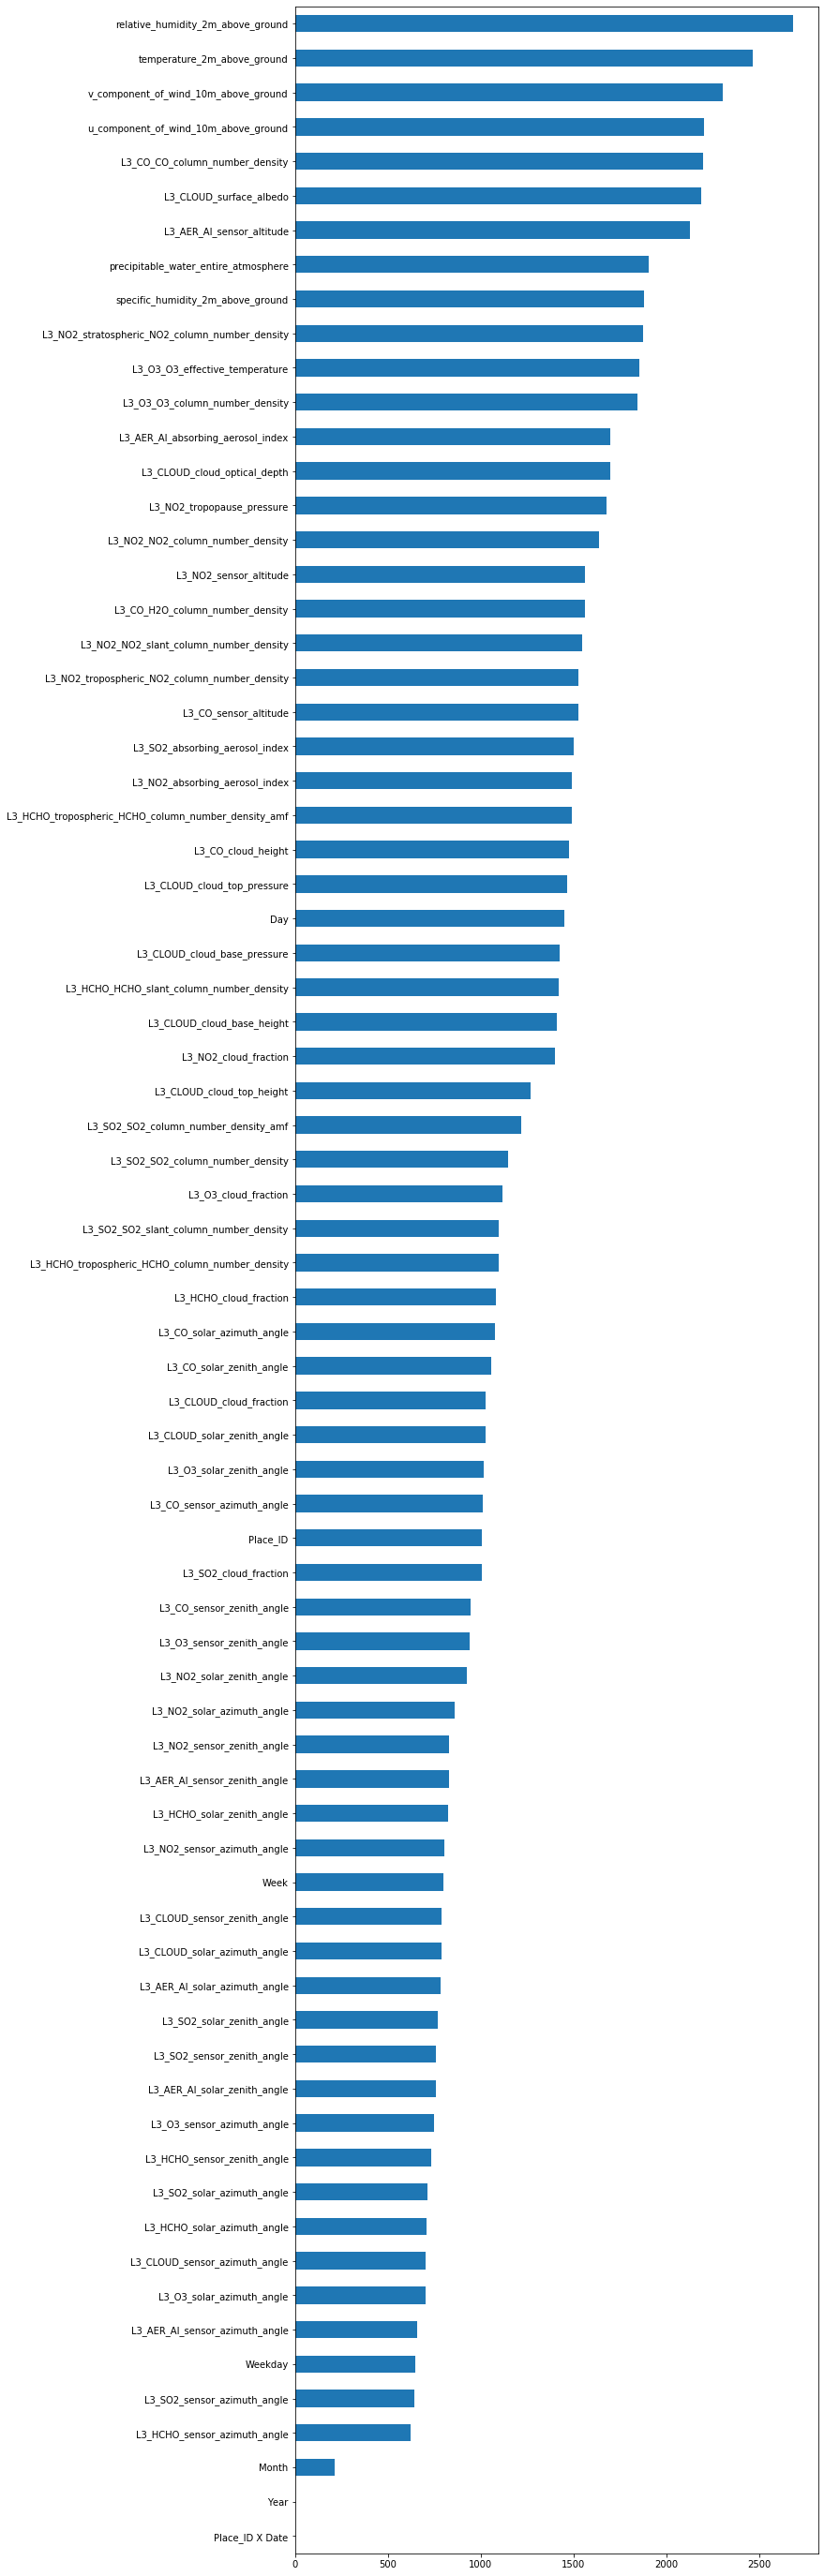

In [137]:
fi = pd.Series(index=features, data= lgb.feature_importances_)
_ = plt.figure(figsize=(10, 50))
_ = fi.sort_values().plot(kind='barh')

In [136]:
import matplotlib.pyplot as plt

In [260]:
cat.fit(X_train,y_train, eval_set=[(X_train,y_train),
                                   (X_test,y_test)], 
         early_stopping_rounds= 500, use_best_model=True)

Learning rate set to 0.087089
0:	learn: 45.2317771	test: 45.2317771	test1: 49.4669202	best: 49.4669202 (0)	total: 1.35s	remaining: 22m 31s
1:	learn: 44.0381769	test: 44.0381769	test1: 48.4265707	best: 48.4265707 (1)	total: 2.62s	remaining: 21m 44s
2:	learn: 42.9235206	test: 42.9235206	test1: 47.4217597	best: 47.4217597 (2)	total: 3.7s	remaining: 20m 30s
3:	learn: 41.9043829	test: 41.9043829	test1: 46.5156722	best: 46.5156722 (3)	total: 4.59s	remaining: 19m 2s
4:	learn: 41.0882537	test: 41.0882537	test1: 45.7897088	best: 45.7897088 (4)	total: 5.34s	remaining: 17m 42s
5:	learn: 40.2430982	test: 40.2430982	test1: 45.0098928	best: 45.0098928 (5)	total: 5.99s	remaining: 16m 32s
6:	learn: 39.5213912	test: 39.5213912	test1: 44.3736527	best: 44.3736527 (6)	total: 6.49s	remaining: 15m 21s
7:	learn: 38.7784907	test: 38.7784907	test1: 43.7204303	best: 43.7204303 (7)	total: 6.96s	remaining: 14m 23s
8:	learn: 38.1889627	test: 38.1889627	test1: 43.2295146	best: 43.2295146 (8)	total: 7.41s	remaining:

75:	learn: 28.0775103	test: 28.0775103	test1: 36.0647347	best: 36.0647347 (75)	total: 37.2s	remaining: 7m 31s
76:	learn: 28.0073729	test: 28.0073729	test1: 36.0276236	best: 36.0276236 (76)	total: 37.6s	remaining: 7m 30s
77:	learn: 27.9429451	test: 27.9429451	test1: 36.0006538	best: 36.0006538 (77)	total: 37.9s	remaining: 7m 28s
78:	learn: 27.8966663	test: 27.8966663	test1: 35.9786553	best: 35.9786553 (78)	total: 38.3s	remaining: 7m 26s
79:	learn: 27.8218759	test: 27.8218759	test1: 35.9493334	best: 35.9493334 (79)	total: 38.8s	remaining: 7m 25s
80:	learn: 27.7436555	test: 27.7436555	test1: 35.8962050	best: 35.8962050 (80)	total: 39.2s	remaining: 7m 25s
81:	learn: 27.7082607	test: 27.7082607	test1: 35.8674434	best: 35.8674434 (81)	total: 39.7s	remaining: 7m 24s
82:	learn: 27.6185018	test: 27.6185018	test1: 35.8233616	best: 35.8233616 (82)	total: 40.1s	remaining: 7m 23s
83:	learn: 27.5385406	test: 27.5385406	test1: 35.7692561	best: 35.7692561 (83)	total: 40.5s	remaining: 7m 21s
84:	learn:

149:	learn: 24.2112162	test: 24.2112162	test1: 34.4190679	best: 34.4175932 (148)	total: 1m 7s	remaining: 6m 23s
150:	learn: 24.1655128	test: 24.1655128	test1: 34.3974374	best: 34.3974374 (150)	total: 1m 8s	remaining: 6m 22s
151:	learn: 24.1177608	test: 24.1177608	test1: 34.3831421	best: 34.3831421 (151)	total: 1m 8s	remaining: 6m 22s
152:	learn: 24.0708258	test: 24.0708258	test1: 34.3552871	best: 34.3552871 (152)	total: 1m 8s	remaining: 6m 21s
153:	learn: 24.0361413	test: 24.0361413	test1: 34.3452837	best: 34.3452837 (153)	total: 1m 9s	remaining: 6m 20s
154:	learn: 24.0045739	test: 24.0045739	test1: 34.3349437	best: 34.3349437 (154)	total: 1m 9s	remaining: 6m 19s
155:	learn: 23.9463008	test: 23.9463008	test1: 34.3139806	best: 34.3139806 (155)	total: 1m 10s	remaining: 6m 19s
156:	learn: 23.8903351	test: 23.8903351	test1: 34.3042986	best: 34.3042986 (156)	total: 1m 10s	remaining: 6m 18s
157:	learn: 23.8488466	test: 23.8488466	test1: 34.2920840	best: 34.2920840 (157)	total: 1m 10s	remaini

222:	learn: 21.3996553	test: 21.3996553	test1: 33.5233498	best: 33.5233498 (222)	total: 1m 42s	remaining: 5m 55s
223:	learn: 21.3583976	test: 21.3583976	test1: 33.5220006	best: 33.5220006 (223)	total: 1m 42s	remaining: 5m 54s
224:	learn: 21.3153449	test: 21.3153449	test1: 33.5092810	best: 33.5092810 (224)	total: 1m 42s	remaining: 5m 54s
225:	learn: 21.2756453	test: 21.2756453	test1: 33.4897286	best: 33.4897286 (225)	total: 1m 43s	remaining: 5m 53s
226:	learn: 21.2520115	test: 21.2520115	test1: 33.4861932	best: 33.4861932 (226)	total: 1m 43s	remaining: 5m 52s
227:	learn: 21.2187926	test: 21.2187926	test1: 33.4786599	best: 33.4786599 (227)	total: 1m 43s	remaining: 5m 52s
228:	learn: 21.1794271	test: 21.1794271	test1: 33.4672297	best: 33.4672297 (228)	total: 1m 44s	remaining: 5m 51s
229:	learn: 21.1317143	test: 21.1317143	test1: 33.4476139	best: 33.4476139 (229)	total: 1m 44s	remaining: 5m 50s
230:	learn: 21.1106410	test: 21.1106410	test1: 33.4634942	best: 33.4476139 (229)	total: 1m 45s	r

295:	learn: 19.1206105	test: 19.1206105	test1: 32.8692080	best: 32.8677974 (294)	total: 2m 15s	remaining: 5m 21s
296:	learn: 19.0946563	test: 19.0946563	test1: 32.8725867	best: 32.8677974 (294)	total: 2m 15s	remaining: 5m 20s
297:	learn: 19.0721053	test: 19.0721053	test1: 32.8676213	best: 32.8676213 (297)	total: 2m 15s	remaining: 5m 20s
298:	learn: 19.0449520	test: 19.0449520	test1: 32.8536146	best: 32.8536146 (298)	total: 2m 16s	remaining: 5m 19s
299:	learn: 19.0124156	test: 19.0124156	test1: 32.8333604	best: 32.8333604 (299)	total: 2m 16s	remaining: 5m 19s
300:	learn: 18.9876286	test: 18.9876286	test1: 32.8195347	best: 32.8195347 (300)	total: 2m 17s	remaining: 5m 18s
301:	learn: 18.9660658	test: 18.9660658	test1: 32.8112908	best: 32.8112908 (301)	total: 2m 17s	remaining: 5m 17s
302:	learn: 18.9335866	test: 18.9335866	test1: 32.8039365	best: 32.8039365 (302)	total: 2m 17s	remaining: 5m 17s
303:	learn: 18.8905442	test: 18.8905442	test1: 32.8012874	best: 32.8012874 (303)	total: 2m 18s	r

368:	learn: 17.2191476	test: 17.2191476	test1: 32.3553418	best: 32.3553418 (368)	total: 2m 48s	remaining: 4m 47s
369:	learn: 17.2017474	test: 17.2017474	test1: 32.3453400	best: 32.3453400 (369)	total: 2m 48s	remaining: 4m 47s
370:	learn: 17.1631982	test: 17.1631982	test1: 32.3318934	best: 32.3318934 (370)	total: 2m 49s	remaining: 4m 46s
371:	learn: 17.1439375	test: 17.1439375	test1: 32.3205142	best: 32.3205142 (371)	total: 2m 49s	remaining: 4m 46s
372:	learn: 17.1193681	test: 17.1193681	test1: 32.3142095	best: 32.3142095 (372)	total: 2m 50s	remaining: 4m 45s
373:	learn: 17.1034773	test: 17.1034773	test1: 32.3043067	best: 32.3043067 (373)	total: 2m 50s	remaining: 4m 45s
374:	learn: 17.0716462	test: 17.0716462	test1: 32.3013508	best: 32.3013508 (374)	total: 2m 50s	remaining: 4m 44s
375:	learn: 17.0424311	test: 17.0424311	test1: 32.3004055	best: 32.3004055 (375)	total: 2m 51s	remaining: 4m 44s
376:	learn: 17.0165452	test: 17.0165452	test1: 32.2947277	best: 32.2947277 (376)	total: 2m 51s	r

441:	learn: 15.5309267	test: 15.5309267	test1: 32.0216378	best: 32.0203694 (440)	total: 3m 18s	remaining: 4m 10s
442:	learn: 15.5073364	test: 15.5073364	test1: 32.0203669	best: 32.0203669 (442)	total: 3m 19s	remaining: 4m 11s
443:	learn: 15.4956490	test: 15.4956490	test1: 32.0189952	best: 32.0189952 (443)	total: 3m 20s	remaining: 4m 11s
444:	learn: 15.4838668	test: 15.4838668	test1: 32.0187688	best: 32.0187688 (444)	total: 3m 21s	remaining: 4m 11s
445:	learn: 15.4621155	test: 15.4621155	test1: 32.0100926	best: 32.0100926 (445)	total: 3m 22s	remaining: 4m 11s
446:	learn: 15.4414362	test: 15.4414362	test1: 32.0008915	best: 32.0008915 (446)	total: 3m 23s	remaining: 4m 11s
447:	learn: 15.4235733	test: 15.4235733	test1: 31.9931883	best: 31.9931883 (447)	total: 3m 23s	remaining: 4m 10s
448:	learn: 15.4029054	test: 15.4029054	test1: 31.9871011	best: 31.9871011 (448)	total: 3m 24s	remaining: 4m 10s
449:	learn: 15.3847532	test: 15.3847532	test1: 31.9867606	best: 31.9867606 (449)	total: 3m 24s	r

514:	learn: 14.2348719	test: 14.2348719	test1: 31.7692103	best: 31.7692103 (514)	total: 3m 51s	remaining: 3m 37s
515:	learn: 14.2123885	test: 14.2123885	test1: 31.7682773	best: 31.7682773 (515)	total: 3m 51s	remaining: 3m 37s
516:	learn: 14.2000422	test: 14.2000422	test1: 31.7651319	best: 31.7651319 (516)	total: 3m 52s	remaining: 3m 36s
517:	learn: 14.1866056	test: 14.1866056	test1: 31.7632171	best: 31.7632171 (517)	total: 3m 52s	remaining: 3m 36s
518:	learn: 14.1687349	test: 14.1687349	test1: 31.7643853	best: 31.7632171 (517)	total: 3m 52s	remaining: 3m 35s
519:	learn: 14.1538180	test: 14.1538180	test1: 31.7637429	best: 31.7632171 (517)	total: 3m 53s	remaining: 3m 35s
520:	learn: 14.1389219	test: 14.1389219	test1: 31.7613173	best: 31.7613173 (520)	total: 3m 53s	remaining: 3m 34s
521:	learn: 14.1223150	test: 14.1223150	test1: 31.7594563	best: 31.7594563 (521)	total: 3m 53s	remaining: 3m 34s
522:	learn: 14.1028785	test: 14.1028785	test1: 31.7547820	best: 31.7547820 (522)	total: 3m 54s	r

587:	learn: 13.0524158	test: 13.0524158	test1: 31.5517193	best: 31.5517193 (587)	total: 4m 21s	remaining: 3m 3s
588:	learn: 13.0432435	test: 13.0432435	test1: 31.5514125	best: 31.5514125 (588)	total: 4m 21s	remaining: 3m 2s
589:	learn: 13.0318330	test: 13.0318330	test1: 31.5472643	best: 31.5472643 (589)	total: 4m 22s	remaining: 3m 2s
590:	learn: 13.0099387	test: 13.0099387	test1: 31.5450900	best: 31.5450900 (590)	total: 4m 22s	remaining: 3m 1s
591:	learn: 12.9988182	test: 12.9988182	test1: 31.5440091	best: 31.5440091 (591)	total: 4m 23s	remaining: 3m 1s
592:	learn: 12.9802175	test: 12.9802175	test1: 31.5488302	best: 31.5440091 (591)	total: 4m 23s	remaining: 3m 1s
593:	learn: 12.9668209	test: 12.9668209	test1: 31.5485494	best: 31.5440091 (591)	total: 4m 24s	remaining: 3m
594:	learn: 12.9536889	test: 12.9536889	test1: 31.5471229	best: 31.5440091 (591)	total: 4m 24s	remaining: 3m
595:	learn: 12.9301709	test: 12.9301709	test1: 31.5432454	best: 31.5432454 (595)	total: 4m 25s	remaining: 2m 5

660:	learn: 12.0337732	test: 12.0337732	test1: 31.3969519	best: 31.3969290 (659)	total: 4m 53s	remaining: 2m 30s
661:	learn: 12.0158184	test: 12.0158184	test1: 31.3897568	best: 31.3897568 (661)	total: 4m 54s	remaining: 2m 30s
662:	learn: 12.0037907	test: 12.0037907	test1: 31.3902993	best: 31.3897568 (661)	total: 4m 54s	remaining: 2m 29s
663:	learn: 11.9888938	test: 11.9888938	test1: 31.3889673	best: 31.3889673 (663)	total: 4m 55s	remaining: 2m 29s
664:	learn: 11.9701536	test: 11.9701536	test1: 31.3918008	best: 31.3889673 (663)	total: 4m 55s	remaining: 2m 29s
665:	learn: 11.9570298	test: 11.9570298	test1: 31.3963962	best: 31.3889673 (663)	total: 4m 56s	remaining: 2m 28s
666:	learn: 11.9389740	test: 11.9389740	test1: 31.3911924	best: 31.3889673 (663)	total: 4m 56s	remaining: 2m 28s
667:	learn: 11.9281769	test: 11.9281769	test1: 31.3903872	best: 31.3889673 (663)	total: 4m 57s	remaining: 2m 27s
668:	learn: 11.9182896	test: 11.9182896	test1: 31.3885393	best: 31.3885393 (668)	total: 4m 57s	r

734:	learn: 11.1637930	test: 11.1637930	test1: 31.3020261	best: 31.3020261 (734)	total: 5m 25s	remaining: 1m 57s
735:	learn: 11.1514806	test: 11.1514806	test1: 31.3021650	best: 31.3020261 (734)	total: 5m 25s	remaining: 1m 56s
736:	learn: 11.1397291	test: 11.1397291	test1: 31.2989945	best: 31.2989945 (736)	total: 5m 26s	remaining: 1m 56s
737:	learn: 11.1333632	test: 11.1333632	test1: 31.3024781	best: 31.2989945 (736)	total: 5m 26s	remaining: 1m 55s
738:	learn: 11.1213709	test: 11.1213709	test1: 31.3014527	best: 31.2989945 (736)	total: 5m 26s	remaining: 1m 55s
739:	learn: 11.1046526	test: 11.1046526	test1: 31.3002120	best: 31.2989945 (736)	total: 5m 27s	remaining: 1m 55s
740:	learn: 11.0927302	test: 11.0927302	test1: 31.2996410	best: 31.2989945 (736)	total: 5m 27s	remaining: 1m 54s
741:	learn: 11.0791294	test: 11.0791294	test1: 31.3012002	best: 31.2989945 (736)	total: 5m 28s	remaining: 1m 54s
742:	learn: 11.0718130	test: 11.0718130	test1: 31.2993678	best: 31.2989945 (736)	total: 5m 28s	r

807:	learn: 10.3088008	test: 10.3088008	test1: 31.2335986	best: 31.2335986 (807)	total: 5m 54s	remaining: 1m 24s
808:	learn: 10.2998590	test: 10.2998590	test1: 31.2309627	best: 31.2309627 (808)	total: 5m 55s	remaining: 1m 23s
809:	learn: 10.2922237	test: 10.2922237	test1: 31.2303532	best: 31.2303532 (809)	total: 5m 55s	remaining: 1m 23s
810:	learn: 10.2866047	test: 10.2866047	test1: 31.2307856	best: 31.2303532 (809)	total: 5m 56s	remaining: 1m 23s
811:	learn: 10.2769834	test: 10.2769834	test1: 31.2306544	best: 31.2303532 (809)	total: 5m 56s	remaining: 1m 22s
812:	learn: 10.2659013	test: 10.2659013	test1: 31.2283606	best: 31.2283606 (812)	total: 5m 57s	remaining: 1m 22s
813:	learn: 10.2566522	test: 10.2566522	test1: 31.2271737	best: 31.2271737 (813)	total: 5m 57s	remaining: 1m 21s
814:	learn: 10.2510984	test: 10.2510984	test1: 31.2271814	best: 31.2271737 (813)	total: 5m 57s	remaining: 1m 21s
815:	learn: 10.2320483	test: 10.2320483	test1: 31.2209610	best: 31.2209610 (815)	total: 5m 58s	r

881:	learn: 9.5844960	test: 9.5844960	test1: 31.1452540	best: 31.1452540 (881)	total: 6m 24s	remaining: 51.5s
882:	learn: 9.5785137	test: 9.5785137	test1: 31.1447455	best: 31.1447455 (882)	total: 6m 25s	remaining: 51.1s
883:	learn: 9.5709115	test: 9.5709115	test1: 31.1458004	best: 31.1447455 (882)	total: 6m 25s	remaining: 50.6s
884:	learn: 9.5629072	test: 9.5629072	test1: 31.1439273	best: 31.1439273 (884)	total: 6m 26s	remaining: 50.2s
885:	learn: 9.5517334	test: 9.5517334	test1: 31.1413397	best: 31.1413397 (885)	total: 6m 26s	remaining: 49.7s
886:	learn: 9.5421780	test: 9.5421780	test1: 31.1443832	best: 31.1413397 (885)	total: 6m 26s	remaining: 49.3s
887:	learn: 9.5318984	test: 9.5318984	test1: 31.1425199	best: 31.1413397 (885)	total: 6m 27s	remaining: 48.9s
888:	learn: 9.5208488	test: 9.5208488	test1: 31.1407828	best: 31.1407828 (888)	total: 6m 27s	remaining: 48.4s
889:	learn: 9.5147343	test: 9.5147343	test1: 31.1384049	best: 31.1384049 (889)	total: 6m 28s	remaining: 48s
890:	learn: 

956:	learn: 8.8700971	test: 8.8700971	test1: 31.0597230	best: 31.0587486 (955)	total: 7m	remaining: 18.9s
957:	learn: 8.8658594	test: 8.8658594	test1: 31.0611178	best: 31.0587486 (955)	total: 7m	remaining: 18.4s
958:	learn: 8.8555933	test: 8.8555933	test1: 31.0567565	best: 31.0567565 (958)	total: 7m	remaining: 18s
959:	learn: 8.8461711	test: 8.8461711	test1: 31.0547241	best: 31.0547241 (959)	total: 7m 1s	remaining: 17.6s
960:	learn: 8.8395116	test: 8.8395116	test1: 31.0538667	best: 31.0538667 (960)	total: 7m 1s	remaining: 17.1s
961:	learn: 8.8292735	test: 8.8292735	test1: 31.0544256	best: 31.0538667 (960)	total: 7m 2s	remaining: 16.7s
962:	learn: 8.8202775	test: 8.8202775	test1: 31.0548371	best: 31.0538667 (960)	total: 7m 2s	remaining: 16.3s
963:	learn: 8.8090099	test: 8.8090099	test1: 31.0561715	best: 31.0538667 (960)	total: 7m 3s	remaining: 15.8s
964:	learn: 8.7994138	test: 8.7994138	test1: 31.0546682	best: 31.0538667 (960)	total: 7m 4s	remaining: 15.4s
965:	learn: 8.7944778	test: 8.

In [265]:
catpred = cat.predict(df_test)

In [263]:
np.sqrt(mean_squared_error(catpred,y_test))

31.014062830681297

In [269]:
#lgb.fit(X_train,y_train)
lgb.fit(X_train,y_train,eval_metric = 'rmse',
            eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 500)

C:\Users\USER\Anaconda3\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.345	valid_1's rmse: 49.5424
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 43.997	valid_1's rmse: 48.4105
[3]	training's rmse: 42.7944	valid_1's rmse: 47.3421
[4]	training's rmse: 41.6801	valid_1's rmse: 46.3785
[5]	training's rmse: 40.7041	valid_1's rmse: 45.5424
[6]	training's rmse: 39.957	valid_1's rmse: 44.952
[7]	training's rmse: 39.0331	valid_1's rmse: 44.1886
[8]	training's rmse: 38.2778	valid_1's rmse: 43.6009
[9]	training's rmse: 37.6287	valid_1's rmse: 43.1274
[10]	training's rmse: 36.912	valid_1's rmse: 42.5444
[11]	training's rmse: 36.2682	valid_1's rmse: 42.0864
[12]	training's rmse: 35.7303	valid_1's rmse: 41.6562
[13]	training's rmse: 35.3229	valid_1's rmse: 41.3704
[14]	training's rmse: 34.7242	valid_1's rmse: 40.9222
[15]	training's rmse: 34.2886	valid_1's rmse: 40.6237
[16]	training's rmse: 33.7744	valid_1's rmse: 40.2352
[17]	training's rmse: 33.3239	valid_1's rmse: 39.8947
[18]	training's rmse: 32.8476	vali

[153]	training's rmse: 19.1141	valid_1's rmse: 32.6554
[154]	training's rmse: 19.0655	valid_1's rmse: 32.647
[155]	training's rmse: 19.0159	valid_1's rmse: 32.6295
[156]	training's rmse: 18.9751	valid_1's rmse: 32.6226
[157]	training's rmse: 18.9319	valid_1's rmse: 32.6132
[158]	training's rmse: 18.8954	valid_1's rmse: 32.6027
[159]	training's rmse: 18.8576	valid_1's rmse: 32.5969
[160]	training's rmse: 18.8129	valid_1's rmse: 32.5803
[161]	training's rmse: 18.7792	valid_1's rmse: 32.5769
[162]	training's rmse: 18.7338	valid_1's rmse: 32.5718
[163]	training's rmse: 18.6956	valid_1's rmse: 32.5717
[164]	training's rmse: 18.6608	valid_1's rmse: 32.567
[165]	training's rmse: 18.6229	valid_1's rmse: 32.5514
[166]	training's rmse: 18.5895	valid_1's rmse: 32.5434
[167]	training's rmse: 18.5583	valid_1's rmse: 32.5474
[168]	training's rmse: 18.5058	valid_1's rmse: 32.5394
[169]	training's rmse: 18.4743	valid_1's rmse: 32.5435
[170]	training's rmse: 18.4302	valid_1's rmse: 32.5394
[171]	traini

[308]	training's rmse: 14.3439	valid_1's rmse: 31.761
[309]	training's rmse: 14.3207	valid_1's rmse: 31.7595
[310]	training's rmse: 14.2957	valid_1's rmse: 31.7588
[311]	training's rmse: 14.2772	valid_1's rmse: 31.7563
[312]	training's rmse: 14.2575	valid_1's rmse: 31.7657
[313]	training's rmse: 14.2341	valid_1's rmse: 31.765
[314]	training's rmse: 14.2045	valid_1's rmse: 31.753
[315]	training's rmse: 14.1813	valid_1's rmse: 31.751
[316]	training's rmse: 14.1517	valid_1's rmse: 31.7253
[317]	training's rmse: 14.1312	valid_1's rmse: 31.7184
[318]	training's rmse: 14.1044	valid_1's rmse: 31.7117
[319]	training's rmse: 14.0845	valid_1's rmse: 31.7102
[320]	training's rmse: 14.0574	valid_1's rmse: 31.7185
[321]	training's rmse: 14.0295	valid_1's rmse: 31.7163
[322]	training's rmse: 14.0067	valid_1's rmse: 31.7156
[323]	training's rmse: 13.9869	valid_1's rmse: 31.7179
[324]	training's rmse: 13.964	valid_1's rmse: 31.7153
[325]	training's rmse: 13.9417	valid_1's rmse: 31.7128
[326]	training'

[466]	training's rmse: 11.3532	valid_1's rmse: 31.3
[467]	training's rmse: 11.3379	valid_1's rmse: 31.2968
[468]	training's rmse: 11.3149	valid_1's rmse: 31.2821
[469]	training's rmse: 11.2905	valid_1's rmse: 31.2783
[470]	training's rmse: 11.2768	valid_1's rmse: 31.2811
[471]	training's rmse: 11.2619	valid_1's rmse: 31.2824
[472]	training's rmse: 11.2496	valid_1's rmse: 31.269
[473]	training's rmse: 11.2358	valid_1's rmse: 31.2687
[474]	training's rmse: 11.2203	valid_1's rmse: 31.2664
[475]	training's rmse: 11.207	valid_1's rmse: 31.2682
[476]	training's rmse: 11.1943	valid_1's rmse: 31.2667
[477]	training's rmse: 11.1813	valid_1's rmse: 31.2647
[478]	training's rmse: 11.1676	valid_1's rmse: 31.2618
[479]	training's rmse: 11.1532	valid_1's rmse: 31.2623
[480]	training's rmse: 11.1351	valid_1's rmse: 31.2644
[481]	training's rmse: 11.1177	valid_1's rmse: 31.2631
[482]	training's rmse: 11.1038	valid_1's rmse: 31.2672
[483]	training's rmse: 11.0857	valid_1's rmse: 31.2674
[484]	training'

[624]	training's rmse: 9.19731	valid_1's rmse: 31.0913
[625]	training's rmse: 9.18754	valid_1's rmse: 31.0941
[626]	training's rmse: 9.1755	valid_1's rmse: 31.0928
[627]	training's rmse: 9.16011	valid_1's rmse: 31.0901
[628]	training's rmse: 9.14993	valid_1's rmse: 31.0902
[629]	training's rmse: 9.13746	valid_1's rmse: 31.0914
[630]	training's rmse: 9.12812	valid_1's rmse: 31.0888
[631]	training's rmse: 9.11609	valid_1's rmse: 31.0877
[632]	training's rmse: 9.10603	valid_1's rmse: 31.0866
[633]	training's rmse: 9.09627	valid_1's rmse: 31.079
[634]	training's rmse: 9.07892	valid_1's rmse: 31.0696
[635]	training's rmse: 9.06643	valid_1's rmse: 31.069
[636]	training's rmse: 9.05209	valid_1's rmse: 31.0559
[637]	training's rmse: 9.03766	valid_1's rmse: 31.0533
[638]	training's rmse: 9.02673	valid_1's rmse: 31.0535
[639]	training's rmse: 9.01529	valid_1's rmse: 31.0511
[640]	training's rmse: 9.00543	valid_1's rmse: 31.0534
[641]	training's rmse: 8.99513	valid_1's rmse: 31.0586
[642]	trainin

[781]	training's rmse: 7.59345	valid_1's rmse: 30.9686
[782]	training's rmse: 7.58424	valid_1's rmse: 30.9685
[783]	training's rmse: 7.57243	valid_1's rmse: 30.9659
[784]	training's rmse: 7.56153	valid_1's rmse: 30.9653
[785]	training's rmse: 7.5536	valid_1's rmse: 30.9658
[786]	training's rmse: 7.54475	valid_1's rmse: 30.9651
[787]	training's rmse: 7.53594	valid_1's rmse: 30.9654
[788]	training's rmse: 7.5288	valid_1's rmse: 30.9689
[789]	training's rmse: 7.51929	valid_1's rmse: 30.9677
[790]	training's rmse: 7.51218	valid_1's rmse: 30.9671
[791]	training's rmse: 7.50526	valid_1's rmse: 30.965
[792]	training's rmse: 7.49553	valid_1's rmse: 30.97
[793]	training's rmse: 7.48873	valid_1's rmse: 30.9704
[794]	training's rmse: 7.4801	valid_1's rmse: 30.9697
[795]	training's rmse: 7.47238	valid_1's rmse: 30.9696
[796]	training's rmse: 7.46019	valid_1's rmse: 30.9687
[797]	training's rmse: 7.45181	valid_1's rmse: 30.9701
[798]	training's rmse: 7.44447	valid_1's rmse: 30.9661
[799]	training's

[937]	training's rmse: 6.34128	valid_1's rmse: 30.9082
[938]	training's rmse: 6.33481	valid_1's rmse: 30.9074
[939]	training's rmse: 6.32763	valid_1's rmse: 30.906
[940]	training's rmse: 6.32158	valid_1's rmse: 30.8986
[941]	training's rmse: 6.31428	valid_1's rmse: 30.8892
[942]	training's rmse: 6.30583	valid_1's rmse: 30.8893
[943]	training's rmse: 6.29799	valid_1's rmse: 30.8911
[944]	training's rmse: 6.29261	valid_1's rmse: 30.8934
[945]	training's rmse: 6.28607	valid_1's rmse: 30.8941
[946]	training's rmse: 6.27729	valid_1's rmse: 30.8938
[947]	training's rmse: 6.26841	valid_1's rmse: 30.8837
[948]	training's rmse: 6.26075	valid_1's rmse: 30.8833
[949]	training's rmse: 6.25134	valid_1's rmse: 30.8831
[950]	training's rmse: 6.24469	valid_1's rmse: 30.884
[951]	training's rmse: 6.23823	valid_1's rmse: 30.8896
[952]	training's rmse: 6.23287	valid_1's rmse: 30.89
[953]	training's rmse: 6.22526	valid_1's rmse: 30.8868
[954]	training's rmse: 6.21933	valid_1's rmse: 30.8862
[955]	training

[1094]	training's rmse: 5.35897	valid_1's rmse: 30.8798
[1095]	training's rmse: 5.35272	valid_1's rmse: 30.8783
[1096]	training's rmse: 5.34864	valid_1's rmse: 30.8775
[1097]	training's rmse: 5.34418	valid_1's rmse: 30.8764
[1098]	training's rmse: 5.33866	valid_1's rmse: 30.8762
[1099]	training's rmse: 5.33188	valid_1's rmse: 30.875
[1100]	training's rmse: 5.3247	valid_1's rmse: 30.8728
[1101]	training's rmse: 5.31972	valid_1's rmse: 30.8694
[1102]	training's rmse: 5.31269	valid_1's rmse: 30.8722
[1103]	training's rmse: 5.3079	valid_1's rmse: 30.8689
[1104]	training's rmse: 5.30288	valid_1's rmse: 30.8674
[1105]	training's rmse: 5.29774	valid_1's rmse: 30.868
[1106]	training's rmse: 5.29327	valid_1's rmse: 30.8669
[1107]	training's rmse: 5.28763	valid_1's rmse: 30.8681
[1108]	training's rmse: 5.27949	valid_1's rmse: 30.868
[1109]	training's rmse: 5.27452	valid_1's rmse: 30.8686
[1110]	training's rmse: 5.2663	valid_1's rmse: 30.8683
[1111]	training's rmse: 5.26078	valid_1's rmse: 30.869

[1254]	training's rmse: 4.5365	valid_1's rmse: 30.8325
[1255]	training's rmse: 4.53303	valid_1's rmse: 30.8345
[1256]	training's rmse: 4.52902	valid_1's rmse: 30.8335
[1257]	training's rmse: 4.52519	valid_1's rmse: 30.8325
[1258]	training's rmse: 4.51948	valid_1's rmse: 30.8311
[1259]	training's rmse: 4.51561	valid_1's rmse: 30.8313
[1260]	training's rmse: 4.51204	valid_1's rmse: 30.8302
[1261]	training's rmse: 4.50557	valid_1's rmse: 30.831
[1262]	training's rmse: 4.50228	valid_1's rmse: 30.8302
[1263]	training's rmse: 4.49869	valid_1's rmse: 30.8305
[1264]	training's rmse: 4.4947	valid_1's rmse: 30.831
[1265]	training's rmse: 4.49036	valid_1's rmse: 30.8304
[1266]	training's rmse: 4.48446	valid_1's rmse: 30.8307
[1267]	training's rmse: 4.48172	valid_1's rmse: 30.8304
[1268]	training's rmse: 4.47684	valid_1's rmse: 30.8304
[1269]	training's rmse: 4.47007	valid_1's rmse: 30.8292
[1270]	training's rmse: 4.46471	valid_1's rmse: 30.8289
[1271]	training's rmse: 4.4611	valid_1's rmse: 30.82

[1403]	training's rmse: 3.92214	valid_1's rmse: 30.7995
[1404]	training's rmse: 3.91569	valid_1's rmse: 30.8016
[1405]	training's rmse: 3.91104	valid_1's rmse: 30.8005
[1406]	training's rmse: 3.90755	valid_1's rmse: 30.802
[1407]	training's rmse: 3.90481	valid_1's rmse: 30.8015
[1408]	training's rmse: 3.89935	valid_1's rmse: 30.8008
[1409]	training's rmse: 3.8941	valid_1's rmse: 30.7999
[1410]	training's rmse: 3.88819	valid_1's rmse: 30.8003
[1411]	training's rmse: 3.88517	valid_1's rmse: 30.7995
[1412]	training's rmse: 3.88092	valid_1's rmse: 30.7988
[1413]	training's rmse: 3.87569	valid_1's rmse: 30.7976
[1414]	training's rmse: 3.87226	valid_1's rmse: 30.7973
[1415]	training's rmse: 3.86844	valid_1's rmse: 30.7984
[1416]	training's rmse: 3.86398	valid_1's rmse: 30.7997
[1417]	training's rmse: 3.86093	valid_1's rmse: 30.7989
[1418]	training's rmse: 3.85587	valid_1's rmse: 30.7985
[1419]	training's rmse: 3.85251	valid_1's rmse: 30.7984
[1420]	training's rmse: 3.8487	valid_1's rmse: 30.

LGBMRegressor(boosting='gbdt', boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.35,
              importance_type='split', lambda_l1=1, lambda_l2=2,
              learning_rate=0.075, max_depth=-1, metric='rmse',
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=50,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1,
              num_iterations=1500, num_leaves=100, objective='regression',
              random_state=6, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
              verbosity=-1)

In [273]:
lgbpred = lgb.predict(df_test)

In [272]:
np.sqrt(mean_squared_error(lgbpred,y_test))

30.76927923948893